In [1]:
TF_ENABLE_ONEDNN_OPTS=0

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [3]:
credit_cards = pd.read_csv('creditcard_2023.csv')

In [4]:
pd.options.mode.copy_on_write = True
df = credit_cards[credit_cards.columns[1:]]
df['Class'] = df['Class'].map({1:0, 0:1})

# выделить 1000
df_x = pd.DataFrame(data=df, columns=df.columns[:-1])
df_y = pd.DataFrame(data=df[df.columns[-1]])
df_train_x, df_test_x, df_train_y, df_test_y  = train_test_split(df_x, df_y, test_size=0.002)

df_1000 = pd.DataFrame(data=pd.concat([df_test_x, df_test_y], axis=1))
df = pd.DataFrame(data=pd.concat([df_train_x, df_train_y], axis=1))

In [5]:
X = pd.DataFrame(data=df, columns=df.columns[:-2])
y = df["Class"].values

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, y, test_size=0.3)

In [7]:
tf.random.set_seed(1234)

In [8]:
df_train_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
125550,1.090872,-0.454938,0.089672,-0.914206,1.295281,2.116807,0.265892,0.038659,0.463455,0.599025,...,0.001839,-0.147932,-0.231341,-0.963816,0.083030,2.201437,0.529089,0.262735,-0.269691,-0.071953
222507,-1.107577,-2.654949,0.454003,-1.498522,1.364722,0.998958,0.602700,-0.237132,1.130913,1.811584,...,0.030473,-3.060935,-0.819256,-0.273039,0.920605,-1.389055,1.693286,-0.751994,0.933886,2.779843
469615,-0.054018,0.897093,-1.008150,1.521340,0.272251,-1.159876,-0.319826,0.163931,-1.372731,-0.845148,...,0.403430,0.656505,0.124001,-0.521749,-0.063068,-1.390786,-0.121571,1.139438,0.646914,0.471615
297295,-0.664297,-1.164901,-0.687758,0.326297,-0.286562,-0.636533,-0.605968,-0.210380,0.455777,-0.456317,...,0.572107,0.634542,-0.021213,-0.516658,-4.961707,0.485808,-2.107150,-2.160902,0.648677,-0.375665
427360,0.738602,0.371768,-0.722343,1.163774,0.287375,-0.972862,-0.088553,-0.066668,-0.794790,-0.502541,...,-1.550543,0.116835,0.053893,-0.463459,-0.068903,-0.323967,0.598909,0.352753,0.627961,0.780406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72220,1.050507,-0.378740,-0.029797,-0.601037,1.585373,2.057720,0.422505,0.009696,0.241819,0.647593,...,-0.030693,-0.151246,-0.255421,-1.143418,0.013623,2.099497,1.013546,-1.604098,-0.244296,-0.059019
247343,-0.423391,-0.846961,1.857541,-1.189394,1.183247,0.514395,0.491347,-0.186254,0.991292,0.445200,...,-0.333829,-0.270035,-0.082711,0.576777,-0.140262,0.255936,1.526907,-0.580131,-0.857481,-0.294825
26819,-0.264174,-0.413870,1.664039,-0.505197,0.067419,1.578034,0.204838,0.131776,-0.390156,0.783013,...,-1.559538,-0.788181,-0.090077,0.360379,-0.077364,-1.738022,-0.403232,-0.019485,-0.261921,-0.203321
328324,-0.412612,0.426573,-0.656689,0.515560,-0.152483,0.266645,-0.135467,0.277871,-0.302923,-0.738560,...,-0.009313,0.070056,0.152774,0.485819,0.016096,0.256440,-0.123080,-0.539476,0.563941,0.402773


In [9]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [10]:
model = Sequential(
    [
        tf.keras.Input(shape=(28,)),
        Dense(20, activation='sigmoid', name = 'layer1'),
        Dense(10, activation='sigmoid', name = 'layer2'),
        Dense(1, activation='sigmoid', name = 'layer3'),
     ]
)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 20)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['precision']
)

In [13]:
model

<Sequential name=sequential, built=True>

In [14]:
model_mse = model.fit(
    df_train_x, df_train_y,
    epochs=50,
    validation_data=(df_test_x,  df_test_y),
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=0,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=0
    )]
)

In [15]:
epochs = range(1, len(model_mse.history['loss']) + 1)
plt.figure(figsize=[8,6])
plt.plot(epochs, model_mse.history['loss'], 'r', label='Training loss', linewidth=3.0)
plt.plot(epochs, model_mse.history['val_loss'], 'b', label='Validation loss', linewidth=3.0)
plt.title('Сравнение функций потерь')
plt.xlabel('Эпохи')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

In [16]:
model.compile(
    loss = tf.keras.losses.MeanAbsoluteError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['precision']
)
model_mae = model.fit(
    df_train_x, df_train_y,
    epochs=10,
    validation_data=(df_test_x,  df_test_y)
)

In [17]:
epochs = range(1, len(model_mae.history['loss']) + 1)
plt.figure(figsize=[8,6])
plt.plot(epochs, model_mae.history['loss'], 'r', label='Training loss', linewidth=3.0)
plt.plot(epochs, model_mae.history['val_loss'], 'b', label='Validation loss', linewidth=3.0)
plt.title('Сравнение функций потерь')
plt.xlabel('Эпохи')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

In [27]:
simple_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer), ('scaler', std_scaler)])

df_train_x_transform = pipe_num.fit_transform(df_train_x)
df_test_x_transform = pipe_num.fit_transform(df_test_x)

df_train_x_std = pd.DataFrame(df_train_x_transform, columns=pipe_num['scaler'].get_feature_names_out(df_train_x.columns))
df_train_x_std

df_test_x_std = pd.DataFrame(df_test_x_transform, columns=pipe_num['scaler'].get_feature_names_out(df_test_x.columns))
df_test_x_std

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.517317,1.537224,-1.521896,0.767392,-1.544415,-1.809727,-1.252129,1.887172,-0.606138,-0.869971,...,0.197661,0.684051,0.260027,-0.865669,-0.254869,-0.023045,0.952338,-0.619167,1.284343,0.414120
1,1.892877,-0.719706,0.143692,-1.252169,0.057692,0.198938,0.229733,-0.157349,0.139021,1.081923,...,0.516767,-0.178931,-0.175753,-0.673600,0.536545,1.357483,-1.040750,-1.924904,-0.266426,-0.215377
2,1.087133,-0.644268,0.712251,-0.861746,-0.171233,-0.330790,0.330653,-0.205006,0.068744,0.931217,...,-0.929059,-0.678470,-0.331569,-1.131790,0.200047,1.468356,-0.124257,1.623442,-0.322018,-0.061160
3,0.269479,-0.142784,0.235001,-1.037972,0.825124,0.357558,0.813182,-0.135303,0.352745,0.348484,...,0.008410,-0.120456,-0.233000,-0.769151,0.001993,0.003570,-0.690630,0.303373,0.022003,0.061986
4,0.054802,-0.013835,0.349560,-0.894243,0.520495,-0.158934,0.923428,-0.214467,0.595007,0.731067,...,-0.350811,0.160223,0.033472,1.348122,-0.067699,2.730409,-1.147889,-0.644355,0.718412,0.979014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170243,-0.791857,-0.187902,-0.638476,-0.135424,0.096719,0.117316,-0.436271,-0.250253,-0.747007,-0.680529,...,-0.624656,-0.350995,-0.203180,0.872464,-0.198226,-0.140933,0.917518,1.571830,0.685906,-1.683125
170244,-0.386626,-0.624548,0.278640,-0.955109,-0.089788,0.659672,1.206743,-0.080521,0.376166,0.320876,...,-0.446179,-0.346898,-0.067615,0.162805,-0.041513,-0.363902,-1.019906,1.742261,0.222697,-0.545492
170245,0.068217,-0.182522,1.403682,-0.680140,0.353455,0.061746,0.806084,-0.207284,0.463566,0.582112,...,-0.154013,-0.015660,-0.127996,0.003777,-0.163722,0.105930,-0.709727,0.485727,-0.021104,-0.135066
170246,-0.534872,-0.428517,0.746414,-0.438240,0.546271,-0.424873,0.635931,-0.199443,0.887334,1.032101,...,-0.217540,-0.919733,-0.432765,-0.461107,1.252922,0.505105,0.700555,0.366048,1.301776,-0.122773


In [79]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['precision']
)
model_bc = model.fit(
    df_train_x_std, df_train_y,
    epochs=20,
    validation_data=(df_test_x_std,  df_test_y),
    callbacks=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=0,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=0
    )
)

Epoch 1/20
12414/12414 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.1062 - precision: 0.9819 - val_loss: 0.0409 - val_precision: 0.9866
Epoch 2/20
12414/12414 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0254 - precision: 0.9938 - val_loss: 0.0241 - val_precision: 0.9944
Epoch 3/20
12414/12414 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0223 - precision: 0.9949 - val_loss: 0.0261 - val_precision: 0.9919


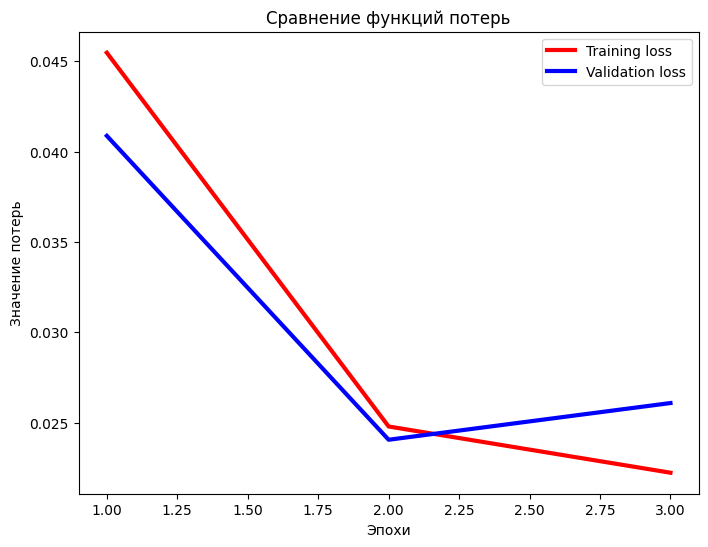

In [80]:
epochs = range(1, len(model_bc.history['loss']) + 1)
plt.figure(figsize=[8,6])
plt.plot(epochs, model_bc.history['loss'], 'r', label='Training loss', linewidth=3.0)
plt.plot(epochs, model_bc.history['val_loss'], 'b', label='Validation loss', linewidth=3.0)
plt.title('Сравнение функций потерь')
plt.xlabel('Эпохи')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

In [81]:
model.save('/home/ilya/workspace/pet_projects/flaskTensor/static/nn_bc.keras')

In [82]:
df_train_x_std[:1].values

array([[ 1.09168135, -0.45484944,  0.08974128, -0.91576918,  1.29352032,
         2.11529381,  0.26063332,  0.03891195,  0.46232254,  0.59893061,
        -0.62464332,  0.66553045,  0.1196695 ,  0.96248833,  1.49836768,
         0.93179336,  0.18547788,  0.27198216,  0.00248321, -0.14677269,
        -0.23257522, -0.96464148,  0.0824678 ,  2.20244201,  0.52854453,
         0.26233844, -0.26849331, -0.07106567]])

In [37]:
model.predict(df_train_x_std[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.]], dtype=float32)

In [41]:
x_1000 = pd.DataFrame(data=df_1000, columns=df_1000.columns[:-2])
y_1000 = df_1000["Class"].values

In [101]:
print(x_1000.values.tolist())

[[-1.6866816640693538, 1.2359173370068122, -1.5824523926593357, 1.1305051498384726, -2.064343378841702, -1.8254630405305687, -1.9696237410317543, 1.9644935570629063, -1.5829475072502344, -2.098876949493731, 1.3250818938898656, -1.555349701527795, 1.2958679151623615, -1.317153442447527, 0.5629029031375987, -2.0317274705561656, -2.1171796554258826, -2.1103116257035888, 3.061043549876729, -0.9297045404895348, 0.8669048474575317, 0.9019627564910014, -0.3715847720077652, 1.5441703102494282, -0.6662921229115853, -1.0714385536501692, -1.4053644187683525, -1.261327058747098], [1.632345493222079, 0.04308171503439, -0.5296610465942174, 0.2276920656190327, 1.2898415571485622, -0.4749114525133667, 0.670632936715883, -0.1905385692954223, 1.297320580831507, -0.2279638473769449, 0.7312285905308755, -0.5457588249329215, -1.0169562251429771, -0.5716301515066176, -0.9709699131815696, 2.1340992071971474, 4.005668087234006, 4.131714832596829, -1.2904020658672843, -0.3954156490544294, -0.2942480842645764, 

In [43]:
x_1000_piped = pipe_num.fit_transform(x_1000)

In [45]:
pr_x_1000 = model.predict(x_1000_piped)
pr_x_1000

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


array([[6.7431433e-04],
       [9.8406931e-04],
       [9.9999976e-01],
       ...,
       [1.0000000e+00],
       [9.9984276e-01],
       [4.8396553e-04]], dtype=float32)

In [62]:
compare = zip(pr_x_1000>0.5, y_1000)

In [105]:
pipe_num.fit_transform(pd.DataFrame([[None, None, -1.5824523926593357, 1.1305051498384726, -2.064343378841702, -1.8254630405305687, -1.9696237410317543, 1.9644935570629063, -1.5829475072502344, -2.098876949493731, 1.3250818938898656, -1.555349701527795, 1.2958679151623615, -1.317153442447527, 0.5629029031375987, -2.0317274705561656, -2.1171796554258826, -2.1103116257035888, 3.061043549876729, -0.9297045404895348, 0.8669048474575317, 0.9019627564910014, -0.3715847720077652, 1.5441703102494282, -0.6662921229115853, -1.0714385536501692, -1.4053644187683525, -1.261327058747098], [1.632345493222079, 0.04308171503439, -0.5296610465942174, 0.2276920656190327, 1.2898415571485622, -0.4749114525133667, 0.670632936715883, -0.1905385692954223, 1.297320580831507, -0.2279638473769449, 0.7312285905308755, -0.5457588249329215, -1.0169562251429771, -0.5716301515066176, -0.9709699131815696, 2.1340992071971474, 4.005668087234006, 4.131714832596829, -1.2904020658672843, -0.3954156490544294, -0.2942480842645764, -0.8739433503220421, -0.0762010414952411, -0.0323568412378078, 0.5389438871554119, -1.3882672682073809, -0.2036733900404685, 0.1025171982299613], [-0.292335586194808, -0.9687210027593548, 1.213726998223225, -1.4674260407346138, 0.8677791752481583, -0.4169724894048559, 0.3775256967506601, -0.2226165593152534, -0.0454093260211816, 0.8297678358972886, -1.7896011340699547, 0.1446868068534731, -0.030748887420204, 0.6248679628010355, 0.4865417230315724, -0.0191793015247444, 0.2578431768076336, 1.4328863767742692, -1.0109985167061526, -0.3965197218836404, -0.2424440176260604, -0.6430469399595601, -0.0258817766542242, -0.7416176626986694, -0.1204711397947911, 1.8084308435465808, -0.6733872411156964, 0.2575050229985187], [-0.249632452871542, -0.1368347166327425, 0.8434791237037731, -0.3056717525890859, 0.752862768414246, 2.8716742626774825, 0.2633106289637957, 0.0309146416125743, -0.0518279577178717, 0.5581435879240169, -1.1156762932094302, 0.3679275256092388, 0.3110530860391204, 0.789627704637047, 1.2490016882899897, 2.004723815628069, 0.1197009196203581, 1.2933218297212428, -0.999669016717564, -0.3324628204176997, 0.3000471641745336, 0.2222139445351902, -0.0418601740766339, 2.206043371425899, 0.0543314785473338, 0.2737302327764194, -0.0990939672534594, -0.0934951978814671], [1.0447499930073472, -0.3567782114404392, 0.491796111037439, -0.4419160820354254, 0.2505753434812622, 0.2632397322144995, 0.4144410795566974, -0.150967697862704, 0.4188513743591069, 0.5556860950167973, -0.1211825172546374, 1.0114326990889329, 0.0007143051135855, 0.6671341343809284, 0.5149188885181983, 1.1558833199204537, 0.2950749779687496, 0.6559464522634054, 0.0824136869152508, -0.2356816898255876, -0.2195778664853963, -0.8011765158706564, 0.0134366414400114, -0.6911548801524992, 0.3558540549645386, 0.2854504738428219, -0.271634507822746, -0.0691891373686703], [-0.3747628881788239, -1.08211493764091, 0.0170420363330214, -0.6258796075080484, 1.3297018627299186, -0.5656102069028782, 0.603881697600652, -0.2259697511937101, 0.8747654754925632, 0.290923796485429, -0.1883076018904425, 1.5728068740106638, 0.7140261486815191, 0.0572885848133079, -1.4165052100461102, 0.7427033371695749, 0.6100682880067876, 0.8852373466292401, 0.0762716713151774, -0.9849332291351844, -0.1761462552100995, 0.3381542707168452, 0.9019767212323128, -0.6933738146475806, -2.7031997323319845, -1.0443364604839616, 0.2606660078278219, 1.0977773801362083], [-0.5657472098068884, -0.5430313348027453, -0.3215323242453456, 0.196871466698849, -0.2363384031678086, 0.6428572673621151, 1.1208054618933292, -0.2344438854272391, -0.0497699226300571, 0.1059975399418999, 0.4904457751513219, -0.5022306835554569, -1.528958023591619, -0.2615314410268394, 0.2921384689005866, -0.5340508076734216, -0.5112097326489485, -0.2460677590224693, 0.9057268040034354, -0.3163453683469055, -0.1051602450332966, 0.4805488906942683, 0.7328231653421321, 0.7652088791344321, -0.0517306743473745, -1.0269978886738196, 1.1983616990903596, -0.1938218360469996], [-1.4595543492571132, 1.4863380840236728, -1.479235725819745, 0.7549047686923532, -1.4791878416849271, -1.751936686276316, -1.1461110641367094, 1.766889713558015, -0.6178728237867225, -0.8791454459860405, 0.4968735876526619, -0.9254788616467414, -0.4502471371925945, -0.9133775976263456, 1.0563515561270571, -0.8355929780023362, -0.8135635164299414, -0.792234613500488, 0.2349681056220676, 0.6690548202176473, 0.2553845765897031, -0.8075077275375502, -0.1076536695194591, -0.0396246430516284, 0.9055917507752952, -0.613090920354919, 1.2939796119533429, 0.4280986665617751], [0.1222033306714763, -0.5004484631357008, 0.1157632041970934, -0.2524543083990745, -0.0606642797090309, 0.6167554189123426, 1.5925939351919196, -0.2621136974382437, 0.7185562885191761, 0.1625117785118696, -0.725144528325685, 0.1325272017923401, 0.6080499682734976, 0.5715478386998893, 0.0004018187939578, 0.3615033366273676, 0.8140113792006222, 0.3638346037453787, -0.4960519358717539, 0.1602117011337202, -0.1083176733780321, -0.2248631297441416, -0.0954066887242012, -0.5197225359207431, 0.3762113225567454, -1.0839109184070672, -0.1872140674383024, -0.1898062762259968], [-0.371036376621575, 0.3711477681007739, -0.278850152100181, 0.480230892707404, 0.2140645399862098, -0.3769138716421543, -0.1202558473503878, -0.083555301371267, -0.6841361195299693, -0.4968674643779742, 0.0618661732847468, -0.7459117213497599, -0.7416637538648061, -0.785858595424939, 0.6486929160639316, -0.270792082036101, -0.4064977210684564, -0.0986504343917664, -0.2993450829375698, 0.1437120076486402, -0.0540922690913592, -0.3185140355373421, -0.3104512909297663, -1.001014390756268, 0.5296550950012937, -0.0171390340828518, 0.178233258032121, 0.6169676881529484], [0.216268135320669, -0.1928295821780774, 0.6126060344459193, -0.9275739813516736, 0.4002294688795199, -0.165098330123011, 0.8159633543074168, -0.1828859277216617, 0.5428779811703561, 0.4419304069627892, -1.3696419702096514, 0.4511795399979921, -0.770875501864834, 0.8684274707692669, -0.3276145893383945, 0.3998940743395087, 0.3464665209920244, -0.0930745705340488, -0.3453695417861082, -0.2554976351822684, -0.2098342256309407, -0.586682837616356, 0.0734748381453823, -0.0451295407612729, -0.9206051413189036, 0.3404824876019245, 0.0537922675564972, 0.1302658172956428], [-0.93421059006608, 1.60685426497534, -1.4277804373172711, 1.7240584654159017, -0.5583097680862005, -1.5727169341160925, -1.231156831011068, 0.8813569344078088, -1.924341650457106, -1.915001524786914, 2.395705479536305, -1.9301729248448287, -0.1356364028369959, -2.032092098574503, -1.366371238098756, -1.7353532709177102, -1.6494153659340087, -1.5526418982260883, -0.7118276672640912, 1.122755606351828, 0.5797319540754008, -0.2697346121034208, -0.3718967764891243, -1.927359215746418, 2.192752876507139, 1.2735855051972524, 2.148942929586544, 1.875017555456843], [0.1403222069051084, -0.3830408104577248, 0.2170108551984007, -0.899312332553825, 0.4106348257568515, 0.7506143231455293, 0.0896224770108181, -0.5651643388012934, -0.3204922009289287, 0.679901115733851, -0.2235196735060112, 0.2390296963098293, -0.3637466044381345, 0.4298860669590447, 0.7276523991823126, 1.307724610154236, 1.0139779518263163, 0.2366181542843213, 1.400558200158791, 0.522192763202744, -0.4075741408933824, 1.0208017149255049, -0.11472844371923, -1.5872177080129075, -0.1449562491590749, 0.3360502588903616, -0.2849911861567765, 0.19318413369326], [0.0340520603356458, -0.1070710580574911, 1.277768182003948, -0.2139936027836515, 0.3495101956553957, 0.3740084538940602, 0.7543896282900383, -0.1788177872055099, 0.0963152643771673, 0.5512788370758467, -0.7093978409763415, 0.7710391286822805, 0.6769366013525918, 0.8431521110894274, 1.7190268078312645, 0.0873058675261412, 0.4977041780641095, 0.0910391543062799, 0.105741539869632, -0.1424436697691452, -0.0244299169969506, 0.59524175746273, -0.1704878921770355, 0.2563784181964069, -0.5395369460959472, -0.6067235846777256, -0.1491363199523113, 0.2544168483778299], [-0.2769090638188253, 0.2124968040626898, -0.0682005800591384, 0.1481884551293759, -0.0915621686887985, -0.1678259130150638, -0.1273253094354608, -0.0469989675544614, -0.3601719930629403, -0.301439523364793, 0.6403046955647872, -0.5427050696298341, -1.0788469582018123, -0.4849120367576862, 0.5599272781182268, -0.5399250153254451, -0.5791995183768223, -0.1263035210516952, 0.7770600374618174, 0.0407965241187527, 0.2504877877376224, 0.1043464577861285, -0.0658580911369302, -0.0337031939313473, -0.1689929124868497, -0.7678836288699418, 0.013618967445068, -0.0104748543551827], [0.448498388855461, 0.0310738603287011, -0.1285295127741748, 0.4705372959097124, 0.3151918224875434, 0.5161981319065125, 0.0189869040776294, -0.0330310174212027, -0.4380350112524039, -0.0487466759705604, 0.5273322871394174, -0.234971804940777, 0.6402479903943472, -0.5567308607280932, 0.1696056170406399, 0.03668292095006, -0.279413183085647, 0.0433223622336824, -0.7688486450736842, 0.1471509264070017, 0.042424018604536, 0.0763016496479027, -0.3172475291958919, -1.6622776274415083, 1.1244778169469996, 0.6112338294280178, 0.2007374307990761, 0.3948566541353797], [-0.1984485680014699, 0.5202828578562597, -0.8431321589319293, 0.9191253244074, -0.4125347228916318, -0.9707773372805772, -0.7640923610325004, 0.1828075897935769, -1.2967441628694314, -1.2136463309637646, 1.6191917912420992, -1.3139601541323642, -0.2911603067550576, -1.5828825734713607, -0.1752818836190044, -1.2643676491555604, -1.450035952996811, -1.1954346856424387, 0.6516194884189755, 0.8933148502587193, 0.3047417966534584, -0.4854811044011072, -0.3088108053786673, -0.7001505226345042, 1.436488951422158, 2.192136445498844, 1.6801239433866118, 1.60419578733781], [-1.1098798382559278, 0.1077475195334444, -0.9827696132711132, 1.1644036870711536, -0.9290291289667624, -0.3988473485287273, -1.0199369672910263, 0.6978257145423952, -1.129080359296427, -1.256714305681367, 1.1933648504394363, -1.4782889569698656, -0.1788449436045301, -1.0011392371941985, -0.9270224516104536, -1.6467329215611863, -1.7466972848093831, -1.85246095139506, 0.9096352648956444, -0.1206546223305636, 0.5135118038205707, 0.3082484953658125, -0.4659365401865518, -0.5202764403993264, -0.9272238467703254, -0.1775725611377726, 1.180719557736046, -0.5617972336267265], [-1.2135679274551388, 1.1462576670016225, -1.5275343257520275, 1.5521032114320783, -1.3353959390410317, -1.4893274392744975, -1.3025655544359656, 1.1726031147535227, -1.213965929575216, -1.7065104516787166, 1.6305622586310926, -1.7044314378624783, 0.6335128024939352, -1.49592122637267, -0.0080372749358111, -1.6348709210402872, -1.3864861679196794, -1.2412479840312058, 2.18823491116024, -0.3320284138557155, 0.6335164439780637, 0.1876436697304141, -0.6792817300369104, 0.2276029019205904, 0.4020028562192126, 1.0524509913362312, -0.939002355733003, -0.6450280224792471], [-0.835894813929817, -0.0954125442478567, -0.7008712239112156, 0.9283549741497716, 0.0939664792034919, -1.2812708498008003, -1.0585772771144917, 0.2107887436600917, -0.873385193942483, -1.082014081178401, 1.4225682169625604, -1.3035400411771445, -1.7868395291285877, -1.355154821143859, 0.2002832121270799, -1.5470200075428415, -1.513942107851347, -1.4091925684591091, 1.7984900223003382, -0.1014062354511996, 0.2448643517330669, 0.1481910719715866, -0.9536783817811232, -0.8156713348705578, -0.5710583087812057, -0.248085111587465, 2.4776801020584056, 1.0976072235081578], [-0.0184633682079557, -0.2212429520893686, 2.3866370210602605, -0.724941563605617, 0.2770782602682526, 0.4618263885595313, 0.5560984968443365, -0.1617754803068593, 1.5310601608713872, 0.2588205125809403, 0.2381008153027751, -0.2959180448124641, 0.4613403999421209, 2.055472434525268, 0.0336647971985848, 0.4026355680241584, 0.5099750352021205, 1.1761207076995703, 0.3913348018827222, -0.1768060835466602, -0.2090756149279569, -0.3823642790572172, -0.3082368887180965, -0.1831689722997975, 0.1919008968042435, -1.915871883395756, -0.3363542607904251, -0.4832841265129363], [0.8834360287452664, -0.4050528618878686, 0.3814362844676989, -0.0883108573786494, 0.2722044015105543, 0.3327673097383441, 0.4849110048881685, -0.1679231388052604, 0.8000821055579802, 0.3358709708177841, -1.4337900562801489, 0.6470600567599931, 0.1710015951406499, 0.1814618634128642, -0.0266589365607315, 0.7033519899110618, 0.6476924469341142, 0.5048789691890848, -0.0825074621616361, -0.0592489445129617, -0.2337017551304043, -0.8503267699103513, -0.2018023507147167, -0.9653522646348172, 0.925362819851492, -1.1927534729611322, -0.1975772827332325, 0.0485562347144587], [0.2979345604635898, 0.1344564952763564, 0.2743737632760744, 0.97397343573377, 0.8491729117047919, 0.5869119181287633, 0.5150075184403585, -0.1386713773640771, -0.1613529655579702, 0.5230738103968653, -0.4663476844718841, 0.2931873042734241, 0.6873204542203509, -0.5782034375541274, -0.3028909343729379, 0.8353634400575757, 2.5071960402513587, 1.6169031800721778, 0.1200477564882351, 0.0270962052817509, -0.1278844224055815, 0.0851074506546418, -0.1889789037763856, 1.5514005973431062, -0.3480498372253205, 0.9111764486769256, -0.3961883946877009, 0.0664126111604564], [0.3995563339473488, 0.6474485454154868, -0.7497717133923918, 1.1874463420030152, 1.0831625999798098, -1.3221522939631112, 0.2434811946319251, -0.173914702469336, -0.6814768629806651, -0.7119371440449052, 1.1225646096944055, -1.1381320204348653, 1.309562013223636, -1.2408005370223132, -0.8964480754474111, 0.139725101475019, 0.7801181135463707, 1.1914881754521889, -2.0755695478656, 0.2706116276895906, -0.0398996076996095, -0.5624307206112732, -0.6185073682889413, -0.6364945271616301, 2.6210033179334955, 1.099813004468049, 0.4242048353767821, 0.8886835542380728], [1.7811143143446335, -0.4729187576816497, 0.0855251851087364, -0.4502934040375922, 0.2221445388740318, -0.1844013963902361, 0.497496059718912, -0.2210721434233389, 0.846745654852374, 0.6242441980943774, -1.140438398198742, 0.9592612827589488, 0.1948713233256602, 0.8596086931352056, 0.0547745886004602, 0.3818150735269442, 0.3597964910207227, -0.1896195225027755, -0.1304521939267133, -0.3804521560651858, -0.2184877807615866, -0.6484234379258896, 0.3185162176587817, -0.1176064784664264, -0.5707612583758438, 0.465941800554393, -0.3152343061481368, -0.244817901436144], [0.1509769459164536, -0.0827873898657091, 0.230190714013505, -1.0563280628409355, 0.803685762384484, 0.336934267351771, 0.7723720441905962, -0.1352639723794478, 0.4078520874170618, 0.4506974496073342, -0.1826234169159354, 1.1580018203679323, 0.4327215796364521, 0.2878591370783634, -0.9463328083685116, 0.8474163707769337, 0.4439328506797113, 0.4896769679789872, -0.1333523387571723, 0.020080890993376, -0.2404726542633169, -0.7037550011189658, 0.0449865135655222, 0.2761528537341189, -0.6401350542555982, 0.2978609468961002, 0.1667734872103954, 0.2099876297725508], [0.553748191200349, -0.2131256809263612, 0.4289817343986791, -0.1814023055689286, 0.5146897364398946, 0.3842087631494541, 0.5099483833925597, -0.1336435151646499, 0.3795463969067228, 0.3871919318684179, -0.5378819589000868, 0.3197512101760102, -0.8006999750731568, 0.3051940699121284, 1.5625310605320344, 0.7936475733223337, 0.7334036775969447, 0.8367026889020601, -0.5352337117161663, -0.2912056830950599, -0.1060094921066354, -0.0275025653717629, -0.2099823591281154, -1.2390489534548492, 0.7851709300342974, -0.4689569381716937, -0.2349125453643721, -0.0292740677078191], [-0.0332866264181409, -0.5009478046054164, 0.1751894476506644, -0.9300623413462528, 1.099738636253723, -0.7008196408875208, 0.5871293846120406, -0.1891213066124195, 0.8495371837196821, 0.2511897845902358, -1.6137425129964342, 0.0504318498950114, -1.907371405687825, 0.4583920983526067, 0.3740762131020327, 0.8799167105746432, 0.453761166701518, 0.9938286478255812, -1.2526319074811123, -0.4810294175130401, 0.0231384161199949, 0.703165447328222, -0.1045212804383829, -0.9179920231388556, -0.8380297982024855, -0.8193281010979151, -0.3000585163868995, 0.5865156672333642], [-0.3232706510889438, -0.2271434399529552, 0.5114242422536494, -2.026251402661571, 0.2955536418590238, 0.3780820841241519, 0.6618593176542213, -0.080455595577059, -0.3308705881198703, 0.7492522092118379, -0.8765423821916762, 0.6059264165314309, 0.5878741316292522, 0.9256549562289028, -0.7647734591282361, 0.1348089648646931, 0.1789090595358125, 2.2293105541544227, -1.0672944442236665, -0.5886637557101129, -0.1886812288502325, -0.1255392012624015, -0.5610953592479454, -1.6336896460186043, 1.7257693205631697, 1.7989342765348018, -0.1122053527230823, -0.0275947709210724], [0.1095730677631864, 0.0746182390122916, 0.623583100618036, 0.9244411481856252, 0.5744155207550397, 1.6500401066437314, 0.1985273537914009, -0.6693821723389183, -0.1114860609726236, 0.677939385781862, -0.2312628825201756, 0.2271153727777801, -1.094008471015327, -0.3379929223177623, -0.7572764228911891, 1.4022168009792504, 1.6109072051396398, 1.9049316591295145, 0.9104877835325712, 0.7228625953179458, -0.971469173817389, -1.1129780544207233, -0.1732306909760216, -0.2511729862396819, 0.0652897395019172, 0.1754218566251004, -0.7961863244914766, -1.6494990528978883], [0.0722609416822752, -0.9449262243098022, -0.1013199696601243, -1.5287291625109496, 1.5303686788901412, -1.0985162094014036, 0.4986860979182267, -0.2402153079947965, -0.1247483789828669, 0.9005560984680678, -1.8412445491495764, -0.0610467667549148, -1.341162973604127, 1.1504599617834326, -1.085514214084336, 0.5678653395209818, 0.5525242938161019, -0.3417985569371069, 0.2288869025171329, 0.0550181198473441, 0.210135224534504, 1.8991020351701071, 0.1682571679510038, 1.3630100597753707, -1.7240411884831062, -0.1825564857505116, 0.0252174358289757, 0.743981014041764], [-0.4085013745096859, -0.0333332190756722, -0.1628370550111579, -0.0134618363671631, -0.5579095609370536, 0.2692302128349963, -0.1613861937947043, 0.0581391997664971, -0.1673252546679916, -0.4233336513228418, 0.5595381670227586, -0.4601004529081643, 0.8933569601439669, -0.5803895352324154, -0.3957977401875561, -0.7163920145761521, -0.8705974457452381, -0.6892592249365211, 0.8294514875573241, -0.0550041109658924, 0.1687208194177244, 0.5276849616116377, 0.0523756437860579, 0.2376903306819395, -0.3698808951393556, 1.062704877550103, 0.1206477179932134, 0.2715758544312226], [0.9007728075913864, -0.3940595159882976, 0.7517135759211279, -0.099365574727434, 0.1862312450086663, 0.4933714926050856, 0.4339728024732199, -0.129970891684182, 0.4795543156530152, 0.6116808677440244, 0.056063336212479, 2.009544775477303, 0.1026436406257904, 0.8298191454664587, -0.8976247109996524, 0.1571661173850144, 0.4647688896779698, -0.0176331735600484, -0.3535407673189504, -0.3157186946201551, -0.1141601027485396, 0.0607308063259666, -0.0863631741454734, 0.5129896760231274, 0.9413135488841116, -0.826161500088995, -0.19608103687075, -0.0755487190904482], [0.9862392021032724, 0.4253808538211348, -0.548752524556393, 0.860904589208489, 2.3713664721053576, -0.3199688186841792, 1.1729044163513516, -0.2629447398535639, -0.1803559247141599, -0.1499879413632019, 0.3107152474756367, -0.6899353764061187, 1.463984283038123, -0.7982824445304654, -0.3482110937234809, 3.1354865356277744, 4.697097067792967, 3.505083826353032, -2.879038255700372, -0.1624513101978388, -0.2436931877461766, -0.6708286130574053, -0.6546488906941039, -2.503902755394711, 2.4460328976559853, 1.1723978211218595, -0.2356440685525151, 0.28102938405674], [-0.7540674112973086, 0.5580959651510993, -0.9855558560979186, 1.5543871886869187, 0.0434447776473841, -0.7869684937670604, -0.3555376447999234, -0.1737121456054331, -0.2816770892828887, -0.1525763389768814, 1.023628254901637, -1.260303001237507, -1.2018042269436635, -1.670159585117055, 1.4981890626309362, -0.915289077910982, -0.6739670976658255, -0.3314253744393379, 0.6998273069708182, -0.35015630814222, 0.1093209778851324, 0.6334451804776416, 0.3988898310785783, -1.0420999390858314, -0.7237707187607643, 0.796480579493411, -2.4398620404821165, 0.910559705996906], [-0.0458355768379135, -0.1394604280452663, 0.6720243953735258, -0.7280500142228388, 0.4909197080592383, 0.4696777464166364, 0.7382653773196094, -0.1450339646370215, 0.2721727462924591, 0.3520651926402218, -0.0931728644480498, 0.4962748085646841, -0.995941223487896, 0.3571533267837508, -0.0617907154588215, 0.605024508601159, 0.6796172305718451, 1.028790467694827, 0.4405772835895253, -0.2457119536660399, -0.0787190128589285, 0.1281540079990671, -0.1789928808742279, 1.3653445365775505, -0.3303773534662482, 1.1894633599016249, -0.3964061071212352, 0.1655559086305236], [1.8655809139723207, -0.4528175075503331, -0.0446395122660288, -0.531974946331834, 0.3714436739658857, -0.1166050596188173, 0.5166410232593821, -0.2309359596156585, 0.9379768283366622, 0.6072629244779768, -1.6589335349007264, 0.6129129382480216, 0.1238775144299821, 0.9946614698707268, 0.9220449138471905, 0.4602837981845818, 0.2267158330033974, 0.4386427136916007, -0.1884967709633008, -0.4054601704604953, -0.0247940824708637, 0.66858359159549, -0.1074674938652672, -1.045812651501042, 0.5058389224639949, -0.1414627366041221, -0.2619706659305965, -0.2600678402677568], [-1.554354068123866, 1.3739340121395762, -1.5000379881503485, 1.7420093568748278, -1.814668878572764, -1.2971040477425966, -1.832816905301313, 1.177373534872736, -1.905273579254784, -1.8748279393951468, 1.4366119644716175, -1.7825866013710223, 0.4376143479623118, -1.2647546082195136, -1.6181373586649437, -1.9044719701068136, -2.184741495241433, -2.286405318100829, 1.1380124102325502, -0.329127764529171, 0.4040780903069758, -0.3840301893948887, 0.3143856778955781, 1.323668810994303, -0.6137068845173438, -0.5299825035064327, -1.0082418520264085, -0.7773144924786047], [0.8384225855133833, -0.6121533511617379, 1.294151192317582, -0.3437595394304142, -0.1767496023374725, 0.2377240288301413, 0.2256380654580169, -0.1421212630876459, 0.996554235787668, 0.5328621707841427, -0.8794535129931748, 0.7241097577464835, 0.3691738923691429, 0.599518213739376, 2.0167981947453586, 1.1320508293396363, 0.2440387110337584, 0.6224266686900118, -0.7637702594878817, -0.0276294689143161, 0.0068497279406154, 0.5664567293812806, -0.1393142671413284, 0.9692695080200664, 0.1635462867561036, 1.194230801157398, -0.2435668257322887, 0.0158937045227269], [0.0989160241208483, -0.0708753632885008, 0.7832583112413819, -0.9052030995271784, 0.5683608797629065, 0.0038224324129117, 0.8473601979784583, -0.4641146800410856, 1.8238909313546607, 0.6028839811403136, -0.442898807863795, -0.2710907439426879, 1.7884970922482897, 1.460207318402709, -1.0946372541407303, 0.2641529046631737, 0.5170041751087193, -0.0453233367154073, -0.5648616576903578, -0.1376108506581494, -0.0134506014893142, -0.8693072432034329, 0.1114232788026765, -0.1431635796471541, -0.8822629745859683, 0.1471084618134513, -0.1947444879963918, -0.7978168390173422], [0.99416642183938, -0.6161810327181871, 0.9816526015991148, -1.0313910950770504, -0.1170796208417872, 0.2512401401329927, 0.2118716175620021, -0.1131477360084629, 2.0203851182199437, 0.2130426594063109, -0.886523981055045, 0.755496551721331, -1.191295267469482, 0.764616610675049, 2.062548620546212, 0.1214922909986267, 0.5096493306714084, 0.2418691767275563, -0.0399873988754859, -0.4039419765837828, -0.102470502237229, 0.1745817787165579, -0.015746923210216, 0.1641003127823833, 0.5593269771394992, -1.6588522523757567, -0.1184197952990531, -0.0291141311355388], [-0.5911187850916607, 0.6250042636340625, -0.5545506611927907, 1.013092309778583, -0.5372651738586703, 0.3501652509478055, -0.5720752216813307, -0.1524541322382975, -0.853903707398142, -0.6359917005487987, 0.8693201768374149, -1.0903878918228138, -0.9116792422392772, -1.0848062654534485, 0.8677952778596046, -1.3172859317458934, -1.0690183921787182, -1.389673251723228, 0.7275356781771776, 0.0324535850446897, 0.7546441378362236, -0.1829072109635556, 0.3573452421742543, -0.2589415880256582, -0.71530292947596, 0.5341265365787543, 0.7870073610559167, 0.4589703891284861], [0.9754591562596768, 0.4581480567270736, -0.8039102306020084, 1.0582845674295938, 1.128633952206813, -0.628279155275504, 0.1597110085772202, -0.0877509038926432, -0.9047934933219222, -0.472675753087471, 1.079412918750216, -0.6312722468803518, -0.4005104691995091, -1.3169590729259526, -0.6221039297123464, 0.8032002966622148, 0.4898206802900356, 1.5819972373294884, -1.945848563885068, 0.1719686461976884, -0.0525278557791604, -0.7517267649977069, -0.1008965074875554, 0.0263917049799006, 0.548839776228654, 0.1584487973986961, 0.370509743971088, 0.6862236518373702], [-0.0143672306676223, -0.7364017095586065, 0.0063120303795379, -1.4060658303039395, 2.4278009317565625, 1.999929268605089, 0.5336917135821961, -0.009273514240122, 0.5866379216233883, 0.5372843034534156, -0.7401003695248742, 0.6262547306621585, -0.3027367471354539, 0.7526622563550889, -0.2447926039306246, 0.2760583951393333, 0.278968019171418, -0.1577663209875135, -0.2945970803600217, -0.338262218371207, -0.1988251843337571, -0.3741185817717013, 0.8801554806975992, 1.4939432503580814, -0.9881862229055874, 0.3551192362789795, -0.4230695949863995, -0.6501519304974567], [-0.075309771113268, 0.7521835820400583, -0.8115457474420683, 1.1631626902688068, 0.7899709591146707, -1.0192606993653095, -0.0152674108648555, 0.0071336473916954, -1.191049268534479, -0.8337761798396728, 0.7885465600185544, -1.1155773114744565, -1.688461692360086, -1.5018766304218356, 0.3023161804867544, -0.1901149292620676, -0.0824799541434177, 0.533153195927216, -1.222128267335384, 0.3640403024813604, 0.0554989665057446, -0.7276361606534321, -0.2682069627793732, -0.4695168028138697, -0.0750399883369329, 0.4381501628791859, 0.7403685075894494, 0.9599816941447414], [0.2654261025143474, -0.8589823040432452, -0.077948015604092, 0.8549785422197457, 0.0444482975055931, 0.2414856764563419, 0.8606763142042592, -0.1979100601418345, -0.1098712775972818, 0.475342990749393, -0.5449939563323257, 0.3684585214800057, 0.643233279250937, -0.1138269838648734, -0.6014689662694569, 1.4432699213714495, 0.5943861894611043, 0.4516669019324031, -2.283112674775076, 1.113778178847184, 0.0404376056561276, -0.5769706683475939, -0.1732191444878691, 0.5463663129332379, -0.7614778747548404, -0.5812160858859206, -0.3300254921958083, 0.2777828736831086], [-0.4674734943167332, -0.7147288128975176, 0.6545150093235447, -0.0062433821530999, -0.0197991262754991, 0.2604760955434761, 0.4400408558629134, -0.1734906313338241, 0.5734070956953095, 0.3094672045483557, -0.5175750426850784, 0.0389867461508773, -0.7304214060799149, 0.1663445089927027, 0.048311857850528, -0.1263050687571314, -0.0283705348715901, 0.0128741789467923, 0.8322519725256872, -1.1067092572930304, -0.1295313870817509, 0.498879393941651, 0.5924003669284292, 0.6611618753869972, 0.0550982581097951, 0.2726543763870911, -0.0323740483756184, 0.5500782396107263], [0.7339427325089831, -0.0782672720599773, 0.2993422609973905, 0.4527636193529296, 0.9086232020004094, 0.5014780413929515, 0.8036818402872338, -0.1852066808487983, -0.0672279884871949, 1.101168492568762, -1.6675918709192614, 0.1594928753827063, 0.8750816083752071, 1.040989063712855, -1.7311470285624, 0.8355182654592509, 0.26219416617655, 0.0083269506627005, -1.653309507552965, -0.4609890474481941, -0.0921522142100272, 0.1567921092238688, 0.0764003617620485, 0.489432567884942, -0.9658577845324836, -0.418579433394427, -0.1773952848845657, 0.0307569997025595], [1.493123671066289, -0.4527911538392962, 1.043442999707157, 0.6247843303500844, -0.026436675166599, 0.9418579806453338, 0.0988293385525681, -0.0399696005683229, 0.435245787011418, 1.4378567747065203, -0.4198731635436739, 0.6716020952272403, -0.6398995287633386, 0.6409523941364461, -0.6532475092480249, 2.174132779997069, 0.0980438738571983, 1.0204870291853934, -1.899164032434548, -0.4748632411160773, 0.0081006712669954, 0.7430376345819755, 0.2600972998175884, -0.0414386944092684, -1.006006355741356, -0.0909302434305667, -0.1904725636763184, -0.1659925319944635], [-0.5403502941739101, -1.136220422191366, -0.3089128286653752, 0.0268435954684192, 0.2997731543125053, 0.3549494918444316, 3.059718188650137, -0.5314972574394877, 0.4970809011182599, 1.292548017255574, -0.7567608111297647, 0.4805015009335915, 0.5437523674996918, 0.6327228705112337, 0.0865789773310592, -0.0727775308597166, 0.3102770919460259, 0.0121481050419925, 0.3282048802160711, -2.256257315815926, -0.2599070256626519, 2.4085725716542483, 1.9758628042014128, 2.7802209651622376, -1.073952376022197, -1.033149285781627, -0.009550942118072, -1.334589991126702], [-1.812135494509257, 1.4750054577350915, -1.9669807849844485, 2.298655850142291, -1.4202282230420566, -0.8978448803956967, -1.960805605520328, -0.2663759312639607, -2.0451879076717305, -1.9855914901590843, 2.2092083993909903, -1.7614577436470789, 0.568061316111224, -1.7351863374223775, -0.3753527465335274, -1.5409674137807274, -1.427894107714572, -1.4534267405975985, 0.3529203856541965, 0.8680249749197115, -1.1552391971204656, 0.8853921789633221, 0.387966005556924, -1.6492255179506237, 0.346505275716365, 1.4752830036411169, 3.180883750519132, -3.2728676138368185], [1.9130168574036024, -0.7745385419827312, 0.2629439089078654, -1.1287421904448824, -0.046796556391534, 0.2487571519600171, 0.1477742016715517, -0.166825626808501, 0.5035598280394176, 0.9337552700753032, -1.155483774595551, 0.4802433222431725, 0.7839393340485199, 0.4460376474832779, 0.2053718387862705, 1.5604313760948771, 0.4512815674905283, -0.4256579211987791, 0.3414509051046734, -0.127028561701675, -0.1233753933595299, -0.1818946951143299, 0.3910120804231046, 1.389811670231413, -0.7972473557960035, -1.280189404289573, -0.2268063239176238, -0.178681082580434], [1.7567694354627954, -0.5507578457597728, 0.0008793380007495, -0.4668351898540855, 0.2629510215765311, 0.0339525482110997, 0.4613186063411236, -0.1859121771588995, 1.0642798877328985, 0.6362216125920436, -1.5771292925975438, 0.3225039711646972, -1.6636346158332642, 1.065247773729033, -0.0197184061997482, 0.3982113040893949, 0.3913308707426224, -0.0273941303813838, 0.0099225050549704, -0.41607077926988, -0.2109462262570669, -0.7250020844546071, 0.2845665436475895, 1.3543343939422612, -0.4503850357794643, 0.5619804051493721, -0.3446204926923771, -0.2352004875537379], [-0.0544528313564134, -1.9731547508563043, 0.3232771764237429, -0.2853593633360308, -0.2849707743000258, 0.9430429774851412, 0.5832942315736289, -0.1280396101938312, 1.5508020380505052, 0.2754790246679867, -1.9670039561618349, 0.2790166389931788, -1.72592517441987, 0.7267212362128929, 0.3624496257301336, 0.4991978949987844, 0.5324083501777324, 0.0958417059275389, -0.1069039669204784, 1.536788893959724, 0.0171664518860086, -1.0147831968758494, -0.8233028536920475, -1.1683692989201435, -0.484616297008698, 1.856784928615285, -0.4732899889468506, 0.3040910500557315], [-0.4770314938036445, -1.7361842142765067, -0.3075114795700026, -1.406422200029042, 1.7213906719987502, -1.3106351095585924, 0.4043979051829546, -0.130810778567802, -0.1613760845919213, 0.7182383687984463, -2.1024679802370585, 0.1314761498960616, -0.434383891013219, 1.3379581503442135, -1.3178865135039808, 0.8462354945287555, 0.5207718006203247, -0.3492774025249723, -0.3071456833356314, 0.9130592348611852, 0.2993000261470341, 1.6251085212686447, 0.2348588014743955, 0.7422368844703131, -1.4834448029546363, -0.3807809760394565, 0.2379802620005552, -0.5128326932271393], [0.1738984175368864, -0.4433955681100454, 0.4641544148940906, -1.650433794425999, 0.4379915096305303, 0.5747653103786444, 0.5966614966153228, -0.1470113105537865, 0.0094865002663005, 0.4131030909456183, -1.7798589993082683, 0.1280705853285351, 0.5754649847755599, 0.0993518392765972, -0.5261558036953558, 1.6591608184468285, 0.709811058316667, -0.2832030831968912, -0.0865807952789056, 0.0305487786275754, -0.0668338186692789, 0.1339403488960042, 0.1137318617509809, -2.222153906134521, -1.4217436000437471, -1.360017373314241, 0.0343630192590333, 0.4823404087984597], [-0.2096371934621156, -0.3511698739938087, 2.367655519095686, -1.6464835897574213, -0.1921519887156494, 0.1354858396759001, 0.1788735779026592, -0.0137419961615185, -0.0099427419696791, 0.5013028049879762, -1.048346454525139, 0.313113775831135, 0.8061758792995505, 0.4415479462500946, 0.7417507803762081, 2.314666656833229, 0.4017805703053779, -0.0042491294742895, -0.5940832941199693, 0.0476585499459823, 0.090582941238205, 1.1960001887742064, -0.3447380987070188, 0.9183802732596515, 0.6288386793663512, -0.2412928263016782, -0.0042332109566096, 0.0233007282637019], [-0.4761218897426429, -0.5992123008934621, -0.2481006553397578, 0.2096838603641879, -0.8384138206646515, 0.6982971846078199, 0.4729333454153085, 0.0419180608713135, -0.1032343503346632, -0.6804471554148974, 0.7087947622526052, -0.2529700474768119, 0.6512563550480047, -0.6380260450698313, -0.2441474942703077, -0.8037107849171822, -0.3910915113856476, -0.0782577054925655, 1.76073642337709, 1.9724369543628493, 0.3113322276103369, 0.5385200851953086, 1.8614905091880043, 0.6934158873596089, 0.779439658534163, -0.4557751430024689, 0.0694791760862984, 0.4976458584397483], [-0.1538732794183539, 0.4001697874198308, -0.8419450922566535, 0.4311603551304988, -0.5682997075372089, -0.7912082123793005, -0.3901779260372492, 0.2149117921141934, -0.6782616643180724, -0.6223504865335209, 0.3555764502168636, -0.8298144655701638, 0.189608319647855, -0.5784773140761111, 1.2655061370995404, -1.210511702716448, -0.9591697873363804, -1.0428647085265523, 2.125238856072718, 0.1227280278458504, 0.3244947142470674, 0.7835897016806621, 0.155712751133491, 0.1814264868747748, -0.2674727229985735, 0.9374750719850238, 0.0194353508306752, -0.2686760316428595], [-0.6986853028932116, 0.4186719877502867, -0.0403275784697026, 0.4762038394055846, -0.3571367389042464, 0.5504843411297239, 0.0791320261041639, -0.6217799424460929, 1.8162203314855, 0.5776410056064639, 0.5194096482116509, -0.989068454539464, 0.5918509381995265, -0.7584494720910923, -0.3729406978639014, -0.6275083485252857, -0.5675529595799393, -0.4615493040718254, -0.2759029252075526, -0.5440741429870077, 0.4494614493512785, -0.0624679815262258, 0.1106272719127863, 0.5602874733274509, -0.7324975003840936, -0.7931346821235314, -2.197563665960811, -1.2236242318108834], [0.4668258493838763, -1.5544924000950358, 0.5904696282913243, -1.10432243770214, -0.4365265770361322, 0.1105494755916645, 0.2612743333283097, -0.2142784336799909, -0.3229155163479646, 1.2162243700460855, -0.9526286899452632, 0.1850550534236243, 0.7748445200499199, 0.5186739234971462, 1.050449296512133, 0.4179064752487592, 0.5795400955758601, 0.6179714908191694, -0.758382935070256, 0.585802678471377, -0.0006137776735138, -0.077335512295629, -0.481569408716419, 0.8855394750799428, 0.1567461040610666, -0.3637309589416274, -0.291829288319683, 0.187995217366956], [-0.1981775811888003, -0.3349298740292435, 1.378133045597885, -1.796379450716269, 0.0915673607167471, 0.5450705576147284, 0.5010842902984995, -0.0491714731764081, -0.2494262459779228, 0.3375108553214631, -1.7586928336368046, 0.8243005108208549, 1.6847547457014074, 0.5534375082214164, -0.3975505315566887, 0.1005767437999082, 0.292952606706557, 1.1214914090766506, -1.3565282196460342, -0.5009715515930397, -0.3289158198567726, -1.255031214999859, 0.0692654811880098, 0.9287227158077654, 0.3637277384882776, 0.5651658245615689, -0.4074998644678422, -0.1054192300191015], [0.4455643973559298, 0.2859901319480767, -0.7441564242884428, 0.800080284761301, -0.4552403735450948, -0.9117927273649782, -0.6024561793337772, 0.1481937703460893, 0.1057310647597962, -0.7615518604464051, 1.4738431438179085, -1.215382079402891, 0.7243038036328853, -0.9268223994509788, 0.5887333422665664, -0.9558593488777076, -0.7265296659056789, -0.3606421426535094, 1.5449724615591354, 0.3859851967058946, 0.1893004050717602, 0.0857772675318457, 0.6771632044832437, 0.2911527474314748, -2.9419905909424, 0.736942546490078, 0.732676118741389, 0.323824967533652], [-2.0291266066156477, 2.299142705966091, -2.0100238452884707, 1.181090537281664, -2.3571096771217324, -2.36222606179927, -1.922233046847272, 3.3669315385475693, -1.2112853412133726, -1.356540943736782, 1.3814859225916765, -1.2207888081644045, 0.1149646978029935, -1.2008911400178368, -0.0132900332344546, -1.3932776968166003, -1.559820460386472, -1.4865345557880578, 0.8578461161235951, 1.3424745180313429, 0.5479743526759606, -1.129984009080604, -0.7323920939096682, 0.2574124033988587, 1.9900703614486772, -0.5319673894150736, 2.17906833562964, 1.0922587140268796], [1.0235225184358396, -0.4238300219235719, 0.3162757060579792, -0.2981790394195871, 0.4307599941550841, 0.6311028813241193, 0.4472881128839593, -0.1343372478541707, 0.6971100080982339, 0.6010493391908639, -2.016918750525797, 0.1197596411544828, -1.3715894495609702, 1.1340258403547052, 1.7898457198007969, 0.6266374684400524, 0.2747287442570143, 0.3587008214696626, -0.3887675346142495, -0.3400428030205901, -0.1179815627335049, -0.1948298763737749, -0.2732321469771255, -2.15645508934444, 1.1557125945443218, -0.4857355662226244, -0.2243485258804212, -0.0887650636285978], [1.634923010190968, -0.1213319005293022, -0.0987512136995653, 0.6939325022518116, 0.8564115596912838, 0.6438347211117789, 0.4482026468174785, -0.1339549185349404, 0.0246280050543462, 0.7058133838059141, -0.686717382639298, 0.3653318964522449, 0.3986629155683857, -0.2673165401892103, -0.946207418782208, 2.187566096634846, 1.0077783250896906, 1.5552330470298918, -1.9670758643609696, -0.3059734176769346, -0.0517714117790573, 0.4703869790960803, -0.0907049217249081, 0.1354255781225484, 0.3041233409486188, 0.5489356575670306, -0.2185594415075976, -0.0592986546188536], [-0.0484699251610182, 0.3385453700494789, -0.377238011631467, 0.7930398587582351, 2.435663256558181, -1.1086441194677992, 1.303825063033024, -0.2371702185888141, -0.6549256209080385, -0.1296029061694873, 0.3170847869479207, -0.4016793171751447, -1.2792246221406514, -0.9336831532440256, -0.0438466887089461, 2.830840554920473, 4.548978444770229, 3.0568233500598847, -3.3193711460620667, -0.2358525824336991, -0.1523552724277464, -0.3123215127584773, -0.2933030353978388, -0.6576858013630101, 1.6326582130328098, 0.942723999900562, -0.3589520274407672, 0.3435225623558154], [1.8535542196358985, -1.011143648346258, 0.0883552268369719, -1.7476860553070794, 0.1468552791322143, 1.2454082760569465, 0.0425417809566956, -0.0552569224025301, -0.2906138133118813, 1.4469324483708168, 0.0890654393053751, 1.0011172200634688, 0.9960990403233416, 0.5935446656984185, 0.0892501721218444, -0.2305050400402118, 0.9905017448117646, -0.458555225824177, -1.386176944752076, -0.7340900599461793, -0.1101737525624239, 0.5830747283941609, 0.2929450838976609, -2.606305165519066, -0.7893575152114702, -0.0612538198919589, -0.1425993323237484, -0.2935165948279769], [-0.028314955736793, -0.5082587702449608, 1.0650390874889135, -1.1784744889357892, 0.397245650351615, 0.6258312619283777, 0.4887667045039897, -0.0857209025796616, 1.1411180314787, 0.2312386495161193, -2.453700207547865, 0.071842866585933, -1.729227813437784, 0.7253879073180078, 0.4356508799964408, 0.6959563452371169, 0.2470407967502248, 0.8808024122336159, -0.2607997763314661, -0.143597170833507, 0.0014411716287908, 0.540134300311146, -0.0702424716194296, 0.0504072074967788, -0.5008193551730076, 0.2134581306688253, -0.0977677194971574, 0.3250488187610159], [-2.316992945447798, 3.193054423138307, -2.218115792771937, 1.508942302114377, -2.504808330939322, 0.0737607135128322, -3.248695793154141, -2.5724455692742163, -2.790729092690798, -2.835886092755995, 1.0523795377887084, -1.5102311731064584, -1.2409763077617626, -0.4236244048181075, -2.447050760162167, -1.5428970290754302, -1.654274535201488, -1.8129550201240263, -0.4327865453742687, 3.29490628641838, -4.46338819318887, 4.249069631194056, 1.3506738345128038, 0.7363822410885122, 0.1124799336456433, -1.862575338406696, -3.913009738265692, -1.8140832551084132], [-1.3728016915320798, 1.2240564573060937, -1.4432877389924696, 1.4536087698858586, -1.6097336099612582, -1.9778379801849884, -1.6900453008732188, 1.4927017015903603, -1.8628558343734745, -1.941505285463611, 1.676339218506154, -1.6820651621372382, 0.8906968348737612, -1.7240729013034313, 1.0868687535090815, -1.9352423319208585, -2.0892787701121582, -2.053798505887911, 2.30442343393751, 0.0751170391247609, 0.7381766297678384, -0.295341261882888, -0.0795196218744822, 0.8938516924453218, -0.2898361451727347, 0.9068357564804718, 0.1219885448723318, -0.2196222064356719], [0.691013041804343, -0.1796047476589087, 0.6176952800621807, 0.313091720117516, 0.5926073855479306, 0.679013416696879, 0.6164824841620622, -0.1370323041621642, -0.083662582869083, 0.9822093720585444, -0.6689310226056234, 1.0849403791758077, 0.4752516158743423, 0.7470000213636359, -1.4960591564266743, 0.6015208671127481, 0.2999025863897614, -0.0744588572239667, -1.140753228092819, -0.3784283048647938, -0.1212471415774846, -0.0549187585105023, 0.0295896703819627, 0.3907215434026851, -0.245604489681178, -0.3345448148035064, -0.1781411190677378, 0.0135833317551694], [-1.086712400980815, -1.2636222053669734, -0.6632433565337368, 0.2932368576332942, -0.0991490743106682, 0.1927225733089314, -0.5335166470918825, 0.4235967089411256, -0.5066098048749671, -0.7587120528254407, 0.6290021527682491, -0.7046658169619576, -0.3542786670013635, -0.4094502133873486, 0.34061747551716, -1.088150380644242, -0.9946350540947592, -1.1288758000806929, 0.4137202443868217, 0.01689616532088, 0.4069711514271013, 1.1112599898493136, -1.3601558870642991, -2.205747603705264, -0.4986340548886553, 0.2398072394339206, 0.9884148142067304, -1.6093907655393145], [-0.3131993624392893, 0.0812281887968215, 1.6394903598316577, -0.2826908553343532, 0.0536429427094271, -0.0120804662644751, 0.5513187610386135, -0.0866156613539643, 0.2373082076560565, 0.6401609858969028, -0.719166222721476, 0.7019592164007046, 0.0981286537408344, 0.9016728871235906, 1.5770505249045668, 0.3813307130100511, 0.4496165348573547, 0.1905886651714714, 0.1820666004994003, -0.1608161200964079, -0.197722865614028, -0.577178024723536, -0.0023297237480845, 1.4297511383445896, 0.0944644276538454, -1.6465196866953855, -0.8804348484039973, -1.1738696306336918], [-0.0476413636989891, -0.1184032229217058, 1.601275900515559, -0.2753623151064521, 0.5551132889484085, 0.3191300520532026, 0.8859819888863112, -0.2327380093453767, 0.2016402743231674, 0.5406878517323035, -1.2223686020204576, 0.5460385071821582, 0.3748739306654725, 0.6461571259640557, 0.6023022647004914, 0.1084855215095507, 0.3860233586366235, 0.3069120400570584, 0.3440404838645627, -0.0555045402684528, -0.0819623073646433, 0.3468696754198698, -0.526791328685782, -0.0951338998157297, 1.1869369106618437, -0.7746859892679488, -0.4710626805617039, -0.4435548843962333], [-2.184489726283774, 3.093723119427348, -2.097349690640516, 2.2594571199196167, -2.5149193015038245, 1.1974228568647365, -3.29016501274668, -2.730069289744342, -2.799733845451925, -2.6148869932290344, 1.0039160436193255, -1.5614327406170625, -1.1605999073033209, -0.6550655495404198, -2.756439426872468, -1.5412475831798806, -1.6695291806968513, -1.8209188860118344, 0.3177192302309006, 3.867841736488413, -4.727171519475864, 4.332341723592808, 2.9570743993790254, 0.6118821079538979, -2.092445782017984, -0.2363141287318616, -3.4204575411402627, -1.4478642282482173], [1.6612804501195233, -0.6997794712451137, 0.2972280521261727, -1.365955562525964, -0.034060860674047, -0.0051686227996679, 0.2322228644665999, -0.1947217074121371, 2.980176893244918, 0.1931405399906642, 0.4021639386756396, 0.3451039416541675, 2.8688450792257565, 1.8137937529780828, -0.0082060685093636, 0.3371264947816297, 0.4656569945826747, 0.9875890987420732, 0.1268320162815996, -0.2338317757823255, -0.0374037641048315, 0.835582781104316, 0.0640286120516733, 0.1109466088690735, -0.3710757938835143, -0.480189216452949, -0.2359832443563351, -0.2196120576521845], [0.0811744618929217, -0.0807384884436347, 0.4397024594881845, -0.9191517701796732, 0.3199729206993962, -0.2173377165087961, 0.6929368439991657, -0.1066326712715208, 0.3380841999553954, 0.3555910817721575, -1.4026516964783926, 1.002038037044346, 0.597689280171603, 0.9031250212062164, -0.5535870117169995, 0.4812843392748642, 0.3517018073269075, -0.0983084585808206, -0.2724848827061706, -0.2934640208906557, -0.1923721069606029, -0.5366132761972889, 0.0842867337464271, -0.0010552502301796, -0.785475690424273, 0.3343963695524246, -0.0910199427533793, -0.0135484738965687], [-0.9978549386768568, 0.6855313723558369, -0.879610419716047, 0.7272943945654223, -0.8932013624163414, -0.9007168615229428, -0.7719927770126478, 0.5955770682711123, -0.7906487410877534, -0.918253485334008, 0.7724862393079661, -1.0636852494584723, 0.2586387746840506, -1.0935116107594771, 1.562910315837934, -1.151791532608952, -1.1793223658444436, -1.0593780546605176, 1.0407258819383995, 0.2306146169617317, 0.3170823295309936, -0.0469444522920921, -0.2757224185778238, 0.2516322044283428, 0.4988043474659717, -0.4419033905444801, 0.1549747752685057, 1.3387334995562197], [-0.4891694455885086, -0.8891555623618818, 0.1443384451052857, -0.5805462752404983, 1.2138885522712353, -0.5694510332830593, 0.6077869788249469, -0.1659683122258642, 0.6698923042354795, 0.4159484352597322, -1.043126030561592, 0.6042936757607131, 0.2798544756393649, 0.2481627005434341, -0.0823159639754348, 0.8248770031568877, 0.5584711295691296, 0.1794400716856635, -0.186891422381906, -1.2488354455235036, -0.3913553829387346, -0.5338431854013814, 2.212717372010077, 1.3408393100770544, 0.0324317070911787, 0.4011923805743908, 0.0440500082736589, -1.4782409518956408], [-1.1491355636317175, 0.1239830860889111, -0.925509261319528, 1.0910733670035906, -0.8625608128831673, 0.1651900782871737, -1.0457222552479224, 0.1472711033629082, -1.1670786452231143, -1.0111097122905288, 1.0609854953724929, -1.1035003894871005, -0.4811817972511752, -0.962366903315886, 0.443933346060502, -1.1660055045299256, -1.44845936405706, -1.20393179733974, 1.068595940435458, -0.737603643648146, -0.0080692813822804, 0.9832416411800278, 0.4809715038502493, -0.5304424857513227, -1.0290907238301812, -0.0219275931233639, 0.4816814959037853, -0.2408767872133859], [-1.03645776030241, 0.8420476717187594, -0.5632904713803477, -2.411071256826017, -0.0373637380006074, 1.7600001224630637, -0.3077890286952925, 1.0331370314828123, 1.2687163722557866, 1.4917426287073667, -1.462448689760868, 1.7403918722097398, 0.5144227090649763, 2.040432833506093, 0.6449932183921343, 1.9878888008004965, 0.45449225441035, 0.4332347245239859, -0.9535400987753522, 0.7495395926828262, -0.1883431945483632, -0.8582356205820354, 0.5304353764323402, 2.1541952217303946, 1.2122155908853391, 1.6591179726019432, 0.4519387598081416, 0.7024658412279047], [-0.618656402340514, 0.0915065543574316, -0.4109933498519827, -0.1841073200234368, -0.2162591879611343, -0.2890921055203979, -0.2402976046758661, 0.0204449608659389, -0.3111680126603672, -0.4620664643209428, 0.6816144118130409, -0.5851376761998003, 0.951880481873041, -0.6208206106951443, -0.6126900340082508, -0.9687232955333204, -1.062182198000072, -0.7730461961367683, 1.0046463294104837, -0.168040386110434, 0.3185343131712156, 1.5417743643790829, -0.6040649779746747, -0.3913874191379584, -0.4752988073725456, 0.007463328769044, -0.4712383280072715, -0.0488485004356261], [-1.3573840628688356, 1.2503906325636474, -1.6016418071518772, 1.6794863507958555, -1.6078463761638426, -2.1850765868487927, -1.6659110533031565, 1.423447109338878, -1.2399350407880627, -2.0672904549164324, 1.830547795635297, -1.8994531406491428, 0.0168552667699978, -1.7764299620194797, -0.88070861225438, -1.9853494070280568, -1.8453371046970457, -1.803399134467896, 2.121702152225444, -0.3451481783317762, 0.7785837624625647, 0.0697673731884465, -0.7672095825058272, 0.85229335730862, 0.188505415405876, 0.0306503754824322, -0.8297669335188615, -0.1836460414784494], [0.884953954754704, -1.087122289303821, 0.417640469016703, -1.5972906802030418, 0.036991234781151, 1.2014620033928956, 0.1304590079506406, -0.0950348637230649, -0.4702284570374596, 1.2290817099914804, -0.5148960987338452, 0.4753578309425551, 1.8232710866388109, 0.4362764821223748, 1.2859416069319185, 0.2189184306381212, 0.678477169024114, -0.0046956433198677, -0.8641704939849518, 0.1246477923878845, -0.1863222369562165, -0.757833330241058, 0.1783539852335824, 9.765066250662256, 0.0206500200759805, -1.443787319618019, -0.2328501478969186, 0.1427282513381799], [-0.3672544661568461, 0.3150821046491542, -0.0752197399220212, 0.6962210464828004, -0.0906092091459208, 0.5765959121491867, -0.4539629833401897, -0.7490098241098496, -0.4329429163855188, -0.3042109692198291, 0.4864834514631149, -0.8514735708477127, 1.8882371321452456, -0.3734250639171801, -0.6116078049318197, -0.8915428040720125, -0.8753943751051938, -0.7869811484579275, 1.073797357319916, 1.1337906108849434, -0.4877746108298991, 1.0345575573853538, -0.0121557393037584, -0.4310578073518153, -0.969657490886934, 0.3828501643524237, 0.1725311743452429, 0.3581693004339539], [-1.6284446479191337, 1.255273628078839, -1.4905335915527096, 1.649066503755149, -1.8712402538173456, -1.5993387748559535, -1.8282009157202748, 1.956960512009, -2.184600630663493, -1.9290270817911168, 1.455760722411463, -1.5856984645747902, 1.4763637544637156, -1.527659109105375, 1.404295611431592, -1.8835861423834703, -2.1376646834582997, -2.1096720753056117, 2.383968322660305, -0.615981898555819, 0.8277094431172113, -0.2258410322633911, -0.6376712314034713, 1.210499959629336, -0.0077693021421495, 0.6064055750477224, -0.7704316336387566, -1.2973994811218843], [0.3586736657689413, 0.6117357542511693, -0.7641391235367239, 1.1987352831852167, 1.0273195386843217, -1.1339300839481967, 0.1682916336412938, -0.1216286863158067, -0.5721316219554083, -0.7331147181159191, 1.0566847699897604, -1.2663848072187402, -0.6919814853487811, -1.2123585882853791, -0.3588196060266928, -0.0027343504610533, 0.8700279152606865, 0.86575425547108, -2.433465930945536, 0.1308374479526579, -0.0328950043602487, -0.6137766427658474, -0.5628663223172075, -1.0661555769950186, 2.3820980114001986, 1.1646205968533805, 0.4571469512430256, 0.8999654652533757], [0.3555583738077383, 0.002346428472738, -0.0557883950817201, 0.6580597054586439, -0.1334820294363505, 0.2168286066391534, -0.1953506596669896, 0.0130501176534319, -0.2859259839480169, -0.2142312706604703, 0.4131538198920721, -0.4756553658003007, -0.4812713748876037, -0.6396849453888979, -1.3286744772328667, -0.4591741372146178, -0.5718194387160588, -0.4416620959051852, -0.0482301507937658, 0.1360377077085514, 0.0350610971033575, -0.2365905152236159, -0.2115555307958283, -0.1005162354600487, 1.1941854798628462, 0.2956460880140526, 0.4895560605355547, 0.6115891839701038], [-1.6783954573182898, 1.2812126069228875, -1.4535118225841392, 1.760507641860957, -1.90985216509802, -1.3440073931725232, -1.856319739887444, 2.040039473832441, -2.320580786393689, -1.9064617694385215, 1.3667885033840368, -1.5794877992587666, 1.5609692852398778, -1.4420263894824046, 1.1530898455061136, -1.8779447360474664, -2.173989770079915, -2.1400190198748894, 2.3034120075867124, -0.808184051012066, 0.872992498380021, -0.0817015307171517, -0.8300927918705838, 1.3448459774333152, 0.1210166947416105, 0.4054860449920277, -1.0549385124558746, -1.3656582319772632], [0.0024317130109535, 0.8411575856879282, -0.9436402566990938, 1.5028165336662973, 0.4404049084053214, -1.0818450599341949, -0.2400654061167518, 0.0780286765129204, -1.423504091043512, -0.8647406609428792, 1.1105094049203312, -1.088977990272248, 0.0675166938160782, -1.592667761915906, 1.0569753282749808, -0.5618976536143604, -0.1963448464625673, 0.3678149570581311, 0.4988830825387492, 0.6695449459558059, 0.1331862780581639, -0.4057879508004348, -0.166621933036509, -1.3994728661312197, -0.4791876381434436, 1.0986717562162749, 0.8181464623129475, 0.8066986361644047], [-0.4765933891836395, -0.8919602153311756, 0.9614153290547036, 0.0236841105309094, 0.5392741895313539, 0.242581388735195, 0.3657945377947026, -0.0048869278889831, 0.5300227693708449, 0.4607465617009473, -0.5162851129414044, 1.305388539024559, -0.8020801650236198, 0.888591585766393, -1.4988772064860407, 0.1866244406154329, 0.5305368575617981, 0.3064852752485172, 1.0267012799069997, -0.6500988799500373, -0.2756589527611858, -0.6400204139218041, 1.946029525954407, -0.1471685461452533, -0.8499528164368046, -2.580619885691625, 0.0685451894187861, -0.2417289505017635], [0.0743120530902813, -0.1146279536294516, 1.3314096725361662, 0.1251340403768644, 0.2683420539403224, 0.876080288188354, 0.2475897433108363, -0.3722242407631163, -0.032067895407938, 0.5407078659281572, 0.053881825329413, 0.9227617989594114, -0.4039257774577537, 0.6257462786756245, 0.7258265060630289, 0.5481570433592726, 0.6591227931471791, 0.7728979978596093, -0.0043690320493477, 0.1853584453578245, -0.3016291155471592, 0.6264754781782872, -0.1678609881428452, -0.1344847175725692, 0.6965557999053009, 0.3120527964534275, -0.2047920203594046, 0.1835235593206477], [-0.4907818156390904, -0.3621832272915533, 2.302193621217856, 0.5260826648351344, 0.1085505234098159, 0.7730619053678759, 0.2406251342232061, 0.021719096399444, 0.2857988704597568, 0.9279829139309048, -1.1420350993669308, 0.5313310557279127, -0.5193618994593583, 0.5914525522872164, 0.2841017434547126, 0.1567728042358255, 0.8357084357524872, 0.0047060370508043, 0.4897234445296156, -0.5867225357244007, -0.1973117223564879, -0.0188444091182144, 0.7485072865954471, 0.8410662279865883, 0.184012387909037, 0.5232533816604922, -0.2270796616714774, 0.2540225873735268], [1.5085071225456983, -0.6979427910930153, 0.1885110814066909, -0.5071171173094354, 0.1196543615031369, 0.3013369126892392, 0.3833066844920401, -0.1961465888117674, 1.0516312702765376, 0.5512923452391343, -1.5024885396733867, 1.5015060566151166, 1.955650528200947, 0.5174207536190629, 0.432710225071145, 0.8774246213644565, 0.1992234512608794, 0.0639095160301267, -0.0535545653199952, 0.0748779265593497, -0.1861440786051466, -0.6900009398279258, 0.1817132305811908, -1.134519651305128, -0.9467090687825602, 0.5747126000629693, -0.3030550000070272, -0.1532562535467862], [0.409824928788036, 0.1703911887722483, -0.3446777831973541, 0.635161546841937, 0.106429787203664, -0.2366641097747618, -0.0889446527028641, -0.0188742736881305, -0.5758206791961458, -0.3021663879633169, 0.7630126909886054, -0.5743993720687154, -0.7832139202020063, -0.7684553751176796, -0.0897164349185265, -0.2258402463167947, -0.4154753163253535, 0.0121567424180455, -0.1691518131350375, 0.1709601782698185, 0.0193211321477997, -0.4903637745559018, -0.1723448222845338, -0.4205178692056333, 0.9274920729806576, 0.066812678365984, 0.4233242482183139, 0.5727043264913526], [1.914388624145836, -0.98726546440584, 0.0648667959682978, -1.6673634313030006, 0.1109489229893528, 0.9789138501629898, 0.0812128243873576, -0.1076444883424467, -0.1940863723897044, 1.35780372845352, -0.792975169361402, 0.4955731656111012, 1.180878103421181, 0.4848625726271326, 0.6216610044222577, -0.2019005772690785, 0.9863745787207228, -0.475408391420405, -1.3555508225188817, -0.6443796768658606, -0.1361410509865756, 0.3296285531011222, 0.3209791614516498, -0.5861588821208188, -0.6355006782196108, -0.2102580301860469, -0.1673886513419441, -0.2311152980165434], [-0.831899381191003, 0.2702339072002064, 0.1935260360221402, -0.7122400366665846, -0.367948538754009, -0.565367245091026, 0.1091269435777755, 0.3779242739074246, 0.016299462966217, 0.2318936234037601, -1.088675250966556, 2.0891472335194106, 1.1161816043024984, 1.944695814520728, 0.1205610595440766, 1.3120053226644874, 0.5782187573442318, -0.0052357418376914, -1.1161817963917608, -1.169924143380196, -0.1023928484061981, -0.554717087834276, 0.4166032210523975, 2.0527458020459712, 0.1103386833386447, -0.2664336515701687, -1.1133205886979876, -1.4865364188078165], [-0.5700631572255673, 0.0435071281848671, -0.156055717602366, 0.2747834748987295, -0.2055916522169821, -0.022238089796068, 0.2112320596853938, -0.1978864026719376, 0.2972992028530923, -0.0814524911797186, 0.2675627491665746, -0.4358599737411172, 0.5917946736820489, -0.7692929754588036, 1.08311384882773, -0.4782816294535278, -0.3557952309368365, -0.279558071495082, 0.3042815717186409, -0.7029768968790341, -0.0224269033211612, 0.2323705808005976, 0.1809559849801362, 0.323743335547511, 0.1841837538558826, -1.5780740274590244, -1.4842896806230137, 0.9323665827198672], [-0.1275261148200442, -0.14266736059784, 1.4822678871602657, -0.0796859968950267, 0.3731959104482422, 0.2884838561651353, 0.605337380244302, -0.1340637461473104, 0.3892825777391478, 0.6970767470048819, -0.7417216521440173, 1.0799798206184763, 0.4429717512429214, 0.6293952362390415, 0.1387328918625884, -0.1397156339625549, 0.708886357314172, -0.157419534546163, 0.2636721778345195, 0.1482066683328575, -0.1164653833906332, 0.2808181453509605, -0.0755183989348451, 0.8996118738881066, -0.156231427841973, -0.5586788145695568, 0.4156733175096757, 0.6811320521690827], [-0.8717170776422363, 0.583855544917803, -0.7013127925619114, 0.6484998929021483, -0.6233185987152373, -0.1107366833332085, -0.7497195363204515, 0.0350586981353722, -0.6257633297476562, -0.8024273030520802, 0.7573609411491414, -0.9772636259215736, -0.8805553181003541, -0.9436967599231726, 1.0178435666691827, -1.3044078880341912, -0.9938904835253763, -1.3289972703975597, 0.8014556055470912, -0.537049837679337, 0.8627079222481231, -0.046938309306337, 0.3410733445490436, -0.0836170767222646, -0.6151249583786825, -0.4472957270013173, -0.5525888369742534, -0.0394441510683871], [-0.0774170055294287, 0.0087309649930697, -0.0456076622062277, -1.2092130900628089, 0.502276602751446, -0.2452569908604451, 0.7445522813385694, -0.0478169973343591, 0.0231534199385091, 0.3301180974664695, -0.4733980094788456, 1.1392784625952077, -0.3258300140804364, 1.8568997474786348, -0.7908794818632897, 0.3877559027789689, 0.3289418777462839, 0.4688492028939285, 0.0169768861491101, -0.6464248052512365, 0.0422777994740809, 0.6691091376138901, -0.2677774417442292, -0.7176855874320741, 0.2546603329096826, 0.3617656489468497, -0.7880827740897157, -0.4363509324752954], [0.9733842702382984, -0.3614346231354953, 0.9066404644489688, -0.1970627269220693, 0.1201724550108341, 0.3082133961187158, 0.3795034155624954, -0.1452680003561465, 0.6068190335636218, 0.5648961587637159, -0.6735547316806373, 0.8943332062286624, 0.1909276740235229, 0.8447138371113024, 1.7327549036225116, 0.5147442878478996, 0.3556588315030741, -0.0510296904299712, -0.8643064509127302, -0.3387213438216765, -0.1707528120795795, -0.4335967657757882, 0.1257983142854006, 0.1097183667276378, 0.2934868593918125, -1.4928302287361042, -0.1746712310691437, -0.0262045761336067], [1.0580769954979623, -0.9474024164447632, 0.881327000635601, -1.3622126224517164, -0.2586002142148367, 0.3158803705442848, 0.1066152554233913, -0.1724796785305219, -0.3731773985738695, 1.2941556560556349, -0.6711367030787729, 0.4828267492067752, 1.790943838902849, 0.4002783975188492, 1.149232560458426, 0.2100759632773528, 0.6595695091295959, 0.1570526424750289, -0.9687131465688196, -0.2586402824964386, -0.0890172450600177, 0.332945772318119, -0.089095582276084, 0.2582256754985317, 0.3641322780819692, -0.1894661917675009, -0.1705063022317463, 0.0021866598183273], [0.990936888492532, -0.3086456479226601, 0.6333342328904898, -0.304559625828428, 0.2847091563885803, 0.2467705610911342, 0.486629721886116, -0.1949408300305427, 0.4929381079910265, 0.5420155552101986, -1.2267258179799383, 1.182833944766628, 1.62724200182544, 0.6809160366956089, 1.1043619637019066, 0.6783379458744805, 0.2065625006254218, 0.2914668296635388, -0.2347250437785262, -0.1916095945810139, -0.139891764654716, -0.1776327358134773, -0.1557683001171271, -0.6526332527456041, 0.9926376729940628, -1.0266558605860132, -0.1934456699533412, -0.0473899557031676], [-0.3132034698521055, -0.2836877250428344, 0.437345248904795, -2.9866107779828863, 1.317673389401827, 2.357701838088869, 0.3136959337764538, -0.1235580407350524, 1.3829047733979942, 0.2152645163011629, -0.5208202010569196, 0.9089024787874974, -0.1478021639965772, 0.7057920364933167, 2.099519448387516, 0.1038610201602697, 0.3880007952910467, 0.2073307246747003, 0.7271493930096127, -0.2749875836334782, 0.0967343045140216, -0.8563231934033195, -0.0407896352248962, 1.469753913927902, 0.6067443634153382, -0.8529785378412087, -0.418570919168997, 0.3726620258724913], [0.1133328880138825, -0.2829229657486644, 0.3928075049327343, -0.7608305113333261, 1.7638543787655871, 2.238791800867409, 0.631758893869799, -0.0110817822986419, 0.1367292724943282, 0.6068587138431002, -0.7447399831425645, 0.3890129472528307, 0.0144855761293287, 0.8730120948086652, 1.4895034565422969, 0.421190494598231, 0.2151986093706231, 0.7307491604089147, 0.4403558642646802, 0.1590586424620641, -0.0675729550028876, 0.1635392890130413, -0.1358436984582383, 2.225467093099772, -0.2484838670485223, -0.8393206867185565, -0.2463846286548614, -0.2461869788765858], [-1.0822052589264717, 0.5640464586834442, -1.1460521257996814, 0.8827054638151612, -0.9284491909994234, -0.9138068540361912, -0.7347933830069044, 0.6938526198501711, -1.3170363360603343, -1.2267812624470322, 1.3443805171170382, -1.1941538252694677, 0.1821894027915753, -1.4007145033974222, -0.3634462728731456, -1.0334313197764793, -1.290696368055422, -1.0523301379876684, 0.4405554476618659, -0.006592117528757, 0.2485792619591587, -0.4279867701252168, 0.0420300063563234, -0.547907730297666, 0.4396163507812993, 2.026772069163737, 2.02915067544134, -1.0219516046834694], [1.957975204399996, -1.117025293389515, -0.1954299374798647, -2.253179355182945, 0.7376740682037694, 2.229422520569304, -0.0219414277294492, 0.0431729879996704, -0.181877541160862, 1.458803643873369, -0.7503590066476145, 0.2573224461924868, 0.4253130299697923, 0.5737562662967122, 0.2170959277644218, 0.1412241846215906, 0.5885172003827531, 0.1568619887479883, -0.4582339295929075, -0.4642921074314701, -0.1738512400590079, -0.1952573933760686, 0.2548176620098987, 1.4721461283716013, -0.4238859263876313, -0.4239866885737996, -0.2047239038564899, -0.2174616314176906], [-0.6757882772296624, 0.6335262995095193, -0.8842946855712243, 0.1024482312660109, -0.1364752106024686, -1.7336166329783007, -0.4682694149216287, 0.3420661150299328, -0.8612814001044743, -1.089561255396947, 0.6453774708913885, -0.916193425123232, -0.0668008170934742, -1.0975359073715012, -0.0470348247497243, -0.8877567662445504, -0.7578004752393697, -0.6295967331154804, 0.34956739823146, -0.0907153944084263, 0.2883102189247749, 0.1577556396215037, -0.5106642276393053, -0.6471357433384066, -0.2838791257185922, 0.1988697517944585, 0.3458605067349863, 0.5349912310291622], [0.2671863403418531, -0.2651933017343026, 1.068022967636678, -0.236931761015134, 0.2570730471144599, 0.3976284810233641, 0.6224205956206925, -0.1302710221326788, 0.8743925910208571, 0.403272599820652, -1.8858607716275912, 0.6284877463158972, -0.9463932209776966, 0.6067275467073924, -1.3288547370606054, 0.147960556679577, 0.4718987135333776, -0.0649027994964617, 0.1280682498270385, -0.3973989296428523, -0.2691187193361024, -0.8690042479105448, 0.3009776005489217, -0.1859417411894388, -1.6173251682631729, -3.150542021588232, -0.0062357970151375, 0.2110886386918622], [-1.0735674546691072, 0.8748256526664387, -0.9995501285807246, 1.5196807115517357, -1.3107451192435613, -1.0644300908537163, -1.4868680429940304, 0.9180038064661256, -1.918369645989244, -1.6950170078444842, 1.5231712288838597, -1.6789708607673632, 0.5264607459251854, -1.6365061772456373, -0.4877011761146636, -2.092667372322451, -2.3655777648998644, -2.3709671280392226, 2.1417963328917278, 0.7382382650171437, 0.7057784190099256, 0.1471113590588574, -0.0613918332766863, 1.2857883212827723, 0.0420448163307436, 0.2823742111516039, 2.0786372010614733, 1.022404650130195], [1.884295626996268, -1.1832662064042037, -0.160754656664716, -2.2304466018799824, 0.6476014326942596, 2.286496631682612, -0.0511638891520115, 0.0551991742943807, -0.1261644365505954, 1.4418719444605317, -0.7626042183549593, 0.2579841201484166, 0.4782408793584816, 0.5315141818820824, 0.3521930468322113, 0.1968882166229504, 0.5663164525546666, 0.2450042560220138, -0.5361036896706648, -0.3962731147421651, -0.1461981889393849, -0.070824824545344, 0.2257294744917352, 1.484047949112415, -0.5102260834613881, -0.3695127030146716, -0.1981696970153646, -0.1962568241506632], [-1.2203320134451734, 0.3717694558166332, -0.9311421058086228, 1.3822642876873314, -0.9412884596259308, 0.1413656498266916, -1.2517543316050093, 0.3508373455077409, -1.191216518688158, -1.0631012144895111, 1.1199307668170504, -1.2189471231457818, -0.1921934014023052, -0.9876806739234671, -0.9002919896324484, -1.3525259493525004, -1.472622195405786, -1.4049373881079066, 1.5247427889541296, -0.5804735809913983, 0.035973591015132, 0.595912109956285, -0.1363984414253688, -0.5482796822036066, -0.5808442978874747, 0.5107533392134934, -0.2211696612471207, -0.7581230377336587], [0.2771838941771499, -1.3866167031541106, 0.8022476043012069, -0.1911260659483089, -0.3653710240830529, 0.4321945375946006, 0.3670276916407112, -0.1684534916794164, 0.3346515766395882, 0.7876731923157151, -1.3481083193819503, 0.4792581910701824, -0.1109118534436559, 0.6413682373023469, 0.6651232932772587, -0.0597186199857845, 0.4126027890421594, 1.7442822479386106, -1.400254318183911, 0.4446303100275671, -0.1190611060895468, -0.7882187202376775, -0.4404920502617518, 0.7213716601359211, -0.0176117410352101, -1.161376888218932, -0.2614491169369293, 0.2462438780118584], [-0.4716892967599148, -0.7247060283397224, 0.2617515144961633, -0.968177957199003, 0.6180841567571999, 0.3406182181812797, 0.5528637964959946, -0.0871548404199097, 0.7915266875711514, 0.4044807977317624, -0.675372494164109, 0.8940189103659898, -0.8235123168527086, 0.9310785748640352, -1.0777909427687031, 0.5931186705879846, 0.2784971211641666, 0.4971688317649625, 0.4495903717467423, -1.325921204402812, -0.2341098004163086, -0.3106449088304673, 0.3672827298482276, 0.4574242032641018, 0.5774817626542234, -0.2152471359743437, -0.6812170870805752, -0.2682141952775403], [0.8118903676229119, 0.1541148386986668, -0.667341356101626, 0.406561793865806, 0.3276948387002348, -0.3225771904372068, -0.0145694568409445, -0.0173977390086001, -0.2725677910950261, -0.3364130117117772, 0.6991798500811133, -0.3846470132562106, -0.2583612804811349, -0.7659425661912307, -0.163017362857438, -0.4770404595877155, -0.0617816757446069, 0.2643904441729365, 1.1947811443684588, 0.1586555267787744, 0.0492570023438592, 0.0508587577533524, 0.0372848433124492, 0.4853772425848141, -0.251801622947689, 0.2177016372248651, 0.1692625803745979, -0.0106038175934033], [-0.3369147462717194, -0.0167316137669678, 0.1592949718221193, 0.4468134410252877, 0.2932539849107189, -0.4544103031561909, -0.2591198327460883, -0.072219334476824, -0.2021041734088935, -0.2818906933320388, -0.2011949404083649, -0.6761097911408261, -1.856764910064892, -0.5730846374429542, -1.1503971184283068, -0.5003014422564879, -0.5561161972609827, -0.580888292636612, -0.6449251499506826, -0.0898988184722816, -0.0112346959622883, -0.2457839985309626, -1.029476250149913, 0.631211372961594, -0.0633570897041779, -0.2641832876575015, 0.4565813451079739, 0.5162783597920173], [-0.4293637605547668, -0.0329077860501377, 0.7768707609852201, -0.0537692080030818, -0.1018843608527877, 0.5465923807499503, 0.9959648396741596, -0.1470623113552814, 0.108736514567292, 0.3978886090892729, -0.3480314045322537, 0.554565524550135, 0.2657860884874289, 0.3092132344478708, 2.379906014293788, 0.4480568753270298, 0.9888321957633944, 0.3497250016308664, -0.1106337055391911, -0.7117604655191181, -0.1726996986271937, -0.0948093144120948, -0.6493231826072555, 0.7701128839520447, -0.0199810301446955, -0.8415239944609264, -0.8370401254042086, -2.0095016860875], [1.179880928039522, -0.4197957832733596, 0.27751688302928, 0.4938536957504472, 0.7530808427452312, 1.830752198576208, 0.1925753863912521, -0.0797109604932991, 0.924357560084842, 1.0078601416796518, -0.2181071974061887, -0.1451905984413312, 0.919593912563026, 1.519770153368007, -2.1733021768053904, 0.4436756225714338, 0.7612489332269929, -0.0701061995511956, -1.4989964584104505, -0.3933930123848507, -0.1472163455094657, 0.5505363118010945, 0.0397077969557707, -1.7124173319948253, -0.2001496204505591, 0.4230090332786009, -0.2378799659167178, -0.2018942967654016], [-0.3427350470737762, 0.3238259690179746, -0.3478023634386503, 0.4455100764928156, -0.4835817446752739, 0.1697479606534689, -0.1820436054526805, 0.1340566195862454, -0.4668817498039567, -0.4710748371396248, -0.0016061569655194, -0.7795418953863271, -0.7503785354074457, -0.562935545869107, 2.2355702204837136, -0.7051657112710038, -0.638416901315867, -0.367660683008042, 1.377131125501324, 0.0396185455628349, 0.195593183486789, 0.1310783123284866, -0.1107996627389927, -0.8061708536839121, -0.218795629849378, -0.1170778199825929, 0.1614898240616823, 0.2085519866000646], [-2.0051653465173467, 2.585950029003259, -1.9045431134158677, 2.239898866500758, -2.3235837171319447, 0.2511038359568106, -2.769608141366656, -1.1383958311455376, -2.55227095773687, -2.309581960000329, 1.2891705069936037, -1.6967083277799373, -0.1843642362877587, -0.962723002833714, -1.1382790140774004, -1.6593233963062248, -1.7868512050650027, -1.8534392077988, 1.2871259561892292, 2.1758874089261964, -2.2237452194152496, 1.922698149417013, 1.8026333523312128, 0.763905169041917, -0.8324891771746155, 0.2264097888126453, -2.748634186111335, -1.3366494275948022], [-0.1483758420887621, -0.6733063527845241, 1.9913646317723763, -0.2790016023889521, -0.0989078071573593, 1.6089215811935942, 0.5310202450987784, -0.029089706969086, -0.3379791922588636, 0.7116362258675643, -0.2337471255210857, 0.8031598150146535, 1.1638638655815692, 0.6659546707054944, 4.023650707479806, -0.6086283545060529, 1.0789619671353656, 0.2683902673549774, -1.379909708778659, 0.1637064429491919, -0.065982733113295, 0.375023880430394, 0.8168166355124987, -1.151508268158374, -1.006692717635016, -0.2302512850831507, -0.0232716808356417, 0.2751996278642962], [-0.6913677194033169, 0.5203645508654682, -0.7252554998929175, 1.1921145835676918, 1.7134499247352586, -1.2040088477803303, -0.0035548579373747, -0.6361184695433574, -1.1741094374188177, -0.6068058354484647, 0.941786753547858, -0.8399324536925272, -1.0687730479376532, -1.380541992500179, 0.4902104987157812, -0.0460573659456812, 0.7464669717243954, 0.6372397264241682, -1.5904050269020198, -0.0840271738131298, -0.5809634746703988, 0.5584921261713337, 0.3517001386965469, -0.4759034378121671, 1.1301926322126852, 1.1775721805195698, 0.6993261239904371, -0.4619983220115384], [0.8176457877258796, -0.6208043184425899, 1.5838143565296694, -0.033420699498903, -0.1620611483386696, 0.8091327049815471, 0.1225882498649003, -0.0524325996798019, 1.5061121981274843, 0.5105838390292771, -1.3190373695322235, 0.5284431902497134, -1.1700795810856486, 0.5236719549212338, 0.5985230559134304, 0.4811726624260404, 0.4549536315869439, 0.354488454204925, -0.9375236163999212, -0.3123862881395525, -0.017375821324411, 0.698363046623531, -0.1316477286393907, 0.2056608085628347, 0.4634870272940887, -0.3285409986901378, -0.1257333497058623, 0.0092514602760234], [0.9288063866894662, -0.4231300138203546, 0.5924329251583237, -0.4091697230634583, 0.2097668536956329, 0.5599341595628597, 0.3350876139161375, -0.0759491206848276, 0.5299625904447385, 0.5380803386582687, 0.1921071324613572, 0.6605260293174592, -1.8149389203345545, 0.9121963458796554, 1.3218725927690604, 0.5781178231926297, 0.5905109983831451, 0.0394771003719763, -0.7673017116832093, -0.4284246079086805, -0.1849863291251966, -0.6110531429420616, 0.1810315571157965, -0.6462674193662289, -0.1282900486986232, 0.3330544685918928, -0.2452648336202082, -0.0762900882902565], [1.107417226752631, -0.2066081986418411, 0.1399078549243172, -0.2112518272639365, 0.6257556880388763, 0.2255487170369368, 0.5541431400503654, -0.1965953453125904, 0.4321786083995024, 0.3364593578350627, -1.355948994374207, 0.5043668677590948, 1.0088234960157256, 0.1044561371996504, 1.3203718919598253, 1.2303461564473055, 0.5622881809741127, 1.094668642048701, -0.3031266361897965, -0.1688245022546656, -0.1644511424848489, -0.3302963907072105, -0.3270049711816055, -1.8267873621874997, 1.4501662214409037, -0.5685951526925583, -0.193879288084982, 0.0083716030492825], [-0.5883967754284974, 1.383847199401067, -1.4841451173864697, 1.991404163691122, -0.5273115890252599, -1.5018662360168311, -1.2332009114910227, 0.6817239054198515, -1.768411526853752, -1.7876515743309036, 2.454065643060643, -1.935632216956343, 0.0386849700930952, -2.059268286083523, -0.5930648203463641, -1.8212516709072908, -1.6286764677126568, -1.5266598900632418, 0.497706489236541, 1.2562492013131277, 0.5905223505674583, 0.1584463803411827, 0.0861524018791262, -1.9098361783453448, -0.5086736659965242, 1.3075163549392808, 2.649015061900166, 1.8429518181168607], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [0.2497196665751549, 0.6935698839582909, -0.8015863041551318, 1.2886398066682356, 0.7048529937695103, -1.632341079956449, 0.0452110055921876, -0.132252873382883, -0.7491605749065273, -0.8596829831107058, 1.2403589758287874, -1.3079952893329605, 0.168864718416581, -1.336308159585208, -0.7278685324426007, -0.2544856893950278, 0.2511188871398451, 0.5445553207680727, -2.0524365577864665, 0.3146709213576362, 0.0206195785902334, -0.5784881488071614, -0.5692094564326704, 0.0430524366710496, 2.5362318657392824, 1.0885433238885287, 0.6475594275058061, 1.07850060075695], [-0.3590668002889006, 0.3265917068823074, 0.2524852318121559, 0.7681591149989974, -0.017807641216097, 1.011557791406935, -0.3046501966801608, -0.709030694834598, -0.3139871577819071, 0.0901803030468128, 0.402047031377503, -0.7125008112697994, 1.0673726367931549, -0.1994451238912603, -0.6170937940508863, -0.7532644118328093, -0.5711198186794083, -0.759103863936354, 0.771100821743778, 1.0811699868429392, -0.5084027294585459, 0.7823261412870113, -0.0829001067046254, -0.3893470027324959, -1.169081443557049, 1.1783324558218364, -0.3771706416075193, -0.0363834034825915], [-0.2457367999844636, -0.4589813035839845, 1.0575407029504265, -1.2250607855475009, 0.2828487864140241, 0.2366070494131063, 0.4002107400944891, -0.0078942415497733, 0.4140853464058011, 0.2349306737134729, -0.5728660045504234, 0.9112027350933558, -0.2091321127865474, 0.9435467251055716, -0.5720451615111499, 1.4279445702794753, 0.1364116038044789, 1.0396785252700924, -0.7552283746521947, -0.1342167932847716, 0.0554455694421868, 0.6239712902059138, -0.1289484000639618, -0.6304469088556084, -0.5084369320897203, 1.1434292679553435, -0.3023097852092594, -0.1578168016963574], [-0.0436730303966163, -0.1827744362167672, 1.5409024647778484, -1.0116567982775644, 0.5130876835911046, 0.4025993869023423, 0.7012093168534637, -0.1338552817303344, 0.086280594026379, 0.3634826576911669, -0.2964201257052888, 1.2403968088674304, 0.8235604034442707, 0.762768787255202, -0.3256852933674893, 1.1598627702451545, 0.1101637461228565, 0.4965109859789108, -0.1958259411001033, -0.1516441544659911, -0.1870894549589324, -0.6860446885002097, -0.1463592520810241, -0.8655108024283625, -0.310997525981776, -0.1663278124502354, -0.1942411452592176, 0.1239724087198441], [0.1656157982842015, -0.098826764685331, 1.877079060024769, 0.7729126590286054, 0.4272913126955754, 1.2202147382150064, 0.4615776811570449, -0.1125485097658189, -0.1018163520366202, 1.6020786394571287, -1.692303421732923, 0.135824101057064, 0.0572471452010786, 0.5201112606934728, 0.926821857219185, 0.4571735229712061, 0.4275962181611127, 0.76611110302713, 0.5414296228971727, 0.2890279035327813, -0.0076694491983949, 1.0178984676090648, -0.1311190392317431, 1.3155476660141283, -1.1361681661607477, 0.9707397672079652, 0.1547270257791159, 0.030866473595523], [1.720007504880199, -0.6052562395454526, 0.3492091610439914, -0.4070610928571535, -0.0223865795058526, 0.1492863224011267, 0.236635681957144, -0.1576142202165862, 1.6480982914675348, 0.5372908597430848, -1.548621737982684, 0.7024255215886417, -0.373070669074401, 0.6539302414635138, 0.5977084416156023, 0.5563404821235955, 0.286738046406071, 0.5404136221399106, -0.3659593374870915, -0.426491675162393, -0.0325959431479756, 0.6752983855513811, 0.0862806263619124, -0.1520752776547991, -0.2404960299707456, -0.471825608964528, -0.1943796527181578, -0.1944288701486114], [0.2936455800509304, -1.3613875648630271, -0.2210401496808516, -0.6739052835080748, 0.9475211428973712, 2.1668560154502647, 0.5888077555579628, -0.0435171823864609, -0.2954200827587671, 0.922442834307174, -0.8595502503226246, 0.4520770572141975, 0.3786889704717341, 1.1661208434473609, 0.8719365313641109, -0.1050677928201116, 0.2785217622842361, 1.7029197688347295, -1.0314659251574958, 0.7092313613974177, -0.1108879129241217, -1.046036876880923, -0.6760196534730675, 2.2176070358619384, 1.0145340320713991, -0.795946908883102, -0.3546330469124504, 0.1953703324703237], [-0.5963622835840597, -1.245222855378422, 1.7298091811878782, -1.7511463495317603, 0.8260093176305348, 0.9218553298355204, 0.3821826440120695, -0.2318437384916805, 0.781493029339369, 1.511780853141747, -0.6546898383393037, 0.073704006637149, -0.193175204580461, 0.0818245779586737, -0.1710478716657884, 1.9448103466622773, 0.1808659595490613, 0.0662717577008487, 0.4308915555053635, -0.9469438286846796, -0.2355681425479891, 1.070312479030519, 0.7132055993412005, -2.5976895343388007, 1.6344184383218092, -0.0361166431296579, -0.4903396562351805, -0.9943783849924848], [-0.2464495646750868, 0.1905839947836038, -0.1097325383853738, 0.1681447776295289, -0.0962230595437462, -0.1902126785583426, -0.1422030903383145, 0.0919893671757435, -0.4259435414433978, -0.3592630830818282, 0.5719649692393491, -0.5653365274426879, -1.239786611311786, -0.4554468412498815, 0.5597536647867901, -0.4984996045496133, -0.5709336762739349, -0.0738065739783193, 0.7915487417630398, 0.0642468636270129, 0.1312349536224619, 0.1281740567680682, -0.0881802368052482, -0.3144750263294781, -0.0825545769138351, -0.6500857312385884, 0.2537017491987433, 0.4674554842500705], [-1.9846926550683075, 1.6742059472781845, -1.8507869512548392, 1.48207064184681, -2.357805414910691, -0.4945614123183991, -2.380644147381764, 0.0007885777503437, -2.3535047392301567, -2.193505649364073, 1.1261318843454986, -1.302800752012388, 0.9757065682781988, -0.9983512736874972, 0.8230150917361008, -1.6616915097650249, -1.911191716205053, -2.04968469261378, 2.2016705190077177, 0.1853358982287145, -0.9268687364371389, 0.4660194645955712, -0.5451633495024955, 1.0245311079392747, -1.2974834103338402, 0.2117588913990696, -2.47575801709924, -2.6760411807588347], [-0.4968567969951137, -0.2362642140428727, -0.440501319447047, 0.5780633958101189, -0.3365488407941406, -0.7046907268158888, -0.3607777067035801, 0.1476919472462283, -0.46590335676318, -0.6317937674660663, 1.0175803219405488, -0.7827513599874932, -1.423016989255158, -0.8445816250404883, 0.9319201741565316, -0.6739995349655806, -0.7542423240126962, -0.3004233126961066, 0.4292999941105607, 0.7737989681448438, 0.1997185127003347, -0.248431933764495, -0.4130881835509191, 0.5621585169145894, 0.2676651726612418, -0.6671552302455273, 1.1406100169102364, 0.2640786940760331], [-0.7017208455762307, 0.3378549398182577, -0.3698284402876095, 0.5620821604802588, -0.0133989801755249, -0.240459733537527, -0.432959585112173, -0.3025186616104112, -0.26371361220298, -0.6066756054301404, 0.7895379180218014, -1.106631348914369, -1.6104158881489206, -1.2435996818693806, -0.8366427260399792, -1.225985299130388, -1.1194208834363657, -1.3646882742358533, -0.4979029902784285, -0.1831514335861732, 0.4768141220406218, -0.4952469294455364, -0.3821151172490036, -0.3868892228106234, -0.0116152266528641, -1.0104938255671676, -0.3866807822711578, 1.132728196413932], [-0.0056025518113952, 0.051327424496459, 0.1438219000692114, -0.2739016395966837, 0.258935018372325, 0.4279877835656817, 0.4044522936564758, -0.0021330446177053, 0.1696436712933834, 0.6599662081009713, -2.14273825292449, 0.6909001095833724, 0.8968596051274454, 1.239627730837889, 1.4491492977435805, 0.0787473622959094, 0.6753098546892915, 0.2584142881191005, 2.148879083755488, -0.0375093705010778, -0.1524810310236718, -0.3600650384166982, 0.1304861916078213, -1.6708969633188269, -1.850889271335281, 1.18912870360774, -0.2818195305680283, 0.2932816993025078], [-0.1872462612981665, 0.0827722816979092, -0.5327545092241548, -0.3019101841023819, 0.3566693968161539, -0.9139263201635708, 0.0506707677008463, -0.0582054653553257, -0.401297615829974, -0.4372380024485271, 0.4825360572196033, -0.6415174891298154, 1.2306658880401788, -0.5518550946723225, -1.0071471303265824, -0.7681200735311008, -0.2215979489591052, 0.1381536200892482, -0.1730518299357384, -0.1052985326114321, 0.0536908210491782, 0.0351174762883534, -0.3393320389055591, 0.3307119524368213, 0.7492106717216286, 0.7504038771236861, -0.1306644875878521, -0.0188841506282476], [0.5239821293567549, -0.3927879117678414, 0.0835104154552967, -0.1930746036975631, 0.4351388431080067, 0.2357227477860247, 0.7055056499943612, -0.3425002803954274, 0.8911087229075957, 0.6768869645166585, -0.7145541785705132, 0.9679152798014512, 1.0186142536272331, 0.0895392077441116, 0.2993355383701926, 0.3409021925547701, 0.7110080287021827, 0.1806592491564106, 0.0143020399157632, -0.3396953605896711, -0.1020899141657373, -0.2936014119096053, 0.0820947478270551, 0.962677575101048, -0.3084868316515737, -0.2416753064288502, -0.9572035628212722, 0.1178868957098506], [-0.2369284826978235, -0.5950559344342397, 0.591008860560348, -0.1309128569750248, 0.6300528764898263, 0.4031618859642776, 0.7800793996401356, -0.1483485469610524, -0.1804667888239833, 0.416252597212988, 0.0962076188136434, 0.5336626379731879, -0.0478953573234868, 0.5092163242824809, 2.03171645182074, 0.2076132698984258, 0.9661832066137368, 1.5307750469437031, 1.7532079069486688, 0.9681796593577564, 0.0762739480282107, 0.5994187906269145, 0.237684892099253, 1.448442388307356, 0.9156781731993509, 2.3155184717221124, -0.3285535168488457, 0.1889261813610669], [1.2925284850697805, -0.9208065725456516, 0.1504518070715298, -2.21060436952861, 0.6153941853793112, 2.15369783927846, -0.0150337166087463, 0.0408634879902141, -0.4166142489977562, 1.3965868589594137, -0.726974820848708, 0.14905708808172, 0.644978688794042, 0.5756874371220565, 1.0882785323335291, 0.5514205846270476, 0.4152627191277788, 0.5700806769878908, -0.1030609882346985, -0.3501026356281728, -0.2743126785722293, -0.9184508309889888, 0.1161723065056665, 2.0942921897241717, 0.3962813910244199, -0.9599510840315998, -0.186474949920519, -0.0411432279074443], [-0.304870558816115, -0.9436391831732652, 1.2547727048854274, -0.7886183463827412, 1.1219772042823124, -0.544271585740977, 0.2201275832419235, -0.0845257558284943, 0.6044175432229475, 0.4337623915165683, -0.4285789794842679, 0.6162691752917422, -1.7267527093734518, 1.021141355046104, -0.9589828795117296, 0.7282468108606113, 0.2576623536390564, 0.5044418558018491, -0.1704869986090508, 0.0488215588638259, -0.0789596812757558, -0.3978244837718316, 0.3460896294668065, 0.0036535247520428, -1.230351773456357, 0.3917993102447833, -0.190971855044068, 0.3773008290398323], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [-0.9973507288921564, 0.4936973166769303, -0.7430064516386541, 0.376406315273425, -0.8607855660917371, -0.1183723587068155, -0.3910883774602705, 0.3236358669186094, -0.9004179167901263, -0.3997912934311559, 0.3765423591838147, -0.7104541953088244, -0.8471422753065394, -0.2942011165125937, -0.6189516372178515, -0.5317308416565246, -0.8809945728776952, -0.9646911358517298, 0.3304004798548542, -1.7365219660311637, 0.3471910301656907, -0.6485607317538733, 0.2012020254298158, 0.2855614092987615, -0.4913655145828293, 2.3788738479832374, -1.5140405521341285, 0.0459162726261574], [1.6167768462480068, -0.6560529466731538, 0.5351918484783917, -0.1863231631379055, 0.0115560427603058, 0.9823463593790306, 0.0591613970309562, -0.0266050545081713, 1.5383685759974413, 0.7531427233861719, -0.6282998388439222, 0.5665013120657435, -1.486332302796226, 0.7613786241234819, 0.4683231160027485, 1.3793050347678115, 0.1280198449716486, 1.5670294626872323, -0.610991610607043, -0.4586427621752198, -0.00037339323978, 0.7192114148022932, 0.1650208052266407, 0.337442192939646, -0.6156505108417715, -1.5174368079308609, -0.1476688205253951, -0.1650247357314332], [0.3518237632712157, 0.2301081868964832, 0.0202664647481738, 0.8681779962852385, 0.9172668213066258, 0.7377870155961505, 0.5609024696136824, -0.0369284858541382, -0.4877736905787525, 0.8190061391125893, -1.3024609324272094, 0.1923576858909613, 0.890767160661158, -0.1054795355802571, 0.6706929332727554, 1.2526083794793124, 1.4340380797042058, 1.205578260220722, 0.634198761060849, 0.139131692740025, -0.2702873432811235, -0.9962577823855796, 0.1504300848284574, -0.4252739144833076, -0.9596703169204028, 0.1477626699394174, -0.0231678353666878, -0.0630149590507767], [-1.2487670549123595, -2.8915361676718523, -0.3014000329291038, 0.7366867150089472, 1.7495767112490026, -2.012047687982827, -0.7382945507847155, -0.0407773322794885, 0.7442717805822355, 0.0989307814435241, 0.6386085749719194, -0.3226834124165952, 0.0088043636567231, -0.6688853664483474, 0.1731207126636397, -0.5691305403466371, -0.4990558522304848, -0.4350243123414682, 1.668832749011036, -1.3303295724841826, -0.2318534802138084, -0.5831234310294313, -3.483034286341345, 0.6481938595858243, -1.4196043744459543, 1.0693599777104814, 2.2538552787039103, -3.63682010125151], [0.9946330496757568, 0.4782187826128383, -0.7894143424540134, 1.1006270752153746, 1.01240860205019, -0.9794948341606284, 0.1933777332917432, -0.1306247260568746, -0.8386360372401724, -0.5051733681346957, 0.7398108853889167, -0.7012165957693248, -0.116375606801604, -1.340320938496662, -0.0256263671030975, 0.616744045165502, 0.600333094217684, 1.0393409534122806, -2.2932249963774574, 0.1713379423956891, -0.0636394194701828, -0.7853008658078996, -0.0577790185720252, 0.8259101549114662, 0.5551367685633624, 0.1432306585826965, 0.3755874307445447, 0.71849686855841], [-1.1304194779412855, 0.812953373068359, -1.1873497162947804, 1.2306810824460388, -1.4017890638658936, -0.5205463199168008, -0.9460622415766076, 0.9023070302368896, -1.726663058282629, -1.46383800476473, 1.2243128352804782, -1.3564772973874828, 0.3213789949304874, -1.2894255299387367, -0.1429833245280568, -1.5418481982685444, -1.7286268887730856, -1.7609098452225374, 1.3177584803116245, -0.3090051778298311, 0.439561910965086, -0.7112286906343529, 0.3892740773041077, 0.9968218921498888, 0.2179988416983743, -0.7100719962536376, 0.2320609840125714, -0.8247834473915804], [1.1566230049157544, -0.8994236859430353, 1.0300245305678668, -1.4058312275961449, -0.3391686783453468, 0.1064765310880309, 0.0566845045651559, -0.1437421994954382, -0.3771973901565915, 1.473904753145192, 0.0154822287269167, 0.3454714340338758, -0.2420487042962162, 0.647447869443656, 0.175313396798627, 0.5034980846349746, 0.5283420446153508, 0.7738788069172436, -0.3103342574268158, -0.4948403842091232, -0.187765893093855, -0.359578428115655, 0.123923214841188, 1.0270974393606973, 0.0085116915194511, -0.8746297667769369, -0.1929123785647988, -0.0379971296913193], [0.0518987855331133, 0.3517121096225702, -0.4055935184236672, 0.8044376436894967, 2.425377197782601, -0.9937066029014108, 1.2858742707505084, -0.2408475753503493, -0.5850900523487462, -0.132929694407292, 0.3166606917606456, -0.453321642995178, -0.8479618309664718, -0.913204793454161, -0.0998081638200484, 2.8794877076955587, 4.572615796322592, 3.1346725857098234, -3.2467341904656317, -0.2234882357180584, -0.1680973167229633, -0.3656693513804666, -0.3497826155698226, -0.968734210234338, 1.7615892242707192, 0.981234437466326, -0.3427604971762247, 0.3301506636104809], [0.0888252853986237, -0.177517787800134, 0.8942229113843796, -0.7624192393158754, 0.547597648982244, 0.2871629965051051, 0.760895583822939, -0.1540218685576116, 0.083470330663627, 0.5014598431763336, -0.425662534027674, 0.5793463143731059, -0.6004392264465572, 1.1012446712757455, -0.1076412353776636, 0.6962466680713658, 0.2126549183660352, 0.7327779965912752, 0.3249782593218979, -0.2176790049540326, -0.0772740404373766, 0.066129131911065, -0.2533372207821648, -0.8216750757821907, -0.5138956132955937, 0.6455246716300325, -0.1422237125572894, 0.2095826100079959], [0.4006351474202246, 0.6434562052199706, -0.7530564147264927, 1.1885263491788811, 1.0934535352188717, -1.2955115804740522, 0.2402559767029601, -0.1709068142443155, -0.652976324046696, -0.7170106806448971, 1.049250088950328, -1.1627844602837492, 1.1111949908254972, -1.239207480753538, -0.7268872125609439, 0.1142184874820025, 0.8180072940027994, 1.0815642996705772, -2.166331560998272, 0.2514167494821593, -0.0431224164310056, -0.5814971359133195, -0.6134192939403174, -0.7710094282929045, 2.602633248943722, 1.1196211885197282, 0.4267183896833865, 0.8893288519677812], [0.6188159482886353, 0.4507876314724823, -0.814160738963378, 1.2207105154008049, 0.2766125217744959, -1.055111079132758, -0.1757971568671202, -0.0499895575070502, -0.934782949961341, -0.6522871481603134, 0.699842956458327, -1.0077374766299696, -1.0400887742449187, -1.3185644908000482, -0.7898884996108358, -0.54023678105107, -0.4951022443058473, -0.4112354438850219, -1.3577717384583463, 0.2632386441000303, 0.1030769716271782, -0.3817936255184347, -0.1627674513419651, -0.638444154992223, 0.8705410797932794, 0.5231338414236613, 0.8064979460858537, 0.9268481746614106], [0.0891910709528843, 0.4433038086259, -0.7780237157256465, 0.7367018737699288, -0.1519368257057091, -1.0109685077317978, -0.341510943928502, 0.0926500489422701, -0.3111722460797949, -0.6717470465798685, 0.7032216472718935, -1.0659706940779714, -0.2208186930419394, -0.8925461424383281, 1.3065147117542306, -0.9400076147130744, -0.4656996383809523, -0.3074315081249595, 1.5343439245682968, 0.2765552698287242, 0.2377483816791681, 0.6365774128877644, 0.2997620646055232, 0.791742419507152, -2.4251981692477385, 0.2504137345244915, 0.6136692532519328, 0.9054937657692972], [0.4112256568196336, -0.1682817239614699, -0.064549949623297, 0.0845745586501028, -0.3701563506108951, -0.1639953525395092, -0.2918107484140877, 0.0246255045883937, 0.2425913962883253, -0.3633360516838962, 0.432695543461733, -0.5347146358309752, -0.8393455570698128, -0.5492704885870177, 1.950055521264405, -0.5911028487519053, -0.5288621778985989, -0.563459628049345, -0.0884386731055861, 0.1453406232390162, 0.1493908653398094, 0.4859708314383992, 0.0374441238454219, 0.5463898102543516, -0.0870945930184446, 0.9547891573018924, 0.4606739292305205, 0.5027726280732397], [-0.7271362865486175, 0.3817404908159603, 0.0050375033832426, 0.7731793438597763, 0.1079556506854991, 0.7656396178369862, 0.2467736413359029, 0.0951837252736312, -0.0777725446435395, 2.55140451978453, -2.0017467202800625, 0.454918256148291, 0.6150980590517833, 1.1039995453980416, 0.5161628741876215, 0.4344680347101378, 0.646157705777581, 0.5510779037305493, 0.7101707112379574, -0.7201325913162384, 0.0569505177562968, 1.2250358816349338, 0.2661591463459879, 1.532828439453171, -0.5772371433650104, 0.9597640203826928, -1.7260904022276995, 0.7383310713261482], [0.166857171064475, -0.1385808698344428, 1.234719585091805, 0.3402596928257869, 0.1435422399117568, 1.0570151588355434, 0.2514077481846704, 0.0700851089032206, -0.0866996248552847, 1.0026854496385134, -0.5013331414272921, 0.7863603724642573, 0.3329180387353708, 0.7421567152561993, -0.7462779143130016, 2.797316730019322, 0.0216194596650772, 1.3184407659363822, -2.302423744136106, -0.4353335785829011, 0.0816506307100108, 0.9775443019230984, 0.3560814279881563, 1.5121979673242891, -1.97206395052686, -0.6547395459524294, -0.2716986631215738, -0.1253900605960959], [-1.5689918427134613, 1.2771817402541168, -1.575115394064245, 1.5640340143693894, -1.9076145624354088, -1.6302663856484614, -1.6772034078868951, 1.8066724631602489, -2.0767533093673167, -1.9412699555312545, 1.4719920062124725, -1.6475161554635602, 1.064262192925578, -1.4371099073995928, -0.2325301011613663, -1.9001278443416936, -2.1641577896931032, -2.2497659501237783, 1.7386102300117734, -1.1857665672484496, 0.7382943991574754, -0.7254700983629943, -0.33199487937382, 1.2334125307290735, 0.5097306879853042, -0.4406248257136512, -1.1023716258959535, -1.8927184266455328], [-1.1502043941193487, 0.5918419880578665, -1.1156983425100009, 1.177989411195562, -0.9242187567823, -0.1960365698542723, -1.0306310068444056, 0.2182824823370411, -1.1078192802901672, -1.1971579680660582, 1.3866432211079884, -1.2735535415609742, -0.3605190491973352, -1.2418662885595009, -0.0100932708170433, -1.3079647804601655, -1.3163750152620968, -1.154277015189387, 1.4509342605031188, -0.2737428857723802, -0.0711378461736031, 0.4414477241261652, 0.6658203051009354, -0.9415145848746428, 0.1117677425280855, 0.0840164693813853, 0.7540423104846831, -0.5283334083981326], [0.4946042972745956, 0.4810862693179358, -0.840327271707493, 1.2035014917734856, 0.2152423341132551, -0.9940170769723792, -0.2603933591165359, -0.0278895370804032, -0.9861389738247712, -0.7603655675986337, 0.7717540951185499, -1.0370519734266583, -0.3137903485695358, -1.394883699386909, -0.7893927968754978, -0.6801504369349467, -0.6530324801628584, -0.5594964784923981, -1.056232632057936, 0.3941594199441179, 0.1258193504235663, -0.3986562435742243, -0.2110214358138179, -0.9325541454059304, 1.041170662049707, 0.4752706018022949, 0.9597569241916172, 1.0395797408995862], [-0.7386975215817653, -0.2668509344401696, -0.359306017040216, 0.5690891355207739, -0.2565669389737154, -0.5579998382597149, -0.234142553359077, 0.1405565897213002, -0.3616452924153338, -0.4888667337146679, 0.8432489929885518, -0.8234117288215426, -0.9566610099954134, -0.6454270068701007, 0.686530544488159, -0.6243541917271695, -0.6723336817955395, -0.3851253666372907, 0.3278652379706865, 0.5135420188199705, 0.1133711763483357, -0.3581524491748034, -0.3241582237181161, 0.4452268069357002, -0.3211048934543865, -0.7563263905694388, 1.0759647451091676, -0.430366796273566], [0.5814360389381096, 0.3413158245497528, -0.7933043943863607, 1.076327193375213, 1.2622184500555498, -0.8125860026843296, 0.112613095215657, -0.0546912040638179, -0.8454206293586193, -0.4499020212149025, 0.9849003639119388, -0.7257032503634616, -1.735165701663484, -1.2653746961238137, -0.4761987706462809, 0.9566075567946114, 0.6192651931849675, 1.97902294035744, -1.8147020186375773, 0.2024554952696166, -0.0407132388215367, -0.8362023017322047, -0.0829464295817751, 0.0332926928688826, 0.1838682563931942, 0.1338711014131377, 0.3433769035913466, 0.5102766890701537], [0.2706727845401968, -0.0222356069948089, -0.101571338315924, 0.3130685207352096, -0.2291301684050542, -0.2448482708775252, -0.2074643051159597, 0.0197792094762424, -0.1709570001445594, -0.2861806927536027, 0.6901589290381547, -0.5907980632397155, -1.9229340610410728, -0.4862056622982403, 0.6775080266279815, -0.4368273089743885, -0.5912183633103987, -0.1064590053791304, 0.1728094669023822, 0.0854894703895761, 0.1253537784338208, 0.1713705108247576, -0.1766651874060235, 0.3725716432313597, 0.7800604779743663, -0.3501765877466108, 0.4825167846950819, 0.578980380120609], [-0.3329720709625585, 0.2061637066151594, -0.4409137278477454, -0.0307795805305943, -0.2070383694294532, -0.1901548908728339, -0.2079190474405677, -0.4416306832996754, 0.2150820060767622, -0.5300865957934239, 0.9016879624889692, -0.9972873086890348, -1.115173004225575, -1.1962076492383609, 0.9879357469038612, -0.959651987539208, -0.9825925900281846, -0.9005608773612148, -0.1437196081242274, 0.3706183940337129, 0.4841674632481363, -0.3290051325877364, -0.0534759481720833, -0.7601080694644837, -0.01114660046005, 0.5054990682906557, -0.1974726188147747, -1.1716373105177178], [0.7164966059869039, -0.0748766891630308, 0.2981590196174271, 0.4474857641872235, 0.9216659905623764, 0.5033057170148769, 0.8132350472467745, -0.1850764419781449, -0.0835601839122984, 1.1000633339616823, -1.6869770158015944, 0.1749616102578926, 0.8558894061447417, 1.024602121861137, -1.737283774061022, 0.8285935158251562, 0.2593268989591079, 0.0033876620605946, -1.6503586845401557, -0.4596404759280487, -0.0903570873214519, 0.1653643938053527, 0.073615303447993, 0.5098015388193589, -0.980338998999154, -0.4214565046749653, -0.1747283361654965, 0.0364292855959769], [-0.874971440561771, -1.4900396262807822, -0.5793469181646523, 0.2252786480614489, -0.3497077940242452, 0.8177642219314744, -0.3391411389867523, 0.2848654392668439, -0.0514073159369819, -0.6847336582196707, 0.5401139839144393, -0.5920333018240237, -0.4136403517020407, -0.4797530762132417, -0.0037584834273194, -0.9999049109530248, -0.9100642384775, -1.0444483579699104, 0.2835233657761126, 0.1123608829394441, 0.3149919082977448, 0.9430899264536958, -0.770225144411411, -2.297392223550093, -0.3427617296857415, 0.1409866395270736, 1.3780619187874403, -2.269606516444846], [0.9505401744727192, -0.4008809143381504, 0.535454987631864, -0.2299756267310939, 0.1942674546385726, 0.2053675978397466, 0.471299984022102, -0.15996724685853, 0.40846792062397, 0.6817066452586259, -0.1531047373082747, 0.8913183414015333, -0.7054123843774707, 1.1765412100416557, 0.3328330867611165, 0.7251285696164038, 0.2250948904145393, 0.7278094425415444, -0.1841119163005796, -0.2569769497744498, -0.0742538683400743, 0.0476502495520661, -0.2008249429325918, 0.0319691726204949, 1.0295062638691457, -0.7819817852264719, -0.2407939235480008, -0.0711768728101108], [1.0284411244527294, -0.4197051226656496, 0.2856510399791925, -0.3532761803810699, 0.4705132484749724, 0.6659171601203858, 0.4577771333619021, -0.137658092563966, 0.4788382748720259, 0.6843933232841849, -0.8695530917591721, 0.5132475304491017, -0.620820242539217, 1.1376566223800195, 0.4774069127367055, 1.069599467314418, 0.1056119826934356, 1.1591190771974205, 0.253596571922878, -0.2163814954197531, -0.1113073343115357, -0.2013410743008559, -0.3703517866288638, -2.2273941619534003, 1.344421480073415, -0.5610238902313521, -0.2445725480587148, -0.1054429969779219], [-0.0242134151462074, -0.2785432282598859, 2.269168870977523, -0.2017681319628682, 0.0907695922576209, 0.9896568647944494, 0.4305773425245519, -0.0364116931072406, 0.8907825533514175, 0.387250580755592, -0.3337962503271219, 1.5182210571147718, -1.1693630704623494, 0.4532488249105288, -2.373736575087694, -0.035490077905575, 0.6821224669061479, -0.0646573231185462, 0.2315249501145283, -0.3991404493998183, -0.215010071863051, -0.4550351078969089, -0.051008579962941, 0.4372946889678271, -0.2521266575210467, -1.4823662190540734, -0.2619749233905993, -0.0573380102364388], [-0.3897973888387315, 0.3832700448603849, -0.6264814563862533, 0.1394963461108383, -0.1956635150654332, -0.9888799215324172, -0.1837560671655907, -0.2000496308243874, -0.3965173812915117, -0.7981666131704905, 0.778052700246666, -0.8935975669002321, 0.1082384262340138, -1.1199720951193417, 2.129321400648573, -1.0329496622630392, -0.7001933125712271, -0.5825648028552414, 1.5388417324270758, 0.4856039838386122, 0.3726190061594124, -0.0918143756458869, -0.2314143100473984, -0.2105045067718826, 0.4956382349465814, 0.1802454297682119, -0.2560992063458674, -0.4881134576887333], [-0.8481898489134384, 0.4070918645892208, -0.6743068437273567, 0.6513637889887728, -0.7930074025535868, -0.5356546473465086, -0.938988223131346, 0.5857305152178305, -1.0142686205519924, -1.2115661854382032, 0.9068966071508614, -1.115091726656657, 0.8330118237956434, -1.1558267472556247, -1.042665202676512, -1.4982868142829795, -1.5633267252987342, -1.508768222970812, 1.7844863422207264, 0.4540264796871964, 0.4341051858318205, 0.2949024550976933, 0.2911224570427175, -0.0950655513308744, 0.1179494479947382, 0.142115277595734, 0.987770979193854, 0.3750896902441453], [-1.1501161317406834, 1.179850097444639, -1.434777457953018, 1.6687947863303954, -1.333936418101638, -2.0288176012294468, -1.471039111150077, 1.0145958997215885, -1.3981206365774452, -1.9514089726391373, 1.8640290552560157, -1.94866421381276, -0.3505262364146104, -1.785025531772381, -1.4593193729479352, -1.9929775571410775, -1.9891724565025848, -1.945892366578468, 1.2895596360044317, 0.1759905244705856, 0.722723889538695, 0.0555630397830837, -0.5026180525074727, 0.8422742138928099, 0.2964603662353274, 0.1127562889198782, 0.249515339034973, 0.8074737375219773], [1.324703527016918, -0.5873580319542925, 0.1695857561444104, -0.9028932521161972, 0.1190791521028974, 0.1620074175380671, 0.2356322235677976, -0.1387160339205827, 0.3714530708671609, 0.59302201171291, -0.1098609791612947, 0.3949070529174632, -0.4250583920975491, 0.0980303819387286, -0.1677207740669236, 1.867060768496976, 0.839693658981398, 0.3854518223267791, -0.1139512651611076, -0.1564343561969455, -0.0134801062159732, 0.5520032209414366, 0.0574760183364887, 1.1178062574999272, -0.1872813205895181, -0.4900552784720098, -0.2285992822751706, -0.1330593232824982], [-0.7580583463525185, 0.7991722411969286, -0.5764748639595604, 1.0633360934716212, -0.817468816179329, -0.234569179104378, -0.925691446777572, 0.5897339496520313, -1.4974516128427988, -0.9722959178373052, 0.7088755437831833, -1.1494670981635724, 1.7778565509428488, -1.005752419772475, 0.8874650358934519, -1.4336281651004914, -1.577146262145937, -1.479415189527117, 1.7358651539454737, 0.5872100062167823, 0.5310663235740893, 0.8532831369244478, -0.1752199758904599, 0.057975936335602, 0.0470006556709927, 0.8935955683332951, 0.5755628344862457, 1.106082292156907], [-0.8444187748980625, 0.7407047584289631, -0.1640424205459301, -0.2946180794413388, -0.4684303443178883, -0.2764703798487718, -0.0831941362612767, 0.5803496651557898, 0.1581092900750932, 0.7291591496088948, -1.7409399491105018, 1.7822538120320772, 0.8507207485560502, 2.480544641998081, 0.9181285089225212, 0.7226291935231686, 0.8209829589423973, 0.4803713105597776, 0.0016210010235271, -0.3769651383626491, 0.0524500346446549, 0.2908700211761937, 0.2840850787331307, 0.8034493180594947, 0.0952542410682068, -0.9424694658158416, -1.3442926055689184, -0.7380904950859428], [-0.1615780923128735, 0.3404927989809889, -0.7916509023435503, 0.4467959286894798, -0.6506553086340926, -0.7444625943690928, -0.4436444302210641, 0.2113691525751087, -0.6727218954905158, -0.6143337732313058, 0.3957050301517925, -0.830641660045359, 0.4490397302337864, -0.5441060390149335, 1.437247849821898, -1.2852287400282794, -1.054660085687665, -1.1760033948856752, 2.3922297337941867, 0.1554682269899048, 0.3243219246188026, 0.7120381808775539, 0.1963786005990563, 0.1399913935307871, -0.1268421660546977, 1.123339307547382, -0.0333979318780355, -0.3394820676951264], [0.0161982313700156, -0.294924746845801, 0.6108853174903943, -2.191354617806103, 1.572323977741703, 2.0967078574476763, 0.5199713469166787, 0.0204201197994861, 0.4967432697922264, 0.4211898710351975, -0.7174983832039791, 0.4304423577067452, -0.0357632331651138, 0.6433494592730128, 0.823790904075363, 1.1129570052103352, 0.100201631967189, 0.3661317046725796, -0.485316203526299, 0.062013516739992, -0.1797521257343418, -0.4602149113127701, -0.1752854489295757, 2.3101482163022817, -0.4232092436360505, 1.457005097475766, -0.1244549506190122, -0.2346836476311977], [-1.3245815349460264, 1.2133279499427614, -1.2605745711774106, 1.6468108004468234, -1.5614875784230855, -1.2370423947227058, -1.5814197319880046, 1.3127772226068526, -2.0561618536621937, -1.83376286937038, 1.616741424917238, -1.7013758106775565, 0.8645084064873043, -1.7005791062287958, 1.0634177418328017, -1.976421069492763, -2.183150400850747, -2.065297373179367, 2.2703081648417003, 0.3014172479849613, 0.7933083498217557, 0.5775638804428177, -0.0905234303009212, 1.0474088035584894, 0.6441665426103412, 0.950754319212464, 1.0727568425763596, 0.256691037575005], [-0.6610618527632166, 0.8418186804271024, -1.1255937849576176, 0.9813723258268005, -0.8840540296351204, -0.6790951847198595, -0.5928090224429876, 0.2979333324169763, -1.0691613897216403, -1.2668748977978377, 1.6096028233782786, -1.4668129205696088, 1.7718128446248735, -1.292473216912699, -1.1562049170663926, -1.6020595295421594, -1.544037541649725, -1.4182886570677984, 1.3666170903484187, 0.3283624294267064, 0.4667245003399443, 1.059962700439657, -0.0184578482297881, -0.201799158333855, -0.6713197382149255, -0.4635933566598481, 1.074505005633528, 0.0406106137598397], [-0.181797945685055, -0.9206884898713048, 0.6511584899134387, -3.0263413307204727, 0.4937647522881178, -0.2764966435034825, 0.6286632079101925, -0.1709940908078905, 1.882115213742508, -0.1441419382565408, -1.36538592993239, 1.3810714826892598, 0.8733404066064528, 0.6017571418717002, 0.6734560414449668, 0.3877314333982229, 0.1433687142742388, 0.7898761768348441, -0.7258249354864468, 0.2239428717584648, 0.1059047445559919, 1.1023809020967004, 0.3810211918015458, 1.266400167839742, -0.6256813346139825, -3.0008297015330654, -0.0287600812540072, 0.5366852751661149], [-0.698831934574307, 0.794093133684459, -0.8455436530204623, 1.1904967558034738, -1.1317092281722845, -1.1715550519950484, -1.3450040046908152, 0.5501769607589734, -1.701583285014658, -1.690702333722312, 1.662327091371383, -1.726297916813145, 0.2516117847390438, -1.7480292228832557, -0.3053355339367186, -2.015273335597675, -2.471650647610959, -2.3273128680696225, 0.5237739169547696, 1.1982966444367944, 0.725605450820742, 0.5111539671148911, -0.1312740813176025, 1.117873015793683, 0.662976047442755, -0.0297612889396225, 2.915607161520064, 1.9436471819323564], [1.4155001810898094, -0.7260440347713852, -0.2150716689790803, -0.5340726534124313, 0.3663976379100551, -0.1868997729245033, 0.7475340547275322, -0.2358096736261345, 0.4920193898431146, 0.7446626196333638, -0.3898188266357809, 0.5462854247893759, -1.5173046857660892, 1.6249292359883536, -0.2497780108468031, 0.5248463669265576, 0.2596355154219765, 0.4356416531602762, 0.1266805601994458, 0.0072545531151667, -0.0183708073429267, 0.0488119579612822, -0.2344061020690582, -0.7716938033422452, 0.0960018210964416, 1.4834461913749917, -0.4377921840401425, -0.2476530182179826], [-0.4483128172381526, 0.7194428526910617, -0.7992961517248398, 1.0922583146700062, -0.1067850962750802, -0.7405436971494668, -0.5349011906050074, 0.0911931530247284, -0.9361703178895404, -1.0208817150521303, 1.622763490998881, -1.4352128413155818, 1.9904493497694908, -1.2690157003211222, -1.7702166230952885, -1.3636833272282889, -1.259721111139007, -1.034333088614442, 0.7096236257076524, 0.7038335662659442, 0.3600550663969408, 0.7532088618104277, -0.4372279759311804, -0.6918249536785832, 0.5346498291951997, 0.345852968954206, 0.4964664052626605, 0.0001007188427039], [-0.7129582761885788, -0.7828066790005566, -0.6195479368180813, 0.5176490591389464, 0.0603107020216366, -0.2400004363493077, -0.510410359116301, 0.2161397002968723, -0.3714529801452253, -0.443658242618055, 0.5196583120687551, -0.5088027739736009, 1.641866943881671, -0.5518350722959375, -0.5859288059211848, -0.8758044276716983, -1.0853026677810775, -0.7649877612095463, 1.3441135221610463, -0.4957835285718176, 0.2008304106471394, 0.8251976269913741, 1.0840443659031234, 0.2257062562986984, -2.1340609020544097, -2.0446783845031606, 1.1953321721951289, 0.1416712827539756], [0.1575453789731389, -0.2105242995323518, -0.303591809901076, -1.1773641781082398, 0.8174722108084366, 0.0788369961779241, 1.2838905185816627, -0.154239720632025, 0.0590193920673416, 0.5032813303506082, -1.2247082710306705, 0.667923130000386, -0.2625129030258464, 1.6237968479106826, -1.577239233082624, 0.439991892099516, 0.1923191406449424, 0.6749930918623657, 0.1993893006639771, -0.0313563204618953, 0.1114759414406885, 1.403752996435126, 0.1580556740894714, -2.0735729657222555, -1.6093753062208178, 1.5068217138454223, 0.1146509531320297, 0.6243304922486314], [0.0192366415715245, -0.8004363537657115, -0.3145418848941613, 0.7162192871204396, 0.0055329746035702, 0.3569444862332827, 0.6201136006019228, -0.116603394248076, -0.1564273238701714, 0.0478242705951895, -0.0462085780678516, -0.0162764830466057, 0.381466109914564, -0.4023403237820918, -0.2517277193403324, 0.5055336099894752, 0.2433927630580796, 0.2737493382856694, -1.835500943947092, 1.3201765929338432, 0.1342465462625256, -0.2528521059230064, 0.0780932456994336, -0.6030697519729098, -0.4458734601837058, -0.2991057588779012, -0.1102716711983713, 0.3076962972138595], [0.2102223735425841, -0.2023331242235357, 0.6032778183900657, -0.924164098203915, 0.3801804435037228, -0.1545402078783659, 0.829240589555228, -0.1819753852782317, 0.5530600755500789, 0.4399607190604808, -1.3902039435525178, 0.412266012713719, -0.9111590207733316, 0.8864217908743569, -0.3113815952333694, 0.4048358488225893, 0.3484954344651234, -0.0830044293090623, -0.3467654699511295, -0.2435621549211242, -0.2082534523033481, -0.596571596728501, 0.0981915295626163, -0.0544214836092928, -0.921833831569784, 0.3407885905828882, 0.0485710935203899, 0.1310297521875074], [-0.9139104606419292, 0.1954183899694949, -0.5574429590760877, 0.8452434223649533, -0.5132725426923851, -0.1628943628431952, -0.6915273943409667, 0.128528583086562, 0.3738053129828245, -0.7194363647438832, 0.9109870759318446, -1.2815070563171311, -0.5584956110534123, -1.2601827548616762, -0.2524714716299411, -1.430297476608706, -1.1458270983248793, -1.2830792782250733, 1.5472229978148246, -0.3454460347088192, 0.1453264532777, 0.265984320516019, 0.3463225014000713, -0.3028769944664378, -0.8067686403507796, -0.950605091298551, -1.4353285554056592, 1.7547230107284009], [0.9842579727899108, -0.3193429524637192, 0.83973765029196, -0.1315958697930887, 0.0501969750576434, -0.2772906352191546, 0.5056464870225204, -0.2062803832155656, 0.4689124915000067, 0.5906033579353029, -0.5213830019207484, 0.9839794952687796, 0.0989445664591636, 0.9297810411892892, 1.0207793958624527, 0.4474998449847594, 0.3632619346593068, 0.0152007228812709, -0.6384217594619295, -0.3140681624073578, -0.1586199327463386, -0.3907518145689899, 0.0860374500665844, 1.9728968660164616, 0.5868308313334836, -1.47254528812652, -0.2153137792987701, -0.0217516281171081], [-2.621560777547584, 3.33910421229417, -2.504541048028201, 1.283790572068466, -3.2769671570690315, -2.8831042463337098, -2.4623759074675227, 5.876939933493947, -1.0554931629485562, -1.1630242980901606, 0.8558346539069851, -0.8321283679412317, 1.497379051355435, -0.5777126080444277, -0.1949292821161004, -1.0342835357831692, -1.2800037817569652, -1.4021606170034513, 0.2764426407913304, 1.5015728320650037, 0.5749382216011555, -1.895573908390653, -1.3426832935278694, 0.3877494109181251, 3.798803435992383, -0.4821527243846086, 1.493119873016733, 0.7674748403667456], [1.5521664569652318, -0.482609013631126, 0.4845404799817639, 0.5316130747332471, 0.2688922892326564, 1.3437047736853651, 0.1357367431235255, -0.0115160286489722, 0.4502860563584178, 1.456960683654218, -1.2287905391957612, 0.1908760715108172, -1.5459003294301286, 0.791381672119205, -0.6118606302483284, 2.5741877364760386, 0.0238253590380708, 1.334344727554056, -1.2550453265197696, -0.4188112056560052, -0.0893981695860506, -0.1196740665654704, 0.2063211433506081, -0.6933893992334978, -0.8374770148967352, -0.3502488824895461, -0.2328182188697966, -0.1765455448740403], [0.0755028430568447, -0.0916247256203569, 0.1797635750580886, -1.277699000410176, 0.6731352691256378, -0.4321354158375758, 1.0802111132792565, -0.2076064048751819, 0.3523379771693453, 0.6141193277496689, -0.2480371103886497, 0.5029783626064533, -1.9085394223285383, 1.5474334537653092, -0.7219470254340307, 0.200303407035924, 0.2959888638068395, 0.4307770415374699, -0.1881583013461651, -0.2150230549132849, 2.1398487092618096e-05, 0.8647336105522313, -0.2419818074154273, 0.0874457468653518, -0.6667162899927309, 0.1914728979544996, 0.3755953561751375, 0.6643693708352614], [1.6945106228941251, -0.1935578406106017, -0.3690564240736547, -0.2961404947930172, 0.9237097335101156, -0.5134221096592704, 0.8283997065898702, -0.2563307904739073, 0.5873312165960421, 0.1821927848506855, -0.6220943065850743, 0.3783606492244176, -0.6614974754913766, -0.0116924110044336, 0.3580554517865538, 0.3722226909215209, 1.4227771614632252, 0.8855588301220733, -0.5427659353775177, -0.365842481859831, -0.0761418517769409, 0.3648021341064219, -0.2468297134622885, 0.6741570160986301, 1.3934046962659912, -0.5415481901935775, -0.2438288336302538, -0.0990717364034985], [1.0256749396740177, 0.3360665423256025, -0.7002325711675934, 1.016934570375036, 0.8950627039262276, -0.3880220503086187, 0.146655172129147, -0.1120292801553555, -0.7432512154725451, -0.3185559571192615, 0.3913573939509254, -0.5909167422056509, 0.3919136315007303, -1.1060858561575913, -1.002357803327691, 0.1531960640520216, 0.0732404935324643, 0.3158556527998357, -1.5051197314649072, 0.1334526359698786, -0.0279658818129927, -0.4798314623346493, -0.1618481513717993, -0.3937802445621696, 0.86218678748355, 0.3804129687928353, 0.3493587141671141, 0.5696467987962294], [0.0122380702297122, -0.1388649413444223, 1.3579342635789415, -0.1789092666067645, 0.4678993801442225, 0.7679739976949773, 0.601184488308641, -0.0903358080045082, 0.1849979155290162, 0.6288530014079029, -0.1820676169853385, 1.3498148750565948, 0.130474694212473, 0.7853677118872594, -0.5510811275315762, 0.0140217375932215, 0.5269802317844376, 0.2477496234228197, 0.7062070749654816, 0.0091077911596678, -0.1038867110552397, 0.2756748253082181, -0.2383719344689035, -0.4672627342011592, -0.1957388380047373, -0.514278610435681, 0.2910303858308329, 0.3634389705806647], [-0.0699662683175828, -0.3320909026462418, 2.5146795442074006, -1.8102485609240009, 0.1840692124673676, 0.3269247611821027, 0.5931663292063792, -0.164751701598189, 1.3370992763367433, 0.0330212453273377, -0.7613308007473248, 1.2186603097175028, 0.4844978347210698, 0.4262408609214611, 1.0308009082327452, 0.1164226128651837, 0.369025977072176, 0.1476515810013846, -0.4918319042194432, -0.1970946006346456, -0.0941059179764321, 0.3776747819532983, -0.3996400346514597, 0.2415565954833104, 0.6337112472748417, -2.008524790934974, -0.2757049628706307, -0.4589015063013346], [0.906030227510092, -0.0699119617955468, 0.0154591530516901, 0.1222124837146998, 0.6300799640834416, -0.0083743041789226, 0.5268159355692983, -0.1391013663252206, 0.411170437030322, -0.0393461520216325, 0.4404621447105002, 0.8002362505291988, -0.3349983861582819, -0.5799639234168313, -0.2440536768234894, 1.2279918697124923, 2.5349738703026743, 1.6666637735099128, -1.055431492535034, -0.2143517711729519, -0.2347466881688465, -0.6184895278185106, -0.148941769652231, -0.3383881256442185, 0.966595161047146, -0.8008445644854775, -0.1231519144012574, 0.1821625374928065], [-0.2294229990799106, 0.1553965114643367, -0.171878001614278, 0.4583271975262395, 1.255567226342139, -0.8899598958180158, -0.5489765969358015, -0.4592052129348856, -0.21513127103914, -0.3049388854781024, -0.0172196577630831, -0.5598612513012476, -1.3192976836002102, -0.6437147745272027, -0.2729994495227473, -0.5775670391830622, -0.2624089574285586, -0.3567084568795474, 0.2222050130927425, 0.3075268857017214, -0.1306536664171042, -0.3284182314297602, -3.313440436959284, 1.0275324454145758, -1.6283088058921371, -0.7501605990121913, 0.7240779642785568, 0.8445911911901006], [-0.2760648823667797, 0.1312151597101361, 0.1145105649424011, 0.347319660444731, -0.3127829336676963, 0.3946043054721774, 0.0740008182038908, -0.2650114816729385, -0.0682583567227142, -0.3055936094698263, 0.3786088763630357, -0.3783026142271721, 0.8199478948911435, -0.7013166288616027, 0.1245743360221383, -0.8220043660882578, -0.4345745035820818, -0.7423624226405825, 0.5158042503070451, 0.013890499984427, 0.3116411117820614, 0.2192223298158133, 0.0181790298601174, 0.9867568280985388, -0.3355392874845508, -0.700868038567369, 0.1638426203949883, 0.1862617262527882], [1.5600935857221505, -0.5572149749003573, -0.1095754151561737, -0.3515922523552434, 0.2060374305467656, -0.4222547817781294, 0.5270262344395805, -0.2133845612790005, 1.1216993566034048, 0.4167016806795409, -1.0843918124981984, 0.1063329177527011, -2.206099106028064, 0.574958747402948, 1.4438359601172, 0.6392638952447414, 0.6564702121959743, 0.8634660757662418, -0.6810585462285063, -0.288954882916543, -0.0061025822354019, 0.4548881675115855, -0.1122152160236824, -0.2091048645549887, 0.1137270417177439, -0.2264251053602383, -0.2778607427144264, -0.140091474016998], [-0.0344304303907982, -0.1903620492331641, 1.3116503049729322, -0.8306738908414318, 0.3367311047727354, 0.4824317266694991, 0.8474076877384372, -0.1830764363638241, 0.4482639345587487, 0.2986343980479629, -1.7441077945041406, 1.101663896881777, 1.4279302656209816, 0.4278312862333637, -0.9257885749151572, 0.5559240866146749, 0.2516576099354579, 0.0210431450650034, -0.1983104787974667, -0.2134501586746193, -0.190140132328552, -0.4591392405897769, -0.11369937051371, -0.7029363109237089, -0.4011434638625067, 0.0551119960933448, -0.241804533928771, 0.1793278427707051], [-0.0110120919310467, 0.1469179919552847, 0.8849501092146902, 0.297838517517651, 0.4881266634854823, 0.4855800001236473, 0.6778483584500371, -0.0797738783086651, -0.4480244031619861, 0.9105105321556616, -1.5051601911570822, 0.6531923883754933, 1.421133642867398, 1.0328062845269794, 0.986996119889928, 0.4915383574706642, 0.4141981776356085, 0.1531040593265942, 0.8556829043738737, 0.0587121476643598, -0.2291299140183166, -0.8010314550021328, -0.0472135811975102, -0.8119209873092232, -0.5481520355198058, -0.1660618066493565, 0.071545303011561, 0.2472524822454515], [0.943330011536696, -0.0651480023424483, -0.0081668091765841, 0.1403488608831996, 0.6341519622362061, -0.1193591122734461, 0.5500859310991106, -0.16018186889056, 0.5703027754853366, -0.0721565348692807, -0.1449549197568276, 0.3453294444510707, -0.5242195385792333, -0.5991018818383113, 0.4511088074752021, 1.1356295362716675, 2.6460063384575494, 1.335331097517115, -1.2181182524811949, -0.2367369434127358, -0.2580899449866233, -0.7406189828522113, -0.1558162352640015, -0.566135100298097, 1.0305748602206874, -0.7357170793612497, -0.1219108670147245, 0.1966299652120318], [1.0616350008887203, -0.3321905814930646, 0.5517630505047589, -0.3647709665336933, 0.1766437039664855, -0.0484863662540258, 0.4575537848167944, -0.1915045672437754, 0.5396765441999839, 0.4865107652340878, -0.8786308448698775, 0.6544126160427214, 0.2610062480687522, 0.5595848507997612, 1.3478535043803186, 0.88945917783888, 0.3991149707880455, 0.2105199588318813, -0.2675601000599368, -0.2430163643672845, -0.2309516608399585, -0.8288210712811142, 0.0648076231132094, 0.0029011840564517, 0.3457989113429918, 0.2773980371029603, -0.2651583813938095, -0.0353460783377954], [-0.6343897638471643, -0.7344462062451592, -0.3790459994386268, -0.0813364992937551, 1.242852073938231, -0.1878937445440795, 0.6469413546160094, -0.3014669639570161, 0.4570104896450829, 1.2942197202954997, -0.7661875471324767, 0.2333405517544108, -2.637336674531673, 2.030369050399797, -0.5144496066592354, 0.1789532986068161, 0.4029953932600525, 0.8574616741567214, 0.7633287099690224, -2.4613723415487025, 0.2041866559648617, 1.6249892153488312, 1.840695500291189, 0.5958882869966833, -1.1166602214454115, -0.8359083901084339, -0.4569611290902395, 1.402580667580815], [-0.6130229594872202, 0.7616415096754695, -1.0785206882462264, 0.8786353146147556, -0.9464465965854764, -2.1353178904077166, -1.2730907935868587, 0.3659431206054293, -0.8337879355593242, -1.9256069204147248, 2.1007228180095923, -1.962641678534285, -0.4797059756730945, -1.797451842571138, 0.4550342431386248, -2.115121373267081, -2.162946226982802, -1.983604164526037, 1.6480900618292629, 1.2696015341762292, 0.6645437338131635, 0.5015526982574863, -0.216230908232875, 0.5729900927514698, 0.3225472860936318, -0.6318890680135946, 2.964652169017376, 2.3021556348458345], [1.6185604040929822, -0.8781708924835747, 0.4178006939699821, -0.7514534042084011, -0.2451784497566291, 0.0180127839816062, 0.165731141807782, -0.1496030160306425, 0.3812992673461176, 1.0902404308564744, -0.0822989589151115, 0.996977900718324, -0.6191045130111358, 0.8294451409674212, -0.334297742723136, -0.0119947133550565, 0.3682372561283451, 1.408805715589074, -0.8770340557610401, -0.6954235531217443, -0.3091524761482421, -1.009835329519061, 0.5255950087698869, 1.0042576925458866, -1.5130714399180445, 0.4021258085691697, -0.2795469024451902, -0.177108463087098], [0.67925831689136, -0.1321433792200014, 0.383518339266217, 0.1311997116925909, 0.7706444242025501, 0.4243926948739033, 0.7635939942708209, -0.1889149016060285, -0.0510983258461333, 0.8605226244345324, -1.690108741280992, 0.7054911932931851, 0.996691220697806, 0.745934101347257, -0.8102578301350086, 0.7203851096567891, 0.2065191099028691, 0.0547215029399879, -1.0471237151636446, -0.338566613003762, -0.0960124459370627, 0.0804618200962409, -0.042201179818798, 0.1572665466510871, -0.3450093852549245, -0.6812086382079653, -0.1588386171138754, 0.0570117843477811], [2.0692525666656474, -0.9717017882055724, 0.0590577336720302, -1.5753950266914325, -0.0894075212557796, 0.1685758740061733, 0.1218166565302615, -0.1896581370158976, -0.0913660646949351, 1.4746428864245404, -1.7190216624559218, 0.0499075462469945, -0.0877051047928255, 0.5573717749525143, -0.1389943692750559, 0.2089751816038947, 0.5941037894411823, 0.3562686182009212, -0.2175122646884453, -0.6094572287583612, -0.1827341933269792, -0.1560878754800458, 0.2087010407323634, 0.9308148034127822, -0.2983010731315235, -0.4048379596919987, -0.2406324215366437, -0.2138680113106661], [-0.5003197902271536, -0.5642102282139014, 2.0260255024423306, 0.1311068354866889, -0.403893945991095, 1.093447268358877, 0.2744783066180757, 0.1484744854702151, 0.71021149770352, 0.2369688261822678, -0.5931162138921358, 1.6222789775384616, -0.6154801013961264, 0.6133839615992538, -1.7950568742646764, 0.2002051797884686, 0.7880095600162195, 0.8207741243206229, 1.0485761973893848, -0.2552844476309747, -0.0526653204005726, 0.3836397219157541, 0.0675701254206227, 1.251686149392227, 0.5301719465594327, -0.2039169675279219, -0.2658712914148345, -0.9596970043206116], [-0.8691377612306762, -3.0936671962797986, -0.5306311749944825, -1.430260019393212, -0.7198855044779281, 1.4957146996370128, 5.027167165360292, -0.466800347387028, 1.293219136128284, -0.0649228919176032, -0.3323070023253913, 1.1278071004222003, 0.5055317673080774, 0.6936434759283964, -0.655978603417781, 0.7798246688200472, 0.0893519914259233, 0.5861831984685832, 0.577164826490606, -1.8666775935168705, -0.381612446574519, 0.6296307638638561, 5.0189467453491545, 0.484821639297482, -1.1301125396894969, -1.8711003157952129, 1.1652564077594325, 1.29730639641401], [0.9467855824283896, 0.3876343615603944, -0.5256664130821208, 0.8769152184003098, 1.8937969122340943, -0.7618097361028071, 1.1745569088048462, -0.2638500879223546, -0.632445073127681, -0.0388738932609396, 0.2448638049249693, -0.2631592560582957, -1.4920957244180455, -0.9526403063669576, 0.4051641854135444, 2.945086366613137, 4.413854871784068, 3.0791881230544726, -2.943153696555003, -0.2466682763405912, -0.1306030354611674, -0.4490662791266755, -0.4845497476609762, -1.0718445834921455, 1.900307579425064, 1.085271190679576, -0.213825389527908, 0.2793855319276139], [1.727904229974094, -0.4654477279536698, -0.1013028942067402, -0.437835949188006, 0.4072200698572925, -0.0009645685266931, 0.5002674757177172, -0.1952223906746843, 0.9099076656896488, 0.4502175008765821, -1.2261867595302658, 0.4182457661146906, -0.6838378894841679, 0.3983428254093394, 0.3162525174164734, 0.7458009225562606, 0.6095228106379597, 0.2258517508153083, -0.1270589626269537, -0.2727580037922534, -0.2485268273129101, -0.9633924097768496, 0.2733730135183077, 0.7593321093209863, -0.5362665361934108, 0.4115641660315146, -0.3248691930771935, -0.1616792295419586], [0.4970523208633201, -0.7721443885234966, 0.3715381894449284, 0.0164188804793575, 0.03165638755991, 0.0199449162939128, 0.7169671387989589, -0.2126333630450621, 0.6053394898848004, 0.5391573636320242, -1.2031517247424746, 0.4650334957837055, -1.126774104743447, 1.0508675919855304, 0.1316847015130031, 0.310869640325089, 0.4285195475603692, 0.1751383840761355, -0.4241391794102061, 0.3488742270593412, -0.0334061089202474, -0.2447750696779539, -0.4752936469262983, 0.8268508140952672, 1.036530335830857, -0.702950357423144, -0.3138907795469441, 0.0824433432981595], [0.411032974578512, 0.1708762716909492, -0.3467687868423824, 0.6351696987212317, 0.1072653669392486, -0.2370824679042595, -0.0886948850717053, -0.018629966622599, -0.5747127583802909, -0.3023692085972331, 0.7630647955195287, -0.5733271696124497, -0.7788960259939363, -0.7687515325810095, -0.0884733250234915, -0.2276831079974284, -0.4131729605534704, 0.0143657583725623, -0.1583902758780262, 0.1711681907691654, 0.0195058309657374, -0.4873154095614424, -0.1706002639155694, -0.4142804936422188, 0.917579459173616, 0.0632456310775702, 0.4216686149894054, 0.5684359075250438], [-0.0409514133898502, 0.0143325452910681, 0.4916107955801024, -0.2104480988073242, 1.1836447894225557, 0.172006330099485, 1.0632096835778555, -0.2053903815869716, -0.1530087982075006, 0.2228255089804873, -0.9668603344524148, 0.5913920538446367, 0.7503600829883277, 0.2103638467474844, -0.0682814855575023, 0.1031589887360984, 0.9913410542289316, 0.495882614582499, 0.403935618403234, 0.0340421462696409, -0.1070934015703026, 0.0392424421284278, -0.5975125658460398, 1.1157283573282206, 1.958768536477419, -0.496858959467289, -0.1725337271700942, 0.1276225698409108], [-0.3631449918923775, 0.7030263963154184, -1.1579808540345706, 1.0196275197168612, -0.9755820659453992, -1.5462400967126584, -1.322269300525042, 0.4370940098821969, -1.0729295227171558, -1.837893228671377, 2.165831227482007, -1.784811010691157, 0.2873406708335764, -1.86840669146602, 1.4316041815547216, -2.072157568265543, -2.1001608335215605, -2.015223446955328, 2.1308637544249223, 1.3504743512091066, 0.5911625797396538, 0.0721816319688973, 0.1171873814760942, -0.407012022448852, -0.4165751906806269, 0.0077316112756493, 3.0884390270743447, 2.105177242079305], [0.3134649869196088, 0.0771172010974499, -0.2058578629966056, -0.0483170503300324, 1.3337526185646056, 0.6680018823430854, 0.1591552132658611, -0.8280017522196801, 1.1576213046570336, 0.3189855086269442, 0.1913519150432448, -0.1068690262218193, 1.9996357458337428, 0.5647202790310913, -1.3603161190690922, 0.6274725843778773, 1.5593277730919812, 1.6343527491567185, 0.0859885471984271, -0.9727823074977175, 0.9046315944145648, -1.3790402954166416, -1.1915160024555016, -0.7262623402241208, 1.747704786010684, -0.733882391264891, 0.067013650074859, 0.1533656025114735], [0.356861848317142, -0.2315971463329057, 0.6081313883417023, -0.0444116055046633, 0.6066298350107701, 0.531962289176665, 0.6046479752295226, -0.1227177220464588, 0.5047502698522738, 0.4496252278282347, -0.6078244674012977, 0.0929865624479703, -0.2419986387880789, 0.7081452809286828, -0.759892253520506, 0.6646318512299434, 0.5989174365064533, 0.3025816236089508, -1.4714691938382582, -0.3708930091789638, -0.10606229747755, 0.0019788793642866, -0.1018312414718285, -0.2839997338948077, 0.3656571619589353, -0.6433086307741585, -0.2644422531101548, -0.1667775871212374], [-0.8718591601061568, 0.4227511914955966, -0.6285783065267075, 0.8761640154663022, -0.5527605862716147, -0.0950781607198275, -0.5247126760952039, 0.0333303751516209, -0.5868922534201072, -0.3546223026165777, 0.526630105914929, -0.9763897603130908, 0.2625011845303042, -0.9368743085560526, -0.0308211981373609, -1.0464290179213545, -1.2197265192887312, -1.212819819834697, 0.178838397720481, -0.6842024873713848, 0.4361707760956349, 0.2119323749878623, 0.2326345277365852, 1.4580326283902842, -0.7157685294304693, -0.674421187394065, -1.111254354570245, 2.496266886201364], [0.9052050165779032, -0.3544453851843075, 0.6531801051352722, -0.1919967917134753, 0.2527748702812696, 0.3690556193884436, 0.4937708904000187, -0.1368994744864564, 0.259752586973181, 0.6618397123278803, 0.1402216062422935, 1.4794711893002928, -0.2160869934699965, 1.1765218818438, 0.4190853360920175, 0.5097603117061972, 0.3266824975806801, -0.0426208421417212, -0.4058153312965201, -0.2890269387753328, -0.2586207145795446, -1.0871046076789692, 0.2042563909953347, -0.0755480164010463, 0.1320797398241126, -2.157027007291097, -0.2180559414651945, -0.0509389289791283], [1.1886242659984894, -0.8099185334112933, 0.3792511289840219, -1.7016389092092958, 0.5952842489214452, 2.3289854629491016, -0.0754308878620667, 0.094936893095316, 0.3136225159695084, 0.9100195442227192, -0.6693794052895643, 0.2371698629239721, 0.521701086586982, 0.4661556135200796, 1.837664796706644, 2.4086477223647864, 0.2766505440190745, 0.1889934581812587, 0.1839425933132397, 0.046058031735205, 0.0447756211329804, 0.8621640339281476, -0.1325003080617773, 2.3396764597920168, 0.718333020426541, -0.045967121906515, -0.1651087528625365, -0.0405432261497024], [-0.1495611728181814, -0.2217914537683128, 1.4895829535649148, -0.3057865873912274, 0.1136229424672189, 0.4298708444433519, 0.3688346452185964, -0.0462026292292002, 0.4755405842638358, 0.6810940569064158, -0.3628755729969229, 0.2560853617335283, -2.2398175491164074, 1.205445799689036, 1.171949805833222, 0.8561129331588222, 0.2749087473233905, 1.3382452999341754, 0.407381936001542, -0.3842610537987104, -0.0687684656881503, 0.0508707817208944, 0.0604245809954735, -0.1110000240599615, -1.1660278300104798, -1.3907386752884854, -0.6329664985428614, -0.3357860529708546], [-0.5195193340310519, 0.0995643286743238, -0.5216427468667367, 0.2030706501167918, -0.9683074509517984, 0.8800709982983458, 0.4954188503113459, 0.0424074033434379, -0.7497010474410304, -0.7064620353364639, 1.1314088391370791, -0.6684734548573751, 0.6516190450852699, -0.6966714222595218, 0.7209682809983808, -0.7974068479232836, -0.7369486609484219, -0.8800481452178714, 0.9290542389334202, 0.3464380362954808, 0.0474755875228953, -0.6437712161388007, 0.6453307551796021, 0.046933330984138, -0.6636068122104612, 1.044467010264737, 0.3183082655436908, -0.5976284016456784], [0.2044153883968565, -0.2209770435464052, 0.3415540576489978, -1.1193342184259765, 1.0638543553521176, 0.8651947070901596, 0.7790022454202662, -0.1165550257937285, 0.3684030368926794, 0.3107639208411031, -0.7873641090362168, 1.0417499343010908, 0.7708729784318541, 0.9133843705980076, 1.142217494197515, -0.0769193740376222, 0.4930135354770437, -0.3687384679029435, -1.5889072658894323, -0.4034690360899474, 0.0934179832555703, 1.6529642165636589, -0.0614327875839606, -0.4911041659765328, -1.5837295171357313, -0.5684652120296075, 0.1320569416509533, 0.5111554947814714], [1.8376349705282824, -0.4707960971436133, -0.0788877824447154, -0.6317586429589204, 0.511798694996929, 0.2814323590886273, 0.4789872996974214, -0.1914568184879694, 0.7403760080546063, 0.6742188769959145, -0.5414324022419145, 1.220588869207757, 0.4275702514966236, 1.077105137313555, 0.1216670211031675, 0.6162685467711528, 0.1397691383126722, 0.8356209362945632, 0.1169682213129902, -0.3624541164859042, -0.0106930366704926, 0.7571679069141005, -0.1674185118368529, -1.80510785291209, 0.5365101865541008, -0.1152853022974738, -0.2612735158076452, -0.2935671404949702], [0.2522971939224613, 0.0153539754205844, -0.1533160417435596, 0.2808064881046721, -0.1953756326569123, -0.3947536494528145, -0.1797377076094564, 0.0028894460230565, -0.1752431194010449, -0.3559049711637543, 0.6935865280366863, -0.6237001343255375, -2.01003576870242, -0.5692904043078866, 0.6179444534568798, -0.4254023727318094, -0.5588813748708672, -0.1164375228015722, -0.0554307410123535, 0.0701617013589539, 0.1080472551812737, 0.0274877563694091, -0.2145574092925864, 0.4209174578163899, 1.0506295728919564, -0.4573703085224287, 0.4691101379477093, 0.6250913379134492], [0.0898554679411763, -0.0874395713047113, 1.6580284012678848, 0.0902138238254798, 0.3342468165411917, 0.3411279832281079, 0.5353218956796497, -0.1433322131963235, 0.8617220269014342, 0.4963712124225692, -0.2945533156234503, -0.4334503292775626, 0.9430461579590268, 1.5661043175739937, -0.4175068820249443, 1.0735890122273015, 0.5960308892623426, 0.4000064768071547, -2.5312547901785845, -0.5134201972390293, -0.0667506908367703, 0.3398112315932232, -0.0804749956834186, 0.6044910089009068, -0.4875574502128847, -0.2734523351968114, -0.339973147119111, 0.0055031352629775], [0.2987030783332161, -0.0007633435355739, -0.7104755804588379, 0.3728442448676038, -0.2225046711931946, 0.4023368074986735, -0.48863082988745, -0.0257929804426619, -0.1017575997616269, -0.6964170957618062, 0.9563041897616223, -0.7349706236951361, -1.2917272210934998, -0.9149338484176148, 0.578915322896472, -0.9378470931100076, -0.6814476415230972, -0.7195990521859094, 0.2662894538325628, 0.4643980092463208, 0.0968501581352809, 0.7089168416856376, 0.1299799017511572, -2.1447004126581413, -0.7280257338268135, -0.0980566816070431, 0.7121333123623871, 0.5268841151563096], [-0.5712913531906094, 0.1677662815990327, 0.1801713722382189, 0.417565031012915, -0.1208764437627182, 0.3919891145940073, -0.5701050417591539, -0.6442639438885471, -0.0305517492215928, -0.4713316460473664, 0.2007092748245868, -0.279202982409828, 0.4697586127716651, -0.6700686751136087, -0.3136694863574005, -0.7665671771889594, -0.3373035532171616, -0.5882957308151944, 0.3847619235917741, 0.5084201037499391, -0.0830099845400509, 1.00354085443706, -0.9223937865821976, 1.1922303633558058, -0.689071894915409, -0.2824053414118083, 0.3919628190572301, -0.0327939341366951], [-0.264409331088153, -0.1575920085727638, 1.055659704942587, -1.0089450025791364, 0.2345565843335804, 0.159775100128822, 0.5121089275126581, -0.0401139867245018, 0.3748344344875398, 0.4143220412422541, -0.3306970702747751, 1.1900320673941758, -0.2903864480643794, 0.9173022405962272, -1.0023730696805715, 0.7447697057973685, 0.2915704201612538, 0.3718702716623745, -0.0317227159420286, -0.3228083126372626, -0.1464746274959568, -0.3512247139109312, 0.1107249207483487, 0.0411773897483376, -0.3369187083742031, 0.6272043436364861, -0.3520277069931929, 0.2371254916194864], [0.861641047011532, -0.3450594750743428, 1.724489759326014, 0.3748673095707128, -0.0048178240225215, 0.7067738866653743, 0.2206655839173708, -0.1090812219108444, 1.2345433262664545, 0.7208710041394585, 0.2595452504917341, 0.0131678023566799, 2.0572063771949844, 1.5357942069240222, -1.758535713586474, 0.9939563914285507, 0.4808098096569861, 0.6508604748645659, -0.9728920235700708, -0.3095517526246771, -0.1666349119492334, -0.1395944863616177, 0.026802712182582, 1.0106247806330997, 0.2846783291855858, -0.2546916798120301, -0.224012079903249, -0.0397120247622285], [0.3667403734183214, 0.0578474988844741, -0.0285921158212356, 0.6845695863594538, -0.1305219011028686, -0.0127543525025947, -0.1516427322976581, -0.040097812884267, -0.3415359143765063, -0.252157053533685, 0.1703368469688982, -0.393027401394976, 1.1872180470285467, -0.7025007427041815, -0.8268221199312931, -0.5318004114438775, -0.54490868177087, -0.7077579936437337, -0.4136311939135159, 0.2130698258907742, 0.0291694694238676, -0.1986028889925876, -0.1584962897695319, 0.5717065894366918, 1.1921765290907436, 0.2113583891852292, 0.5088569329067272, 0.6453424092808511], [-1.6792983806549753, 1.4498214002269754, -1.7953290098881358, 2.08505276249501, -2.02035410801452, -1.8259245171418732, -1.9132051946869555, 2.129171834093825, -1.687780928632087, -1.9119642941062784, 1.4429475168692594, -1.8183286486290335, 0.6734544077432584, -1.399805760577233, -2.30440367669174, -1.764155780172204, -1.9791244675074668, -2.0448568252979453, 0.3608888819542147, -1.470098049580858, 0.8277515134314632, -0.2929858201201596, -0.3148143905957601, 1.1503916604058844, -1.1745908061605688, -0.4632908327452527, -2.196378454725626, -1.6748125030782026], [-1.9682810609085288, 1.9954115797258056, -2.167802036528945, 2.340315912460476, -1.8025267624379768, -1.1546769747252352, -2.1919048441987226, 0.3412210064047118, -1.9059842275207943, -1.8811557915417012, 2.08146020235074, -1.6796314847538052, 1.014598132508496, -1.6090994955490256, -0.4796006032805433, -1.459459097297355, -1.3343867826418472, -1.423140732684271, 0.2596472834804177, 0.8182384907569463, -1.1233870137953814, 0.8938522770368478, 1.3436639578482783, -1.712510500840239, 0.0270608990391758, 1.4004592575684751, 2.976642837012902, -3.5791404766761814], [0.9407417981440416, -0.435614314603141, 0.7382696286356315, -0.0441234020144551, 0.0631877646508952, 0.2245888523145461, 0.4002291068871685, -0.1274761903758317, 0.9322960216726036, 0.5771859005448664, -1.089924952530622, 0.2459126173957554, -2.7751853012812204, 1.0826146941684294, 0.140679398420933, 0.1140543397235256, 0.6344030489506296, -0.1100432134579017, -0.633242954673728, -0.541200351493118, -0.1473031512744408, -0.2309232320657973, -0.0155999205043821, 0.7431185150334052, 0.8058243938499149, -0.7752137359943261, -0.2111361237653566, -0.0661820868811979], [1.7808966942664892, -0.1915566926269014, -0.1809852125072163, -0.2308925258627027, 0.5870289082631037, -0.5509687724523105, 0.5651146276481714, -0.2714896244418465, 1.6654781578611793, 0.0610393558285062, 0.0684828001725345, -0.1719167746158459, 3.056037112859606, 0.1650799912601463, 0.2195394609391764, 0.9160726001608934, 1.611540901574352, 1.423270074442181, -1.1060931614458047, -0.283714754005198, -0.1159386010719717, 0.3669990152733126, -0.0693995436978296, -0.4241215143682632, 0.3534216087659017, -0.3165597592892497, -0.2317055853074725, -0.0910282817467154], [1.8738605307841425, -0.4668752966930594, -0.0820368292598376, -0.6180990949498357, 0.4786884866875255, 0.1700606508401118, 0.4796926919752856, -0.2046387593566425, 1.0664571502886973, 0.5605470938303183, -1.7487537158237758, 0.5660081141590745, 0.0042526323189431, 1.0003982186568263, 1.1482958099299223, 0.4399622716762589, 0.2135788417663556, 0.5899860451658299, -0.1374556399691336, -0.3903395632594497, -0.0182972458794526, 0.6875628646496842, -0.096850255202025, 0.1307843390689392, 0.6482617602999968, -0.9938657579429946, -0.2366858159080918, -0.2326328133455413], [0.7719974996386405, 0.4998767116754373, -0.7787151130104395, 1.100022206638588, 1.0185009648181056, -1.004780379049648, 0.192558257449704, -0.112517268849083, -0.8827911525767775, -0.513479947266358, 0.7623213668411096, -0.6963386111805939, -0.1301466643071917, -1.3334011088227329, -0.0815454561683251, 0.6048349590369875, 0.616113144716627, 1.1238688649862587, -2.1459640632668884, 0.1801565385932076, -0.0503277129395944, -0.7313429461889848, -0.0623431260270176, 0.5361691276047685, 0.2907341153551012, 0.1469097605610632, 0.3763793844992736, 0.7033679641203471], [1.5114947154512997, -0.2200863239057483, 0.4062197673697937, 0.6408559326136202, 0.3726289973278024, 0.4053352091325666, 0.4256064640815128, -0.1843165030294601, 0.8729174539021305, 0.972167197072477, -0.6991160762283715, -0.3509586584883697, 1.656579697078466, 1.590734905685039, -1.3814580940604666, 1.0734212285546052, 0.5579562388585865, 0.2433748206282536, -1.7579879784399162, -0.4964011119700516, -0.1927627717370433, -0.3176185420571826, 0.1744175746515788, -0.2319715280719269, -0.1573638707724995, -0.2858625594189523, -0.2811232191141229, -0.1758974917566615], [-0.1934575525781657, -0.0171744637075027, 0.6596306494526076, -0.7124474873974398, 0.2342582773178531, 1.341090530947041, 1.4612630417725814, -0.3274129746208428, 0.5376751953220753, 1.0772020275068863, -0.3263566918394242, 0.6409476271244468, 0.3406746445813695, 0.5061143535832059, 0.5536988980648075, 0.528232381578992, 0.1167456028800224, 0.5515839831639687, -0.0188430587932057, -0.5546841607399012, -0.0977275541207815, 0.2926098829557813, -0.5769251733974574, -2.042163766302298, 0.1779122297545253, -1.0660571069187748, -1.44401124959225, -1.417870413207735], [0.9255812708839392, -0.5219974828786187, 1.3920188486026377, -0.4431586979399189, -0.0713173724071403, 0.6770823232758612, 0.1474261382906939, -0.0745332660302825, 0.784178678417947, 0.5985683342503023, 0.1221000180229443, 1.6271959217869114, 0.6012266509508231, 0.6619006793735687, 1.3106443194521424, 1.0132429399950742, 0.246465843284768, 0.6061600941322906, -0.7948151694132419, -0.2378249641190523, 0.0149738448689946, 0.8792291303679735, -0.0378644897355308, 0.1926743222527715, 0.076915955600728, 1.2388476696859438, -0.2039717118899475, -0.0583080121873392], [-0.7928193234297755, 0.3186802492688124, -0.6917235992578522, 0.6100583135282345, -0.131209477139, -0.6202858712142227, -0.4392813197951348, -0.2569942433026149, -0.0716160137538636, -0.5155394380669591, 0.9163184938530554, -1.0218366215190589, -0.1488345391963949, -1.2849601721323267, 2.6495253419760845, -1.202033411931463, -0.8225696762904787, -0.717137385383956, 2.026863078651899, -0.3686338426987365, 0.4606638259228792, 0.6573526092346068, 0.1387275084483517, 1.2927455934915977, -1.381099469108632, -0.1586739932223012, -1.3316983771342306, 3.645916425634706], [0.0530386457349237, -0.3430439988204171, 1.3087142265050873, -1.2613907035202665, -0.245628060911316, 0.2202038965875615, 1.1393202666707565, -0.3161035203073337, -0.2425519768483143, 0.8136160913202751, -0.5776571789262639, 0.7763165366384802, 1.6236689673896407, 0.4512092869282748, 0.6137074473905035, -0.1842992892917236, 0.3995116101164458, 0.7323544533789106, -0.8065940366910468, -0.6021625454540119, -0.3354470755948595, -0.8024946123784463, 0.0735557477035194, 1.6550706846259098, -0.7278565917076717, 1.4555590549358777, -0.5715694986852314, -0.7946096817612769], [-0.1326991289160982, 0.8559095944866032, -0.95787327402015, 1.4670675861879912, 0.4497319784940485, -0.956579885678967, -0.2342482125242435, 0.1512172909276057, -1.4279332170536403, -0.7914014567342184, 1.1560114601444138, -0.943039601887606, 0.7255553765226586, -1.5285612897603185, 0.7603279550573865, -0.3955586800468775, -0.0295216932180895, 0.6789791778141314, 0.4763894757661467, 0.5853151964139949, 0.1123137753155839, -0.4192178985088055, -0.10462310913908, -1.5454564369795816, -0.135202311139565, 1.1386824550950734, 0.523082253789769, 0.3828233818685578], [0.8247085995267034, -0.6885131520412268, 0.3689316875139078, -1.5194318585999813, 0.1241484356831353, 0.2773123452683401, 0.4421089362505584, -0.1386314742519573, 1.0990333900612896, 0.2477527056022932, 0.2887877614947404, 1.751514166394524, -0.5425097119588334, 1.2549366051398545, 1.8477734842411015, 0.0088985622971011, 0.5275879747804504, -0.05867906804699, 0.0773419535841742, -0.1030025504650145, -0.086249811824328, -0.0650251647616092, -0.0918397975022572, -0.4413461879383797, 0.4162618876822235, -0.1681772398890341, -0.2458090726420133, -0.0703810848718159], [-1.6967474738699773, 1.4545915473596402, -1.838953188672949, 2.124225785117541, -2.050592960228374, -1.9429358634674243, -1.9231908903932355, 2.307873503143388, -1.6539442760467746, -1.9218379527192304, 1.4517640668088616, -1.8166029747335697, 0.7468929206955113, -1.4377472233277464, -2.298436994997506, -1.7411465706590237, -1.941043020784027, -1.995335387597876, 0.3023218210860655, -1.649156411835111, 0.9051229576014088, -0.2829923114702537, -0.4311480979717511, 1.108667641604442, -1.2449414353955486, -0.3826269427690489, -2.332969509120689, -1.8306322929072816], [-0.4084536929966708, 0.0093491630491093, 0.4223131053091075, -1.793037711482661, 1.0851755279880135, 0.3138457670789173, 0.4908434908159213, -0.4759883597522012, 0.6887929236744944, 0.6544886581350708, -0.4487224201706923, 1.0663228014378727, -0.1761704507558878, 0.9058050611184162, -0.8955602498774929, 0.7998004575301104, 0.0949673290103507, 0.701159981903066, -1.2540720901565188, -0.5632961038383218, 0.5316076391507613, 0.1195945729755631, -0.8453305987194866, 0.346117996834333, 1.0961832283350268, -0.6431376857261245, 0.4541608493125281, 0.5712138595111436], [-0.94069192463439, 0.3321950646917327, -0.6947579663229541, 0.8731807525490394, -0.6546532549062761, -0.1786171340759849, -0.7750966531534141, 0.2395474737543099, -0.0189997003541488, -0.680358170928681, 0.7586364974319042, -1.1143806044509628, -1.1272644411648067, -1.2463919538960986, 0.37113458283552, -1.4117751583683695, -1.1275206260430517, -1.306833950072231, 1.7010053407569172, -0.4684428765979608, 0.288161317642764, 0.3417909660365353, 0.5243198788513098, -0.2461810884651104, -1.1112898170006666, -0.8399007080446182, -1.468623293831446, 1.2900256517244442], [0.2757776345475294, -0.0086510899854148, -0.5077673103845118, -1.2786280555012444, 2.4091684097029407, 1.701853070586706, 0.6433357099070344, 0.1074283031569449, 0.1627142385679041, 0.0781165412381625, -0.3650629980204782, 0.3733899120623435, -0.5408642227006709, -0.0204046250120248, -0.2277944389672574, 0.75275239451104, 1.4038305313106054, 0.7346688304533956, -0.9331943867573674, -0.2461549004534704, -0.0911521281990533, 0.0933333703693632, -0.0962613983501607, 1.0943598154816956, -0.4337389739321712, 1.2358511218750194, -0.0767491198820103, -0.0002087049244148], [1.8783726645713663, -0.4689668454730178, -0.0883073256008501, -0.6245495535922482, 0.4899593727341886, 0.1903891523592814, 0.4777315697050597, -0.2030170391983284, 1.0765316666959397, 0.5613164788579238, -1.8115936227903944, 0.5350921114267502, -0.0471926750407117, 1.0063300116381686, 1.162913926218037, 0.4522429853014519, 0.2089036078598909, 0.6115566536310905, -0.117630374849568, -0.392361798541262, -0.0201448757334347, 0.6712566783612174, -0.1036681045008182, 0.0105225949073406, 0.6585923717696435, -0.9833809081064738, -0.2372322759935284, -0.2344471794061083], [1.5975193409976192, -0.1079071616804112, -0.0798887297521879, 0.8082766125096351, 0.6299456897222939, 0.3075723594600353, 0.4153801351266014, -0.1337783968068273, 0.290211236798753, 0.4956632622749966, -1.0305959122577206, 0.0327602469096601, -1.0964430889112513, -0.4570471703195156, -1.0514688566034398, 2.1664152158294923, 1.6756046345967626, 1.623099424929504, -2.142922854656953, -0.4218566868266524, -0.1250037061809104, 0.0353458027887053, -0.0145867949483487, -0.3994887047358892, 0.0524331536204, 0.426332259568016, -0.192685505128375, -0.0052829060988991], [0.915852827312694, -0.0813622284808432, 0.0108674772116672, 0.1204497399800641, 0.5795243166461106, -0.0838794089899968, 0.5141500895789319, -0.1363911866869917, 0.4441811622819941, -0.0214688892052083, 0.4637730407220443, 0.6076943421655625, -1.020756703899142, -0.5534443336110266, -0.4075379325825553, 1.42567618409799, 2.4401239708702294, 2.0889476358708325, -0.848067527265597, -0.2413733064872091, -0.2398279867462045, -0.6932497324925735, -0.1608650554236294, -0.2436859214814542, 0.9796478093017312, -0.8273490952990824, -0.1371693394654901, 0.1763517973693222], [0.498863788095147, 0.288358634375248, -0.6736389948675977, 0.7585334629207536, -0.387374108260482, -1.2450849027102855, -0.4537728309438986, 0.0725695437487085, 0.3735370568514175, -0.70626182717555, 1.0530854988012757, -1.1811837552674864, 0.7048705251338229, -0.888191941233163, 1.4727727827869694, -0.7760329620035813, -0.3675440046380377, -0.2440249146671941, 0.927491611596606, 0.2572196409542831, 0.1093502929140763, -0.0882118294669283, 0.6869853479311189, 1.0045658592359603, -2.8167816148477223, 0.7041131311127636, 0.5194507132716283, 0.2314038366286926], [-0.5163664553310708, 0.0933952732564802, -0.4011103612557919, 0.0156437573874323, -0.098458713424061, -0.3638926994658017, -0.0662523216067592, -0.072245182039298, -0.1579528806869916, -0.5306059253626227, 0.4331013633627508, -0.674376491084116, 0.7363998139554069, -0.947509492259869, 1.274227307922344, -0.7289892041869831, -0.5349167384751622, -0.5588334233630577, 0.7942402618076368, 0.0164150257080177, 0.1047018740533411, 0.2540411131620701, -0.2467941157093821, -0.6913645917860908, 0.2723588719668361, 1.690621703402319, -0.814510228254386, 1.2422528114510387], [-0.2488342597189763, 0.1095289984781429, -0.0037043247208271, -0.0978214822559031, 0.0963049174343379, -0.3548663206179807, -0.0457217745715404, 0.0165142028246586, -0.3513433269572599, -0.4486987921409102, 0.5867922981662127, -0.5915823196592678, -1.472693424549717, -0.5475394258998886, -0.1990925290122892, -0.3781825770233168, -0.6311949004416435, -0.1079573084324669, -0.2418035281989667, 0.0889694141950041, 0.1091309989622259, -0.0353409246404796, -0.2895694796122571, -0.3695199868297805, 0.4325215743535677, -1.1010978746389743, 0.4529561982501534, 0.5878066728697365], [-0.8072610351734658, 0.3486632488806708, -0.373428256437029, 0.138960191833348, -0.0866697978241176, -0.3653404798580383, -0.1752617765061999, -0.3593300785409205, 0.5395473214849785, -0.0137906138466509, 0.7445600078182227, -0.8196122968296508, 0.9872815056361336, -0.7022499817125424, -0.3293814091017918, -0.918591046202926, -0.69047189952976, -0.6550845601133607, 1.096440465755823, -0.3120517204645722, 0.422785531762051, 0.2212257470771461, -0.4978126870533846, 0.1858648660417868, -0.5449996730484356, 0.0122735714829347, -2.05417220102019, -0.7898411522286755], [-0.258911949115428, 0.3786259036993141, -0.7911164701853711, 0.6247363044271383, 0.7561996423372026, -1.3726346011887784, 0.0115484368643318, -0.0963401696559791, -0.3659318078407382, -0.8095038085716623, 0.6922759491667686, -0.9360712523407232, -1.288177888630611, -1.4341919990258702, 0.2492000627367663, -0.441726500324646, -0.0113190089747063, 0.3928300209847102, -0.2816820494133603, -0.0665212910949436, -0.0335585465052487, -0.4526571576371205, 0.2479956081241683, -1.1623843796941795, 0.108251948507923, -1.024677953644475, -0.0475396142484343, -0.4476088230999452], [-0.3581056038819201, 0.0168538050290799, 0.0172080076085423, 0.2848050575022886, -0.478694223167109, -0.0109993392852111, -0.2106238255366953, 0.0223044259587833, -0.2265993211759781, -0.2532740525730845, 0.079584785014663, -0.7185709281346059, -1.177891148335929, -0.349345444757839, 2.3827853880648497, -0.7528229454779776, -0.6770658180847896, -0.5920964233817458, 1.368715292137108, -0.0640330950364239, 0.2254296198187569, 0.5803065565352289, 0.3258286071638877, 0.7163098961756498, -0.5420509978186702, 1.5384987857307413, 0.3003451392980429, 0.1964049840687048], [-0.2626523025725017, -0.6304608818515832, 2.6623911202216366, -1.2909373462405964, 0.1098219579589781, 1.465409270588169, 0.4235573769087893, -0.1447123469645715, 0.4417739682599834, 0.8169541838874812, -0.3020411595498067, 0.4567478383940763, 0.0133503424746451, 0.1258338221081531, 0.3852477563893158, 0.0283541269305365, 1.2333593285140445, -1.099857685740525, -0.606951722538802, -0.3769282353634364, -0.0842129311165003, 0.8610545984671745, -0.0528496166698036, -0.9975626132874073, -0.2443530489910776, -0.4419751497468745, -0.8226374693529942, -1.0612186914584558], [0.9754708728233684, -0.6030643638601393, 1.085865704220644, -0.9892216143893344, -0.1525573505776641, 0.1436422218059463, 0.2206648509235032, -0.1228189934255461, 1.9505101743223607, 0.2095932868053637, -0.6453949774555596, 1.0025448989021528, -0.8667704398540623, 0.733744781411549, 1.9718929188608532, 0.0742435870166261, 0.5451048406424919, 0.1514297071251831, -0.145582348187033, -0.3900918953013118, -0.0921838370142292, 0.2609712243257139, 0.0206239165065465, 0.8529248574608371, 0.5071073841534898, -1.7191968708266947, -0.1150243051775713, -0.0192056377192552], [-2.540190853766608, 3.1871724172297533, -2.433832486987016, 1.2660283969811208, -3.1392048130078765, -2.815295359432521, -2.385805045895423, 5.477054675517403, -1.0795219415029196, -1.1928804876801198, 0.9444114329685068, -0.9012272462821764, 1.2790089205848896, -0.6925035487039289, -0.1703977491113786, -1.0965052448411232, -1.325382618736184, -1.4158115601280905, 0.3700953451034451, 1.476867403457968, 0.5714191239829545, -1.7781038974735568, -1.254774723284377, 0.3664289904227537, 3.5065825871757155, -0.488120847412072, 1.600812769615716, 0.8233401913038755], [0.0658906211218246, -0.4153565433324114, 1.481898242409467, -0.7262936123446824, 0.1996317901072993, 0.7984377360038967, 0.3158251735694342, -0.0527890095201668, 1.3248339578541246, 0.1228963150675538, -0.6342843930233334, 1.8094859184934835, 0.6032444524628685, -0.1248653878593412, -2.61413800836721, 0.648093222693858, 0.6742993667027916, 0.9019947203783008, 0.2080557460462547, -0.1642134921447116, -0.1038008045451915, 0.3727867825633547, -0.016221645026578, -0.5990101464523885, -1.7282433372089678, 0.9286201922050376, 0.0671848371990825, 0.5076193019340134], [-1.6780711787361384, 1.4893630093895227, -1.9755115865388104, 1.4896825614520373, -2.029059156125927, -3.031468818362417, -1.82991617356992, 2.161222000040268, -1.310393243853348, -2.2089841696391432, 1.7156299911660335, -1.820807628877549, 0.5899851109527179, -1.616042179513118, -0.857096212894955, -1.803097164278313, -1.7575192481966817, -1.696682224911606, 1.0376580483095463, -1.6521048419300677, 0.9754586073226198, 0.5465931197968562, -0.7665653144078411, 0.9152667201761908, -0.2531923365305851, -0.0084339219354746, -2.267107708937828, -1.853851408365587], [-0.0155219852576418, 0.0541575086544389, 0.0534036853810922, 0.5178042827260657, -0.2023779555807893, 0.4647247345488032, -0.2740494350925386, 0.1241646322298224, -0.4617404052807409, -0.0947232890779128, 0.3320810495669291, -0.5594149619781226, -0.5815795173494941, -0.3062982787348801, 0.8342841361982151, -0.4213534997475331, -0.7324877174829626, -0.1222406652639438, 0.9193582143675708, 0.2120133420536229, 0.1701661429744042, 0.4349370458854725, -0.1341924566882882, -0.9838404581687156, -0.3345582908189399, 0.3380689484147846, 0.4318189144202693, 0.4001093405685574], [1.029325056801249, -0.5620139392073706, 0.8490366535559084, -1.0298255130338847, 0.0617767243492356, 0.5772882649657659, 0.2092949128577829, -0.1366405045894441, 3.1120302713260437, 0.0931892291423031, -0.6080210639420046, -0.1441457022706106, 1.931148926041736, 1.618631898466693, 0.9621829373893552, 0.1912013011505286, 0.644820795132175, 0.5103897764904142, 0.0441768096888624, -0.3121294629561341, -0.1772312156622403, -0.0514223500798745, -0.1333488788164136, -1.3294597903060317, 0.7777156441771658, -1.6363254649548695, -0.1438995213635611, -0.053992048323456], [-0.2057137256380104, -0.1028488813871374, -0.2088544087904709, -0.6135887803025638, -0.0488842087489941, 0.0271715333007694, 0.5526501362400426, 0.088757497919403, 0.2834246564902848, 0.1518312486736142, -0.4605268469399621, 0.5479170189233042, -1.450143056111551, 0.9643906382448476, 0.1342543391240734, 1.1944105925342416, 0.6983062716346156, 1.7961237471668277, -0.0839205640177706, -0.879137397210195, 0.0507401475669288, 0.758410522412627, 0.0927632583224706, -0.755693755592598, -0.489468103950355, -0.3562843957523893, -0.6931233224432425, -1.0346702087001822], [-0.9947911247761116, 0.3850444504796884, -0.6868819713095107, 0.3655472837150892, -0.9826374193027932, 0.0790104870575629, -0.4611530342702097, 0.1886887782062536, -0.1952943989155369, -0.6566584079051663, 0.8268905015449541, -1.1006865254840896, -0.7319396632998308, -1.0669139516905355, 2.826284364347192, -1.1890659648745507, -1.1863447469272306, -1.2154638911388438, 1.161836320249375, -0.9784750279598808, 0.2001575552079834, 0.5527880520444, 0.2099396884478914, 0.0640120452585351, -0.1629256971336297, 0.910567355358422, -1.6464727238889776, 0.6533050816690396], [-0.9655324784717452, -1.0157008619874637, -0.7404036477787069, -0.0143901616594073, 0.002266043559754, -0.6563584805898115, 0.3443293226717371, 0.0031960254949614, -0.2253665451072682, -0.4313647431443677, -0.3706579428237861, -0.5045161615363214, -0.1889575309308026, -0.2721955477739662, 0.0162694901144398, -0.4500767807305414, -0.4789167148683375, -0.4762671371827555, 0.2904077382848504, -1.349842188889543, 0.0360938783502079, 0.5834739174584772, 0.0220211830280959, 0.1701664992014516, 0.5595736250151615, 0.5628400467244182, 0.1123961191281818, -0.1993693597058643], [-0.1136627859713294, 0.07179675747676, 1.290922667783718, 0.3488578331108997, 0.2489286385901618, 0.3884932494707325, 0.7432198284458593, -0.0719061552607356, -0.65391066668213, 0.8469544668239803, 0.001541758962192, 0.9376359760961692, 0.2292904951769722, 1.4204062362355625, 0.2103206512340618, 0.371752821437676, 0.4978512505428276, 0.5584997407357033, 0.7250301028588598, -0.0056707125032345, -0.0292434040074439, 0.2313582198610375, -0.2134888860096648, 1.1779368071387797, 0.6138534567200592, 0.7139491049500752, -0.3462616491127933, -0.0796795971297106], [0.686560730519432, -1.0954799543902882, 1.360322451973379, -0.7659279871015094, -0.4105697321529358, 0.4859622947947508, 0.0860009844340654, -0.1060180785154457, 0.405353254380447, 0.8837388035815151, -0.1109936156949454, 1.0560623709446255, 0.1073261081778752, 0.5355828271701577, 0.0698067642671663, 0.0982521624978978, 0.3624000921559362, 2.2227766965139977, -0.9492537220328704, -0.1684518918642089, -0.1051459020307307, -0.0041695499568207, -0.1569279210573543, 1.265475990150516, -0.309006599649934, 2.1484284281218726, -0.2822838657317015, 0.0407166865867219], [0.570848687479805, 0.67713616749462, -0.8650852609528804, 1.3433395744108765, 0.8818666083990059, -1.3184323949168049, 0.1239193895304614, -0.1018273717450023, -0.631600363299613, -0.597406686961884, 1.2431717989365825, -1.1138077842619425, 1.2001613332319392, -1.2155683175092675, -0.7120700365470257, 0.0330463151336965, 0.947197728646543, 1.5375287791907, -1.1160303432447, 0.3049433902819362, 0.0021300322229328, -0.2312804685712222, -0.1821420955324117, -0.5534774299588159, 0.2383172549482751, 1.0236426370737235, 0.4936127039047983, 0.5545662958131559], [1.3260945119062892, -0.1920273946817952, 0.4264749085994584, 0.5602778754246117, 0.4041177517194336, 0.3868946055293243, 0.4378879523014278, -0.1845069147491916, 0.9534700103805444, 0.7344253226608236, -0.7022769378297459, -0.3605251291726851, 1.7341330798830994, 1.0909899402767351, -1.3654305157166926, 1.1493987844291456, 0.7244123782796735, 0.4514791831903516, -1.4054514167216432, -0.4210926719286118, -0.2379253322121626, -0.5708387528440014, 0.0664289266738451, -0.4656914766531493, 0.2199994565524976, -0.2547300461214339, -0.2692918218061531, -0.1077819923563881], [0.8836365578971366, -0.2385127359232747, 0.3383962249839277, -0.0444436360481109, 0.4237570082841624, 0.5029457852755903, 0.3791724122061579, -0.2363071342097049, 0.434247175109537, 0.4397765856400679, -1.1604989537258643, 0.2065233162383938, -0.8825496693094184, 0.4073781075334976, 1.9012415178739288, 0.8675065232341954, 0.6659088278535913, 0.6276063387108753, -0.7046571662065444, -0.1966990517369568, -0.2123416008611038, -0.0776558827287688, -0.1851284798355923, -1.4826238101432634, 0.981373663331378, -0.2499717936835573, -0.1672698745247418, 0.0858373826391399], [0.7461428316882135, -0.5279860661453707, 0.619126818541194, -0.1062469259613649, 0.2376235631775977, 0.8288974014709188, 0.4283691148614801, -0.0898608349546364, 0.5462353212277974, 0.5843743381482683, 0.0263252403835403, 1.568730425486042, -0.6144941992519021, 0.9469764280507617, -0.5454600553258891, 0.0749575377290945, 0.5557572554800156, -0.1549033447152397, -0.6320767332071301, -0.204222446713113, -0.0900734278852219, 0.0347049800218866, -0.1492011012537409, -0.4622426044805784, 0.7621637037002857, -0.7370709332762847, -0.2020075785822462, -0.0550207451778084], [0.9890697491450668, -0.2439467478995818, 0.3628926468478883, -0.1236467242836306, 0.3401667796156384, 0.0404536235708775, 0.5112085922687888, -0.176141408809668, 0.445008825910021, 0.3673324014424527, -0.4568858215062575, 0.6327533067939172, 0.0163599558412755, 0.2737411115591684, 1.5901808117597231, 0.6032944754294983, 0.8143609742912439, 0.328483897788182, -1.0670189240924868, -0.3051666023737082, -0.1130199572613246, -0.0107625594615089, -0.1139341362919298, -0.0288309432768912, 0.953670625877156, -0.7069864633316808, -0.1821267431458928, 0.0154908619589252], [1.6699128660296756, -0.5260836413021044, -0.1403297542568923, -0.456957567689626, 0.3439786566284686, 0.0169885945970514, 0.4423003726831818, -0.1723318271888412, 1.4238766432123102, 0.2794118019142452, -1.3920803765845249, 0.2094140776681241, -1.8599145927499647, 0.1994421751537095, 0.1304815510786735, 0.6182785448969694, 0.9110677931443024, 0.6423492915394396, -0.024917576202457, -0.3037826325607751, -0.2111464108027937, -0.7048372958173416, 0.1309425695563418, 0.6317644059765102, -0.2248158078400259, -0.2332648670199601, -0.2756011543698787, -0.1185559382508382], [0.603156789326525, 0.1318659834681879, -0.4826569718175364, 0.5760187368943179, 0.2673903174778761, -0.4148087298096689, 0.0721225924958757, -0.0697768092477277, -0.3666877307663834, -0.2852502570930622, 0.5381511089728208, -0.4405677111020625, -0.3155466502747865, -0.7774281257016628, 0.2087832220316161, -0.1302498001501367, -0.0665366408232413, 0.5161503005591739, -0.0810929615659487, 0.187628739062561, 0.0642964530939203, 0.1010662437756555, -0.1878549334287456, -0.8397004127978552, 0.4924838872596725, -0.2972242767745137, 0.2897004048273737, 0.3996304813176054], [-1.2415468973683466, 1.3704505809982102, -1.4670333960165465, 1.642591249697364, -1.5905971645030117, -1.9683873244184245, -1.6829546953854737, 1.3714220248264737, -1.5504810608851456, -1.8951597084755636, 1.8001944693195675, -1.850322704039001, 0.4916612613123408, -1.6373129642550852, 1.1302957017256865, -1.9970571220920528, -2.03246385016443, -1.9136248285051292, 2.403849383831166, 0.0581066635749529, 0.8308486510971403, 0.2908545695880338, 0.1431644207728456, 0.9001222275519232, -0.3923072230996333, -0.2389200091573282, -0.6136073403750962, 0.3273406609915157], [-0.0950520351801625, -0.0269001759219055, 1.028965432675203, -0.6425721828300325, 0.2182501393235367, -0.0529453667117726, 0.6480891493142131, -0.0937645840879259, -0.1122618773952443, 0.4292412409183458, 0.0529315964358978, 1.6761590291522372, 0.6844397237799166, 1.130406071308183, -0.3104910938426692, 0.5328408933611779, 0.3415821288645466, 0.356178699014203, 0.0047042533660937, -0.2989251886007075, -0.0420079328031124, 0.1939639510568259, -0.1837395983696598, 1.2496822967905974, 0.0473142205538346, 0.6314787313443384, -0.5192448757139698, -0.16122997709106], [-0.6905317949143003, -0.3126207570050251, -0.8400000191894371, 0.5675268923443989, 0.2635521900892316, -0.5385791974659528, -0.0489610433137332, 0.0490541817992289, -0.9205229512617924, -0.7438920257022663, 0.8640147685158569, -0.7900459332741431, 1.0705178669040982, -0.914049727964324, -0.6007213868056851, -0.989247523318476, -0.9014454189280936, -0.5413749082794287, 1.368360236463804, 0.0955414284217307, 0.2542540177025591, 1.184894347359376, 1.955151978863119, -0.1360756847453945, 1.8999895467097776, 0.0429442678680231, 1.1046660717176948, -0.0636839543426402], [-0.6256577630773951, -0.2121771080536928, -0.035511053949507, -0.1657334232570497, -0.1310997709874587, 0.3090675224111398, 0.0004844181755859, -0.1740877989208315, 0.4625156676358836, -0.1699798161383488, 0.207099207651712, -0.5545466208452409, 0.7685130629296775, -0.8207551585697224, 1.2522145343852775, -0.602929902348315, -0.5565393720339359, -0.643481557545767, 0.5112562969683533, -0.4283414853372161, 0.0280916546832645, 0.4552247532841514, -0.0205060356837922, -0.8485712842844437, -0.2460723849559784, 2.106051390537189, -1.4511461349107044, 1.7776533822670153], [-2.328434916952844, 2.7780229624067982, -2.253426728883991, 1.231492660485676, -2.800645582076857, -2.60022059484736, -2.17790490611323, 4.500686699908756, -1.1395710532754455, -1.2693282647015625, 1.1521874470576228, -1.0566887740023985, 0.7566804259551627, -0.9430594530985884, -0.0929297203380128, -1.236510465711545, -1.434546469468486, -1.4484163451968588, 0.5926812029933776, 1.415842253671432, 0.5600053988524367, -1.4939697034864894, -1.0547869761508109, 0.3229383781948002, 2.7938793246920177, -0.5141173162224156, 1.8557772197091007, 0.9420916180665618], [0.6531475871535197, -0.8803601388380565, 0.5232398763474253, -1.0006015536288413, -0.0891635324109323, 0.2143779847621686, 0.4034277682743908, -0.1527600634665063, 1.5386312615853135, 0.2478010593520695, -0.1691882272871024, 1.4073578241777138, -0.7672341471903468, 0.9472059921453804, 0.532605632930874, 0.2833937300347226, 0.3310726696246536, 0.9193085453856856, 0.5905840144855613, 0.1996926637314096, -0.0353219384956844, 0.0463646586020696, -0.3894835999269854, 0.0867793556118182, 0.8748469020884225, -1.643886275032021, -0.2204867434492092, 0.0343967989125602], [-0.9340677887010204, 0.3351759771143537, -0.6756151797498968, 0.8451148445245183, -0.6212338152402727, -0.192767995491218, -0.7692598241707828, 0.2061221535918222, -0.0654936247621604, -0.6897530960087177, 0.7616266834324816, -1.1085844667202398, -1.13878804215612, -1.2298034332575472, 0.3732798878195449, -1.4077339709341388, -1.1249950618262057, -1.3153092022627966, 1.6026782199627854, -0.4524223441407695, 0.330637235434505, 0.3128641527264558, 0.3729720107368534, -0.2293907883796359, -1.1365363930719052, -0.8474057982509764, -1.3428763132964716, 1.2785495416331174], [0.9277765635816908, -0.5825924243202393, 0.9652548661149584, -0.4032208945706194, 0.0760578805087292, 1.008962499000993, 0.1804203239377157, -0.0480168603327098, 1.0587422262988977, 0.5557248040237711, -0.4441612932180131, 1.0488939361649008, -0.5287382484353155, 0.6526786649339669, -0.1607761391649898, 0.7079084890497056, 0.3118936334026356, 0.4442875584737381, -0.0274002257405314, -0.2655873451634282, -0.1302208815811589, -0.1080345321939705, -0.0919530502710011, -1.372303067957825, 0.3091222406006206, 0.8360292592500119, -0.2143733393006649, -0.0843186369632022], [1.2182648169753298, 0.2657009027300516, -0.4660827898078354, 0.8398813368931318, 1.6119895755878395, -0.5370750936261395, 1.0235181146500263, -0.2172605196577452, -0.6032075435977278, 0.1467213903839481, 0.6242466518719436, 0.0927566299248126, -1.0153134325433075, -0.7960125719454445, -0.8510912268584127, 2.8792317516783443, 3.377452020897817, 3.0421582784470083, -2.453795606517807, -0.2552566049161009, -0.1533718978957929, -0.292908231690108, -0.3514275706305075, -0.7367418985630985, 1.4019334883246786, 0.7684531354236017, -0.2392499567104797, 0.1546270646073453], [0.3795186325792773, -0.7472580464664169, 0.1324815144353044, -0.3578309285877941, 0.1688944101159992, 0.0158374134317835, 0.7408455077250886, -0.186972508740897, 0.8021639837362785, 0.1794228577898811, -0.3510567588983946, 0.8437320597616804, -0.0455719855349441, 0.2045248242531721, 0.6442503735065894, 0.7555593037841347, 0.720729501287163, 0.812922243399059, -0.8438200691475943, 0.4377246593175644, -0.0227888918339945, -0.1096988940675644, 0.1498341952849049, -0.1909613197556252, -0.0951738448705504, -1.5551989952305356, -0.2847594261036879, 0.0429234077185723], [-0.5500473534825876, -0.7374561338916807, -0.3907387455156177, 0.3462399694821476, -0.9426399340212198, 1.318963204630032, 0.5802841720381453, -0.7224187333341157, 0.2943868483934098, -0.405487360424846, -0.3035472693218194, -0.3585511719834425, -1.0760269392026085, -0.3063392652234376, 0.1476385989246575, -0.4047979029836479, -0.243753555122809, -0.268419393765834, 0.5027772228307963, 0.5687758782183326, -0.1196223540034393, -0.3673611800361511, -3.233516641174208, 1.2618534417908305, -1.347039136627025, -0.943810339082955, 1.1084999300346845, -0.4716451004427057], [-0.2852246912851418, 0.2350050194021562, -0.0315884753173417, 0.0996877025508953, -0.0926365086905166, -0.2352000230935348, -0.0977419881649121, -0.1583106132046416, -0.3203675710698863, -0.2842933267232572, 0.6631671727286615, -0.509370954295937, -0.6907376205499506, -0.5263620367909717, 0.6080003724008636, -0.5974780828221559, -0.5623225411843523, -0.3372390875407555, 0.5081820590894419, 0.0218814983306093, 0.3329575770579926, 0.0651598902508101, -0.0408445409517982, 0.4742902429146122, -0.2828642830907379, -0.513702572496618, -0.1359187316427212, -0.3598566087614626], [-0.8896833218301818, -0.4153694146500499, -0.7379762776584174, 0.734391154539274, -0.3266472310748243, -0.0918263541713445, -0.716412353080766, 0.1914245753229856, -0.6768883909881548, -0.6627756554982189, 0.7276215299111952, -0.7581469055377958, 0.884691162044018, -0.7120670917830887, -0.2394341776719657, -0.9861651432814258, -1.2217640061189206, -0.9330244804921414, 1.2462517165931573, -0.5825213140135731, 0.1268640031199969, 0.8821376687745193, 0.8649115994956476, -0.0570056830066032, -1.7442550527426242, -1.2669823353929528, 0.9300096045070212, 0.0042358966071537], [0.5610347668063811, 0.2748208797431758, -0.7045340663373723, 0.7929286176333932, -0.4107944129533067, -1.140065761659387, -0.5040499857230127, 0.0895372614415555, 0.3039430927676396, -0.7124788948072666, 1.19131761323074, -1.1912927094013763, 0.7244855636333489, -0.9006938314866106, 1.259830156917836, -0.8411722767828387, -0.4818766658103317, -0.2776714782972614, 1.184716920076891, 0.2993753174324401, 0.1357004260464645, -0.0098882903336853, 0.7195166950820996, 0.7817172379306819, -2.992050882989042, 0.7156709215692633, 0.589490447438251, 0.2461503299828863], [0.4154761370529283, 0.0651693728843978, -0.2913163783857262, -0.120595208068596, 1.0417698177410508, 0.2349733797377032, 0.556901014521396, -0.0291302570146632, 0.1334005030253676, 0.1560074095649264, 0.0009931645259118, 0.4865162647441027, -0.0382643271927959, -0.2576844461034406, 0.804128298356057, 1.527937849797053, 1.6435082299892605, 2.2943092563424137, -0.1926005170734264, -0.121711728714945, -0.1455836378134192, -0.2431940569913544, -0.0296032541656827, -2.617209760869337, -0.6592470591799519, -0.7197893692692249, -0.0698750576744884, -0.3224999308745578], [0.0310022130769991, -0.1464482092352792, 1.5140489954577872, -0.6351547043502204, 0.1771975693920662, -0.0887258594081233, 0.6601555643457929, -0.1475679096204922, 0.4003426980542668, 0.4915032095143476, -1.0758908143560764, 0.1897696552998181, -1.476313504995613, 0.976896758850552, 1.1957934584714096, 0.6451729093183376, 0.345966681049372, 0.2142455735489438, -0.1916373655668183, -0.1683534584582216, -0.2036520108823391, -0.6758104598769926, -0.0316933150642419, 0.6758720107950192, -0.4777498322193057, 0.1880308862857004, 0.069132084526356, 0.1837436631756903], [-0.8250485832778284, 0.0722830304069898, -0.90204572189021, 0.8947179013034794, -1.0042116402067949, 0.4794284208511439, -0.3593315092889921, 0.1918872838530233, -0.9285300218467664, -1.156245455189413, 1.4190473499385194, -1.3170941589588188, -1.5546152358390368, -1.3535021510081204, 0.2961054124372381, -1.4676516657687206, -1.495879387765494, -1.3504173027452429, 1.8075733169129424, -0.7441255827448061, 0.167009150495057, 0.4176702484021163, 1.2491272872317325, -0.8878986402439857, 0.5614889613213445, -0.0034718691252303, 3.212916743550162, 0.0433981022976238], [-0.3171806971321231, 0.1928414469385066, 0.4165327702729068, -0.5338644065455073, 0.5417153081661265, 1.0962867204933018, 0.1944200436090873, -0.8067943460314385, 0.2543576119163508, 0.8126089216646639, -0.8654103764513266, 0.8867246620072085, 0.1626058206925679, 1.1143730431689616, 0.388299589851508, 0.8026809543474523, 0.1888438892388743, 1.2958594356071045, 0.6804189672931782, 0.7158736701234267, -0.3063145533195499, 0.3230657830377458, -0.0558248664919341, -2.248555151993626, -0.0019591202892055, -0.5650055159140657, 0.3708126817482657, 0.8116521137733259], [1.1835415259710729, -0.5170133216661106, 0.4595882181749545, -0.930468733244153, 0.0083939622102973, -0.4993116664758357, 0.4504562994005264, -0.260276656923142, -0.1794593543996158, 0.915256769805276, -0.4707394833061363, 0.6339638726188845, 1.1609796514745268, 0.6670624555983913, 0.284237806701642, 0.8857492326760195, 0.6107655612108803, -0.5542614997556358, 0.2062896390900868, -0.0395664064126922, -0.0142912256169756, 0.5581974180821189, -0.1616522414036833, 1.70263290261353, 1.2395492409514863, -0.2394537840642881, -0.2628548539891934, -0.0817162577022088], [-0.2828546723276465, -0.6161650544842152, 0.985068814906462, -0.3483162808913925, 0.0369449272830903, 0.4582664547972843, 0.8919093866216558, -0.096905251599311, 0.1366608868357448, 0.2425360248173614, 0.0446016632252436, 0.4515338887755132, -1.22651250275324, 0.7894850876920154, 0.395843992419382, 0.4930805013990839, 0.1993458988015735, 0.3484993907846144, -1.099801218268169, 0.3847219313557016, 0.0335556024626845, 0.0555520953638043, 0.7828735073047389, 0.3568566164450901, 0.1001558795008619, -1.4160948798203172, -0.2988968645532098, -0.0165168635871159], [-0.4006604677159389, -0.2873415090148194, 0.9794084771280752, -1.0911919986870853, 0.3090877746679857, -0.245039645562708, 0.5067409630423197, -0.1220179295686103, 0.4043198644204885, 0.3946973598775717, -1.3065311835658877, 0.4881347129922861, -0.0858243873956251, 0.8790707526116399, 0.6729584215528694, 0.9614287658369738, 0.2817824723554421, 0.1642305341648104, -0.4546961189207972, -0.7020986434838519, -0.1185104494324257, -0.2714341010009636, -0.1457333945080521, 0.2226113183178236, -0.2336277374202654, 1.5768318303524411, -0.8380405044306292, -0.0392569652940838], [-0.0795076028286896, -0.0426612741491067, 1.1436589445511502, -0.1010649934175388, 0.1841516296271441, 0.4749629080532211, 0.509965310741293, -0.0198931488230935, 0.2810971370392671, 0.4752125475525982, -1.2404877581177154, 0.6243099790023685, -0.6057469994706799, 0.974256743266948, 0.22760450533875, -0.0355924134492989, 0.760982803329637, -0.0139082178082604, 0.3821619266246241, -0.1901497302450662, -0.1045125420782406, 0.1570793651275663, -0.1269913818346359, 0.1968094942866626, -0.2254375961721504, -0.5089205258701589, 0.12834994978483, 0.2393205927658145], [-0.926729768318394, 1.1154440154382044, -1.2672324608524148, 1.6590942990576434, -1.0642242158399502, -1.888224887673208, -1.2846563844864012, 0.6565195448859735, -1.5371722526770235, -1.8434582164606248, 1.8940753295237336, -1.991859487972348, -0.6845184016756786, -1.7927783380341136, -1.951483871251741, -1.9998613072096731, -2.1145326834082225, -2.0693749130416585, 0.4936593443812199, 0.6292452078540806, 0.6718598293578276, 0.0427279583404594, -0.2568820558350856, 0.8332119844643382, 0.3948502666717873, 0.1861181543049208, 1.5430147300434307, 1.699354171738569], [0.2375872642995392, 0.2524077519599519, -0.775841878380226, 1.0895331395066428, 1.5609262039573475, -0.9424285254718524, 0.0987361929577435, -0.0451675075849877, -0.9073039632120068, -0.4398411611242799, 0.987336195696755, -0.6217286024618819, -0.8155188372287112, -1.2586899255725428, -0.5396680570527357, 1.0099918820444893, 0.7364137019187257, 2.041988148987573, -1.7290982636637129, 0.3782182224871468, -0.0159283708762972, -0.7599393552794914, -0.0874588939807536, 0.0902147968768106, -0.0966122998094755, 0.097192312546855, 0.336523194794191, 0.326702909202488], [1.6753871212600275, -0.442342417015396, -0.1847934597338356, -0.2302018287312046, 0.8582475631922927, 0.6094135934406179, 0.6704996732057847, -0.1941481246894276, 0.3982837082449016, 0.7630529762869448, -0.6304177169557482, 1.7032147716552912, 0.9960349656680444, 0.986153205782055, -1.2365876408094756, 0.3228820102468044, 0.2042963659362244, 0.3803618847803216, 0.1532454985580374, -0.1876658591818009, -0.0711759418072953, 0.2284536050847533, -0.2014437064404649, -0.5455221530116221, 0.9144552325669024, -1.204094122844063, -0.2725346468334536, -0.2496733725017338], [-0.4873285806044524, 0.3548037472812342, 0.1373074733138193, 0.7521833801509021, 0.3424174596303505, 1.0328506323832238, 0.247178640821376, 0.13125933712987, -0.2174547152629546, 1.9271392834927392, -2.7014130818663262, 0.5881257601682276, 1.1560461286560513, 0.974761246526948, -0.374269547876884, 0.3577754144749763, 0.6454072388989718, 0.4447301213350318, 1.0694159096459055, -0.2085609934019975, -0.0286627640987015, 0.5373341409885701, 0.0016430920688908, 0.1886136440195338, -0.4668367459720176, 0.9538947782652424, -0.6634727327278964, 0.2747462518059506], [1.6641022916694068, -0.6856383567162055, -0.0945187018839899, -0.3745857733728479, 0.272084686473466, 0.2146488397936042, 0.4901946267193168, -0.1977715414730208, -0.0414322352480178, 1.2363167501970815, -0.4167426299628566, 0.8142769304233866, -0.6944568296216729, 1.1796892586552394, -1.3087444517003708, -0.317929469265437, 0.3945184085735098, 1.5405741250494935, -0.7948569884251209, -0.7024204938546279, -0.1928781057055218, -0.2875734234292109, 0.003026905876108, 1.5356731285854728, 0.3899936738153352, -1.3856157614674631, -0.2642851837704712, -0.2078482968539968], [-0.2182112130239674, -0.4907526778107299, 1.8093594416011056, -2.0523250458437268, -0.0217600217605959, 0.7314794162720061, 0.7035053467580101, -0.086619391618642, 1.419050737504955, -0.0095132570199598, -1.4287316547900473, 0.4878295377350307, -0.196238938945856, 0.5947046001431848, 2.4115830183991007, 0.6661171951609407, 0.2014911290562142, 0.908993589684751, -0.8819992477239108, 0.2742916486765502, 0.0358746103896037, 0.7830755564919979, -0.0492811960754377, -1.2955096239407924, 1.097729491823641, -1.4585623390626623, 0.1241562701931357, 0.2458028865152917], [0.0334591994005874, -0.1301704949681766, 0.8728245833160976, -0.4392469081469481, 0.6503233155291619, 1.0501997737131197, 0.5042687928818348, -0.0885880867627339, 0.1583507768351424, 0.6336963156881633, -0.5523191731264476, 0.274850382471183, -0.7451901359488181, 0.7234569086914777, 2.0604879849641216, 0.5770326728429972, 0.4701172864164861, 0.9776191108525882, 1.5055448382085064, -0.0298656411867092, -0.1835339302502692, -0.65946482805487, -0.2222728070959974, -2.721508334984386, -0.7657876954064027, 0.8750102390617752, -0.4190386820883021, 0.1996353061512874], [-0.2068013363184017, -0.0229226155163174, 0.9190082738785912, -0.7564019890958165, 0.3036305757116634, 0.1831982480048473, 0.7031308893337256, -0.1296820851907968, 0.4455644398232914, 0.979325725970222, 0.0637654572273252, 0.611284683517236, -1.5809545636480646, 1.0930326348024202, 0.2450387961272713, 0.304376883186554, 0.3956408397659954, 0.1935194328772795, -0.3656067009310326, 0.0124301190941694, -0.075545820337257, 0.2370529856759501, -0.0492369017915889, 0.4393161814825348, -0.6555616723743494, 0.5827846004876596, 0.0887648532924366, 0.7102925440434569], [-0.1951365316768642, -0.5714388557333228, 1.7252217642353018, -2.3723184937481454, 0.2153760907525017, -0.101550518480978, 0.5356122010394806, -0.1394518401757811, 1.5328946613286465, -0.0739732481845557, -1.472132584578463, 0.5830526214784666, -0.7419618977963903, 0.6265115813703603, 0.6492951491872339, 0.284766747150055, 0.3211908885140729, 0.6381649157180765, -0.2341468807736917, -0.0977349914820875, 0.0171961880248323, 0.7475540386504773, -0.4006984310186788, -0.0467953824935651, 1.3749711238019493, -0.0231678731123702, -0.2237565842301571, 0.0458995154314041], [-0.0922264853197358, -0.5244339166231843, 1.2249279920771938, -0.104950926076572, 0.7816970084097681, 0.4824666352724376, 0.4190007780916197, -0.0938763979606926, 0.6759740940712944, 0.4338116657949896, -1.884206258606001, 0.7233075382919871, -0.3291340701877641, 0.6014587940437514, -0.9172737869947156, 0.0344463828202811, 0.5423704896694637, 0.0123574221118121, 0.7631437115075913, 0.0754963556700388, -0.2384276170898031, -0.9326096218262224, 0.4073644618845796, 1.104322653704622, -1.2562437367087853, -2.769038383881428, 0.0239600249010984, 0.4747689286905364], [-0.683748646583099, -1.31648209225043, 0.0693930797016012, -0.4693890725692011, -0.0542955588054386, 0.3048503403761667, 0.4341028295819716, -0.1286450911334193, 0.0097245461027685, 0.4029982493158081, -1.32476950566342, 0.0396525866796224, 0.0653662658777823, 0.1934570970932435, -0.3228046398142701, -0.0100438204374488, 0.1486221094915256, 0.2626263816871289, -1.2399933439087745, -1.6805648705290366, -0.2583770157112373, -0.4768117443172185, -1.0877910695636352, -0.6768378095716335, -0.2070342008106119, -1.1164182990882163, -0.1990291503468237, -0.6157963642438975], [0.0768658813121225, -0.1383910255286968, 1.1073716479006943, -0.3725041276026742, 0.7122513772246001, 0.5679049163875587, 0.8113397473435366, -0.1973371776883728, 0.2234162451685059, 0.6503283554211952, -1.1694792472640014, 0.7065592376874577, 1.216905813137266, 0.6427584991364061, 1.5155903839896634, 0.1959615469993186, 0.3259173713470187, 0.1825296626979011, 0.0820746503144537, 0.1560054667250379, -0.0806946657683969, 0.482660569061908, -0.265452185039065, -1.2137736017971332, -0.3074536831607547, -0.6307632478849081, 0.085067617787003, -0.1103724174786406], [-0.193509983705825, -0.4039070586186075, 0.887884616674544, -1.3567024583780043, 0.3605829299014753, -0.219927973708593, 0.6602288836135014, -0.2390570067548768, -0.2961300219452858, 0.9021315507874298, -0.997379669375722, 0.0483127703706014, -0.1371804528014089, 0.7248630288062985, 0.91513205213469, 0.6749102960448391, 0.6728615551324986, -0.4434097718323904, 1.1966787565628068, 0.0276078844188455, -0.100318108791798, -0.0232430755137752, -0.5544663719222253, -0.0733199877623207, 0.7272950456629891, -0.1831796068611473, -0.9121757408895216, -1.298796421782214], [-0.6445989334871165, 0.5175580093874439, -0.3163432944365197, 0.6476788643170514, -0.1504258871159033, 0.0393816443097799, -0.5253745587072242, -0.2708232902800507, -0.7937985681070651, -0.7461550245703281, 0.8328301836286304, -1.0988675493580935, -1.4707558560923737, -1.110923180449363, -0.4089366444481517, -1.2299450597482673, -1.130457719702331, -1.441235622379597, -0.9236137417868407, -0.1014087798998092, 0.8021515021169213, -0.2970350543936293, -0.1904734017458585, -0.2685375990992436, -0.0447395980721675, -0.0421620520962418, 0.7199912988062822, 0.811305025709215], [-1.434551532586448, 1.2643823243281158, -1.5186731878710225, 1.5760205317871756, -1.6896661188137452, -1.9717958696512752, -1.7313872063631146, 1.631131171389128, -1.8272559633642391, -1.938109766701407, 1.6385700838445865, -1.7062661189854298, 0.8658314960229618, -1.677378787641414, 0.356432704284794, -1.902941139886601, -2.0640683907897888, -2.043762547486498, 1.975438495816343, -0.2076307713535702, 0.7672567788857515, -0.2932063625529221, -0.1414275806165914, 0.9306572588321992, -0.4591071553357428, 0.7016995922409957, -0.442496721384685, -0.4970781439677691], [-1.2323509415456146, -2.474708290410563, -0.3744020538963476, 0.7481810412896186, 1.3625934057877378, -1.670151041618366, -0.7019547832156241, -0.142016936828061, 0.7284303622011172, 0.2052006906815094, 0.6659936416825046, -0.3557875486176283, 0.0534169531347164, -0.6435255348478301, 0.5344695993381057, -0.6183926667013676, -0.5626066931855991, -0.5484856339520596, 1.947504023725522, -2.383805314980014, -0.4054953723261144, -0.492906205695404, -4.011942748743157, 0.8283385593213647, -1.7041267924744612, 0.905429796381203, 2.472914055362188, -3.613464428562092], [0.5467596756647597, -0.4358450928054746, 0.0854341148214845, -0.345965681021696, 0.7296513901779856, 0.0706693120471856, 0.4330436050730321, -0.2331797545972581, 0.7337495704752034, 0.4967152625073151, -0.8086905958497524, 0.3332396508779948, -1.3680313129906108, 0.6053797469840946, 0.6805993807991103, 0.4803817610485666, 0.5619039776700369, 0.787451462236971, -0.4408018849005641, -0.6934164594363934, 0.0949705490856186, 0.7208824564374184, -0.0677592420727869, -0.4330685189882137, 0.0376864724759638, -0.4538385439592257, -0.0402480450715284, -0.010663377352221], [-1.0914904850358649, 1.3902140961542102, -1.47583607344905, 1.5959629459325302, -1.4985421282629652, -2.166950534984527, -1.633755806967635, 1.1909514327421054, -1.3124043990991932, -1.8956444809402335, 1.9131496460213209, -1.913064620792302, 0.2021107006068945, -1.6942308402721311, 1.1534513482429505, -2.027409790325805, -1.990084199109249, -1.8485215437638545, 2.4395960113490003, 0.2951774012327628, 0.8123132456104594, 0.3704632549292777, 0.4418812983424194, 0.7728354839449344, -0.5377740264366441, -0.3855874876595355, -0.4481756643737175, 0.7669870495273119], [-0.0839457963992672, -0.3004137995743152, 2.440600777964981, -1.7997732275027722, 0.0613846862904911, 0.0240201652585888, 0.5982780384936421, -0.1699362343369374, 1.5928175077456532, 0.1090235681607805, -1.0727922832977863, 0.6150109062847231, -0.76939693939855, 0.5008730342680414, 0.8913034784534104, 0.2753886183690678, 0.3078625368288198, 0.5428078985775069, -0.1976834577406182, -0.1108863596178193, -0.1318082690868333, 0.1509444080706476, -0.4138445927263998, 0.793097131451872, 0.793971554391777, -2.0301885655983267, -0.0168578557444486, -0.3094674212636905], [-0.5800804513824946, 0.4306875240147158, -0.6778332240945889, 0.6585028410225562, -0.3013943580462694, -0.4794226484019376, -0.6733573456450016, 0.3748662521727532, -0.8460511496902619, -0.8812399146255248, 0.9679324215163644, -0.9544598403342536, 0.0507560121193924, -1.0902847122028938, -0.2246949679554114, -1.1221965579755877, -1.0938176247103926, -0.7723555644753195, 1.808611370170209, 0.5068756435123453, 0.2383835734419343, -0.0902321122967942, -0.5416290347224638, -1.2568907012627484, 0.1790103675999329, -0.1769923920487942, 1.3928489677529048, 0.4580941657287076], [-0.9364091591963508, 0.4999802378894293, -0.8328191304614739, 0.171496276076971, -0.3094099982558703, -0.796419253204712, -0.3899231674640666, -0.1754609411919355, 0.3571786566690421, -0.649187156316288, 0.9419554148823154, -1.1049633882479857, 0.9500415090747578, -1.1305732238617128, 0.590811155488729, -0.8816180993936938, -0.7911315992613871, -0.6631592842952198, -0.042938302304048, -1.0077613376007477, 0.4669125459504311, 0.1164934532549291, 0.4334705342009308, 1.5472831507211562, -0.3025414778530394, -0.3516829180127797, -1.7502171611641304, 3.22799454819228], [0.0580264601922297, -0.3013255771109662, 1.2621177408115123, -1.1396285389015106, 0.474899870869349, 0.8107006248055507, 0.5096799340414994, -0.0998003223211773, 0.5201692846370596, 0.3451535741603485, -0.8033289308762014, 1.189474175841171, 0.9903086510413388, 0.5275840795692546, -0.7860177597805986, 0.9745177926105392, 0.1209143570073195, 0.9746713138463876, 0.0270220057940233, -0.1599195521443589, -0.0060132412084566, 0.7793266244383236, -0.3775990971762507, -1.7481571770674948, -0.5035687670039407, 1.2305560820429478, -0.0882486210231596, 0.2367459466992634], [-0.5255805815663627, 1.102481949496965, -0.975960781255144, 1.256576377515935, 0.2286152369153319, -1.5699218264930044, -0.3175851092230007, 0.2941688584033994, -1.1551994979070084, -1.0851775047521002, 1.6054393058834997, -1.3682343662897476, -0.1204183658962399, -1.3814959089116403, -1.6667893196520616, -0.4418903043552259, -0.1951028117773364, 0.5257271418389733, -1.4928090201758784, 0.2463778121184174, 0.1753383598862693, -0.4411278403233988, -0.4192343261116474, -0.4884399617638388, 1.6422915291709537, 0.9182953158767332, 0.2531347107532329, 0.6419469577047823], [-1.0239578433718468, 1.4098657657248643, -1.454761893556998, 1.3965495297945396, -1.7541123859614194, -1.43096121196806, -1.5456442821492504, 1.1257076420604055, -1.0243863274798837, -1.936711436101276, 1.883355954300264, -1.9152605919406396, 0.1802257678618407, -1.693166858152592, 0.8464779532559176, -2.0642419364180644, -2.002391379239543, -1.8607171104090088, 2.772740732171916, -0.1061625691319158, 0.8020196627432543, 0.9916026933694628, 0.5309391635045784, 1.0050615750514866, -0.5245659279088722, 0.6296875895645648, -0.1155423308919292, 0.5136508499391371], [-0.3337499788922661, 0.1471739743933312, 0.059776900222645, 0.4380094952469444, 0.2294515382090328, -0.0870262062024778, 0.0191971399119807, 0.044950995853836, -0.3310644893082498, -0.2570428876200828, -0.1254665292622081, -0.4444005733119242, -0.4298493623950697, -0.6525281758715621, -0.9796262040106124, -0.0063438539420114, -0.1930685657006605, 0.0257965636012576, -0.7733270207181275, -0.0952654693587608, -0.0039171101219491, -0.2414850935645276, -0.1527671511083626, -0.4098145006804608, 0.1327225634179292, -0.0807019005168814, -0.1026627962678714, -0.2557579497378258], [1.8405210883925835, -0.9694805938709964, 0.4950606436712748, -1.0724127465503048, -0.1571991731556095, 0.9780155750596988, -0.0591481137395253, -0.04672842236644, 1.079005365688886, 0.9256569175736068, -0.6553176421242535, 0.6892511004525579, -0.3126016916037953, 0.2957431538392169, -1.553272065993126, 1.473228261237517, 0.4910409415022637, -0.0551770443330599, 0.762790683150847, -0.2187755693581876, -0.0432099649795133, 0.6031823903316754, 0.2034996685277916, 0.5131013146695481, -0.5996893995901533, -0.4803062880100449, -0.1760575573304267, -0.2140838169756642], [-1.5486736071109477, 1.3354071676010209, -1.5142278228832455, 1.6703327987597163, -1.810820833748582, -1.4801475832099178, -1.8198293923869695, 1.318366079295199, -1.9080970413438345, -1.8980193478010088, 1.4797315209345696, -1.7413803859625503, 0.6424642382294938, -1.3696709617547973, -0.9510876098485472, -1.9022493258183983, -2.15766076745671, -2.233026252668503, 1.4753198638827951, -0.3114047188155477, 0.4828596087594854, -0.4067388295351715, 0.1752431774648973, 1.23832518390652, -0.528565327011852, -0.1459740342761527, -0.8289980113561586, -0.8690047174346722], [-0.1315015141887024, -0.5938174681630403, 0.8314128778139128, -2.2568024750711317, 0.5872702982387062, -0.5620741268029106, 0.6187911813938552, -0.1720091084022856, 1.514604603339716, -0.0152613950116267, -1.7745804501123583, 0.3658533437546187, -2.075030003127464, 0.9186195156245804, -0.4056536823541656, -0.0169150713409308, 0.4520276509068532, 0.2803439089715451, 0.0814267047749035, -0.2959202970273598, -0.0288338055947615, 0.4642965844849275, -0.3560042785545933, -0.0781003522544474, 0.7535516769229541, -0.2557530784384329, -0.1745760561229528, 0.1732735954570847], [1.6516173531976452, -0.577708513187124, 0.3848210324982397, -0.4576849714962405, -0.0004933276827794, 0.1886097805698424, 0.2618906601420548, -0.1394653768074253, 1.2178547992796052, 0.6013496364761571, -0.1281103322504624, 1.674029058809905, -0.0996337845600021, 0.8170253841168201, -0.085029632779594, 0.7169819824876896, 0.2260068031326424, 0.5225303114067883, -0.06401144265225, -0.3829961834084412, -0.1512094514456392, -0.2712643227185961, 0.3555573266359533, 0.0917638399462792, -0.842184662954775, -1.644593902095321, -0.20482749588361, -0.1937323416469859], [1.0589519391525035, -0.4892577894457377, 0.2223423075758629, -0.7093906750599739, 0.3436190788672976, 0.1928553832055181, 0.53629338561358, -0.2033789727858698, 0.5907780991135363, 0.5493380022574109, -1.9012846334863625, 0.3216501794733715, -0.1430937247016869, 0.9504759532525584, 1.1919792891442982, 0.8025750351159062, 0.2423123724444199, 0.2518865891427279, 0.284131832127049, -0.0901119783458525, -0.1599906746035994, -0.5292776380773526, -0.2786654323161853, -1.5485290499411024, 0.8793396437272771, 2.138008297966451, -0.3702140004108442, -0.1182029974349749], [-0.1918715087664721, 0.12875400014235, -0.126557533437977, -0.2348923586666514, 0.2721592846262589, -0.3540284866026355, 0.060152752776878, -0.0056568617817581, -0.3571668964979883, -0.4398070748912858, 0.5282641710605969, -0.4800955781543891, -0.939533895843685, -0.5515477483875312, -0.5919709546162849, -0.2866654597749765, -0.495126587131362, -0.0164362189982493, -0.2753335096800194, 0.0589843643775929, 0.0877330929179816, -0.005656078857172, -0.3387429980370896, -0.2619980646476781, 0.5130013989279383, -0.3937136134901924, 0.3391920218640885, 0.4931209366241478], [0.9580080245514176, -0.0873373102493415, 0.1123780113604538, 0.3418651994708122, 0.7116182663407377, 0.3209785848585872, 0.5525237315596584, -0.1270726320869161, -0.1048771649862841, 0.4623326430469399, 0.2189094544159496, 0.3637962897984499, -1.0269121386136697, -0.082777003972976, 0.1862136450082733, 1.7771211423292124, 1.2166099203784344, 1.2781121723097626, -1.4295996062747431, -0.3076952846869729, -0.1732132658175522, -0.5175227412836984, -0.1223179747215032, -0.974555027434138, 0.736941520716758, 0.0843541655721736, -0.2215985820680027, 0.0485754640062457], [1.5348301025731788, -0.7036023293121023, 0.8935843788890578, 0.0179116522979175, -0.1835153382889294, 0.6989872598928877, 0.0700779125119463, -0.077515036547325, 2.0819989964259062, 0.5762209671112443, -1.8838243790361964, 0.8768832150020076, -0.4058308405197423, 0.3590847021694863, -0.5316500408137997, 0.5642774117960013, 0.3458521240729358, 0.5636989588720327, -0.685687389158557, -0.4116341287699441, -0.0262332926254044, 0.8336937065483591, 0.1191968553126843, 0.0023954486274122, -0.4812455344032761, -1.2932714025246697, -0.1059943268057812, -0.1322570235533955], [-1.389128856243939, 1.3939911216576606, -1.4285311480137213, 0.750679441013871, -1.3993189377008737, -1.7007592819251505, -1.0897796576544436, 1.6088724547285584, -0.6308210919366608, -0.8961408082221205, 0.5434005669707371, -0.9544775630109203, -0.5415914501537891, -0.9551145854084644, 1.0777151171443962, -0.8648883137789906, -0.8382183555659286, -0.7994785544188514, 0.2732767755278582, 0.6676588945918466, 0.2537388561374381, -0.7570914037885063, -0.0806757295194157, -0.0451432974301965, 0.7827390900682207, -0.6234313643056112, 1.321614147551653, 0.4633618575765605], [1.6221659673559703, -0.6249024764784235, 0.4469229734638796, -0.3835253607256046, -0.1038514643281609, 0.0752241018103714, 0.22111599607993, -0.1355015516649082, 1.4022516210492382, 0.6131030413707029, -0.0790026744437526, 1.3656424578163129, -0.90401047129846, 0.8362509412407078, -0.2679234402980645, 0.5266264392415221, 0.298419672477765, 0.7892349613014095, -0.3476271182127769, -0.4515739808048274, 0.0187490679855181, 1.0029053033058606, 0.1305538319434073, 1.1927227519049828, -0.3642380348422532, -0.5119631982686713, -0.2050314375951268, -0.2066073548771279], [-0.1856150025730153, 0.0949260281274956, 0.1573628902967395, -0.2058697532506229, 0.2847847928677803, -0.1299301853373814, 0.6659647829526817, 0.001187648519554, 0.1867165805329492, 0.5594684359900671, -1.9442033638086595, 0.2889468890618204, -1.730502352368172, 1.7403913534167064, -0.2569995745365758, 0.0279047526266569, 0.6689716756822932, 0.2460833106332806, 0.3840630843624041, -0.3276307433962971, -0.0466430047522564, 0.4162589432596465, -0.2103184352143884, -0.0398246253191834, 0.0187350707032155, -0.8667444957614794, 0.1399604532091492, 0.2516109386335697], [-0.3005108553861939, 0.4501399556060613, -0.5266703445367371, 0.7085354419087361, -0.2884573851435304, -0.086050075246177, -0.5453623139474572, 0.2147988958562187, -0.9186313686212652, -0.8886033591017989, 1.0117029506157496, -1.0011042882649916, -0.0818421889689443, -1.147086571555277, -0.2200393239319261, -1.1539420841486745, -1.1090500984605642, -0.7745945137019188, 1.9217368487051447, 0.67753210075834, 0.2341147126994643, -0.071014774681159, -0.379307310627648, -1.2996660598280023, 0.6028922497717635, 0.144848248025373, 1.2163616012263725, 1.1236595012920578], [-1.8791035561013416, 2.235640311994381, -1.9272145697633705, 1.8468548123274664, -2.184872586667485, -0.4867305879089874, -2.664238411599181, -1.071965768570397, -2.0804588685718315, -2.3447461898211945, 1.3142801664230688, -1.6764860815159668, -0.4012215087608121, -1.035645504835915, -2.097602052959077, -1.69805289887837, -1.877923528867716, -1.9934355032247573, 0.49644858075755, 1.632924801988722, -1.9897396372036733, 1.4205409641752844, 1.6743176521854342, 0.7753359122294442, -2.755361307912266, -2.417436166905006, -2.5210794332403768, -1.225542797682836], [-0.6600535148371156, -0.5504959216674477, 0.1713939067364215, -0.9416775674199432, -0.0709816437257282, 0.3001791831675822, 1.1005404396476652, -0.1891569778087017, 0.827066375880518, 0.8025900056969685, -0.3458818833312986, 0.6603321444831494, -1.141183921180886, 0.8492575415984088, -0.955168226556302, 0.7878324665622877, 0.2724229050905793, 0.3256768664226605, 0.0108848814597114, -1.4423275750600608, -0.198191173742751, 0.227578859792744, 0.1439821384598383, 0.271850881022472, -0.8331214654223494, 1.485169127394274, -1.248434994734583, -0.8771324423444279], [1.5571293498713086, -1.003386853656772, 0.279110429372061, -0.9723389094589088, -0.1428105591722464, 0.3388173878226502, 0.1187868623673512, -0.1702486646439704, 1.3461334002371976, 0.8336779282450915, 0.1178420146844467, -0.3210556772796649, 1.7783499600354973, 1.600897715211918, -0.8496676613996778, 1.9851910067360845, 0.5668556309637905, 0.3105804346284572, 0.1549743169495365, 0.1182053505479044, 0.0440340951725662, 0.8904331666920631, -0.0757034224889194, -0.650973043310116, -0.5304893292851133, -0.266188610847657, -0.2920009955043297, -0.1874935875637505], [1.8177076323166568, -0.5116162004959047, -0.0700931760620637, -0.6134253307242316, 0.5332726785782302, 0.5414655069151793, 0.4090866577834027, -0.1577739844214578, 0.6791063964265112, 0.7627379472611245, -0.6222880273679606, 0.8539594407335402, 0.009988739243651, 1.055276930284741, 0.1144539879536576, 0.9718538062121612, 0.1174729187782664, 0.8428427278270382, 0.1079343341040655, -0.2996633867022819, -0.0548430437322442, 0.2843234371134591, -0.030612407890819, -0.5377645020118164, 0.0782257369086697, 0.8657179313424467, -0.3203153626188795, -0.2768505160765184], [-0.2419067603046317, 0.2140770498412237, -0.0435091919615011, -0.0672653474292283, -0.0800861429914073, -0.5203688265469449, -0.0475687781514218, -0.0309919249958753, -0.3824610879522236, -0.4370886411161676, 0.4963293086112524, -0.5027875819113335, -0.3062679840942517, -0.5428313529635508, 0.5780233142986906, -0.6087526184126513, -0.5147868538149343, -0.6675502243975949, -0.3354915637080903, 0.0633163028856511, 0.1692158523086985, 0.0673017860973093, -0.08914123703278, 0.8313231466536759, -0.3391425386879822, 0.2505688112578803, 0.3469266559916091, 0.3406769697409315], [-0.0909816939539832, -0.3992655597984502, 0.7735663907579612, -0.1216944172985755, 0.2127588535289195, 0.6090019326377055, 0.2517110377820715, -0.6887548595599624, -0.121203490734379, 0.3518584756597435, 0.1891430198018642, 1.7106388399678203, -0.4431947542210495, 1.725500028594381, 0.6699480917090965, 0.3400082814546511, 0.4942923123302957, 0.0204887069691488, -0.1288276409913246, 0.9997681109121342, -0.6889337683679462, -0.7096981296612226, -0.6070829753628497, 0.4113304917086092, 0.6867382191467885, -1.5734904562516625, -0.1870105300174966, 0.5761895042059235], [1.3270149135167693, -0.8920435520090287, 0.0732342495700601, -2.2056614229647886, 0.7030667806266171, 2.101240567227366, 0.020086945419265, 0.0237873621921516, -0.4577583051769427, 1.4174844764422183, -0.763666277409891, 0.1306415565213625, 0.5834030817901992, 0.6116909368500489, 0.8493934223337846, 0.4194769195154757, 0.4427004842134809, 0.6039521538928142, -0.1045413036958283, -0.379092539738457, -0.2128736417484913, -0.5065933887985105, -0.0218352673366026, 2.1760935387532143, 0.8358919929261706, -0.4391962431397941, -0.1995866029498302, -0.0669802924315514], [-0.057123139570194, -0.0612731805712702, 0.2556038400182578, -1.573503662686654, 0.9221555244704048, -0.2440873757450418, 1.17232297413737, -0.2287348492556677, 0.386248568251253, 0.3894310604279051, -1.7547030994795876, 0.0836470132094767, -1.837087516927548, 1.3018298342608337, -0.1276827718518789, 0.293136626941085, 0.2703162665687291, 0.2292956993392036, -0.575357693656261, -0.3407021421593093, -0.0420989638222588, 0.2978982475459439, -0.5035584140012912, 1.0161726610345034, 0.9825925790008014, 0.3049060724476986, -0.2720990793856292, 0.2895578896189618], [-0.1344926927681375, -0.3410719270379634, 1.9669896947318688, -0.9719895591688258, 0.0847055382153051, 0.2481660137850392, 0.7519714017265516, -0.1655642205206164, -0.5253338151520178, 0.6328986537776209, 0.0084556234231906, 1.4198356211081675, 1.3358706746182567, 0.7097864880731558, -0.5539747155583902, -0.0370456737765537, 0.2467055653349264, 1.7638954649217349, -1.4882808903272111, -0.3698793948489471, -0.2002463764281623, -0.4724101969940959, -0.0005655157950102, 1.016235872262281, 0.6223947554930777, -1.4389863586746787, -0.1988303929540888, 0.0852223284020433], [-0.2690100223973265, -0.5811002816288906, 2.0700939150335818, -0.2316117956272233, -0.1927603970872174, 0.8951944601376549, 0.2945622436551612, 0.02428407180846, -0.0931595848046063, 0.56260075884758, -1.5494646355603672, 0.5585094129977054, 0.0364302744177409, 0.5997691321624649, 0.0373391383245865, -0.4201597008230451, 0.8786969156376573, 1.16376966994018, -0.2185123153376524, -0.1849751327678233, -0.2189532264114861, -0.6046477165599291, 0.2860620466776725, 0.0776645183382502, 0.0976623163409425, -0.5479069306270211, -0.2323508359639709, -0.1546994426066723], [-0.1768445447237792, -0.4392860172207622, 0.1939026124639613, -0.9511028762888428, 0.3631421919532578, 0.2516849484952213, 1.0385714065078446, -0.0797596088989321, 0.1714734555630188, 0.1954674632913639, -0.2981936396876622, 0.9667722050132008, -0.806161557444858, 1.5257214931217753, -0.6155946755199434, 0.3489583760223142, 0.3119037893982883, 0.6742428031921679, -0.2183336091449606, 0.149475618821837, 0.0524221953525106, 0.3777749717317106, 0.2536365791440989, 1.433692839970455, 1.0886705004180657, -1.427038252970192, -0.4815341868819075, -0.443815443506204], [0.9800905650143712, -0.5567472881283881, 1.0934861803278764, -0.9167380906799212, -0.0681520599469414, 0.2983607405310645, 0.2121717278662203, -0.1474790815339094, 3.070787137128729, 0.093737068432786, -0.2233993720629142, -0.0820050251631057, 1.674455665347264, 1.68541835986644, 0.8987730563780205, 0.0865000049237768, 0.7762584095025568, 0.3261402433762218, -0.2219959553731675, -0.3476754779498536, -0.1552019342736827, 0.083878172094324, -0.0277498318844072, 0.1090209310414823, 0.5805428200079692, -1.7821425372889474, -0.1434384544183108, -0.0339690882539302], [-1.1588869794941363, 1.030747575430658, -1.26498208425812, 1.8064880095720093, -1.519446080509634, -1.066101838752385, -1.4182766549431514, 1.0009397964704845, -1.6112456285238286, -1.6803651606541032, 1.6389210676389738, -1.921839873793151, 0.0086376063576046, -1.4203288791115485, -1.7532419826935557, -2.0361088411282324, -2.2649307712884923, -2.3370507333798893, 1.430188364554756, -0.2965174020316173, 0.6273932461756699, -0.2947875604225728, 0.3083576259723321, 1.4234628688869173, -1.1885125455332917, -0.452705762941785, 1.0933729418028617, 0.2677160093097254], [1.1310155749147015, -0.6340990521090676, 0.4987161415817107, -0.9163543086830233, 0.0130571720918067, 0.1012872176553623, 0.3183563233388723, -0.1845159417220582, 0.1052014921818278, 0.8552724471761721, -0.8170850735431394, 0.3198344619032549, -0.2322671659820802, 0.6434239641039943, 0.0139766194597338, 0.6274008315715396, 0.7985985827725725, -0.642343635278843, 0.1660263166034685, -0.1481905562996851, -0.0315753889886427, 0.5073118272370145, -0.1634325157460646, 0.2925071326107484, 1.1002955133420087, -0.0679970895493546, -0.2338099656559371, -0.0962888114281533], [1.713523426996339, -0.495433882029433, 0.3995366824271213, -0.3978932566246521, 0.0606992622799454, 0.0836677593041447, 0.2742092871324744, -0.1934796220172122, 2.528162263456061, 0.3631658505724514, -0.4414062480594449, -0.1083357420091051, 2.2721658897838437, 1.7877359322810686, 0.3373063373720052, 0.5507923352920915, 0.468043071261185, 0.4310992733268293, -0.5682860951905656, -0.4169118592916096, -0.2076405519428639, -0.3527745519496192, 0.3377631371633637, -0.3169087464814364, -0.6947953481866413, -2.5454045561788843, -0.1956075165925593, -0.1772246642679008], [-0.110703208338287, 0.1334165711356809, -0.5345373608278486, 0.0016007868124871, -0.1671375630481171, -0.961577437004922, -0.223323342896577, -0.2872796351255793, 0.1626019173102456, -0.5184561132513644, 0.6069354209641874, -0.8876931556733859, -1.131067816022781, -1.0129501364064306, 1.1404709641794368, -0.7806915440106984, -0.7977082307989767, -0.7390740297439127, 0.0839737765178502, 0.3247734830064821, 0.2606621724942636, -0.8000854509133728, -0.105324802393017, -0.1668506875202994, -0.1255428160199686, 0.0992603464148112, 0.0319495112110866, -0.4318113562119871], [0.9659190147240396, -0.9305739455909534, 0.5275277846262659, -1.1861957230660676, -0.0332563834400016, 0.8143967718361266, 0.1312315586286102, -0.1040844032015181, 0.2644406330565451, 0.9608048250183854, -0.824458642391143, 0.1294548615618456, -0.3536902458136546, 0.6355606665563738, 0.744423244988212, 2.696186201454927, 0.222499287484091, 0.5717543880143438, 0.6950655065929655, 0.2335137656069018, 0.0529679826412954, 0.6244191188900428, -0.4630523903942378, -2.161268101425235, 0.8202082445914142, 0.0776947661375066, -0.2409533034832379, -0.047536270354898], [0.6930127721828082, -0.7418838853622425, 1.2228783107753671, -0.3762190085414422, -0.1030814883935092, 0.9353125154883176, 0.1392566640965311, -0.0210012191976861, 0.9769510292807028, 0.5862748508103394, 0.0752053113474624, 0.692737308253088, -1.5187555904294516, 0.9486971688556955, 1.999910698151828, 0.8567290074440941, 0.3537184980808885, 0.4913323260395679, -1.201227504656084, -0.1374683483187231, 0.0496982304873246, 0.7695741041689873, -0.1026044648236887, -0.4739977775269816, -0.201889111600243, 1.0771684559115602, -0.219906385193929, -0.0177899228894582], [-0.9429021694608848, 0.5831883367165638, -0.7907603729897912, 0.7263034604801283, -0.8226133543885319, -0.7994922069273669, -0.7306416807226277, 0.4736897136826284, -0.8106761651841174, -0.9198427468948852, 0.7994879915793587, -1.075679821415595, 0.3791694253674911, -1.1085177822308303, 1.6334953735697613, -1.1858294164395504, -1.221554315796657, -1.0931593941805933, 1.1395093085802004, 0.1722539335232632, 0.3263386134293412, 0.0471259662149231, -0.3394992169383949, 0.2988566955827623, 0.4556927193946606, -0.4201575006083577, 0.006890839969857, 1.463817998571554], [-0.5241730568355998, -0.6596587972522613, 0.4869992591187359, -1.402699255998387, 0.3297109903516886, 0.5057425834264769, 0.4070463761360588, 0.0801106871509556, 0.3158599937545343, 0.1180710655194573, -0.7159010702839125, 1.558254426623716, 1.065169554775713, 0.9414430780341808, -0.932395988611277, 1.9715579232524096, 0.0751988150713132, 0.9882787738191804, -1.2342078205230107, -0.3294624380647487, 0.0508089275958495, 0.5211366476501192, -0.0650335180038262, 0.3767212584737475, -0.1767386900227105, 0.8947047342884431, -0.4204245673706401, -0.9571119077271952], [-0.0029002450080581, -0.1307034521832228, 3.243088423448755, 0.345544233888207, 0.0113892237298196, 0.734863576338094, 0.3897823683085474, -0.1109639153626953, 0.2130256995626826, 1.095273954793767, -1.1769272737399954, -0.0263505215037387, -1.2645139861631651, 0.6296018862412192, 2.7082789790961765, 0.8497814729346276, 0.3520145374727082, 1.135514555518707, 0.1340505870642477, 0.1505645851716164, -0.0314829773818266, 0.6802354281339661, -0.3100720537362489, 0.7720431057537727, -0.1886518835785402, 0.8478364757535258, 0.0013403580117652, -0.242367809357113], [1.97010127086744, -0.709050685094023, -0.0001661627898564, -1.2185061895227725, 0.1096462313908019, -0.0410301757916792, 0.2857470456334242, -0.2012454676405744, 0.1062305867504379, 1.1420926891953824, -0.2043013121470434, 0.4949794038030023, -0.107698227802748, 0.8645449263059022, -0.3307430030846903, 1.3855374567177288, 0.394330922584479, -0.1013090275587154, 0.4195268675099771, -0.2324906092350067, 0.0759180248881264, 1.2763767941204716, -0.0682320102993244, -0.5846005459940523, 0.2374674566469316, 0.189039732161892, -0.2829617596049216, -0.300151268364602], [-2.505433229951074, 3.1303010240743863, -2.405259870904208, 1.256480407855157, -3.093942956948954, -2.735457920674386, -2.342668446585783, 5.31469474503499, -1.0946536580408004, -1.208609807282267, 0.9792511808034606, -0.9303377141642089, 1.191479306361398, -0.737762409134653, -0.1640750262747946, -1.120314394277649, -1.3441905190100816, -1.4186270905580045, 0.4109871674843677, 1.4746423359324987, 0.5696414963811607, -1.7103565612822242, -1.054451097292229, 0.3385347216525601, 3.4703475989862427, -0.4801500561883125, 1.6303132482442353, 0.8322735302436081], [-1.9648567183429264, 2.4869659612200965, -1.9032821156767288, 2.1771923019845927, -2.2497825124624464, 0.0612019295553492, -2.748650776101212, -1.2069824075189972, -2.4909303955062096, -2.291470751078316, 1.2940698267045154, -1.6873364093238463, -0.3018016513708342, -0.9406112735845232, -1.6003854568004772, -1.652687605998621, -1.84116138181701, -1.992839436468756, 0.9444742358398656, 2.08963533797242, -2.375807378575981, 0.9711524548926628, 1.8231121700055304, 0.7197712236283692, -1.9779727506344944, -1.0634724963547832, -2.6562984522492217, -1.2482157368175906], [-0.139168011903902, -0.1761665491316927, 2.0201116008508726, -0.0854588791146929, 0.5446314977633817, 0.9016473980578982, 0.6657333714165341, -0.0592342831150506, -0.0712150801876139, 0.5580833554847208, -0.3585977074263469, 0.9079897470211477, -0.4781428870715714, 0.709928458015723, -1.6501028269034093, 0.7819910085194568, 0.2734524308523925, 0.0865832404985464, -1.2068056976084507, -0.2716633451289024, -0.1547035550039936, -0.4509046557797406, -0.0916946667268622, -0.5962328126896812, -0.0202358828385414, -0.689781902017004, -0.1701311212615769, 0.1167670622464816], [-0.3034985824334728, -0.4281369641946111, 0.5446615673279966, -2.2006593676389503, 0.6532863875917647, 0.5548124495203415, 0.8887919310485776, -0.7125666565438136, 0.1902528252838495, 1.74398434062492, -0.1996740182595467, 0.3488072803391864, -0.4033486742034982, 0.4730429348977916, -0.31845827132397, -0.1855960738477804, 0.2045220288163914, 1.21293099295856, -0.401671022473924, -1.056944053178282, 0.1829200294049958, -1.2729488578508563, -0.0128792486484294, 0.5831746857832759, -0.8459511163146587, 1.720315552182458, -1.2323092141518797, -0.9170704660547024], [-0.0771670076408597, -0.435873115599188, 2.350710302271713, -0.8715545568822167, 0.0708705433215003, 0.5556943365751323, 0.5648224692377275, -0.137517012953844, 0.0561533688334012, 0.6636825043707065, -1.5164325456290295, -0.0263437171397423, -2.1147578557435778, 0.6555049477895459, 0.1148523899165348, -0.2044178321261533, 0.4505688433332372, 1.255693365538369, -2.0339550626266463, -0.7275122874488547, -0.2466416654342406, -0.4718962241324607, -0.18063637525071, -0.0252684911428788, 0.4201733756963122, -1.0148379919489512, -0.3406036826546619, -0.4695596634707554], [0.0502798458515191, -0.1218117246112893, 1.2069951680196964, -0.6868352255422384, 0.3284758283160382, 0.1894519800210759, 0.6423323869619856, -0.121561534423008, 0.2035039823228005, 0.4704845595610842, -0.0750383965312025, 0.6979280798878459, -0.5557342471434964, 0.6435973343415423, 0.2930366543114907, 0.9921337138013876, 0.3412202755313425, 0.7303858929066427, 0.0626556452712634, -0.0725228825566604, -0.2018364485197655, -0.6543782375903064, -0.0857857783352942, -0.1003022436116975, -0.3576877457080973, 0.1897716053932236, 0.0455766521073893, 0.1008037698843141], [1.8838282469342755, -1.0401529383317432, -0.0410907621991091, -1.570565822922438, -0.0592804914347662, 0.0299592537419051, 0.2322914764333162, -0.2050161415906156, -0.3137553176812168, 1.5850568116681183, -0.4923661552386159, 0.2796691096599129, -0.4192010711151283, 0.8048478143121719, -1.0764545077691363, 0.2042768534689267, 0.5379508166314576, 0.4875756932149113, 0.2102482569571693, -0.4747761622517236, -0.2126141072979885, -0.5288054243037812, 0.1107211034596744, -0.921198882321628, -0.3297684864670272, -0.6474589120095886, -0.2849602876658373, -0.2429952174231793], [-0.2256243200003222, -0.2465687483604685, 1.2724603970150838, -0.0962094746557889, 0.4908472676500192, 0.2872193534533585, 0.4479006504659751, -0.0453678165342065, 0.0865971612989238, 0.3530066960101524, -1.0077079389976074, 1.5814165883119735, 1.3545857730678623, 0.7655737227487213, -0.1505328180106521, -0.023532312755129, 0.6789886119369608, -0.1349792978204657, 0.1636109785607521, -0.0356047062611309, -0.0584437078324489, 0.197382517810029, -0.22214311396993, 0.314652856618374, 0.0776734644296396, -0.6352971140763427, -0.1729438476322146, -0.2157122098814521], [0.9095694930481476, -0.4689614149734898, 1.2061739003715295, -0.1847478791356318, 0.0732215636322603, 0.912261923562094, 0.2191082532651125, -0.069970246559942, 0.847704250590287, 0.5582177169717408, -0.1200264476372465, 2.151618368347212, 0.8152671920245762, 0.5526924838963693, -0.3936776504566454, 0.4916097989513989, 0.3242310123493787, 0.3160582498351933, -0.3532518404519469, -0.2715348921811554, -0.1027209802246558, 0.1968362885884576, -0.0568883238932287, -0.4694234953978465, 0.5506876189526902, -0.9153707702740774, -0.1327565953214895, -0.046317057584489], [1.6707068628005397, -0.5460078884025614, 0.0010326007486643, -0.6287494620955456, 0.5986368689297742, 0.970134764015698, 0.3701837782432728, -0.0849467576973687, 0.7295031112589055, 0.6505571737869039, -0.1183533372403033, 1.47491338911928, -0.2257375016054456, 1.072700557292046, 0.1664864064532505, 0.1651520622946355, 0.4662749968089745, -0.4155295763801824, -0.5587928525168526, -0.4839751636042685, -0.1852688694043534, -0.3938153977715902, 0.3255365996810607, -2.5470973888931345, -0.8266559778378441, 0.6889906625790848, -0.2693503095732907, -0.313087841498588], [-0.2935835168455401, -0.1056812631194207, 0.8907040761279872, -0.9958288624651294, 0.38536473847034, -0.0389811416063452, 0.5373506690149721, -0.0494378718660843, 0.2016386680617421, 0.3598857597516793, -0.1567029126929258, 1.109471605970768, -0.020364584300792, 0.702066322461023, -0.4966984683782223, 1.4215648160457852, 0.2647683949358623, 0.607693051599931, -0.8350193052969662, -0.3300433335662603, -0.1554278499599653, -0.6017543403271584, -0.1302482635887158, -0.0699670965511917, -0.655244856369036, -0.3778545109238106, -0.3027268595810269, 0.1433779504660456], [-0.7937886829042632, -0.7713011261408271, -0.7439140584606422, 0.4475306641433831, -0.3770981042620271, 0.7650246986035837, -0.0199444559032632, 0.1846406871921614, -0.4789257609720599, -0.8425691043103929, 1.0000473476499598, -0.8228583721072921, -0.607572354222366, -0.9845908043663926, 0.9997700552720172, -0.8913457729742991, -0.734012195280416, -0.6553350078306915, -0.1085964245685016, 1.186182361091819, 0.3404244504200853, 0.705475645405866, 0.2229557232727791, -2.4910661197194246, 0.1912463463134381, 0.4422020255308017, 1.047021352166654, -0.554139016413357], [-0.4226019658205761, 0.267434219279871, -0.2898562070925132, -0.7881622121892067, 0.1885037593799856, -0.1758871897798755, 0.2749721291361697, 0.1699291139613201, 0.4942217299919005, 0.2948253536703497, -2.3307454757590027, 0.5227888856464545, 0.1342709913149841, 0.7423890768387882, 0.8130487414556933, 1.0668738989974116, 0.7409328318468144, 1.3439792004646838, -0.0807184365227979, -0.585854067639207, 0.0488587186898006, 0.6413697341141856, -0.054780306497685, -1.775028593752308, -0.2360550090022654, -0.2756591339515166, -0.9321580825660758, -0.095790149636998], [0.3319536632218297, 0.2480871276006468, 0.0802389184622171, 0.8924847572911229, 1.306889718754737, 0.4464821391056061, 0.9545310247623714, -0.1854820190441394, -0.2901877173273544, 0.6984864403388481, 0.4124373864795663, -0.5749673084332192, 0.5379758964821905, 0.4733384677541106, -0.5601367560108157, 0.9418023443445196, 2.019186358850137, 2.4189095694824765, 0.4340253994638868, 0.0102746566840786, -0.114858815024829, 0.0638479260516385, -0.1022814103921547, 0.893454363388044, -1.3712898450508342, 0.6477997000216785, 0.0174314803005303, 0.6056889972654256], [0.141427500367734, -0.2669514899131039, 0.366343415920019, -1.7797365189144891, 1.0097203723589825, 0.863167444825797, 0.7595551796084993, -0.1775667540981723, 2.60083999288327, 0.1358716481991704, -0.3288629296472121, -0.1192373576973267, 1.78648041794375, 1.724037893039575, 0.0795642185370076, -0.3123084085143668, 0.869359018143411, -0.3674519343965057, -0.693264037120271, -0.3253692219304975, -0.2330893994275232, -0.187171097211078, 0.0524466622197034, -1.111983531052237, -0.4398625239594475, -3.499275996797309, -0.3237068509649877, -0.5224866413041168], [-1.6069689731294052, 1.3136042819579148, -1.58004337579836, 1.5111370427412094, -1.8178002350060125, -1.9992423928232488, -1.9104353894016348, 1.4920139360999127, -1.867230365381683, -1.984533135130781, 1.4873156635673597, -1.704195607471902, 0.9154112613820145, -1.3551002907627618, 0.2300059201955096, -1.9292196906888943, -2.114287723001952, -2.07959294776506, 1.95269267901469, -0.5332504458343162, 0.7141141884145348, 0.71553751320317, -0.6106186512273358, 1.3965457982982834, -1.1958406863737585, -0.1593312041320386, -1.1350931352024027, -0.7262167508861993], [0.1498183213297036, -0.2854317899882665, 0.308038898709189, -1.2694568805055284, 1.215697670677899, 1.2415271419844212, 0.8127889457500955, -0.1458513796996779, 0.8083443875213032, 0.8546847968781562, -0.1815000066286652, 1.011354771946308, -0.3233101932034888, 0.6187724847859348, -0.5074332003533215, 0.0468826436365186, 0.3629669518978088, -0.3891484605223965, -0.7466450349281567, -0.044220374286159, -0.2019135132125873, -0.0923864973911502, 0.1152654787790047, -1.5634960445667438, -1.3782286478943475, 0.4130975244453649, -0.2955836903040141, -0.7863188824179769], [0.5562655298093696, -1.221585775284806, 0.0787823631874139, -0.9751828861825708, 0.1421428353521036, 0.9423774617375642, 0.4588025535348311, -0.1452041713280178, 0.0259538185806887, 0.871828360123342, -0.9369793926497628, 0.4939052014616917, -0.2450380785160961, 0.9339648262872816, -0.2925558934843364, -0.1169381420510899, 0.368050439524867, 1.5212601135463482, -0.2241757254381089, 0.1946586486074534, -0.1983042290196434, -0.9599130241533216, -0.579572507997149, -2.559034990781103, 0.5463274808267545, 2.270046875961407, -0.3971752909000191, -0.0045045730802848], [1.630021977329631, -0.616758984297047, 0.3602474981978401, -0.3578712921574014, -0.0231476936117901, 0.1035103511778147, 0.279495985465557, -0.1588855371750885, 1.300699401706391, 0.6096088544049403, -1.2542106210953563, 0.6674643741191956, -0.4743664581081761, 0.7340953065955994, 0.7032040399264472, 0.7411219861199391, 0.3045825979628237, 0.1023075614064146, -0.4315239087149628, -0.3374704021851142, -0.1765835092451074, -0.5055977391105344, 0.3773574850126804, -0.0590790012956148, -1.0675888054586429, -0.0336825332160991, -0.2617746603855076, -0.1792468492303928], [0.8043034026107707, -0.3201995641735966, 0.6139862455217601, 0.2486961751584099, 0.3124955180455679, 0.4067390058714394, 0.5865442582087845, -0.1408209738890865, -0.1301519145764442, 0.9973593791026196, 0.108776506553959, 0.9485383564569242, -0.8143615247245486, 1.3216714903643247, -0.2027734843596093, 0.6920694839718001, 0.3352538303978556, -0.0902384827585161, -1.0231024011927443, -0.2442425939743837, -0.1914181662565741, -0.8441665477750911, 0.0908377503802873, 0.3246455574916685, 0.25332398513795, -0.7220476376304329, -0.283038262925353, -0.0531608628235853], [0.904974059747998, -0.4038566147621035, 1.147645296002627, -0.0372375662950028, 0.0077718029366326, 0.3067351560769057, 0.3609913899329218, -0.1335595855577712, 0.8118796068882744, 0.5278300048869901, -0.6320683022408169, 1.1720699977411635, -0.2544902217364846, 0.6883798292045343, 0.0802878528082243, 0.1724735720706245, 0.5666092915792581, -0.2922104227435844, -0.7125949812051614, -0.376294982472452, -0.217081528607847, -0.5984103703108293, 0.1890848395060712, 1.2023781001863107, 0.2673459114433798, -1.5857931213822336, -0.1663383909250492, -0.015894951195192], [1.6376607311505411, -0.867624477929005, 0.1207855974359313, -1.1682971795462345, 0.03004614013656, 0.2861759789253243, 0.2700051375331674, -0.1692827567240459, 0.1208149249430383, 1.0137056181572155, 0.029987234269004, 1.126998012002478, 0.8876613492393651, 0.6695192948878034, -0.4557230425114449, 1.5710105092281546, 0.4081591471506956, -0.4274212239571363, 0.5459979921370604, 0.1302817902509182, -0.1518103406882612, -0.6855124925617644, 0.3958769840537095, 1.434646931406511, -1.0402517484720053, -1.9466050526558305, -0.2800384134594947, -0.1591095467383315], [-0.3974895519106624, 0.5576253475276282, -0.5801818386663256, 1.0417001653751972, -0.6095857078051554, -0.4180050410045411, -0.7986550041169628, 0.281990104756337, -1.2711295784960728, -1.0144614999333283, 0.9496817584149012, -1.2052900117719902, 1.4814587641500043, -1.2795493657695178, 0.7833001120881335, -1.3363860258020184, -1.5492024569317733, -1.3988075816002783, 0.7926758099152371, 0.8293825297858954, 0.4082867415634384, 0.3039102971899153, -0.2814535624600731, -0.2067217304325636, 0.9947348911702992, 0.6819777326454404, 1.3958928470297942, 1.430043902244598], [1.16276613783494, -0.6044964820141281, 0.5386044652008225, -1.146901015877943, 0.1403376315536292, 0.5061980896974427, 0.2733326238338288, -0.172412892714759, -0.0091765457267659, 0.8393454177078798, -1.0278424395878245, 0.6587927079750466, 2.058703123183942, 0.4662599469317777, 1.1296098155452818, 1.4284451006966172, 0.4505159925752416, -0.5748736514078717, 0.3004720186006254, 0.0517691516920435, -0.1457132478847329, -0.3560949989032684, -0.0230274186005751, -1.5450434289426327, 0.4823020225445997, -0.9576126772516376, -0.2007273686557362, -0.0624903099859584], [-1.5634346689144305, 1.5386322701426542, -1.8515563431377848, 1.3306306086834585, -1.8258220780665064, -2.4615967315176417, -2.026714834646317, 0.3711292449596978, -1.5258192330829536, -2.178131842241028, 1.607701585873117, -1.7765027434532037, -0.0666814373752115, -1.2851124278843082, -1.1902491429616917, -1.955995249556328, -1.9628618721865727, -2.026814751848037, 1.3290229503494873, 0.054542668242241, 0.0384829574852144, 1.27603833416132, 0.2192010290096359, 1.143392671026476, -0.3626409017846456, -1.2175978634589038, -1.7572397906688415, -1.4714573164182625], [0.6478341411389197, -0.6374343507080404, 0.6892005126639801, -0.0288147143667985, 0.0294291522263051, 0.2695530896050198, 0.4466165958427718, -0.1786188392849202, 1.7455224328454615, 0.4349250773589266, -0.6969333662297066, -0.480214249141939, 0.1853351214411379, 2.4271413936657003, 0.7281725946707034, 0.9391532268832932, 0.4727972186524258, 0.688999897746348, -0.6639349125893581, 0.0861801054840114, -0.201487180257433, -1.0077510795664393, -0.1626398940386246, -0.441753442227321, 0.2150998708969555, -1.6113844835501745, -0.2958468072824135, 0.0543192558095306], [1.009780950987295, -0.4037197684366202, 0.716603699813332, -0.0830978160971147, 0.1447768886573539, 0.3641164717028404, 0.4048187238760456, -0.1608315844864135, 0.8777606120677158, 0.5514363107348426, -1.661236031612335, 0.7617256341006753, -0.1310540531447368, 0.6328349814349493, -0.4683401103248514, 0.3229358365021001, 0.3876937551219614, 0.1861804085378672, -0.0865297983526879, -0.3185482433347666, -0.1409220010970358, -0.0681861708789403, -0.2073230807812881, -0.1476033805293736, 1.2656243700319796, -0.5611297219731148, -0.1967981275765433, -0.0591302936595145], [-0.1984757366020559, -0.3356343537020321, 0.7936306692524339, -2.660816057086412, 0.2109748284833014, 0.9562318300731744, 0.1542939381103573, -0.8578376429513501, -0.3214624166882511, 1.6395427479672096, -0.4959729902193336, 0.1836131219510821, -0.2807131085166668, 0.4273911768552731, -1.1621953302886856, 0.1901290503283531, 0.4896423959433798, 0.8095434493973336, -0.0631926011639927, -1.1374285141309275, 0.9493899586035904, -0.8009372156076751, 0.1662689352776132, 0.2955319857086252, -0.2601460449288404, -0.567826699557854, -0.5901010688256889, -0.7828865091287578], [0.9910222225392348, -0.828495248267596, 1.1569695810093903, -0.8015256308781737, -0.2194061340676746, 0.560160707975664, 0.1036679954091183, -0.1083682345576523, 0.5979243348873053, 0.7447474618318044, -1.049603597428708, 0.4453977776845598, -0.1665808131790234, 0.3443192944592957, -0.4580134256816925, 0.7908882729978546, 0.8302156165790625, -0.5965649559096473, 0.2361004691466506, -0.0579475471222921, -0.0801664174867465, 0.1892022561720282, -0.0290257673797839, 0.2530829928969979, 0.3821696538210644, -0.509843922359707, -0.1696779449228071, -0.0269787727828667], [-1.266873689922783, 1.135295957579624, -1.1907257997391054, 1.5972884522576511, -1.4952788787989415, -1.182931931290098, -1.5261356472476435, 1.1928181913791651, -2.1128640424912124, -1.7853269998330896, 1.5925605908473728, -1.6861812047170974, 0.8378731940948099, -1.6751650819796688, 0.8546551895325012, -1.9866337902830375, -2.259520323689053, -2.159998439983456, 2.0398731748322723, 0.4005305107582689, 0.7712535748540279, 0.5075965219777034, 0.0368851339482992, 1.1018292664098248, 0.7955834094008207, 0.8744398206979532, 1.486411897642756, 0.2995489461741355], [-0.600633230753635, 0.4158463579053919, -0.7477322481223398, 0.5884458618397629, 0.0450525902561834, -0.7496448427156599, -0.3125690255929432, -0.2152482605284831, -0.3650387448890884, -0.5402306396925808, 0.7629110330481818, -0.9808501865363264, -0.3021912701725948, -1.1639030477099874, 2.4979764028196656, -1.1195979266193667, -0.680461926723478, -0.4956562383580547, 2.0391366760918745, -0.1313299907117668, 0.4644285638169689, 0.9065953911562386, 0.0044547310829601, 1.319286060785395, -1.5786331660912931, -0.0631129773207636, -0.7327813316505924, 3.270688322869959], [-0.8989065629249149, 1.2354821617404117, -1.445973024138452, 1.56968473337629, -1.854366180789189, 0.8920850938080548, -1.1533733719763029, 1.139200456980704, -1.3836769353721765, -1.6603449556574257, 1.9080868272321645, -1.7088140960389602, 1.0750581948159494, -1.4283229489722755, 0.2243394050147491, -1.761771392521039, -1.8357165452196864, -1.8374723856320323, 1.3830260033113326, -0.7205787084349845, 0.6221346507791938, 0.675584489710864, 0.763540872643894, -1.081836231942395, -2.5461290489559847, 0.3816819003338531, 0.6430182770129386, -0.3512148871508272], [-0.4491710302652354, 0.0565999565582048, 1.2756250254117425, -1.6001362681551747, 0.2376575850122323, 0.3582031795996941, 0.8049783217892974, -0.2152404785085996, 2.202225671706273, 2.042234680149843, 0.0847628121062312, 1.000956855539257, -1.041946343448685, 0.2072607118307299, -1.2790248355154323, 0.107858938974727, 0.3264692717821925, -0.1216910728457993, -0.7872112119692355, 0.9653765719168484, -0.2523415646643351, 0.2055731666697738, -0.1736581399279302, 0.5490284306753083, -0.0523315201380643, 1.724192462384363, 0.5695828775453607, -0.0657868769088323], [-0.1400765306768004, -0.8294119613478997, 1.1071846981316744, -2.730226058851811, 0.1203269035134386, 1.3366967569886885, 0.5641526054095214, -0.067113097887789, -0.5466828886784992, 0.6310159468358437, -1.351033515491901, 0.0079409220340188, 0.0437844264155904, 0.4657496337181811, 0.1419286520647758, -0.0142059802895057, 0.80639897642947, -0.2273655935844153, -1.79837632514653, -0.1511159052968953, -0.1005426172479005, 0.0354291264390767, 0.1626709669282725, -1.0462422366740372, 0.8361181864540315, -0.1364645344370064, -0.2378840203750043, 0.0323907516175788], [-0.5475239397034398, 1.3923664340474802, -1.5285097475610947, 2.066256513686943, -0.583129054388227, -1.5195589626973132, -1.274103556844128, 0.7215843335548832, -1.7264909327329168, -1.747284053396645, 2.4529227644714595, -1.928295678622996, 0.1421582191873028, -2.0509909787678557, -0.3729368155442595, -1.8355806251939375, -1.6101818789747857, -1.5140254675513156, 0.8049015773723694, 1.2767688156823225, 0.6022455613779016, 0.2677715586657347, 0.2827152132442417, -1.909779269455536, -1.1510703130307691, 1.3194425159626764, 2.6497884883720757, 1.7911079814904276], [-1.7707903491737915, 1.4731787284064464, -1.8343146448299448, 1.6903216201952016, -2.172547741918404, -2.133206945834337, -1.96023012164208, 2.460533811552807, -1.927013181832207, -2.0380284682419423, 1.3853553377793604, -1.6341616403877668, 1.4317581840001536, -1.3584607600210654, -0.0996458764628866, -1.8213244693241823, -1.994808447477712, -1.998653916789635, 1.697429635183824, -1.8488458701046384, 1.0097693019115246, 0.3961752944126281, -0.9649768870747312, 1.3640553144623786, -0.3330495557727689, 0.1887017416424917, -2.289017612117797, -2.4958234269782187], [-0.3695534712428791, -0.6617963674059483, 0.903292094896476, -1.985475144395666, 0.2861130602579156, 0.1166913372237779, 0.3818548912423237, -0.007037207321231, -0.2245095567419625, 0.4869219890534129, -0.3698723083111309, 0.3048040168903699, -0.9624047865302984, 0.9027894589433167, -1.2381537192783474, 1.704407020499469, 0.4499760492715879, -0.0679510180302721, 0.0483585967873809, 0.3087856858300775, 0.032578293330269, 0.2584583198440773, -0.2293880486021046, 1.6366193290125857, 1.4132879624489825, -0.380315171736329, -0.1429924721751514, -0.3312440042612224], [-1.6914459335531524, 1.4047261250578829, -1.7363513094908527, 2.022492009026817, -2.0105210103975724, -1.7687736418820044, -1.9037218798367948, 2.23281281149525, -1.8539794495949868, -1.9171763374903417, 1.4275714712499334, -1.752236412949948, 0.9831340617651332, -1.439454032860105, -1.4630809911511504, -1.7813002402273248, -2.009666511978147, -2.037505143557019, 0.908383216389724, -1.4052227339370078, 0.8970631403594677, -0.2270589515675917, -0.5480464975886787, 1.1756769143553991, -0.8634590070877622, -0.1443778542942958, -1.9982167327700275, -1.696977116166033], [0.1846932876852605, -0.1070313547575877, 1.6367896924001406, 0.4346010374284138, 0.0591243109799558, 1.258010048940586, -3.352287872388036e-05, -0.617323827571037, -0.1402055215487507, 0.726100839406536, -0.2525788377675632, 0.9904893340370704, -0.3228708971755001, 1.117956665184081, 0.7920534746167506, 0.5333270755443826, 0.5315800226663707, 0.4460084479638749, -0.0031847673545, 0.5433440986146009, -0.5691996691129898, 0.884901577826961, -0.1110412784689216, 0.0256900263785453, 0.9645643950914288, 0.9381246426198868, -0.0840089624047796, 0.4598361562890563], [-1.187739127810005, 0.3248845949978867, -1.0187695948074578, 0.9811664236498184, -0.6095730938632101, -0.8132395556536458, -1.1445450731911566, 0.1379917263210631, -1.178888238548074, -1.2521407162056968, 1.3472734245858091, -1.235835823765857, -1.2245337652224089, -1.2912729727022882, -0.0123492524170045, -1.369026318215094, -1.4130603310969956, -1.282972479652687, 1.4273244242712406, 0.0214229693290052, -0.055879889571402, 0.2329035760018614, -0.4317425548582, -0.7973025519889188, -0.3380941683231543, 0.2691181955526446, 1.4789176663456598, 0.451631748303238], [-0.019634253092752, -0.2603420374289017, 0.3288135278752039, -0.1804070109511107, 0.3437895004372768, 0.3495912872535734, 1.4607674361705572, -0.2121819888254909, 0.1091026190954657, 0.5097022389759976, -1.255712279048821, 0.3941561202024326, -0.7856586656960848, 1.1129194724473608, -0.2812720323083966, -0.0858206852769767, 0.5505376412847778, 0.1486621725348334, 0.2618465408943733, 0.4262509185515721, 0.0051328551017509, 0.5409178166459395, 0.3822270628905801, 2.359156922624277, 0.0498076474189171, -1.070047377429753, 0.1811452408899271, 0.5533507182540324], [-0.4437904557408635, 0.1734695101348586, -0.5646422991039708, 0.3210530671382157, -0.0352612786337084, -0.2934717648792629, 0.5603143127119272, -0.0901341462171512, -0.2222246395859874, -0.5666545187983911, 0.5035135307717186, -0.6455354121098285, -1.2195651888439505, -1.005483517239201, 0.4983041100121813, -0.2128614418618664, 0.1345490712731308, 0.4528320850106433, -0.1756054830587257, -0.1807108724182807, -0.0758488201578266, -0.3080423634109804, 0.3441604106862823, -0.8079422839047569, 0.5445176674766673, -1.0410704597627964, 0.0801036696937775, -0.6409002837677336], [0.9502176538761816, -0.5607806139500116, 0.6840369499855371, -0.7558836832013307, 0.065919501697143, 0.4392287284377046, 0.2984596265763506, -0.1077931032131345, 0.7003216769048157, 0.5687533031520786, -0.0179151859487684, 0.8154262507674012, -1.0091391109579366, 1.0639964717489134, 1.116377975596305, 0.7888501606493881, 0.3225670476726887, 0.2412611513440203, -0.1467613728817853, -0.2406914062283249, -0.1303121315283611, -0.3290919285887125, 0.032152703981915, -0.4871350735858516, -0.0743250554741303, 1.8744242976744812, -0.31958983640773, -0.1091542578607459], [0.9269360455531068, -0.3123518745484189, 0.8516688842514819, 0.2810397430178725, 0.1287669686687588, 0.1676601564613983, 0.4597650339111221, -0.1657022672012549, 0.191358009528952, 0.9366126365940428, -1.1244607815816414, 0.29349190096132, -0.8909363534900496, 0.9828601749067292, 0.6835495983581558, 1.0354675179593276, 0.2710951786321426, 0.2195316168890028, -1.13044984401981, -0.3127952542757041, -0.1226004442553133, -0.3116784270195833, -0.030668875053895, 0.7280870541788536, 0.5614324057715157, -0.1126827322691311, -0.260734262713938, -0.0314538623832871], [-1.3308789662103582, 0.3613594324344467, -0.981956370960435, 1.3687664029384852, -1.008609172502137, 0.2245383810825341, -1.3111634762689248, 0.2597328755119088, -1.350130679111574, -1.1805862780151082, 1.0949287204880458, -1.191732720299244, -1.3141806269768268, -1.059678118592753, -0.439011632864934, -1.393671998136359, -1.4510201922729649, -1.440566375134877, 1.945082631392088, -0.6170273386733248, -0.1413839827806717, 0.2946618711469252, -0.0014552536955101, -0.7135446666659945, 0.2343791560536311, 0.6784285668678921, -0.2018510820840731, -0.4156809236033385], [1.8463332805975587, -0.4264698305684476, -0.1329083408940278, -0.4953901313191447, 0.518881307401511, 0.1431476232879729, 0.4725118956321934, -0.184620238385639, 0.9517153780418424, 0.4594445462631391, -1.5971462422708722, 0.3111633651877302, -0.7664448885364031, 0.3959226598098547, 0.3676147285578114, 0.848017264359184, 0.5509050971758856, 0.3230580505270548, 0.0244537976136632, -0.3585533948862434, -0.2721533209598699, -1.0211820408260297, 0.2577461705311304, -0.1306261203359673, -0.4267168949286019, 0.4806994153864546, -0.3176298359334079, -0.1913284117527562], [-1.9704052995810168, 2.001099406210155, -2.1693428169833973, 2.3401220018648625, -1.8057845950637328, -1.1577524043013994, -2.1942531529346363, 0.3483915825717584, -1.9055800303922923, -1.880480838728852, 2.0800360199651995, -1.6788236050317027, 1.0184474119730127, -1.607675239997778, -0.481176508401387, -1.458568078155345, -1.3333725302380073, -1.4228005496174632, 0.2578884819230774, 0.8193733230891744, -1.123019356940247, 0.8917754935614689, 1.348370614746309, -1.7129769447372645, 0.0347599906270872, 1.401273123053468, 2.9743110186967567, -3.5794433436302038], [0.9362600187707132, -0.410167239530489, 0.6770006225987454, -0.0669587637715421, 0.2426744069191991, 0.665344878639383, 0.3511608805096149, -0.1121577396901696, 1.692347882368184, 0.4879386939476985, 0.0971315448907999, -0.2696113310205761, -0.3098766155662045, 2.44145201882601, -1.3249064122893517, 0.2629451480601787, 0.7183653488126622, 0.4032209191218227, -0.3421445418970224, -0.4911229262941382, -0.2003880711389487, -0.3542245045353621, -0.1119093043288541, -0.6785139075013132, 0.901626088486667, -0.8229852471792062, -0.2431736879457693, -0.1159875171097315], [-0.7833993021693222, 0.7548559387635358, -0.6306367628686732, 0.8504764625365662, -0.9237749188024184, -0.2339680977371321, -0.9765969478945586, 0.6628830521253644, -1.1555886723881643, -1.0927773708235424, 0.6214851421441887, -1.0789783944432716, 1.649586206506993, -1.0224914063771784, -0.0137259509924041, -1.5418603774659771, -1.5220626706999931, -1.532454594008885, 2.351227301691986, 0.4751702806914815, 0.4829848712580944, 0.5776528983487599, -0.0273503527768525, 0.0564254445663159, -0.2675830497530171, -0.0669263678088489, 0.4663098975837551, 1.078597276893944], [-0.1891010771943028, -0.133060002511249, 1.658787200429506, -0.272102735846055, 0.5193423755256404, 0.8142389649434609, 0.7808653996055498, -0.172674612349125, 0.7605371462330013, 0.6474240090611344, -2.0401798825259965, 0.7567398668068844, 0.5526693307856174, 0.3447149015689549, -0.7679949244571694, 0.0421807129479864, 0.4358071042384253, -0.0066857956818816, 1.005845144045563, 0.1402479786095135, -0.3950061679520927, -1.172623865201702, -0.1498884617097723, -1.3782096903951215, 0.8554076213136234, -1.97058227796903, 0.0141091992489944, -0.1662778621387324], [0.5722314492555132, 0.2564894252034475, -0.7159945749317839, 0.7129962288855662, -0.3110995957728829, -0.680730034765042, -0.5007873911938016, 0.1088325899081409, 0.2012956917043906, -0.6531957719262608, 1.3290599925219213, -1.0964188135761517, 1.5827026846355283, -0.854468569321321, 0.5573750894190159, -0.7807928777729072, -0.5564196827133218, -0.0971194918556659, 1.5260247336663246, 0.3533892101896875, 0.1385080400557263, 0.0497811601919669, 0.6240865220857493, -0.4612783234607149, -2.869408509435395, 0.7598893752893181, 0.5254217011477363, 0.1823070943427839], [0.8095136188975769, -0.6533600966597611, 0.3323846745051055, -0.8574902164261465, 0.0294989074470346, 0.27921576810436, 0.2619447058183901, -0.1583502128673136, 0.0897549129669998, 0.641538419311079, -0.1263961760980455, 0.3232831456302431, -0.127738957922225, 0.1384334281296096, -0.4807978218749141, 1.481620158371221, 0.6089900527131233, -0.0125028486821065, 0.763955677957918, 0.0890782132989838, -0.1047009315063338, -0.257049534289309, -0.1816480250365683, -0.7489687179215397, 0.6677732759031123, -0.4359029711082071, -0.3233471937911023, 0.1069293617329624], [-0.162100948358873, 0.0124064941652641, -0.3567732834251485, -0.4030468433257965, -0.0514186215709626, 0.3089942827188465, 1.4285459809256238, -0.1889909553975602, -0.1042410404340037, -0.3618247717261069, -0.453154725964122, -0.1540378088642216, 0.4477707823404439, -0.3807878728832392, -0.0953575650337932, -0.0285527352312083, 0.1187649833891579, 0.2287148421015364, -0.5760508036946117, -0.0904024934742208, 0.0265828230325727, 0.410890223595971, -0.2003160269225249, -1.311441546697837, 1.4686067992265277, -0.5906429836913172, 0.0321179982763719, -0.2371870140245076], [-0.526926182571738, -0.700216068580735, -0.6598524110246752, -0.0029160669235579, -0.1538571114255331, 0.6265971027791776, 0.6014279648512946, -0.0248121143864021, -0.1347461861521954, -0.5525203066248034, 0.375810222668729, -0.5471068570159152, -0.6209851911797829, -0.5986789049435213, 0.4683956847258513, -0.6425869684344263, -0.387458999224487, -0.2988465840344774, -0.0133920813819936, 0.7666899673453307, 0.2652403271673511, 1.1377517466306848, 0.8988274853845704, -2.410345635960044, -0.0589530071043305, 0.0188613635346175, 0.6995023673971116, 0.575983095947537], [0.8945602242369098, -0.5142894140260097, 0.3406218797606946, -0.3015119204289977, 0.2201190625996567, 0.478055044573858, 0.376994137107349, -0.1314374112699081, 0.5586684336836768, 0.4315980381971203, -0.8299644127520197, 0.354040245594892, -0.7583747133738648, 0.1876637561756781, 0.0422920654539386, 0.9961677483047432, 0.8487548837545973, 0.250737248779094, -0.0306170984015625, -0.0558168567170929, -0.1957031366733234, -0.7127093836851629, -0.1705939597905897, -1.2814966338081464, 0.6982485659506918, -0.9568783750901612, -0.2032707583357272, 0.0314731682085284], [-0.6556627494270314, 0.3630595243333728, 0.0883413148280755, 0.451952864760717, -0.3253359393189101, 0.5986205377494093, 0.1242953338428707, -0.6660421894321524, 1.754762785876714, 0.5226448902461657, 0.5854962232137159, -0.8907174327072027, 0.9311431307788508, -0.7795541125989951, -0.7040590974685054, -0.6944127996824474, -0.526495817375873, -0.5969955823255548, -0.4004904289144328, -0.4808417056581007, 0.4817393395556921, -0.0231920773726501, 0.1240213480858489, 1.037818904094245, -0.7502820923766487, -0.879055550756164, -2.003570140856067, -1.1485146071385537], [-1.854387651038867, 1.6833719825029532, -2.085126678687627, 2.3521610849185484, -1.6224189861228608, -1.011855878177668, -2.069427084179716, -0.0174255223071728, -1.9279283846412072, -1.9167676740362896, 2.1547254347344715, -1.7211791901479807, 0.8130858148776343, -1.6818837306266203, -0.3987857825773719, -1.5063131918557913, -1.3867835939869302, -1.4390566191162728, 0.3482520204700107, 0.8128216574186975, -1.1341068932514418, 1.0003230834820485, 1.1501793474945945, -1.6940855277234044, -0.3588036312220334, 1.3550826305685095, 3.0597460811836217, -3.541177757616496], [-0.3936289183750876, -0.4840871440162394, 2.8731345906973, -0.1121632524250266, 0.3476372725108578, 0.5400066324824859, 0.6675034915563217, -0.2787059352305689, 1.3770694416565483, 1.499231431664498, -0.4762065491820066, 0.4781022928381843, -0.0523302417519214, 0.1745650346640391, 1.8483793604873289, 0.0206033699809465, 0.417346598801101, 0.1793944631229624, -0.077248837685897, 0.5150492967955064, -0.1850551626444961, 0.7704473408416882, -0.380281382053596, 0.9148043685073444, 0.4761195492605867, -0.2867778835869335, -0.2597198772696234, -0.3885474790626063], [-1.0069070431494065, -0.024553768544142, -0.8431389945282389, 0.9637974891051536, -0.437096964472227, -0.8012732637939154, -0.9223096278622552, 0.4475205238773566, -1.0161156450350113, -1.1835601358037795, 1.391264240178847, -1.296671786433207, -1.577841182247483, -1.3322886664290756, 0.2861879711571706, -1.4900507218451622, -1.472885261032839, -1.3495589789258775, 1.818385872659673, -0.3834310524074453, 0.3004021612553912, 0.0818146508310248, 0.2184526337104454, -0.9279985064913784, 0.5586238865144477, -0.1164266486776878, 1.3595403221366908, 0.4708471946889859], [1.0588187278699883, -0.514771743300647, 0.2187281901141817, -0.9017561483364758, 1.0920123668725308, 2.238449252817073, 0.1614773590434515, 0.0692285801293622, 0.6485107231501023, 0.5882383955301933, -0.6605663853684453, 0.6547244170645903, 0.2291407543349982, 0.8117661884474038, 1.8443529268261, 1.1641472929241694, 0.1537146704939448, 0.5382539323103738, -0.1730500305431538, -0.1238507045730291, -0.159643120812493, -0.528439006352863, 0.0338900335148762, 2.2469711147877014, 0.4463127134364827, 0.5174719928850698, -0.2423079196373296, -0.0523226678933375], [-0.0154917858823423, -0.2061660018827495, 1.6341261228436286, -0.2032734880875183, 0.209121499820764, -0.1023475758544483, 0.7226871744335219, -0.1742514181058355, 0.1506240767187135, 0.4760395698689569, -0.8197172856395776, 0.305456482260539, -0.9962875477124584, 1.037376194329806, 1.5031642366746756, 0.2801281849594509, 0.4534686196566123, 0.4000635082915361, 0.067546905097807, -0.0692832906339857, -0.0568877802827645, 0.1159883460717885, -0.1822079243390204, 1.4987315429649763, 0.8094984040688865, -0.4862757229725541, -0.2637939866530144, -0.1147335149496016], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [-0.0806610685168872, -0.6549695044925468, 0.6276201676004847, -1.4130866322778002, 0.9625731706503924, -0.106524164395277, 0.6950665493626339, -0.220136346277298, -0.2822514616004638, 0.8299431388068625, -0.6679116447167511, 0.4019378063619027, -0.8722738959876613, 0.9329598512811066, -1.4934548570198172, -0.3177750597002182, 0.3554125373268396, 1.4838374142962234, -0.4330219229751564, -0.4314108204220888, -0.2085516343860455, -0.3364128458455682, -0.25148138988653, -0.938929264074594, 0.3565370666380965, 1.256157042604297, -0.4236301048773587, -0.3903744369856358], [-0.4702731282613848, 0.5070610722988256, -0.5623947207203819, 0.6622952409119637, -0.3551406966479702, -0.1240089079460377, -0.5775622537498105, 0.1939220877277576, -0.9001721366445866, -0.8914005519848502, 0.973897066909542, -0.9972685288423964, -0.2145595416790075, -1.0935100522574843, 0.2186440393068753, -1.211915318727416, -1.0804582212201783, -0.8747942491351685, 1.9437842901429248, 0.4879226340501587, 0.3660053797405134, -0.0074580013442751, -0.2583668961434693, -1.105712150880624, 0.2201015271997597, -0.0357950945693379, 0.8674095112579532, 0.8578371103253701], [-0.4714224131950969, -0.0248347003325166, 0.4880728319498142, -0.1943422751195096, 0.0450943453777996, -0.1795022897980929, 0.3808605413083846, 0.0335613865330376, 0.2386638633566671, 0.6062697158134025, -1.288740301039352, 0.5590157011615788, -0.3875570333662532, 1.412352090845501, 1.3090973558040266, 0.4623848720605765, 0.5076824307481371, 0.4802811833993918, 0.1779851865958125, -0.7130895638891809, -0.0518144572712838, 0.4007814335707966, 0.299030096081888, 0.8178846135988165, -0.26965784438948, -0.8790262093121327, -0.8059449260965285, -0.6364589767475655], [1.7778719557497795, -0.4952853349662547, -0.3299258559507559, -0.9256681912951934, 1.6631219777148163, 2.058905154607133, 0.3006254315557112, 0.0327619578838026, 0.7245608247098712, 0.4593302650273472, -0.4203860326294826, 0.7413147905579786, -0.2024490438328657, 0.4285814733071937, 0.6418399591056639, 0.5804591268141189, 0.6125499810851234, 0.025275744478532, -0.3356550994210962, -0.2877582815413048, -0.2473174793313793, -0.9051124905097826, 0.3529929742862953, 1.2974265104691092, -0.5064595674895455, 0.4982262331076538, -0.2821548121410958, -0.2037246271410396], [1.6653722797773196, -1.0839359304124905, 0.5071299764313436, -0.8964333781189981, -0.2458765167162324, 0.7479153134186558, -0.0065609909713131, -0.095290983931121, 1.3071024937854172, 0.7970097514947713, -1.9551153520808269, 0.4281770227259538, -0.0260016062923893, 0.1973004554176384, -1.2177704501137947, 1.1715846098647418, 0.6251467610638396, -0.3037607588892059, 0.5494204653306218, -0.0088053889566629, -0.0393201213453281, 0.4800800256147939, 0.1377600618959202, 1.314748353072093, -0.5990751105384821, -0.4892557993053889, -0.1909677768408286, -0.1380799000907543], [0.0226746976788865, -0.2690067907339496, 1.838906152120552, -0.3958289815682823, 0.307622696197081, 1.088888501865106, 0.4373968375586035, -0.0437859962126896, -0.0292338748356684, 0.7615250031964151, -0.6408945800553018, 0.4526520538548503, -0.0791233105351981, 0.5385786801280043, -1.0927327357556142, 2.3759294412956407, 0.0920772492948758, 0.6150799761874396, -0.8913589342019055, -0.1185550650824706, -0.0800234625370184, -0.0836911154991977, 0.084288586081117, 0.702028156993859, -1.7299814738391208, 3.54774867533303, -0.2597988924621608, 0.2476190670182522], [-1.7115915136999242, 1.526353819762367, -1.6433744854213108, 1.401676713628379, -1.966044298186091, -1.4298555256060086, -2.0980943526449205, 0.5125208777921334, -1.921928920722146, -2.0760758192642603, 1.3606878669401847, -1.674723369278548, 0.4535339607883173, -1.0742299200517342, -0.7911262646668512, -1.9685902732092175, -2.127308718336481, -2.2274042863355685, 1.936786700040524, 0.1032559458527748, 0.0039432143941658, 0.936115016439689, -0.3900244054684029, 1.594533059650256, -0.0509526364933441, -0.2498203549269719, -1.6319245528444637, -1.2371964094104382], [0.0302774740433015, 0.0354964867283611, -0.5506863463218082, 0.0455058692414589, 0.0045485227355412, -0.6347612487342608, -0.0280932460101395, -0.1148688514938345, 0.2374279983249717, -0.6086892062507555, 1.0423501086812157, -0.7856216387281528, 1.2035076095972237, -0.7410402408763271, -0.6279163972702995, -0.6419714200680686, -0.5111380325775788, -0.0823683972150192, 0.3102322923967339, 0.2074686291510442, 0.1217771700871566, 0.3565911478667329, -0.2463278919879731, -0.6070461483517644, 0.4216614946740413, -0.7390440154517708, 0.1883963363319083, 0.3665547712422893], [-0.2104285070252236, 0.8797147903705824, -1.0418613596251678, 1.522947629999536, 0.2136953477183745, -1.2757686895332043, -0.3217420029224627, 0.2343329455917562, -1.3309845552829178, -0.7873986190666582, 0.9374103703358064, -0.9577805254996076, 0.7557716658027486, -1.513673665999954, 1.1549698906633377, -0.3743795950468966, 0.0314238787138085, 0.4734551539044316, 0.2320464957586785, 0.4473809693764686, 0.1054945927766216, -0.5244183194024981, 0.1452954836506329, -1.2078481078286225, -0.0525461472028534, 1.1000567269233332, 0.2547919442698377, -0.1673929327664601], [-0.4532840057434925, -0.512961401498156, 2.983875676087806, 0.5418715088692437, -0.073370456962211, 1.4284641876001118, 0.0326461611824891, 0.1744857921007363, 0.6725538718769662, 0.8656424264802617, -0.5800351203238383, 1.0684978666431229, -0.7966602085201601, 0.4039628399578849, -1.4241066580273585, 0.1800226794076157, 0.8220187473546454, 0.6767618912303195, 0.7544571923134485, 0.1477664038883072, -0.0380820082276245, 0.8790262063662542, 0.041166263021244, 0.1886515402332158, 0.3556296296333447, 1.2255066436154365, 0.3453297856878786, 0.1345986478098471], [0.1567411498230446, -0.0344191234505242, -0.5957950177789252, 0.3977322425569717, -0.3131621360648864, -0.0061022213182472, 0.1405012654713303, -0.155086129221032, -0.1657678208540821, -0.43238719791415, 0.2449528147469216, -0.4502398129035918, 0.3792675012757803, -0.6638670739531878, 1.91898281319336, -0.5447351475889806, -0.1231169740975057, 0.1355936336026832, 1.100189318249471, 0.8572990244609136, 0.1085221254010433, 0.8649787526835927, 0.8472644935960884, 1.7233048907107984, -0.6203406609630632, 0.1668167588700784, 0.0463857761081551, -0.1078862525696846], [0.8136763182349205, -0.0155052357533045, 0.0653815079974431, 0.2999412975561126, 0.6324937857021566, -0.0950018634077075, 0.5675833839257568, -0.1709711096265257, 0.3615143206241861, -0.0020104340641237, -0.0253225640099551, 0.6097527321897163, 0.4138269916957438, -0.6191582178999706, 0.2042018877862148, 0.9824595309982016, 2.664279913087296, 1.1893227403536324, -1.1059555024017798, -0.1537619647676877, -0.2266376765541236, -0.5216291692112174, -0.1358861586375096, 0.2860252003588961, 0.794937262705186, -0.505677941551603, -0.1590186840311865, 0.1877006706942138], [-0.4850789350617669, -0.1588138874814933, 0.0413998570219816, 0.0478079837052639, -0.2651946504253543, 0.2331322082086664, -0.0511355176483514, -0.1154046016308066, 0.1960317549456922, -0.1525396220809611, 0.1501117354518112, -0.6099935373039695, 0.073315285539102, -0.6389327796134847, 2.051695001023453, -0.6746508869897959, -0.5697509753415186, -0.5680347703209179, 1.1754872469654778, -0.1986599884174444, 0.0746450840277709, 0.5869402314483402, 0.2163888906168437, -0.2779140974710301, -0.4230632601136108, 2.0513053759797626, -0.8425945928275498, 1.242276129786484], [-0.1569230776553038, -0.4566169232222928, 1.7307267490166391, -1.3677148107470436, 0.5581414674805444, -0.0667776998052884, 0.5200198796761032, -0.181224931545907, 0.4949862729564248, 0.4651784096546759, -0.1449676204991112, 0.732773569042869, -0.5538533752947946, 0.7254752684838565, -0.0852539008832539, 1.1056843822072937, 0.1368588426301102, 0.5242885818435047, -0.3907193814972384, -0.2761398271186866, -0.127509055691796, -0.1968046876967318, -0.2259916671773097, 0.0976529390915794, -0.8031789134156702, 1.3898356590750536, -0.5072040690297321, -0.3754242415122235], [0.1741707532650763, -0.1214003078344655, 0.4016235666159371, -0.7561634237855936, 0.7017231111018624, -0.2341469313510435, 1.0612673779610209, -0.2939333665398301, 0.402490260412811, 0.3155243523909709, -0.9049850039983692, 0.6315757688259882, 0.9545269637532116, 0.2142442965846647, 0.6965857709932737, 0.4047006251543738, 0.5234893400525613, 0.7999817298109243, -0.2405870469156388, -0.1270076902211795, 0.0151091846092577, 1.118896836275218, -0.318004649494182, -0.2243424468028053, -0.8193301046784278, -0.4565376355796023, -0.2930699609199457, -0.042400284637101], [-1.102834028092991, 0.556229889066769, -0.8954142537036454, 0.7166262757726906, -0.9895061903213386, -0.5726053180146735, -0.6128539101027003, 0.516591709007471, -1.104320170747972, -0.9491006171613896, 0.6462400922912199, -1.0054798964764649, 0.3702095690269639, -0.8576749895296292, 0.9630254987462772, -1.1601736701592904, -1.192705414308872, -1.2067472385063571, 1.3389993783398717, -0.8400493251946055, 0.3582363431612317, -0.0793257321032032, -0.9070582282043892, 0.5521622296473524, -0.0467632886645317, -0.2193086312696846, -0.8624736103504969, 0.749061915389731], [0.1918269381389319, 0.0610550147129842, -0.2264314544376069, 0.5324475349110327, 0.0417717959107874, 0.0760132767721123, -0.1606055693198494, 0.0167523022653532, -0.4402436509904683, -0.2709755487130591, 0.5331501699816268, -0.6315945383481671, -1.1099007900777615, -0.6772041485831111, -0.1117231725785943, -0.1851340467251073, -0.5667533099911508, 0.0576839867308169, -0.2712014857019031, 0.1336471643930565, 0.0831270133651386, -0.1368996969893266, -0.3858690470968534, -1.1580729698124952, 1.168191790212287, 0.3538358146407803, 0.4269590825329988, 0.6079320758775786], [1.8102582214408829, -0.4150382846715791, 0.0545932479432486, -0.4669196596396811, 0.2692081986270204, -0.3269642712919409, 0.5430457895774755, -0.2560617977123655, 0.7651682330169514, 0.5856432797106543, -0.9104653140616554, 1.5558797427951194, 1.595508423138408, 0.8007285473111502, 0.6839401673143998, 0.3252719048655249, 0.2648935013135236, 0.1917519029292182, -0.4484629299253353, -0.3222831736606222, 0.0059656302069708, 0.9744593330501278, -0.0395978484164098, 0.2773451220262029, 0.4132832873295957, -0.240876886316515, -0.2455124527017717, -0.2318476333198409], [-0.3883892056831342, 0.6409984591502335, -0.7653315697918077, 1.4420649894657105, -0.1999975856603366, -0.217014417539764, -0.5115526690665126, 0.399474759229216, -1.1159381789332543, -0.5929146085759954, 0.9841947285982, -0.8767207903383414, -0.6111275239413411, -1.2074250557215014, -0.5171731693375046, -0.6313729631229117, -0.4109601670451286, -0.0075048447883778, 0.989133266119523, 0.3540482224705579, 0.1658298696554644, -0.1493482038748502, 0.1338823437286932, -0.9065214017190976, -0.0363585962334038, 1.137738206626643, 0.3779398493270074, -0.1529485296639141], [-1.6610512564026554, 1.5519277667455662, -1.631969022776373, 1.47638662687918, -1.9222671048176867, -1.311039921498412, -2.065353025681852, 0.3062027065358864, -1.7934964219739058, -2.0318773546651063, 1.3691266672608702, -1.76587203839037, 0.0251792056197114, -0.9787128173225528, -1.89186156472148, -1.9691184362483556, -2.150896595841106, -2.3021692660113238, 1.3397775029835393, 0.1720475107587052, -0.137490593873064, 0.674134212555651, 0.0951050760786404, 1.5965916825835094, -0.37656746749193, -0.7648810870311786, -1.6206669901462032, -0.9653879452048086], [0.4472370181845568, -0.2527934806185217, 0.565175831799385, 0.03705368134189, 0.625153882643508, 0.7003420370007875, 0.5535253392477996, -0.1085508955073273, 0.5707791979575807, 0.502022946345146, -0.5583265328047468, 0.0591531602720422, -0.096857691660887, 0.7883468138797847, -0.9682314841703398, 0.6297619067675468, 0.6121743992374256, 0.2522191028176534, -1.5291790496313782, -0.3897265596568821, -0.105282050421931, 0.0521123703178228, -0.0835666683136359, -0.4443448714835337, 0.3016770695285172, -0.5208655569596379, -0.2606367344663177, -0.1775618766989799], [-0.6629679268341219, 0.8282544993885567, -1.0389560997836047, 1.2509968428894132, -0.4341312345128822, -0.9498705659061332, -0.7551183264469417, 0.3738106486837493, -0.9386778370470196, -1.0508337170572977, 1.648108411757241, -1.3884990663177093, 2.432576469335566, -1.2161313386270525, -0.4719010273176319, -1.3810149268650096, -1.1041466517091905, -0.864068784405463, 1.920075168766158, 0.4006287430157892, 0.3833280774116146, 0.6990643336574641, -0.1070524804323793, -0.7293099285813867, 0.2255659399833968, 0.4306930058578156, -0.2462850386501548, -1.147974068913781], [-2.570227579430894, 3.2421571815931447, -2.459742847274671, 1.2726621232401882, -3.188803457446641, -2.8437583210875594, -2.4146122696570105, 5.622079267093512, -1.070411846137859, -1.181795668233257, 0.9125876740020552, -0.8764115114054537, 1.3583143282530925, -0.6517168238702898, -0.1790651161428551, -1.0742229884351642, -1.3089349074277885, -1.4110532812457537, 0.3359377007421547, 1.4853644877512422, 0.5727337766439033, -1.822327014099644, -1.2985222031180808, 0.3755590443250084, 3.6066123775044057, -0.4867114231088654, 1.5625193345012438, 0.804072810452929], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [-1.2579077544266524, -2.279861434575796, -0.706400807297352, -0.0886877669641655, -0.6745195403589075, -0.2932317863415006, -0.1171626985691373, 0.1786300193831444, -0.3725669762313262, -0.407743281167085, -0.406427973505128, -0.668870428946516, -0.1341018401991041, -0.4067603211841866, 0.947310190728055, 0.7427250739847807, -0.4658135836417814, -0.5856589856096226, 0.0240760770644245, -1.4126398337300905, 0.0828175311836609, -0.0836521079021183, -2.618753064418516, -0.6796429675611348, -0.4972537527208103, -0.7829236847436258, -0.1424109843679703, -2.4439854157472243], [-0.1149598881112179, -0.1892346620934654, 1.6239022040850024, -1.0241206087756018, -0.0689780097825164, 0.3617879715616759, 0.2782094744953828, -0.0131797735205508, 0.9414105227672428, 0.3165751128316838, -1.606122330662469, 0.8305785216156414, 0.737112066801318, 0.5044291534424064, 0.4023037218316274, 1.1535286874807218, 0.2355608238846444, 0.673540807516765, -0.7750662590513455, -0.2343562400661238, 0.0205192592550173, 0.926321945323214, -0.070694231996914, 0.1032187409794253, -1.2424451121550508, 1.1869248651434472, -0.0482686546467133, 0.3442326214705063], [-1.0776098235444176, 0.2546020136082011, -0.8403539213596968, 1.0732148832265054, -0.9227391435757551, 0.3643420179918653, -1.1291215041470934, -0.5989847781206689, -0.564846864676363, -1.0072290898255551, 0.9340211340383028, -1.057214467908345, -0.2289854789732492, -0.8906194813187911, 0.3172713161938741, -1.1011899557054274, -1.0581093963212145, -1.2238649096301224, 0.855043605304037, -1.2988463895552516, -0.413659452497274, -0.5919882484604624, -7.870379924129914, 1.1905185842775463, -3.541049695077191, -0.2990226309373775, 2.9136591185731477, -1.284788734414852], [1.6984229492286984, -0.645595983883443, 0.3486705861363881, -0.3952261401626287, -0.0655266666991704, 0.0767158388197043, 0.229739079787094, -0.1568595517787632, 1.5126087753844275, 0.6171042311625325, -1.5114850089530942, 0.4642464223412968, -0.971957937756968, 0.7002474583735845, 0.4631073363395833, 0.6802245999750891, 0.3211937306795281, 0.4119904788227575, -0.4500569679683641, -0.4114634355905379, -0.0273380617165298, 0.6275132203586282, 0.1140998515371835, 0.1943475718972548, -0.5118912926793688, 1.28367280963191, -0.2750480125326167, -0.2180886058493846], [-1.0825347642367036, 0.6064102288427595, -0.8271742866425348, 0.0900913841808023, -0.4343833603664337, -0.7262829905591396, -0.4372043824314846, -0.0423646578651906, -0.139678752478927, -0.6614341204642087, 0.754376899255712, -0.95113720383859, 0.2902293258862584, -1.1397462017659308, 0.8256747966776437, -0.8279349170913793, -0.8302263210128743, -0.7457826775196224, -0.0205733910171937, -1.1456929854331692, 0.5028899394698692, 0.0166956765497783, 0.2961590763473167, 1.680802233765168, -0.0436511415866598, 0.226539534509686, -1.9665437024703123, 3.255355848525395], [0.004656917324042, -0.3207234511157173, 0.9840629474264908, -1.0808575410798005, 0.6236918671175167, 1.2434465397597685, 0.4136108768626728, -0.0460536040700766, 0.8659963411492572, 0.3673009955342602, -1.046213877484407, 0.8026538382792968, 0.2406269650507895, 0.5369518211358341, 0.7478563960447038, 0.117396144099333, 0.5202688398905776, -0.3239002942417945, -1.6048643370834728, -0.4357458421887433, 0.068384595968418, 1.3938828911242924, -0.0231469971110917, -0.4667083640518074, -1.8392626804552408, 1.096242413643547, -0.2574600685816686, 0.4467274249588789], [-0.8690793991499572, 0.9221571760352416, -1.0125521763023968, 1.4824823299818148, -0.763092634108802, -0.1645594237913318, -0.8206224385416625, 0.4635689336393966, -1.0407928601387897, -0.8864017144016603, 1.3870018934467163, -1.2945087148233505, 1.636719733023466, -1.217549932280824, 0.051203556112131, -1.125749400957228, -1.013630947142822, -0.8931668111236665, 0.9050771174404048, -0.1473923301919119, 0.4773324146133395, 0.0720989859958369, 0.3037094407418851, -0.7042083434391708, -0.4055823710390503, 0.8192878034611601, -0.1646252459430915, -1.4941172952791328], [0.5730228166794341, -1.3903979501033492, 0.5863747618316956, -1.1978904433810336, -0.3372375026588881, 0.2993665379116849, 0.2487622242996982, -0.1851875623317234, -0.3762309921716787, 1.212319840565665, -0.7393430578207782, 0.2319057317970806, 0.6245133602775998, 0.5783062134931496, 1.2575535398891369, 0.2377026178207196, 0.713028626846626, 0.0556765675284365, -0.8717780062318832, 0.3386935209536643, -0.1377270073907409, -0.7601338690126378, -0.1871080001038883, 0.1062567720117565, -0.2427808829307993, -1.0371920327130488, -0.2611592256206346, 0.1410930928975663], [0.0060388622123625, -0.0342705567071198, -0.2849541704888982, -0.0597008715164941, -0.0900320574244948, 0.4291468743422638, -0.1488429923700065, 0.137050498738311, 0.1203518156992673, -0.4077610478447985, 0.3201375843854949, -0.4093333538616361, -0.7154234761638903, -0.6158931122211831, -0.6795291456263347, -0.3004273529469783, -0.3721088545824921, 0.2711103365880148, 0.465633393711017, 0.1581667534423646, 0.1742455252738952, 0.7568870975638291, 0.1549459138357941, 0.2335774274222908, -1.0858158387685513, 0.7726180914193448, 0.2514069091695744, 0.3145917778008154], [0.17509072755128, -0.7168909836299628, 0.5258192817095282, -1.946014799467263, 0.4625636863317202, 0.3255087973358773, 0.3100314976833074, -0.1698780811165056, -0.81125719692432, 1.3551999037554638, -0.3438205136317391, 0.4167380110021115, 1.4497315438439125, 0.6411873778036408, -0.3477229007123412, 0.0530831954025477, 0.5478641367515297, 0.9892759110749734, 0.6560175401425933, -0.1514883714693551, -0.0019209354568887, 0.9852581598198128, -0.1735180275358336, 0.580158149748713, -0.5827081902610397, 0.3370013911650617, -0.0263544906658972, 0.3480382211119972], [0.8215519900698334, 0.1961976532062493, -0.555776414993835, 0.9007830769912905, 0.2610796079849014, -0.2113556920223405, -0.0558538093899007, -0.0040090007497682, -0.4089464761539444, -0.2600029064307571, 0.6918081398916852, -0.513608163707386, -1.057836108212859, -0.9227298154238576, -1.0661039378782649, -0.136190189610867, -0.017064711899313, 0.5026966379692425, -0.1307910474090443, 0.0472996564097698, 0.024219368242606, -0.1326964602634467, 0.0306881451058249, -0.1720606572105202, -0.1693729775044447, -0.0318665449830329, 0.2905491302540255, 0.2597661521385834], [-0.1061915682876983, -0.2192802091431747, 1.8803362590600683, -0.7800392559173548, 0.4199233118112544, -0.4309285471906319, 0.8399124433605013, -0.2602223751988058, 0.249764140713018, 0.4405955451663843, -0.493792036600064, 1.0371419970224751, 0.8422640958912555, 0.5919428936133188, 0.1789493848932881, 0.5149788424349266, 0.2671423130791478, -0.098069855938102, -0.9752779972465192, -0.2460632481359998, -0.1482450050397948, -0.2238127297627844, -0.1436149251630366, 2.0844337562139788, -0.5292730690934628, -0.1671665959891261, -0.4549628509275558, -0.3792678558939125], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [1.906054757004637, -0.9140580287707284, -0.0877270933257781, -1.8068584713918867, 0.8296504237591783, 2.3036030942884267, -0.0380188964662292, 0.0804842088253513, 0.4740233359245939, 0.9878592666988556, -0.5850310723486064, 0.3529545038582592, 0.2942311555055598, 0.5565963501649157, 1.153507999344137, 1.5625440820179837, 0.4047651900359288, -0.2563015996121058, -0.0828731673906607, -0.1174040933031303, 0.050780395973159, 1.0244355686120798, 0.161525839415015, 1.6080705569807092, -0.3409431929688311, -0.0886686931044967, -0.1948238670759079, -0.2265868127820687], [-0.3482561877379202, -1.6062949089203964, -0.6680039512372085, 0.537862968505508, -0.2841070316957189, -0.2002260246491672, 0.4879489092118719, -0.1857146836500276, -0.1655785169881179, -0.4973360496834486, 0.3931521900066345, -0.362854553219117, 0.5355912690720542, -0.6494042031707796, -0.5100761094033576, -0.506307877682636, -0.361920858125886, -0.2075410271098867, -0.2467107709266553, 2.6827926903536388, 0.3975026113790266, -0.2807963858739923, -1.4221423233739086, -0.2233904054748378, 0.5780161815561712, 0.193008612254724, 0.065800899488522, 1.0523123793023097], [0.7894866469156624, -0.5765600368623397, 1.1567918655725755, -0.0668586515018418, -0.0563867025092955, 0.6025285140102364, 0.2566009290006929, -0.1000771456883316, 1.0544825313789947, 0.5393082006205772, -1.045322528057261, 0.6106997350244574, -0.6556651085514906, 0.6738620769255922, 1.0869350638243025, 0.4910075127229406, 0.4103033706270712, 0.2340225152667707, -0.9977694224377645, -0.1933369036097902, -0.0246898398926218, 0.463933009867725, -0.1543020331934441, 0.2024992726068657, 0.5331701396606343, -0.5116692416183968, -0.1666282909457274, 0.013296495628371], [0.8021751432555647, -0.7670498414095532, 0.9556278401921072, -0.3705347901969166, -0.1528929409109755, 0.4707399966166328, 0.2553951239539972, -0.1492526859098793, 0.0333443112241819, 0.9756663300077888, -0.1304050742912752, 1.7531133396488296, 1.278104505139086, 0.5882621129981763, -0.5456349921931137, -0.1104099631291476, 0.3294204042455013, 2.016404756379246, -1.0084775664643433, -0.3312538816588101, -0.1388491348596865, 0.0095619909483799, -0.2336499488748643, 0.7267022999785426, 0.7030019887820397, -0.6082936598835874, -0.1777901488819846, 0.026473708452275], [-0.2734284066793623, 0.6019091787479847, -0.9423126511547796, 1.435574763460916, -0.2496808029906356, -0.5975235259766064, -0.7679652855592712, 0.2350513224949674, -0.6180468234271439, -1.0262525790512442, 1.5598166997852805, -1.398484345340435, 1.7353760208633886, -1.494138939019797, -2.9877928702167043, -1.2084275046453476, -1.1708327592249854, -1.0006652226118098, -0.0855166029836669, 0.4195444298072962, 0.2683446570884683, 0.0351436537392653, -0.0941138250865724, -0.9009885509469472, -1.035524353693872, 0.2427983191617789, 0.2737129265213025, -0.6515718030526412], [-0.625548979774141, 0.1062400655215584, -0.109897753390843, 0.1457408534916022, -0.027038449319743, -0.3319789835630064, -0.079818134973217, -0.5285140996282269, 1.2518852689193962, 0.3715254768935824, 0.4488717038739795, -0.8656086500496571, 0.3957762524385583, -0.4215250199375485, 0.970129744382164, -0.9733004083287784, -0.7225579265661555, -0.7661591931583478, 1.1180411092954332, -0.3329915123944185, 0.4058605450083632, 0.1932633169218783, -0.1390679193539892, 0.6415456717751912, -0.5463050937503099, -1.456337274061473, -1.9810992423217368, -1.2732680867581123], [0.1145766433418588, -0.020682769253491, -0.2706676388066967, -1.354067269459471, 2.1419864092165457, 2.146147400602621, 0.2545280025887588, -0.487951407754539, 0.4464737099702013, 0.0428299537508729, -0.1863810328001746, 0.4269326893617476, -0.4790974758302321, -0.0593905506154819, 1.3917244528465589, 1.0883053442755326, 1.208458349515746, 1.3401809068554826, -1.3466048936781112, -0.6831796340700796, 0.7709136062509453, -0.5621502993194122, -0.2565646061019774, 0.9688168843792656, 2.0390759450320832, 0.0231647312490071, 0.102152358725796, 0.6319322707544989], [-2.1166440041586183, 2.446143044760722, -2.0804902228192432, 1.1916635986054271, -2.4860640332234407, -2.4231553153290792, -1.9950564674643825, 3.683254458663413, -1.1927889425405267, -1.3324114952118948, 1.3183464733622714, -1.1773095581933388, 0.2914648602478236, -1.1326234223257927, -0.0419742571143983, -1.3514006228601934, -1.525211587126445, -1.4751198867723685, 0.7862835528480778, 1.3651051699392582, 0.5518928191680784, -1.2230197261447993, -0.7562124735535954, 0.2663455254858063, 2.2438723765713577, -0.5197535197544002, 2.0867519034685524, 1.049899191608408], [0.8997994410036257, -0.8773263598872995, 0.4929332645991539, -0.9848437862341244, -0.1224452389941967, 0.1539498694932366, 0.2689086319603953, -0.1564919336362189, 0.0809574099836372, 0.9906948122819836, -0.1840533730505627, 0.1511995087622961, -1.5187823438016193, 0.941227096341196, 0.2343083916293468, 1.7310374013232426, 0.4374587158548332, 0.0881778085693819, 0.4543422315184476, 0.1473734170792684, 0.0569204725249302, 0.5825559337217023, -0.3443662795216822, 0.08247915245496, 0.8224310265660636, -0.0995760572544945, -0.2861474256180119, -0.0444760435298849], [1.7853023646093311, -0.4055155968553091, -0.0856741584683698, -0.5146106564506883, 0.5136227131376931, 0.2274958981955622, 0.465138565129311, -0.1719912628255713, 0.6313630135103802, 0.5109039911519209, -0.119284128826756, 1.3519768344392944, 0.3055879434979087, 0.3881210269695733, -0.5691427387851216, 0.873508544417912, 0.4843742895888397, 0.4813168638006087, 0.1422093984848094, -0.2907204407650022, -0.2360205200544749, -0.7893485568326694, 0.2825587764198765, 0.5576997723169234, -0.4856072075420424, 0.3867078380085642, -0.3115611970528655, -0.202797318125174], [-0.3937448052967261, -0.4269500822887592, 1.0157694661529977, 0.063223667550794, -0.0081888702183957, 0.689790357821738, 0.7234743556323615, -0.0693384536326129, -0.0434784801311518, 0.6268416569787078, 0.1142961620946377, 0.8586964713836636, -0.4621666077055131, 1.2763288186837054, 1.776814622236487, 0.2419289169176251, 0.5806449555911869, 0.5988773770428946, 0.8215027861472095, -0.7555223561297615, -0.0800229319481496, 0.6524249119911835, 0.6686247011327411, 0.5025521830860232, 0.809284133431399, 0.111638316473938, -0.2048497438239958, -0.7816710783657663], [-0.698573843503941, 0.1198844363979747, -0.7536096441421819, 0.5694140433551469, -0.5983702855511347, 0.1355414280599552, -0.3517975227741418, 0.3165056834480189, -0.9289538048975812, -0.7921174273697555, 0.738962134837081, -0.8256450635505813, 0.5877581843901445, -0.7454918912421438, -0.6331443760344092, -1.1034887460771297, -1.1654562358992024, -0.9215642655810647, 1.7462449957139483, -0.2124549369205662, 0.2715465209901918, 0.6010523223959497, 0.6848951698607968, -0.7003742551049407, 0.7128347195576837, -0.2326751460156537, 0.7944626385547637, -0.6097916786865413], [1.0327309701561689, -0.450764950800148, 0.6372503656315546, -0.3461437846653943, 0.1604001951903664, 0.3789068754973834, 0.3980214856030781, -0.1641225190838373, 0.8754522354741481, 0.51008031863263, -1.7084571822486017, 0.7880252624162095, 0.2580281448890241, 0.6131613099452162, -0.1341207953841707, 0.5011586927237387, 0.3451889102326874, 0.0481827151017996, 0.2274315762517424, -0.2179301448544501, -0.2433473431762999, -0.783852521904494, -0.066586943482226, -0.7411253373276859, 0.6555132826229025, 0.5220132914376633, -0.2595773245569824, -0.0720333029825755], [-0.330302264168029, 0.371644309580782, -0.6045724307643792, 0.3063356874638495, 0.044582321554008, -0.8001664919768343, -0.1340171294946486, 0.1069705921966784, 0.0046002777515362, -0.5042659830267957, 0.4365891863698956, -0.7582372001502372, 1.5432284978061652, -0.4599265239273341, -1.2866888228959812, -0.6597378444461941, -0.342884031021429, -0.2866720668050734, 0.1052870693756541, -0.20857876083753, 0.1819283512374707, 0.8000748697781881, -0.1047848493767689, -0.3794407861823368, -0.7445537418730074, -0.9491422932147786, 0.0813361072927597, 0.3966427245163634], [-0.0122555722000339, -0.1397242349431084, 0.660497385854449, -0.6726828142843799, 0.3919522429566902, 0.4189962267369003, 0.497910815926596, -0.0598993487534261, 0.2433065154898383, 0.3969095552899835, -1.4499744933850511, 0.6949432546465446, 0.75815906360795, 0.8968881322504634, 1.1148999908867925, 0.569655741261573, 0.3470846446277233, 0.1467605214427486, -0.3984937481321308, -0.3783822864240598, -0.035183653045833, 0.367140493634785, -0.0454377075764823, -1.2086941928944563, -0.382921883719675, 0.8590649584710346, -0.4653601851980308, -0.2362537709541073], [0.332624703199773, -1.383276755645481, 0.50595781942468, -0.8162990702936842, -0.2363575432759095, 0.4855718651860481, 0.3808807763309683, -0.1492752638265962, 0.0006899417299721, 0.829245882037967, 0.1490408026295596, 0.59576567457829, -0.2271740046354025, 0.8318952619687981, 0.6435659008508223, 1.5817430927299687, 0.5246368243550944, -0.3058672294292705, 0.0250247032466333, 0.9501798739766876, 0.0526458026424701, -0.2612310887170624, -0.3797918157826584, 0.0929779544991549, -0.2108821617618466, -1.119442876549198, -0.3240370557882742, 0.1542611836307563], [1.0387415156725328, -0.3495632664269377, 0.4519875568063302, -0.4659276499974288, 0.3973254626379356, 0.3816841346967841, 0.5279606241459801, -0.1796662802335074, 0.3784627394204485, 0.5401930453126644, -0.9755947812737392, 1.1313047096002629, 1.2725254944047044, 0.8172731983964939, 1.3498782821838526, 0.5414076307989688, 0.3125356031431398, -0.2891780047889293, -0.2031386471491553, -0.1839334043973738, -0.3116327004684751, -1.284871723487511, 0.1423464291465674, -1.306001334100409, 0.1822582301945499, -0.1054873041844958, -0.2653082132524691, -0.0733372572887482], [-0.4576872112508622, 0.6592030696371497, -0.83660410196188, 0.889548385853468, -0.2976556171869889, -0.7185487402724554, -0.6028532091469535, 0.2154849614798734, -0.8766695638692547, -1.007486385729431, 1.434001053961949, -1.2534195999673767, 1.3775493766047584, -1.155704852619377, -0.3156136005648641, -1.4011919431623152, -1.1264292322917224, -0.8907111390638353, 2.287555650777872, 0.6508659395120728, 0.342409518176401, 0.5859476831096803, -0.3263598215595364, -0.8878374687435592, 0.4750112758077526, 0.1516570560819709, 0.4114660291801906, 0.0402580163479583], [-0.1515331897382811, -0.040574634826259, 1.3613796259446664, 0.0041008523336357, 0.9938100928757592, 1.0822884771731185, 0.8728848531262405, -0.1430448541839887, -0.1955825149345372, 0.901829272380436, -0.2633140287872801, 0.572308770256284, -0.214020143518134, 0.8544760596820558, 1.3029921217692038, -0.1109302699956447, 0.7233639983047147, -0.7583613382274653, -2.4551584570849614, -0.4076763871596199, -0.0152154339707314, 0.702138379727212, -0.1138275333651989, -1.0800046848043885, -0.5404857875571684, 0.1295634400037671, -0.7051058275544348, -0.302671290367459], [-1.2426823186833504, 1.152892772417923, -1.2067880506720077, 1.4530529762653686, -1.3617691091037214, -0.9556363597685192, -1.3061649538864817, 1.222543425653265, -1.904005984880541, -1.4865232039373133, 1.1646810382130848, -1.3820375256531634, 1.5490977897737943, -1.372601964407304, 0.8975335381955439, -1.596779183675709, -1.7528335043817462, -1.7445201236437828, 1.888786851918102, -0.1143286234629081, 0.5522055276093885, -0.3575821721694789, -0.0638651030245555, 0.278606955482663, -0.0441726741816452, 0.2948782855019661, 0.0481333989734123, -0.3545094352480283], [-1.1265244263340215, -1.3561869282095544, -0.6834668014250418, 0.950719431416166, -0.4687790669257002, 0.6380439945503563, -0.2119339296202381, 0.1206480128285399, -0.5948369667240604, -0.6133694675884594, 1.1155576756211747, -0.8418118253600227, -0.1237900474339373, -0.9258672631997192, 1.916861519451836, -0.8950369368710148, -0.9047112198952116, -0.8953687759814364, 0.4435059843482616, -0.588339265397578, 0.118850400789631, 0.4475924558440678, -2.0522207813410684, -1.1463768212141887, -0.9671003911275718, 0.5359232435682851, 1.8354640843975856, -2.756603242308159], [-0.4802256236303961, 0.165332624946495, -0.8083630582202422, 0.4117371025851128, -0.8358890303221951, 0.4798919404940346, 0.3703988542992275, 0.1037526432750775, -0.3902881140775127, -0.6491273088439317, 0.7895076511676612, -0.6036166219845396, -0.8649642097360224, -0.7392997735223829, 0.5168128657746414, -0.7695298251503906, -0.3473858608644146, -0.0542332440391168, 2.007957605521156, -0.4282227388670881, 0.0683424783367232, 0.3839393713315319, 0.1067268519671242, -0.0279037409372789, 0.3836054830314476, -0.2466064735704236, 0.4116989791012132, -1.0357179850608855], [1.0343740782649635, -0.3079768286298225, 0.528960475345776, -0.1736243411919588, 0.2019533214722129, -0.1756498181917745, 0.5732151803475565, -0.2157575020045748, 0.4199884998737982, 0.6078729786887264, -0.8658651848767303, 0.7389770109942223, -0.007459858321721, 1.0017006562669646, 0.8915046785807282, 0.4187088034966224, 0.3319412220645001, 0.1343399518819296, -0.4616817659493737, -0.3147672784400238, -0.1146639174842484, -0.0849628427317824, -0.1197976161316149, 0.833364645055267, 1.1402051663857589, -0.8628703617132142, -0.2348467145257168, -0.0585657898170149], [-0.6786686915953816, 0.3086171631255228, -0.357656295933455, -0.1971653428000994, -0.2382009135952771, -0.7157200290957517, -0.2805385852653345, -0.4588418704957166, 0.4188442761170066, -0.4110752592359456, 0.7653362262397869, -0.9710075009722916, -1.0756785425875883, -1.138329023704636, 1.230274302053341, -0.911871778411054, -0.9764850512570188, -0.9080012873005526, -0.1215379185113242, 0.194984536669508, 0.4975931139008918, -0.7021544934415429, -0.4744159616670092, 0.3249648080493454, -0.2145561661614308, 0.0876920996806085, -0.6736994362190711, -1.6087571639559444], [-0.4380153871922, -0.6360062555457742, 1.7389836976228712, -2.0701999569825933, 0.0391740218836696, 0.0765158405143125, 0.381546249042454, 0.0247304285300906, 0.9075215673570578, 0.0325800590639998, -0.3257528658374075, 1.1781600248487485, -0.5442513354624359, 0.7919095867061064, -0.5927348074083083, 1.3633824513448825, 0.173530520470695, 0.8513762546360101, -0.9777829656113788, 0.1764119814118703, -0.018367890661796, 0.0072156580279554, -0.0370736890823019, 0.2042819604085266, 0.6405364195865619, 0.9907690912887956, -0.1701159636607519, -0.2876381538672992], [-0.3741759495753301, 0.0769289217752478, 2.160370973849226, 0.0011831407344137, 0.5005344731742435, 0.7839754986128407, -0.0517085493484356, -0.7913608237460489, 0.6507642881804069, 0.8779964648614142, -0.5972113244104732, -0.2296369098508577, 3.1820867225666394, 1.3300597139047932, -0.7306044143931687, 1.0390740367354212, 0.7017718943850624, 0.2500706187340367, -0.5014687353634089, -0.8566418771707529, 1.0177706226455026, -0.7413348905804806, -1.405087113455675, 0.140909862112667, -0.5508482985932888, 4.417142652213292, -0.2125285926614632, 0.1107631605430346], [-0.2795559072041026, -0.2798791495862078, 1.8171933376850968, -0.5507572957233758, -0.2621759147670707, 0.4770036760839884, 0.1505672791126253, 0.0191819616332507, -0.0100559250388392, 1.2575057112774046, -0.1020731387131781, 1.1226487988002192, 0.8247226410170448, 0.6719260172537402, 0.937770862722114, 0.0355990098739876, 0.3432971753533791, 2.987653076261302, -0.7734755856095935, -0.2434343448389423, -0.1024669011527673, 0.5875064793060564, -0.0369176818828843, 1.088081793106576, -0.8565230133014696, -0.5900105197773872, 0.5273102659331536, 0.6630624725382446], [-2.199590584735516, 3.059776946530549, -2.197147777426898, 2.261035040810621, -2.551146809241596, 0.6824721059691357, -3.223713548032079, -2.2667160058449363, -2.686542355459516, -2.6656637727787653, 1.100732910685885, -1.5653214195068594, -0.9375882126667238, -0.866474067008653, -2.6262370802778605, -1.524970983093178, -1.5237633415925385, -1.6977025898738685, 0.5754442352579588, 3.1708390001266205, -4.114953597271433, 3.5255745018012976, 2.435725261930951, 0.4483108850912309, -1.7625724583683395, -0.4381512112629694, -3.734340218813264, -2.048569615721766], [-2.014888253099251, 2.600133913007678, -1.9256318868549045, 2.248025971564716, -2.3625899173381377, 0.2656979961278231, -2.797946433857996, -1.0968339470778328, -2.539449501856966, -2.3063966079109623, 1.2348139924558064, -1.6897961656537053, -0.1185688632774204, -0.9217804931519348, -1.216382287043483, -1.6632446198788085, -1.790863307853091, -1.8070599315761744, 1.1868421126598103, 2.0632012369874966, -2.0650150738914994, 2.888223347933423, 1.6898625381048191, 0.8932284502900761, -0.6502801429362702, 0.7548652733170501, -2.8726085247995625, -1.503458838194026], [0.4004870616455369, 0.3160063802997823, -0.6546904342534812, 0.8389540300135307, 0.2255374128627998, -0.1081893805036074, -0.2884505224249432, 0.0277487269675635, -0.3564948427300352, -0.7413388203978922, 0.8731249230131023, -1.013432700720775, 0.5921358640409519, -1.1579809244547723, -1.0025486350321429, -0.6222902623649764, -0.525960615336568, -0.3821232244388936, -0.4260175725118508, 0.3366226095599999, 0.0095553341824424, -0.7596723572565515, -0.2011753194837805, -1.2749501356365585, 1.102895585316615, -0.1914252417268165, 0.8367515813814201, 0.9319054322691932], [-0.9969237357684796, -0.5360884594871119, -0.3533049156450082, 0.2938201381716208, 1.4194829249038765, 0.955082107301327, -0.6668610130499268, -2.2560933532764427, 0.4944004334388477, 0.6485095032608608, -0.3201380335528856, 1.055951387236982, -0.9880554631569584, 0.2763839751345731, 0.5324137711907825, 0.8357768451917847, 1.4901924021982282, 1.2463189531096956, 1.6202717496623575, -0.4751845117066203, -2.28892823391334, 1.9460726190366453, 1.430094778938924, 0.6533958087344545, -0.360808703982076, 2.9362321776434794, 0.972714404525854, 0.1767712378208231], [1.2303104762235544, -0.1932969974481666, 0.5158200798853319, 0.5641850136234577, 0.3513198282264652, 0.3799834997581572, 0.425425398972671, -0.1715602869372045, 0.9624113067169032, 0.673561399265836, -0.3912743337852264, -0.3324648558726603, 1.5136397047219332, 1.0417367919517229, -1.246834100436493, 0.8975805968055615, 0.9240808939364148, 0.2307365392748002, -1.7050930459359377, -0.448988581195644, -0.229306394086477, -0.5056257930074851, 0.122212309108612, 0.0210063087483504, 0.1240056182621111, -0.2764765216311233, -0.2559278999354962, -0.0855998566381542], [-0.1826524523346514, 0.3147550241785075, -0.2247148938754731, 0.4500902435794428, -0.0089470883963657, -0.3209217802982482, -0.1215220008943394, 0.0588759608374175, -0.5912339691792267, -0.4711231206849224, 0.2886873866640249, -0.7922097787818437, -1.4597089876774791, -0.7484957540683188, 0.5306258478780004, -0.3655181797455213, -0.5467301068876607, -0.1965435204321449, -0.2387444420775409, 0.1103297695490445, 0.076373084461183, -0.4098819278548318, -0.2989410848968241, -0.6685889567315454, 0.7217001297384036, -0.0488514554263952, 0.3191413324637592, 0.621994789985594], [0.847042143720377, 0.4603255734621744, -0.644796178152939, 0.8414012912407975, 1.8871965648563511, -0.3581317046361858, 0.8306052433433302, -0.5099995505497479, -0.4961419166519301, 0.1519872378957702, 0.4928497913132568, 0.0003639215617995, -0.650978552437917, -0.9577521316659122, -0.6873427935263072, 3.895279886463267, 3.71269853170065, 4.528321162395412, -2.013690576638636, -0.5436377586451335, 0.3871802279833102, -0.6810880409148711, 0.3119601329240714, -1.826188295585332, -1.8718214166649303, 0.0406647913725134, -0.0537540890436512, 0.1508710555952407], [-1.9941752927469336, 2.51882318036293, -1.9520809287042455, 2.2156658380268097, -2.4200536005919693, 0.2530876425684806, -2.808189265794902, -1.0761140197541068, -2.560171890237616, -2.180816872871597, 1.0129049578571905, -1.6264556287064615, -0.041913795920195, -0.4159842449637058, -2.0118138687723244, -1.798958286154478, -1.944612024129892, -2.1725752964670044, 1.6332194723315832, 1.7106615707380783, -2.0849491601735517, 2.464922088820524, 2.177472824564294, 1.3109031617239253, -1.6698030422478125, -0.0749638747410242, -3.147486497086991, -2.0107659005339618], [0.4672024181976259, -1.5832928714598855, -0.0491524426864404, -0.3234892326156023, -0.0140244062860903, 0.8011476981606399, 0.6281674352926944, -0.164479309016313, 1.0699634004105003, 0.4520283326909585, -0.3887593072387474, 1.6864513722561914, 0.6726568167286279, 0.8620419056662356, 0.0516753602937498, 0.948323950833734, 0.1574502195858336, 0.7580688144519291, -0.0026138757838847, 1.249447162689456, -0.0009192121841995, -0.876573002959322, -0.3806696137533835, 0.2058397400820972, -1.0917513617840784, -1.970351241863116, -0.3779474095375146, 0.13361735425763], [0.8881583290691233, -0.4994702135687977, 0.1473433369918391, -0.3030131046576664, -0.2738590482054986, 0.5711770899406033, -0.1309707442008133, 0.020886719286173, 1.2129676573794108, 0.0908181910797951, -0.0079120936509297, 0.3964709642435605, -0.1544240212031286, 0.0416363707972653, -0.4311964970596513, -0.3551070129293263, -0.1350726261301829, 0.0084568080005042, 1.373982097142854, -0.0493992936406265, 0.0457914780334132, 0.7132455935383254, 0.1622455596937776, -0.4963327206082619, -0.93154603314341, 0.9533716960140832, 0.0056797883332455, -0.1624989764628875], [-0.8613335044794811, 0.2503610249195104, -0.4575878914048676, 0.6958688509835985, -0.3779248222646443, -0.1490502699307785, -0.6430129525947536, -0.0449464598280318, 0.1275240205518986, -0.803385153113717, 0.968243231375147, -1.2872095049315135, -0.3156514656190589, -1.1210811095576851, -0.2974613498056785, -1.396067434572916, -1.1053591788289183, -1.3140714116917158, 0.923683142424112, -0.2888684697941603, 0.4081749545297534, 0.0309184622104623, -0.0731735955575859, -0.2702849334928978, -0.5435235468177506, -0.901327309205368, -0.7858283130848096, 1.3291543670732562], [-0.1194524348692895, 0.0603007805458994, 1.9243763787379424, 0.1608123242819789, 0.156897681990194, 0.5109055350623098, 0.6348976012653081, -0.1788026832439692, 0.0141935665642497, 1.1019418057149686, -0.8702195793064316, 0.8652807981646433, 1.6589230882202688, 0.4894686874245921, 0.9054498473456566, 0.8597021902504933, 0.2488384240150764, 0.292223474274646, -0.5258335548667358, -0.0279454361667683, -0.0728507058520669, 0.1442020872894654, 0.0074400012476011, 0.8324470063849583, -1.1521141074694694, -0.4399581667495237, -0.3374775984352863, 0.44244038227326], [-0.0479830047010667, -0.2727833926022634, 0.5478749677018119, -0.2241459943402746, -0.1607598438958043, 0.1288417961822274, 0.0356378478671513, -0.0787034249095212, 0.1709897786524513, 0.1979725598928135, -0.1249155370169774, -0.1240205775999663, -0.5943704298526353, -0.0490881257360631, -0.5739574645441826, -0.4326096665785054, -0.3540163642675965, 0.1168883701926207, -0.5005502500947882, -0.4149111488388206, -0.0294527624004124, 0.1235055741082222, -0.1044998126127667, 0.6033655620077539, 0.5529451177450406, -0.9815092388919656, -0.4451621148544811, -0.2657808287309823], [-0.0037198761426251, -0.6511616928344763, 1.1744552605728924, -1.684263984695324, 0.3800029863165708, 0.6336109725350773, 0.3000397211109837, -0.1210551418055376, -0.9080234164863696, 1.286008796091527, -0.3436091999903695, 0.2451545326516505, 0.7487414063901919, 0.714685331745613, 0.4217772286357666, 0.0547615820188472, 0.6809040314746654, 0.4200181587328924, 1.057759651529932, -0.1068853156967558, -0.29138230518026, -1.0254040761651284, -0.0801413586869851, -1.9490894530005392, 0.0958643803398092, -0.6184702453258973, -0.1594477830423319, 0.0455413633028264], [-0.1778242096698842, 0.9748621871947812, -1.061606799433843, 1.460758192230987, 0.2540483367966817, -0.8833320960089784, -0.3559893572099884, 0.3038850646765566, -1.369665771082012, -0.7255470698661581, 1.27113856604443, -0.8730967797115189, 0.8441086360112501, -1.503830670524108, 0.3890873840864458, -0.3251626190130718, -0.0342848856500774, 0.8167500341904838, 0.4370970407481981, 0.6487439279893379, 0.1110971198548755, -0.4831868302386827, 0.0323515001048195, -1.8317401954289283, 0.0245738278171676, 1.134475114452847, 0.4468276943373102, 0.2049833102318159], [0.527629069645651, -0.7890409591297954, 0.9379565879292217, -0.0862120801079627, -0.0147347486460529, 0.9293670841188956, 0.3165110098632049, -0.0861337201702873, 0.7528838800054884, 0.5606189847793057, -0.121140530410711, 1.6649564694339891, 0.4570479199473992, 0.6751917436917504, 0.1382314983575119, 0.6717229312834874, 0.2853303091854789, 0.589935448940205, -0.6736714381317837, 0.2711223809688035, 0.0348215948907638, 0.5066762876723395, -0.3775363143639275, -0.444195767758085, 0.5064014890193469, -0.5610407217217348, -0.2033973680819328, 0.0627941664746763], [-0.0951014075592889, -0.085893913305104, 0.4438281291751441, 0.4859956109403865, -0.3933488952549194, 1.4311958622222545, 0.1140208865555814, -0.9643264973956868, 0.30312827971377, 0.0358216225937589, -0.5447673741999922, 0.6641328970791652, -0.1162722410243547, -0.0908274102143139, -0.4071781488593622, 0.2112084770200915, 1.0333032172099472, 0.7557998075456535, 0.6853436199862692, 0.9026644945598472, -0.9903008241381006, 0.9026635474075684, 0.3678412892061199, 1.0424536058157396, 0.469227715095562, 0.1561608235327692, 0.0225347503557092, 0.021157141567656], [1.5409293571693785, -0.4947950780882494, -0.2065126582314049, -0.211713647427908, 0.7040917865967874, 0.2372020284385622, 0.7606205857794428, -0.2167102295448083, 0.2788969612029146, 0.8221088313924311, -0.3723021301183715, 1.0508942748061236, -0.1403101815519995, 1.4210390914029427, -0.4700877021028632, 0.46045419254659, 0.1896088062163643, 0.5515591954641087, -0.1498603055686456, -0.1154254111384842, -0.0180207070044847, 0.27640659912283, -0.2011518042108459, 0.4220752048984983, 0.7118237025832796, -1.289751633951315, -0.3152500479546381, -0.216167182230211], [1.6341921147038685, -0.3164104973042312, 0.021336810738311, 0.5888295814720267, 0.5806841480602566, 0.572314397736013, 0.5220045101770487, -0.1284432939363149, -0.0387507799603206, 1.579272810913378, -0.6153662151954236, 0.1104741688690017, -2.948723458809214, 1.531911029163994, -1.4531793515145277, 0.9497068039889328, 0.2511534136101687, 0.5392856390412702, -1.3728589183215132, -0.6153878015560347, 0.0121640163348989, 0.6681376265400772, -0.0366417727455096, 1.4038515453188285, 0.4169707855694782, 0.5650832597614259, -0.3360061484384759, -0.2737010499650752], [-0.8763724539339264, -2.901247448478612, 0.4962553847593114, 0.9843518445966004, 5.478799244993134, -2.421512742091432, -0.5488721232688208, -0.2353546284293992, 0.0790090748388963, 1.6792860186605012, -1.3975923985819496, 0.4233879640528302, -0.4212943618403801, 0.9791986580656354, 0.8584945906824697, 0.1959755328039713, 0.7518438141272937, 0.422987843506156, 0.635806326296564, 1.283962848662121, 0.4393873816426646, -0.426111691613858, 1.689328088461818, 0.9609369196940184, -2.283630095454558, 0.1548130038233754, 0.0368641367580573, 1.0113390916377327], [-0.5710033436150623, -0.6010656165347794, 2.6480626942945062, 0.5580354870316019, 0.262258907579836, 0.5386530586155541, 0.4454032116325926, -0.2403630775524562, 0.5791538216083253, 1.4173566043305217, -0.9820534370437052, 0.5288679815689075, 0.1107595396839457, 0.2564533537685298, 0.1319596535729351, 0.2065951797405784, 0.5629180219434649, 0.119675534935461, 0.8641114195124665, -1.2208331754631256, -0.2926119977168975, -0.0161941230892444, 0.3560284892731347, 1.6427205486596583, 0.0882163210054027, 0.2721825005953658, -1.0644995838503375, 0.8986487063473853], [-0.0903606904127164, -0.6613346651973514, 1.2811420863927714, -2.1525131944850417, -0.0636360643361229, 0.4077292679140241, 0.7470657588396954, -0.191827184352825, -0.841655466038188, 0.8692905086961954, -0.2575398867136532, 0.6294959891066279, 1.41396338618777, 0.4523271897753402, -1.7241599123359712, 0.177623347337531, 0.5126181698693472, 0.5369747835110708, -0.2806374247884443, -0.0067465847624755, -0.1069324197920525, 0.043438661557773, -0.0347263511163099, 0.0686978043337861, 1.307897182762293, -0.3503361864544013, -0.270791956853124, 0.024613523321574], [-0.2076746588359296, -0.1356147781188356, 0.9536564030449012, -0.211177613618211, 0.2598690152777925, -0.1049792404898745, 0.5729720940216605, -0.1150279779789828, 0.1319303964439259, 0.5178453850487591, -1.051331480160457, 0.6623623670787341, 0.2661580480752181, 1.0541175391087567, 1.1958979293810148, 0.3511201895226278, 0.4232636294635448, 0.4027811324174176, 0.1837425684089709, -0.4710548529898071, -0.0343522139484454, 0.4718447291802291, 0.1766087417198412, 0.856404623607297, -0.3572964690123096, -0.8167798638027362, -0.3892459614732096, 0.0354019123860243], [0.7734459630132681, -0.264312896785148, 0.965223770179868, 0.2964832628185135, 0.2550455629936135, 0.8520025222013581, 0.3313542489050561, -0.2077352289748697, 0.0785365883721743, 0.8789395669070132, -0.2403375881171712, 1.3439367267383917, 0.1488656054724086, 0.8250914134135774, -0.7458703249275745, 0.5386209548493647, 0.3902175993532589, -0.0166464472709015, -0.6389600768892327, -0.1841191751559787, -0.253629265276161, -0.2393881159266311, 0.0199587384234221, -0.2155053092046691, 0.5458944771722061, -0.0692148830888179, -0.1902252360868729, 0.0316704061811757], [1.9856779420038808, -1.030793682526283, 0.0960093025859711, -1.5972714622662243, -0.1434721966103837, 0.2816312326406243, 0.0726987488489288, -0.1390983434364626, -0.1315154573496361, 1.6070724767745233, -0.3696417620946222, 0.0948424940487919, -1.572560078951935, 0.8083750267366278, -0.6885783819459987, 0.2571747835144565, 0.5945821544778365, 0.6998435485756033, -0.1319491811183324, -0.7043280360466657, -0.1562938505916827, -0.0727071706792976, 0.2621917679259886, 1.3640425821208546, -0.5100835392602626, -0.4755959818364816, -0.2504873306464376, -0.2383721543799724], [-0.4274733188786249, 0.9105529763085332, -0.7839713398013357, 1.0865402247777447, 0.8869044275207264, -1.34220339252743, -0.1326983329234678, -0.1699465427114444, -1.2635474368723645, -1.0782270595844483, 1.561920111841628, -1.3074693988577064, -1.196605301275154, -1.450156649538673, -1.6609131598827729, -0.4006731422138601, -0.2295498723866692, 0.4372590984092098, -2.159768853378299, 0.5251330699289216, -0.0009881858745727, -0.2334928398501176, -0.923156334556918, -0.5949487517190497, 1.4106097005788576, 0.7608209367870796, 0.8988413361647133, 1.3143437160695384], [1.8866078297678357, -0.7439359327771743, -0.0684181166535881, -1.1695976335037672, 0.1549695435124145, -0.1242314913984836, 0.3733303132444407, -0.2191662607064111, 0.1834538919697378, 1.022658325802671, -1.1491856916374916, 0.105214478677935, -0.6926860173264999, 0.9056054977916548, 0.4713306963781444, 1.1705525995927486, 0.525749239630262, -0.4903448793054247, 0.3198052416059564, -0.1333584034173887, -0.0785388222149949, -0.1006200824347291, 0.1902635604633207, 1.2356242188926174, -0.2380780591291299, -0.8149598256355495, -0.3117827988532806, -0.2214095693719525], [-0.2523562427203333, 0.17748231705641, -0.0079783185999689, -0.8317761358422292, 0.1014293071050984, -0.368087960076861, 0.4225753677722292, 0.0876056871759661, 0.416484259043582, 0.4660280925920976, -1.7763309335300008, 0.9230451360716558, 0.3132084357030165, 1.5939967309987664, 0.3867740932844035, 0.4176485738695658, 0.4276737087276026, 0.5185165405934977, -0.1977247584074271, -0.2576673201290588, 0.0642845441870637, 1.1850138754692543, 0.0105159853163666, -0.1142737610205414, -1.0187969479631562, -0.4530452833419782, 0.1827682864546448, 0.5124403323894425], [0.8746061560974716, -0.4837446217686872, 0.5777842485675583, -0.1270267775832761, 0.2094270498869952, 0.6507242173174161, 0.4033225429995897, -0.0994243678927448, 0.6768566486576786, 0.6284634661188592, -0.2852884473688075, 0.8051522724015823, -1.7109953662841455, 1.06179421148757, -0.6577301915758059, 0.2735279649539606, 0.4358525350559698, 0.2087659242880631, -0.1784881084127782, -0.3451554590311912, -0.1281866650726016, -0.1870439260315032, -0.1607625993262949, -0.5577755868329561, 0.933202344845616, -0.7367288572555414, -0.2188490204528667, -0.0828457753980947], [0.0287611766014033, -0.1229304931638495, 1.3478030766960578, -0.725919576988049, 0.4165559665029825, 0.4001274718767291, 0.6804059551380028, -0.1338715974395036, 0.2562560246698608, 0.4535298587169694, -0.9918391020074584, 0.6663309282173842, 0.570536689029747, 0.7363826510545574, 1.2969390941993075, 0.485930935142615, 0.3426031180246156, -0.070069412459174, -0.3524039143416237, -0.0573619144833608, -0.1964176493762484, -0.5215856868592266, -0.0851776998662427, -0.7387589552665782, -0.3850505734904222, 0.3067092893189254, 0.1047604300866912, 0.1734060055473877], [0.9787804883818146, 0.441868585812801, -0.8059665743388669, 1.0617226125431047, 1.0671149774931925, -0.6777664607800941, 0.145240118175296, -0.0786773220692736, -0.8525676017307341, -0.4659430369984481, 1.0327421312439202, -0.7175304197782245, -1.3774236510190736, -1.2966876974046295, -0.545940237327375, 0.8647901137918284, 0.4981699933462508, 1.763200884747235, -1.900276300562837, 0.1149096191486888, -0.0580490933390243, -0.8269189081991006, -0.09271738606209, 0.041992012784859, 0.5080595643919903, 0.1582694084095679, 0.3597046798297083, 0.6822230449343223], [-0.889930735275331, -0.0425455059485274, -0.6777054885278564, 0.4787488348134057, -0.5904838798937768, -0.8471485023703312, -0.8706025400938583, 0.4480610861541157, -0.9292089340795326, -1.307834819968865, 1.2354793251250638, -1.1810962856375316, -0.0695729100174168, -1.3112429423672414, -1.808530876652696, -1.4063854675380156, -1.6313728902451852, -1.457379303947484, 0.8838952764171482, 0.5068487079237962, 0.378567458199354, 0.0106713057171075, 0.6205440495883677, -0.2766807153780781, 0.6713515113886439, 0.6172646538537169, 1.814138869470811, -0.3776427050824259], [0.6588117733746444, 0.5040414841375296, -0.785631477331807, 1.0876271255292078, 1.0765287971741055, -0.7665906846343661, 0.1707579870492715, -0.0788607804123504, -1.0014635364810014, -0.5368773629105141, 1.161404728289474, -0.7434049191419054, -1.4215649679350346, -1.322763385215581, -0.4616100837640429, 0.4262545441713916, 0.5374409971203994, 1.3254645126647375, -2.011249353236097, 0.1605121712597756, -0.0086908635634097, -0.5607207326654723, -0.3110458161866077, -0.4248850141488463, 1.319616439364443, 0.6480506100817325, 0.41209497697582, 0.7686368819394077], [0.0235712563568538, -0.1190788600365865, 0.4246334277136527, -1.168642730452143, 1.724747607790751, 2.149487468332487, 0.5181138885419468, -0.0018756846416597, 1.2807848087789349, 0.4783412354848059, -0.0824027368817594, -0.39271806295638, 1.6271527106502366, 1.3160492914800457, 0.4269421462827514, 0.8872417676074472, 0.4868345330308813, 0.7335025965367885, -0.1680391579891878, 0.2192917487688817, -0.3314770740907244, -1.060115458459293, -0.0710832606511491, 1.9104771598542156, -0.083868441048985, 0.0750259756937887, -0.0402599689188986, -0.2950708438025762], [1.804899732943212, -0.4185081325760409, -0.0647240745602052, -0.4275813888496185, 0.3607796182157593, -0.1097360847520462, 0.4715409389457102, -0.1922572066807776, 0.9348827734295818, 0.4616932319567611, -1.0807196267216757, 0.3785774325360271, -1.0583278183010645, 0.4239985253615175, 0.3268006727414266, 0.6951076725870382, 0.6537082218227713, 0.191852669319209, -0.1954943449292266, -0.4039072046573703, -0.2550183063016961, -0.924209629118636, 0.3556516485852343, 1.3026554033882507, -0.5793231409129536, 0.3902304188840812, -0.3166870743940295, -0.1771509613885747], [-2.570512685002236, 3.242693524569084, -2.4599904311973626, 1.2727236767677217, -3.1892819714560896, -2.84401242843358, -2.4148860007521367, 5.623470999728716, -1.07032325273785, -1.1816884443533888, 0.912280969871058, -0.8761708732130296, 1.35907571126551, -0.6513204153409381, -0.1791457922518464, -1.0740064781327865, -1.308776646008957, -1.41100943334007, 0.3356120649081359, 1.4853925249829736, 0.5727396876156692, -1.8227491304151, -1.298983916400085, 0.3756551947888645, 3.607560858101292, -0.486694329924599, 1.5621876434993192, 0.8038656204789141], [1.737247234305248, -0.2114084003706319, -0.2938759819053068, -0.3288867997168362, 0.6557117940111183, -0.614249875993864, 0.6712822184388171, -0.2365855900101137, 0.5850793525839814, 0.1447551976162591, 0.3255744568786781, 1.270934461403328, 0.2566900887555471, -0.1778872628376863, -0.0908809983891128, 0.902905618608986, 1.3488430124807942, 1.7118795986159412, -0.3918976693141605, -0.2908913257062031, -0.1080102619997674, 0.1266338000662067, -0.0705202356212932, -0.2983658100589507, 0.4980437682529552, -1.3581377544861355, -0.2010541946410315, -0.0837774457738051], [-0.5966526851309806, 0.4938298545018482, -0.619703136012, 0.3031057215120168, -0.3120066824426722, -1.1434150231340972, -0.5459298990141863, 0.3079225279770551, -0.2455662480961645, -1.0016256355868127, 1.3540637958083162, -1.1468833385981805, 0.2664395459561469, -0.9806592730847936, -0.579937063926553, -0.7681138974741446, -0.7003832326822019, -0.3385465996503759, 0.2017530921286562, 0.1237629321200122, 0.1473196749000128, -0.452138468645215, -0.4357251840426625, 0.0956710373149929, 0.3940197528714352, 0.4708836859606611, 0.5160531447414675, 0.1776152214029562], [-0.1696693153320408, 0.8735823001598563, -1.0321654400642486, 1.5300324815466069, 0.2259103119168712, -1.2928129808953763, -0.3176057168432366, 0.2056101762005272, -1.3362832327044207, -0.8104316171039184, 0.93796158748836, -1.0029155018571287, 0.5523748696275351, -1.5347307017255758, 1.2210456535526932, -0.4298282630693869, -0.0286898329113168, 0.3955161826407438, 0.256019038956974, 0.482955263873642, 0.1123833813857025, -0.5132077609761697, 0.1082989077332257, -1.185075734530829, -0.1653073912337264, 1.0903855751481453, 0.3571516980184014, 0.0010113422304585], [1.7816899025541764, -0.501236986802988, 0.0795601243157429, -0.4407346447932658, 0.1719221452682188, -0.2578444173646888, 0.4777443456843463, -0.2135384737089106, 0.9651383637027092, 0.6413319262810876, -1.3315331234949348, 0.532654175864287, -0.9187820756481728, 1.000616324348634, 0.1364688556990352, 0.443504896200248, 0.362512006846819, -0.0859088354282331, -0.0673769814251961, -0.4396175951447079, -0.2249593548815495, -0.7434627799878222, 0.3230458156941853, -0.0618724651311045, -0.6087576124879757, 0.4608076568439719, -0.3273567973636289, -0.2473991359672551], [1.1897014131404045, -0.5274226125415162, 0.3916751992207453, -1.009022646560204, 0.1210203693945682, -0.0771147533683222, 0.4094929282302101, -0.2217791180067988, -0.1549576584693964, 0.8989781632317319, -0.5329581068629807, 0.5436758595512214, 0.9642456066039592, 0.6938472308629586, 0.6470799810523133, 0.7369513769416683, 0.680140909256428, -0.6677748953889625, 0.0186117383079016, -0.1043424375716596, -0.016295508737222, 0.5996542993202348, -0.156815238825798, 0.3302375223468163, 1.1845617293841724, -0.1172731142281342, -0.2434516895351473, -0.1047611343584435], [-0.0483051539511462, -0.1788035984888537, 0.5224896647876273, -0.934766648110128, 0.4242205788722011, 0.936573345453436, 0.436072139933941, -0.0710302224875787, 0.7135702315387691, 0.6916684149235781, -0.6611140806999246, 1.4594487294167175, 1.4223590416554075, 0.5414687302545326, -0.4629515020717322, 0.8332048271958266, 0.1390518081198645, 1.081060369667245, 0.1448935696870798, -0.1770507883132286, 0.0523252771536871, 1.402565773512859, -0.0248939102379165, -0.185551678432066, -1.8044837317176523, 0.6542088553261807, -0.3834094832291197, -0.0812775352209661], [-0.7275810804637638, 0.7777726535907215, -0.5693392773423056, 1.0607045457072029, -0.7779554663307354, -0.265719747762795, -0.8941641059688427, 0.5436791531742288, -1.5032760952313116, -0.963471223262034, 0.7308253577245434, -1.1534438666710984, 1.7324775664738117, -1.0121070813718416, 0.8283592054150068, -1.4450011322418872, -1.580657842800889, -1.51634676248856, 1.7849569969756611, 0.6275689131589232, 0.4902194209493328, 0.5741969439678002, -0.1280024063429695, 0.0300854519134252, -0.1226100843557347, 0.6984545820059789, 0.7168522160703105, 1.1789285773691742], [-0.0671126800124192, -0.1485383027418565, 0.0422398786177552, 0.0959500413695377, -0.3708495692911273, 0.3266922092614828, 0.414116370209649, -0.0869722387353324, 0.1326852229361155, -0.1565550435067952, 0.050310973225142, -0.0356375509112265, 0.6057585305956902, -0.3146665034975408, 1.9008468881704708, -0.1077780377771864, 0.0440798016289228, 0.025877459654073, -0.2481117801915855, -0.0077921225221283, 0.0484571162106929, 0.4104473186077169, 0.0568402515246632, 0.5706673930133233, -0.3381597255071347, -0.7738014949635779, 0.0965853812800716, -0.0007924272157666], [0.8665167073880304, -0.5494999211467968, 0.4732670852760786, -0.9820812717955264, 0.0763572286386522, 0.2369301315267298, 0.3445953988262468, -0.1299744307950372, 1.3735566906550696, 0.1086554088099018, 0.2407660741856202, 1.984744793986457, 0.0707665754776551, 0.2889462199682093, 0.8000053575489164, 0.2441505745733151, 0.7894150126006958, 0.7467764124918691, 0.1052822550570008, -0.1268198000584074, -0.0817658583338431, 0.2170342244334226, -0.1898994651806068, -0.0585760429304379, 0.8498828322166064, -1.568696241326253, -0.1352615420532998, 0.0235781902060472], [-1.1064265720530284, -4.589867777646051, 2.8342537922750743, -0.4926836440293577, 5.00074838557425, -2.8838915575065225, -0.8134051704695735, 0.0824456333728993, 0.3644324895512572, 0.8030749355624798, -1.196807882788434, 0.4750964148718284, 1.0028052532330132, 0.4824286287326688, 1.5767399457825364, 1.785650927219121, 0.4290642215700494, -0.0267298575582511, -0.666591847129094, 2.141474490979128, 0.3557381647403864, 0.7391867122494683, 1.4303109762351465, -0.7229474052306321, 1.136170231261806, -0.1391374279851369, -0.4890630817210266, 0.4723530238755304], [1.8001601760005193, -0.4402734395443478, 0.102733191864211, -0.4453110979217039, 0.2264209496797904, -0.2569493739513179, 0.5208221659261915, -0.2376456864375554, 0.7575083004802623, 0.6187617847353964, -1.0120071114848228, 1.389950718863672, 1.0264043991571974, 0.7584093286190783, -0.106402665654661, 0.379290567919892, 0.3378260901369855, -0.2079755428258106, -0.0976853964662898, -0.3368291064161969, -0.2166740610137931, -0.5949833905383942, 0.3181619880294035, 0.1724183671061972, -0.5152571847053784, 0.4402735640125657, -0.3110463296325803, -0.2403258841010769], [1.5533193793787066, -0.7498968639209148, 0.281397168163498, -0.582752980127307, -0.0032876066632142, 0.4995824035742702, 0.2021455107204679, -0.1055673791150947, 1.500587460961084, 0.5765591444270632, -0.2918714210758696, 1.0799919193017455, -0.9123364096208468, 0.8071319604567248, -0.0826233299616792, 0.7127935929021058, 0.2497389339813281, 0.925997287033006, -0.0899175161805621, -0.2527437805600389, -0.0005640416019313, 0.648472465214743, 0.0916723729947918, 1.7038754559718363, -0.4785754147047605, 0.1621157604062204, -0.2523204979194966, -0.1831126737444046], [-0.6942796313802571, 0.1550213930475801, -0.4568603151010311, 0.1110310493752094, -0.2816025254942265, -0.1714681478960884, -0.2908704982571783, -0.0205594198443938, -0.3408485738769463, -0.3438214364340202, 0.6059495986277065, -0.6660849992205512, 0.8528318760289048, -0.6562822040761752, -0.6734158147749942, -0.9703407141242032, -1.121273103925078, -0.9317139680995956, 0.6474426892232066, -0.4238447950871813, 0.3641705859963328, 1.236679618029612, -0.3492246665757187, 0.1143869609182731, -0.6331301325059894, -0.177164063755126, -0.8143197157440261, 0.62872162660598], [1.6692187991543814, -0.6277084817131877, 0.5485363837677392, -0.4580554268623067, -0.0235538613034978, 0.5459503734133065, 0.1130021628531998, -0.1188827455976887, 2.4527369554538474, 0.507684208123036, 0.0926266491814533, -0.0826318953521842, 1.6669443196882876, 1.7066187566962228, -0.6416220677682588, 1.1428538573789564, 0.377203390961732, 0.9829253394229872, -0.365556539187683, -0.3771447434412454, -0.1351840791922453, 0.0714208784451455, 0.2675175507460667, -0.739834280642906, -1.0774005795527215, 0.9664891308438792, -0.2860965213380202, -0.2393514295092121], [0.196137458290343, -0.2862869797684293, 0.4861689376842415, -0.8245611542661024, 0.1047032126594854, 0.5813126349896546, 0.3292655852448228, 0.0150486993711505, 0.6598621774747937, 0.1957865191272457, -0.1228917648901414, 1.509298780825361, 0.738377097957935, 0.2057484879149159, -0.458317286473834, 1.6135508663376834, 0.448524619832337, 1.1969901293253864, -0.773273464672393, -0.230709688124905, -0.0264421159305068, 0.3322832393572337, 0.4633640241682963, 1.3208369913340163, -1.9943722230174203, 0.3004262002795648, -0.3100749476543147, -0.1053672065377066], [0.3715915608961586, -0.4820846954964993, 0.4202346201868833, -1.7613026770836644, 0.2497563028738184, 0.0994817064789356, 0.6551118229084895, -0.1841281191440127, -0.0468705161272907, 0.6462676532001317, -1.3738677069070682, 0.0214892755510325, -0.7800318570082877, 0.7217756871281208, -0.2284441210957135, 1.2433052532088915, 0.4936934676326767, -0.4630714279485164, 0.2050472323574358, -0.0819305072080704, -0.094542033820406, -0.2323392965027385, 0.2256711682744644, 1.1596217562438424, -0.7350661696708203, -1.2948312112788, -0.2621031606095771, -0.0948297457644027], [-1.9495443917138884, 2.164813857913554, -1.9471626184502675, 1.1731135576885252, -2.2457292296607325, -2.295245492915762, -1.8534637699590455, 3.0918466696428357, -1.2282982983992974, -1.3785889986555122, 1.43582332793333, -1.2579150453810746, -0.0369052194142645, -1.2585681814524747, 0.0141584138215204, -1.428472576016651, -1.589912806706614, -1.4960110261790052, 0.9197647730577796, 1.3245459974842189, 0.544175432755133, -1.046967782206296, -0.6927817789276147, 0.2485062702110229, 1.7794022850428124, -0.5432553071325875, 2.255261387622488, 1.1249767234521586], [1.791250041738143, -0.4995579207278041, 0.0435622165374814, -0.5375397138479399, 0.2888245848928157, 0.0996574712070849, 0.4424162948845662, -0.1795765264416804, 0.7597698628817721, 0.716170196683474, -0.3725259102928807, 1.111911439363488, -0.518209196829551, 1.0638498959033071, -0.6226458673270588, 0.6370069602899622, 0.2449497285411397, 0.2279253843059366, 0.2989311118346709, -0.4118132907136901, -0.2158659031677283, -0.6802290482398196, 0.2618497278708462, -0.8647886445090812, -0.5411395646346767, 0.4781133345388562, -0.326822044249596, -0.2850670928425778], [1.845322288429396, -0.403826314700658, -0.1732798714571455, -0.6871448726083893, 0.5592963851340838, -0.329495063821399, 0.7313301066247854, -0.2621451404664904, 0.409746167241014, 0.6725837341219929, -0.1408612927947364, 1.7553627689918037, 0.6830049696916141, 1.2769186716426708, -0.4525153853920929, 0.2538019997841648, 0.2492046815249175, 0.2910738415546487, 0.2088190810952838, -0.3379287714824514, -0.0279245456822597, 0.620942571878209, -0.1303025900100793, -0.4321398068020325, 0.7067579290984187, 0.5365612608228691, -0.3344383828036674, -0.3178845602414908], [-0.1656021140260742, 0.5486788643211402, -0.8578103468459451, 1.0032847097018267, -0.3821417169871087, -0.9215159132364842, -0.7606732120945365, 0.1810109171800225, -1.2037230215220764, -1.1847145317456498, 1.6172680879015306, -1.32833788884264, 0.0706479167097951, -1.576937787839194, -0.7055996271805374, -1.2486666451936033, -1.4074999253265197, -1.1612692030076337, 0.4996248175363104, 0.8607074648507537, 0.2990671091256329, -0.4230625650478412, -0.3025811395376779, -0.7238379261099016, 1.0395206441023814, 1.9794881873416927, 1.4594320457889554, 1.2921573537415516], [-2.532266377419943, 3.1727789412752405, -2.427014125280687, 1.2642959439255572, -3.126182392553151, -2.8078798869449666, -2.3782558378432945, 5.439259584790693, -1.0818982056070507, -1.195768520043243, 0.952658031020314, -0.907623504588415, 1.2582941675070682, -0.7029754008531809, -0.168133596413116, -1.1022756967093534, -1.3296610036905785, -1.4170513893278451, 0.378992067569145, 1.4746811061903298, 0.5710799439787143, -1.76653656141975, -1.2433045033609371, 0.364041942359555, 3.480509449343077, -0.4884910850766426, 1.6108170526279222, 0.8283842208094006], [-0.6741048031967912, -0.2044118274361698, -0.4577993146026169, 0.355815715583919, -0.3154488378651955, 0.1844291349888089, -0.2883413012970689, 0.2455983536237341, -0.4613047594251598, -0.560668792114165, 0.2074907291783153, -0.7156163705487715, -0.6000478634185219, -0.4797486310529205, 1.5653352150494235, -0.8057428754192504, -0.7323439976166753, -0.6077109011584466, 1.0126831926859414, 0.0507185404377012, 0.2470066815732978, 0.5051710460621374, -0.6201562459943121, -1.4311120114520854, -0.2910888662337215, 0.0357378725261657, 0.4458958809494444, -0.4837801631331401], [1.6928318880393125, -0.501406170753765, 0.1666860505681354, -0.1770699719345588, 0.4666093720453756, 1.0547783044191497, 0.3208469976209335, -0.098430410228895, 1.0443146098144538, 0.6469377127618927, -0.8134708396575002, 2.282357155663148, 1.0830189208197394, 0.5283318261519565, -1.8185877343525696, 0.4593107040757699, 0.2372942720137948, 0.1696226622080565, 0.4603747188213013, -0.3148845809468239, -0.319834406515701, -1.0975169884621414, 0.3108596490377227, -0.703229093092971, -0.3601518829903155, -2.959730821705472, -0.1753861295597223, -0.1999468387343416], [-1.025449398759276, -3.4523457542808984, -0.7089430328826553, 0.9401142316621104, 2.793486853225469, -3.1391581356325124, -0.529288822682293, 0.075217334807208, -0.1170134924587086, -0.3697798575499604, 0.0129912929050517, -0.2534764830015876, 1.175941114567851, -0.5585537342136987, -0.2064764269433197, -0.6007212900380272, -0.2877315677827775, -0.2380048290629806, 0.2389323796192505, 2.611431097153244, 0.4397488724327756, -0.140401523646125, 0.8389222814435746, -0.4800572934110611, -1.6713573762561995, -1.739602364844207, 0.4867989188512086, -2.5283251397575635], [-0.7606094729039602, 0.4671754096363749, -0.394953193811187, -0.2673135871605519, 0.2483973842642653, 1.159446594941178, -0.5081262366799619, -1.8554037755297896, 1.7844535009467015, 0.2364921965174264, -0.0201776789685104, -0.1970382339618326, 0.3049393436343715, -0.283855577701343, -1.3628075321616435, 0.058781598338032, 0.3356561397335296, 0.655974947332038, -0.336602820022105, -2.823985543621227, 3.002142428243504, -2.1515504688017937, 1.115469490058546, 0.2268817004037135, -0.9901891303146032, -0.0938058721736442, -0.217013833107086, 0.1927320892161634], [1.4405554386832815, -0.5791035697800251, -0.0561915459031496, -0.2906226835052278, 0.4810751764124747, 0.7095373082829103, 0.4252937117479647, -0.1226681465738073, 1.0056931218297658, 0.3533888118018004, -0.5879306261632079, 1.0915003156044056, 0.1141966681692725, 0.2308891930736997, 0.3138667089532023, -0.0069080467150125, 1.2049453190720545, -0.4096229353505442, -1.4163084390202163, -0.2670114654505612, -0.0430747020112596, 0.5932525055008465, 0.0232480676537805, -1.6185736510077493, -0.3003600177097818, 1.144161954198637, -0.2326392554431552, -0.1761887281090897], [-2.050351337321526, 2.3440171363041054, -2.025568153273544, 1.1919102470410818, -2.3864057344290712, -2.372772374930964, -1.943421353862802, 3.440326434130602, -1.1182153769891718, -1.3614579299288128, 1.408928281261579, -1.2640659185383802, 0.4956320667262432, -1.1499011611879333, -0.1858403676184353, -1.3842929571501827, -1.5371329345979612, -1.4700409568286388, 0.8086356386531371, 1.3430591543542392, 0.5386898694011848, -1.1825756689172895, -0.7325327182011147, 0.233630887886772, 2.0449667021247664, -0.5479247206606813, 2.143274458804705, 1.087729491527156], [1.8309356602988047, -0.4862289175990786, -0.0577012613656412, -0.6573203097432224, 0.5830773836166592, 0.5696257745498339, 0.4506695727042568, -0.1654940948874955, 0.6541079767739141, 0.6943517441443369, -0.5615931192964859, 1.5368338972374265, 0.8637919151440523, 0.864447981801673, -0.6673185798967334, 0.7450008158212675, 0.1669869150589805, 0.2801075093058759, 0.4800387404246196, -0.2604468248669164, -0.226766792893819, -0.7403374336458964, 0.1987155924422611, -0.5694701769320462, -0.3232538353823603, 0.4741518840787345, -0.3260278002909222, -0.2729691709512451], [-0.7266587605015111, 1.3953468994863514, -1.369321724727842, 1.7784586825338686, -0.3974100692103928, -1.471192130275231, -1.1366897381494727, 0.6174554202072973, -1.8837518792178567, -1.8953348724310348, 2.4489297426482364, -1.95163829350566, -0.2237626305986649, -2.0746542309571216, -1.1745843982024269, -1.7763220153730084, -1.6736160204524817, -1.559060153560332, -0.4207929743249582, 1.1944903223675112, 0.5615562796007443, -0.1445662568226307, -0.4086211859248133, -1.9124690454627, 1.4585365480870702, 1.2762960689335645, 2.59003839101554, 1.9705415367409147], [-0.7347097949688806, -0.2434352431275417, -0.792075750335368, 0.3652656366710044, -0.6477211207105965, 1.1006370702064132, 0.1416442066619642, 0.1697690735051943, -0.4901954042951418, -0.8563943092393298, 0.6202618282037079, -0.868820421127786, -0.8120733334635198, -0.9269495638055432, 0.4260753516984075, -0.9358793957401252, -0.7196328482788406, -1.094101018763458, -0.4137143865842588, -0.4153448642379779, 0.1658781065573775, 0.4857029771387929, -0.1684865728738887, -0.8095910518683374, -2.5061667393596987, 0.3360592172534875, 1.5602404385093558, -0.259700628756281], [0.1958024479442497, -0.0922415155594054, 0.5444775852210922, -0.2433902535542915, 0.6975553479887449, -0.0081161225213131, 1.0850771995749011, -0.2463278226911073, 0.3262788707901694, 0.7144069150490491, -1.621850606777601, 0.1551559778646806, -1.6617497814768765, 1.053961983241119, -0.185293636410201, -0.0868153626405629, 0.4905513105572063, 0.1913518072496474, 0.4388247078812815, -0.1361454153244845, -0.0878065079507226, 0.4963894802111548, -0.356114031386799, -0.1573660563679457, -0.150293823311845, -0.9562386041922928, 0.0861008142741012, -0.0614888510764156], [0.2544840866463358, 0.0271302825915298, -0.2896398056690465, 0.372633718318608, 0.3804941393064254, 0.0324943064009166, 0.0126462740325498, -0.0322968998874859, -0.3120997468320537, -0.2240788526360431, 0.6550815433104898, -0.4348081970496014, 0.8834413043866096, -0.4893443974689997, -0.2668343809835731, -0.1996653288754652, -0.2722041957670305, 0.0699181391057902, -0.4005073020780684, 0.1812994543282172, 0.0861101032489423, 0.2582775516066747, -0.3266477778485521, -1.334674179005916, 1.0453689513486764, 0.2674050494709672, 0.2693551088877671, 0.2909854727482561], [1.6881173661733029, -0.5367512890126033, 0.2690729155399279, -0.2111059104390915, 0.1945982091722818, 0.7312865962032369, 0.210959087748692, -0.0859404596914375, 1.0527845830687883, 0.7893647282862964, -0.4500308882487128, 0.7659719458012472, -0.901866919577874, 0.9295404216529832, 0.3125099814698558, 1.060933732413447, 0.143469920453293, 1.1756215284285672, -0.5471453833941159, -0.4553570472639129, -0.0099049328092352, 0.6609599466925669, 0.1170832894883835, 0.5222122649156506, -0.242074592863055, -1.461691811018201, -0.1861364263002368, -0.1982455382870483], [0.2476473516929631, -0.2199277179594496, 0.2535027098336539, -0.5788819232556156, 0.6675211086688855, 0.1675151241544708, 0.5866316497776227, -0.1490662583448822, 0.4106488570890265, 0.5396846981955348, -0.0380091779846375, 0.8026329136846669, -0.637194076218522, 0.4355696113010998, -0.2434121945541511, 0.4729942380426165, 0.6688409044181776, 0.5708732484527428, 0.602379511014082, -0.1500981408383939, -0.1879656048092734, -0.5530514112627902, 0.1131480497832191, 1.3058700888510644, -1.0515262172058748, 0.544956449556442, -0.10841326279245, -0.0716330602933474], [-2.4840967312866127, 3.09170988381714, -2.387818801568006, 1.2515858209818913, -3.067497409997396, -2.679570573784061, -2.3139383098838207, 5.213389627540846, -1.1042813214081368, -1.2188843487166314, 1.0008265218637027, -0.9481630801736008, 1.139013974872478, -0.7651917001577468, -0.158335274823728, -1.1344277416611903, -1.355879488021626, -1.4202482525587203, 0.4358599742755812, 1.4734469980009322, 0.5682268394143397, -1.668832617320873, -0.9279523133426127, 0.321946189906253, 3.44896761070306, -0.4763289962023249, 1.6466470256867365, 0.8354943560207575], [1.800318517284343, -0.4351854720138542, 0.103968062479427, -0.4461443543934198, 0.2334297911607038, -0.2537868005241991, 0.5260959037751821, -0.2401865012731914, 0.7362806741520567, 0.6161272933591786, -0.9849591451750928, 1.5092700668643595, 1.2349031251577842, 0.7351065752746727, -0.1310418511576613, 0.3739351459738635, 0.3344310498717003, -0.2193585176159877, -0.0988629388528179, -0.323052233270706, -0.2156923942801193, -0.5805736869244225, 0.3155471251611257, 0.1834691078182146, -0.5042498988131182, 0.4387939358790594, -0.3095448090709873, -0.2392510077731071], [-0.5077704762570368, 0.3728583144409513, 0.3957577670731086, 0.2152763772882788, -0.2002307372415032, 0.2203006258006087, 0.0957889263158051, 0.3632660638941864, -0.5457983294485295, 0.5775238841437825, -0.3521326629786472, 1.4723561510300691, -0.0580158257664747, 2.374433979241142, -0.3640214192699581, 1.2679917159177123, 0.5448107082077633, 0.626640704906795, -0.1320842328306509, -0.8478847143566957, 0.0070130585598538, -0.201100064082657, 0.3091428169857312, 1.0461568208493643, -1.015717327849248, -0.6189480809384764, -1.233915377658424, -0.5137551645703097], [0.7403426418097393, -0.4439659243453576, 0.4339052195309816, -0.122867233648476, 0.4868517497546114, 0.8631291945495068, 0.4928629705254252, -0.1081030762407804, 1.3134825250460178, 0.3973648011425914, 0.137779335338444, -0.3027913413389357, 0.2477190010160102, 2.887186361608601, 1.400114810127879, -0.1954212894784261, 1.2425176170547894, -0.6015770823879116, -2.254967962432368, -0.4034214917061913, -0.0881541965526593, 0.2134278040544444, -0.0602961709173412, -1.1848132687376292, 0.5621759145832463, -0.5425513916737109, -0.2266815837267124, -0.082414153631209], [0.9380370543110264, -0.9089316358670102, 1.4924609841144627, -0.9313960621203056, -0.2534618796277368, 1.0622079471845578, -0.0504073267061275, -0.0086167650349303, 0.5940144855675423, 0.8445435151654044, 0.0103780538443012, 0.6435224238441762, -0.6201687397430361, 0.4217030496390671, 0.0066279329757931, 1.1508428356605045, 0.7079579564255255, -0.2851214883585438, -0.2109900018916969, -0.1319850567107798, 0.0867329513997413, 1.437466444665543, -0.1083305243020443, -0.408070616643979, 0.218392423678347, 0.1362839808008353, -0.1271266193888997, -0.0552743259295776], [-0.0979102232523804, -0.5467071681198062, 0.1308456986729996, -3.3291138021616424, 0.3085949587450454, -0.1329834391069057, 0.7376660693188184, -0.1307133611417737, 0.3610677886864472, 0.0810895975803668, -2.1978904246790463, 0.3815785429037217, -0.4298975826812637, 1.270984591916814, 0.8287176891040131, -0.4771071248365063, 0.4651026664960995, 1.9671605635692684, 0.1989891810485103, -0.5159269035259096, -0.1504269740348987, -0.184818012090543, -0.1873083589431176, 0.0394141478068326, 1.0122870810424809, -1.7634083554957534, -0.2583419961519606, -0.0496876984183504], [0.9610664404376538, -0.5353125350497067, 0.7944345085057457, -0.6493538699750088, 0.0110607694379346, 0.2716099868919983, 0.3059519736245907, -0.146107885526556, 0.6083359864005121, 0.5980778201702277, -0.0507404411267942, 1.298224743439155, 0.3978256200980284, 0.8084081071121589, 0.6933107342366956, 1.0776289942028914, 0.208153609948489, 0.6628301838225289, -0.0413896795504072, -0.1004382043315949, -0.0493652015152642, 0.2428885912217344, -0.1351199565790148, 0.2210326154292559, 0.3098015434980485, 2.101442935558365, -0.3185575569567677, -0.0886705107815985], [-1.1955988457811046, -2.123987599152466, -0.4291712247168158, 0.6800095808363806, 1.2353997196229194, -1.5400551283008748, -0.7134625464191907, -0.1723076710721724, 0.4394167383107206, 0.0608295496429721, 0.6445668757559302, -0.3686521661518804, 0.2156159981351489, -0.6032059258236809, 0.2674644946420444, -0.6419102516019668, -0.6465263551078859, -0.6082838844125251, 1.720041376887394, -2.1168239379873794, -0.4006450015784832, -0.3658708563963425, -3.612237534908519, 0.7635299696850911, -1.4321300773602044, 0.5775250289862676, 2.160758553830742, -3.1660958161838386], [-1.5938317633629866, -2.888007197914552, -0.8708305083722112, 0.0406734432031967, 0.5052932315654635, 1.0717105902418984, 3.5453966950440026, -0.8251876469538916, 5.153339987502833, 4.474289248158658, 0.7541188420347567, 0.3206655962124189, 0.2630768870553094, -0.7901529341573597, 3.693578277296504, 0.8870824533780451, 0.9539661472518588, 0.1030041359212646, 0.2720177043443399, -9.991796691201912, -1.6827705557503798, 1.2302636370499458, 1.5736174997513122, -2.4802446994010365, 1.74110613110124, -1.1887303711461126, -2.809042858980217, 13.247588699456683], [1.6908816972681622, -0.7225979376828667, 0.0695016278848246, -0.9496365948333207, 0.907499520356396, 2.480602960800199, -0.0218587311005174, 0.1290375998422118, 1.3011895907532458, 0.6435352563173122, -0.6023574108401958, 0.7982035385394746, 0.3113236051300382, 0.6598655114168575, 2.388241568552862, 1.2070295135306413, 0.1545749108071452, 0.586958863660947, -0.9900094842685092, -0.2677345811642401, -0.00550180234995, 0.639922848225189, 0.2816468230106475, 1.5736704175027236, -0.8831845423956848, 0.7182791291130847, -0.1941953437846709, -0.1890766239475022], [0.2888459156987609, -0.2700428543249675, 0.2495634298043814, -0.2163922267205456, 0.7305407903396951, 0.1826766825642284, 0.5585099303847894, -0.1590044570028404, 0.1662080649386912, 0.8047732649916761, -0.3577824455436036, 0.5927663894325421, -0.2665535946141446, 0.5281969997716194, -0.0775062291113775, 0.4004169751532506, 0.6613737724755024, 0.372189578035236, 0.8107837735810361, -0.0390324018494435, -0.1372019295703912, -0.1809426499414905, 0.167704267727533, 1.4579256435140284, -1.3342246480614506, 2.0899167486767087, -0.2420248076304966, 0.0484511489231333], [-1.001858301766597, 1.3287233636292928, -1.4083712594371158, 1.3376474127948277, -1.6935087028660178, -1.2764665301068898, -1.4742040721802994, 1.0704484732752015, -1.0172959875096752, -1.861056904037663, 1.804377113550734, -1.85572101050396, 0.1952881705655484, -1.6304661370909583, 0.7159056110927514, -2.0061621829425027, -1.9510688658350084, -1.80661726003934, 2.7066698666224034, -0.1251488786640859, 0.7623143460105208, 0.9403275361232588, 0.5011678002063719, 0.8320789292056717, -0.4687986214681739, 0.5579530018217662, -0.0600740868565485, 0.4074901849794076], [-0.3860942611086139, 0.0158606550809142, 0.5899098115245537, -0.8162945102965717, 0.0458635268906861, 0.3433789634230524, 0.2563553256017336, 0.1204254245554064, 0.3712084253193859, 0.1559151976611283, -2.074455301121337, 1.5709393240324878, 1.822277445717903, 0.9694057571073448, 0.4083323660699176, 0.7728876542523189, 0.3612587105209025, 0.4356582968075637, 0.2957864100560057, -0.5101370838947676, -0.093992839029302, -0.3409118011641284, -0.0961534886305749, -1.0882938201333197, -0.3480577251536776, -1.3154670112985447, -0.8433597649524047, -0.3541499198643319], [0.8031643003566767, -0.4609749711552608, 0.5836523231003954, -0.2687244582829766, 0.5096183105449508, 1.3763775137791106, 0.3224754652976024, -0.0123952687518896, 0.3826566897021741, 0.610850305254299, 0.2456740983455152, 1.472752134436881, -0.2654233608970747, 1.131340297883472, 1.7445519006131542, 0.0900732671082609, 0.5682013811974684, -0.3776933904809865, -1.7218794850606656, -0.3813794291837697, -0.024255052821996, 0.5790949843336052, -0.0471118365489279, -2.133325653387982, 0.3914747022991928, -0.462143486090251, -0.1431494669823779, -0.0979310356006391], [0.1141188510019803, -0.3744779818151551, 0.2217686523357871, -0.8958841645638714, 0.4229137065439718, 0.7627857612799462, 0.0888054714894786, -0.5765140153882872, -0.3381424111486373, 0.6790743381611227, -0.2312799676525279, 0.2343161517331602, -0.3656381640676787, 0.4434290443468682, 0.7582556214244657, 1.286296438943707, 1.0164542448149143, 0.2338430534040598, 1.4337371176294669, 0.5396443050815307, -0.4196657710963696, 1.0279824221373306, -0.1211519432957737, -1.652035909112748, -0.1378784051364161, 0.3528857026425269, -0.2869093893407745, 0.2023157839527673], [0.3472071655074359, -1.202000079054054, 0.4402958072801233, -0.23814971306403, -0.1681613657587097, 0.382188327014459, 0.5093961991628039, -0.1790896219718507, -0.0003436333570042, 0.8863801420427398, -1.0009612559717993, 0.3074740136669215, -0.6571142488739654, 1.035618977712729, 1.5643220350646292, -0.1624083318252971, 0.4791613464311612, 1.0982058044446716, -1.8074472486861364, 0.2587071084768168, -0.144846281427997, -0.9286480919650608, -0.3568515747891953, 0.0654568969595268, 0.0586235218937717, -1.15592852447647, -0.2844566948820941, 0.1836610253219249], [-0.1987575811147585, -1.1407456276966332, 0.3786905560328761, -0.5410560150896866, -0.3301441654997127, 1.0899502835436317, 1.6818789519398638, -0.1731391432628883, 0.3719659055835059, 0.2740293553266551, -0.4491092251250433, 0.8605040159248769, 0.5044960643730728, 0.748037146357756, -0.0403165003530148, 1.095949205802941, 0.1350114719130214, 1.3975017588409944, -0.1482013549173996, 1.4007019287279865, 0.1993492038149836, 0.8979587864597225, 1.889493646191566, -0.9181308380752756, -0.9823596356114708, 0.6385653552798081, -0.3908987604026322, 0.2853731801393029], [-0.2747199395773697, -0.2526030359247935, 1.856830205857668, -0.0264358110588132, 0.4026367799975181, 0.4841639499436873, 0.237957098434823, -0.4646808687767681, 0.4250689553656861, 0.5521070725826683, -0.6885664616637313, 1.5036145305917303, 0.8664070238630601, 0.5909462409798064, 0.354620686094276, -0.0057883119380325, 0.708090369596374, -0.194291911275537, 0.3251353645490067, -0.785455160025564, 0.3731672319751639, -0.7352775004995201, 0.0142160790842011, 0.8582052330374026, -0.9096395470788348, -1.28478318940009, 0.3696371749861082, 0.1342738599787476], [-0.1875393667498736, -0.4476390744427179, 2.2052926403440813, -1.373466979189461, 0.6244630898401518, 0.4099430377197514, 0.8238369703851058, -0.2761141929037849, 0.5815750990248699, 0.646830019960878, -0.1988061716347389, 0.5798909505049772, -0.070829378001091, 0.429497225143443, 0.2240902431324974, 1.1415015208035062, 0.0500648040084715, 0.580952823156645, -0.0796112810800255, -0.0953726228146682, -0.2318402912490992, -0.4656137440930969, -0.0694749689071633, -0.8207401132488445, 0.0460361909766461, 1.3484903007121751, -1.0249364282842044, -1.5042368986934875], [-0.5341198028409082, -0.1531446201304218, -0.80736810602234, 0.1041907262162033, -0.5396967204169599, 1.0738922658903614, 0.2111009855140424, 0.2048819038492403, -0.4298049659343387, -0.9566334305699776, 0.6593387558252923, -0.8481043094787769, -0.9949881121318912, -0.9704557283900964, 0.175975716620046, -0.92275939598105, -0.6348591343395998, -0.8810862342345195, -0.6265848354702871, 0.8657613188352852, 0.3181322562857332, 0.6672969401608025, 1.204399022544289, -1.943470272522389, -1.3179582647048715, 0.3170793245487073, 1.0516426447487823, 0.7187791799297805], [-0.4671163736506125, -0.010802358817972, 0.028373884384939, 0.1399512191517352, 0.0072273513802818, 0.0145435268636645, -0.2089433882087397, 0.0838461389462309, -0.171170303689324, -0.4388289436589114, 0.4832764602530624, -0.3411672561156746, 0.2728932393273071, -0.6784692750733446, -1.4714255411288892, -0.4460434068064041, -0.5802363762129519, -0.24520550309195, 0.036650046770706, -0.0892182983787582, 0.0989243693319716, 0.1027965818650265, -0.6730503158740258, -0.3347949351209057, 0.4603558515765071, -0.7719029072741584, 0.2386029471495123, 0.4289974928844806], [0.016907047004784, -0.1750295519622488, 0.0062234233134408, -1.7153099703813832, 1.83688036197044, 2.153406699482057, 0.5410453609875719, 0.0725860198774954, 0.6321122596855909, 0.7027379899200048, -0.7039207621273097, 0.6506380703790282, -0.3047519752056467, 0.8243875799924693, 0.0383600270100891, 0.3538674257981225, 0.2913937821695995, -0.1602484933236941, -0.4459436496426415, 0.112968732366887, -0.237355616306416, -0.7101414359621749, 0.1068096481830573, 1.471503765489651, -0.6520318196452259, 0.3951491951929122, 0.3588920786715628, 0.4286321431788469], [-0.4565437083021051, -0.0580932733493236, 1.0051930869697223, -0.0426849005774441, 0.1109272931226771, 0.3020544291766725, 0.3263025364337688, 0.0554217585046918, 0.0139523820854279, 0.8468983967683765, -0.3448042273734611, 0.8296319526230972, -0.4279532510632751, 1.098197065913208, -0.6803605185548958, 1.8101478878030448, 0.1547008375151592, 0.9332723619704518, -1.5831676651627735, -0.9966795335360262, 0.0207331136696263, 0.8455984006508733, 0.2934138147449368, 0.6473438419861298, -1.0969263184249782, -0.6599293475848369, -1.1515680080428472, -1.3801409693628894], [-0.4074481324670576, -0.607296883136979, -0.1324295213050103, 0.2397052959867694, -0.6302301901458693, 1.1187914073686789, 1.3098528539850325, -0.1696036629855524, -0.0620619940635431, -0.2253390992574158, 0.4579850289106436, -0.1122424070786208, 0.4678923780784497, -0.4205158519964064, -0.6587007410272075, -0.4228567556955718, -0.278896136338898, 0.0591672543732275, 1.039889911590392, 0.878431377349875, 0.0686096764599392, 0.3622568460200779, 1.4359380093587295, 0.6278359744028985, 0.6027563000119267, -0.5570070680492629, -0.2120500679155662, -0.8687924424195891], [-0.1149770241441374, 0.8395122574262589, -0.870614794472543, 1.298178320574006, 0.4682525669723057, -1.6737407980757235, -0.1158365122062895, 0.0054558854036076, -0.8934727827861402, -0.9567069066780202, 1.3999712179568105, -1.3571639777352658, -0.1585376521797095, -1.3707706576181455, -1.0265282180732724, -0.382974406192449, 0.0182592098142941, 0.4308678433989231, -1.8599243068168057, 0.2978383011827138, 0.0857119837588497, -0.5328219982473266, -0.5054198679398727, 0.0305875486050226, 2.2232420479202686, 1.0232068016796791, 0.5124324367419575, 0.9758229322762804], [-0.7441506444164969, -0.833235564518557, -0.3677688099624392, 0.7803304530230939, 2.1416931619489925, -1.4347433831351242, -0.6629334775732695, 0.0666614087676867, -0.7865161168770395, -0.5001380459839746, 0.9814777223208492, -0.7270861583369985, 0.8631199234081539, -0.8953027463093838, 1.2842657495278065, -1.0969513579061143, -0.8324039662071965, -0.5753356266983073, 2.3214288700480776, 1.4238376840058535, 0.248270366432157, -0.038778679669969, 0.0413277553147754, -0.3026236132990071, 0.2700514997985694, -0.3608069783649031, 0.9216964447686052, 0.919667498659175], [0.9927989810317104, -0.3246112508864338, 0.7689655341946126, -0.2772449407997072, 0.1053334495734449, -0.0272727321026285, 0.3804631263238617, -0.1760979243159839, 1.3172296657119134, 0.4191478494073917, 0.48627813247835, -0.1548745672479468, 1.040135019841759, 1.875645301291056, -0.3351541136053499, 0.9190231285393043, 0.6614249200720985, 0.6879145216643336, -0.3737173475639304, -0.3386701590388, -0.2596551014962022, -0.8512189781082664, 0.1432379559439002, 0.8751612158528675, 0.0937029231281176, 0.0794986149975188, -0.3038724036478376, -0.0647693172274664], [-0.3613683553446715, 0.0347525701245377, -0.2094079492326812, -0.3036001482100383, -0.3588378196715932, 0.307211909060841, -0.1803799879282382, -0.2967630411943321, -0.1433596540553758, -0.6290606135639145, 0.4970243690432581, -0.3647763050031034, -0.3095093967147307, -0.4555358968806196, 0.1545174308851941, -0.5156812475640181, -0.595161381883663, -0.1011826424208909, 0.8654095350635436, 0.7115488115080456, -0.1927108531660326, 0.181036102537303, -0.2363987487248882, -0.7854312918758182, -0.0549353081203131, -1.4971116498658763, 0.4418138574777415, 0.3820615477743856], [-0.4462150242892775, -1.4419142793845838, 0.7964184307875389, 0.5092668849367381, 1.5236460198759203, 0.6923581409942272, 0.2282863333051509, -0.2415732733740512, 0.3910928803568229, 2.155461662218726, -0.5340063172890975, 0.4913621962737696, -0.1302498276054183, 0.4153069651914884, 0.2691486460159392, -0.1523464501147185, 0.5027091831579157, 0.3252250329709019, 0.0378259782871305, -1.8548520166078628, -0.3396936572093961, 0.7580758321935013, 0.0481471524763007, -0.2219186682038487, -0.1878593666093406, 0.5096462331039624, -0.5208091248493603, 0.9457953968934836], [-0.7914329572691464, -5.497920122186098, -0.1402461578920684, -0.1040984080560144, -0.9747868583188756, 0.8864458523066571, 1.5060456581180028, -0.3093147586187867, -0.1574079627969206, 0.534172787063229, -1.3319317834465596, 0.4225436362027987, 1.085627298983319, 0.491304617946654, -0.5530511161735108, 0.2533301712625639, 0.8469902553980828, 0.5867875482017061, -0.903420636142, 4.8064469040583, 0.4221397168373931, -1.625500362735424, -2.262675964240662, 1.103649491749589, -1.2999099367008269, -1.373346445124822, -0.7238806031803424, 1.1805050717714936], [-0.3102458867500512, -0.4503472322417822, 1.7697591800336845, -0.6316519227331179, 0.1503459916617553, 0.3829979223975952, 0.6131448441170084, -0.1102780878412944, 0.9959757932492648, 0.385605251764144, -1.0743026911013345, 1.0204073900437296, -0.1966277591881452, 0.3982430600533143, -1.2665162799507492, 0.1133829310042719, 0.5763842933530595, -0.2630176025302327, -0.8372287052993623, -0.0680960813317194, -0.1407639308731544, 0.1703580666262955, -0.0728209319797263, 0.9899257908829732, -0.0326167674870413, 0.8561279905005583, 0.4184205853193032, 0.5021232310257836], [0.6748109549657899, 0.5168208524821863, -0.7768421113172267, 1.112729173202531, 1.007091891757958, -0.9875334272959346, 0.192747056862224, -0.1069837745914811, -0.9644251498467036, -0.5548494262497145, 0.9681226997560548, -0.7758851195856199, -1.1695099380918144, -1.338077383393035, -0.1220044345055633, 0.352094007468258, 0.5989905431625534, 1.0246742137517495, -2.204711404763138, 0.1653957062964367, -0.0161464027296011, -0.5840707360449584, -0.2842851473316446, 0.0418981857993561, 1.3191901139267996, 0.6290114735461253, 0.4141370468661755, 0.7872567115989069], [1.6245724341597707, -0.5330037874115763, -0.0543235647732313, -0.3308465940801237, 0.2213202200043381, -0.114031072228896, 0.4513801949968807, -0.1822432303408739, 0.9485878886599506, 0.4831324254557017, -0.1662563150915728, 0.816792912805545, -1.3686201258292483, 0.3741156791108992, -1.1581917107568358, 0.5264331707028372, 0.7322653418062931, 0.7688252986457041, -0.0530182458517885, -0.3245667420493283, -0.0488174662391281, 0.4432187813601613, -0.0772769514679149, 0.1051263107291471, 0.0873585558041923, 1.444393073783736, -0.3216579482042616, -0.2137174847455479], [-1.285230911937605, 1.2895764496983255, -1.356641726783041, 0.7392697377226292, -1.2873222334286627, -1.63895905651752, -1.0178792371296677, 1.405992351771877, -0.6483304351468158, -0.917050528450398, 0.6022499172048124, -0.9918792355460648, -0.6683388894709344, -1.0088361869492195, 1.0965119643185337, -0.9041227088741944, -0.8700939509121657, -0.808770169259135, 0.327978582367352, 0.6513964332560359, 0.250628127667829, -0.6774557417375965, 0.0215938772605938, -0.0601623045090761, 0.6486913803852381, -0.6256269413344194, 1.3767812090454723, 0.4920971402535128], [-1.126272043233224, 0.6531215026383265, -1.1904415371833337, 0.9689998058791416, -1.0153389578237106, -0.8524659896054463, -0.7965486574594779, 0.7685000665082374, -1.4233261982341183, -1.280598399706549, 1.4499546063690685, -1.2362462497097242, 0.3325153434609188, -1.4575514140398391, -0.4178008992570376, -1.0875074141678758, -1.3707990513252626, -1.1171810761477594, 0.5192338772282656, -0.0250295508224834, 0.2633303530645968, -0.4448818811284811, 0.1061216120247367, -0.5767119207278281, 0.570194866745387, 2.113075602979096, 2.169480119230518, -1.0587946556547805], [0.9998894041549388, 0.3106576133796171, -0.7053129316029906, 1.0125794088153328, 0.8507942749909819, -0.3506768324875631, 0.1232979800235478, -0.0827154805861926, -0.7343470066350575, -0.293837384578213, 0.6003603504591325, -0.6543142151127261, -0.9878413777935166, -1.0587663538185004, -1.091338194718498, 0.1700270242673291, 0.0880488807259608, 0.5040067662761818, -1.507951936393756, 0.0559054164301043, -0.0073722714201956, -0.4262092230165861, -0.1402171541113624, 0.1964610334339892, 0.7922625940838337, 0.4079930865595573, 0.3312191419698184, 0.5584448381503421], [0.2871895094730951, -0.2718812280053794, 1.761924408671674, -0.1819974865725155, 0.0838189517352406, 0.8506246568727437, 0.2472272806415335, -0.2917237367535681, 0.7744098344011207, 0.4556515087064852, -1.7525847361989535, 0.8475255121146459, 0.6750920978202655, 0.5125727884845365, 0.5392203404818565, 0.4950834771661497, 0.3562899104494255, 0.5045452885105942, 0.3670167634441389, -0.2563346867945266, 0.1430390709082533, -0.4164971516688063, -0.3359148857984207, -0.7502849326416698, 1.8405296403738485, -0.3626980702773546, -0.0016970826917708, 0.3685886216859277], [-0.3199860502525136, 0.4613214435048197, -0.8972783500789462, 0.2214035681627618, -0.8026227445420627, 0.0308079708224967, 0.3653061822943051, 0.0979771212831283, 0.3216619149405523, -0.7684216560848263, 0.4963233286421039, -0.8963645226026954, 2.2470213463857625, -0.4735173513305782, -0.2303339440107479, -0.4859529627068411, -0.1305560530451421, -0.0412084101505891, 0.2463621488882909, -1.0056528101841014, 0.0677016067500385, 0.407668581882525, 0.2771433025630956, -0.5443378592107846, -1.964329439213466, -1.737372112888452, 0.0670059483200665, -0.4010326221560992], [-0.8407087462227795, 0.221997752568895, -0.6786738625128185, 0.1482078307687626, -0.5561696111176343, -0.4267797642707766, -0.2263933635648109, 0.1844293251421344, -0.6315851546828941, -0.3324486372249838, 0.2402675535825801, -0.6253511891534688, -1.3170043033236758, -0.3142430149162341, -0.8046155082563806, -0.2438988170053172, -0.637213505292248, -0.6973842291433615, -0.2175051514017836, -1.3209147911117438, 0.2651494357346252, -0.6946910541305688, 0.3238721260469672, -0.0097715905691363, -0.6691903056840107, 2.6984382337547905, -1.0418822532631362, -0.4472330613656446], [-0.3114411409624043, -1.839754883648764, -0.8423242707741492, 0.4948946342220003, -0.2306501784148737, -0.335128265426548, 0.5651710133447252, -0.1745083118371131, 0.0504546089376317, -0.5686159420532706, 0.5480797097968302, -0.5507230848148509, -1.7974483966239272, -0.7768723627002416, -0.6465713781422107, -0.23955120610726, -0.0895315244720705, 0.4913063825488419, -0.1971632768632845, 2.7860922656057445, 0.3579835871592955, -0.7937910749040175, -1.4042875393676342, -0.9833535716561396, -0.25532898685114, 0.7310086366172724, -0.0506498431886532, 1.0391907364079864], [1.0421478304668903, -0.3001309917121592, 0.3522342804600051, -0.2265817077815709, 0.4176930356602712, 0.1682679072382472, 0.6049229260877088, -0.1948989807842151, 0.3521953445629156, 0.6001521516453838, -0.928707839800945, 0.713166336063161, 0.0431256183833092, 1.0737035681470568, 1.1313214625694636, 0.2485469688162782, 0.3895593882510579, -0.0733888659557996, -0.6348588384515303, -0.3501539177737068, -0.100890076930751, 0.0581879454786874, -0.1828389658105221, -0.4511676499772843, 1.3144633578796778, -0.571343115933122, -0.228995371334851, -0.0913079456073036], [1.325006435170862, -0.4678662338462788, -0.0074600824463914, -0.3111878395805291, 0.4118104882195886, 0.2466143147647213, 0.504386927173712, -0.1841948289052567, 0.9845055098987058, 0.2639141027533939, -1.065627806595784, 0.9279216277299184, 0.6413946774541285, 0.0607727449724482, -0.0421441542318049, 0.5612992059824065, 0.8491704888537106, 0.3619706922865467, -0.18927075128016, -0.0545414300411374, -0.2036250835253766, -0.6377651625137851, -0.0134610710396375, -0.0565566709808579, 0.1698440338015868, -0.5359672861335227, -0.2353779422187815, -0.0387982460800982], [-1.3013290310590238, 1.0136626346434718, -1.233428356421474, 1.602939992309406, -1.469702843015952, -1.4382514817343952, -1.5600271948597706, 1.1999903943264296, -1.900217745900123, -1.75105823503846, 1.5182673662986166, -1.7421103617926506, 0.5158166278255394, -1.4318234553200064, -0.4002743808921659, -2.160777667302235, -2.25054435269701, -2.3266127188202246, 3.007628595426088, 0.2484932099549197, 0.7854838310546475, 0.4028494439551527, -0.2525549154637241, 1.5361958678980676, 0.2136586730604699, 0.3379800675847707, 0.7272953303870199, 0.4230693395354468], [-0.2774360863030631, -0.0041711463719264, -0.0089250291167636, 0.2262138196416614, 0.1259890047683177, 0.2125107229811881, -0.1260018037687158, 0.0469250993587391, -0.2557178338604383, -0.3197356215825366, 0.4939319256963664, -0.2407757835409094, 0.6708509146103969, -0.6319895660144855, -1.0243077338524071, -0.29194676054207, -0.4594588965914384, -0.1572328128845325, -0.267491256329039, -0.0258132812397768, 0.0778515701432221, 0.1235746617388709, -0.5730803532734587, -0.8232677865297463, 0.6670300116154433, -0.3620460230224432, 0.2264774361056456, 0.4138720100524452], [-0.4227255093405846, -0.0091980417599124, 0.2876827164668382, -0.1332809695666338, -0.0995326011028835, 0.1781812347498834, -0.0637397999638555, -0.0396293608823452, 0.0106075386267617, -0.0649749337478109, 0.4750771879526634, -0.4809034140392192, -0.930927866643018, -0.3438825484723609, -0.1825078283649299, -0.5022931157077912, -0.7753182659934732, -0.4110361424619835, -0.1139577345403437, -0.0779862503011108, 0.1465461637669501, 0.6341339681952103, -0.1680696197825398, -0.1152085995873083, 0.1727491930101799, -0.5879038775256712, -0.747128630716635, -0.5552262152950652], [0.8451175352714193, -0.7170267558243518, 1.0823201086855847, -0.5017945822312874, -0.1405787244849163, 0.5211974206248751, 0.2144766664774607, -0.094839892356754, 1.508934611046375, 0.4082887786685933, -1.1891563838868515, 0.5744017263498548, -1.3703702601634735, 0.5835271653541413, 0.0783160255782091, 0.279730004749512, 0.6244595150402191, -0.1733605772906688, -0.1358516109228402, -0.2033744387385758, -0.1741275337954342, -0.4455440758031812, 0.0352779531379234, 0.2846836468377265, -0.1026109377431458, 1.928087496998634, -0.2840977066051606, -0.0479452995294014], [0.1404585767640838, 0.120416104945663, -0.0605620394516024, 0.4606411492368942, -0.1146436354727637, -0.2458342006321415, -0.1173085056002041, -0.0025327384369923, -0.470926601263264, -0.2965875537861602, 0.4065554862904188, -0.5266939259311216, -0.0895921076495002, -0.5616739094681185, 0.8672727292992596, -0.5252439761643555, -0.5227440630756317, -0.796888532169108, -0.8198220308925729, 0.0889943361722991, 0.0329773650042379, -0.4091694183159002, 0.0403297690575847, 0.5701160153437282, 0.2518005211938662, -0.0098445849654051, 0.450376897182032, 0.6068177538290838], [-0.7644075234223208, 0.8089805063674793, -0.8517033432855774, 1.2560601250862475, -1.1606813989390523, -1.1050988885603836, -1.3666896555991472, 0.6073787588751753, -1.7522196218323267, -1.6765591441476453, 1.6275148916788582, -1.7207322367099234, 0.301913681502275, -1.7218746116345325, -0.4148635167576239, -2.0197824427795927, -2.4699619788581257, -2.343153552500049, 0.6623803463831838, 1.1258586404096815, 0.7296233363632342, 0.4994736175357305, -0.1111895369069855, 1.1633771147398482, 0.5080861604156419, 0.0658954963994525, 2.781171766490874, 1.7946119916351169], [1.8795100373235276, -0.3476003851273787, -0.2841927378009693, -0.3920263759317115, 0.8016674552305436, -0.0950807950589072, 0.6482719417766195, -0.252137457823476, 1.6728913115459898, 0.3485718780141026, -0.8423563958064539, -0.4750131044179569, 0.5926362559486577, 1.3958066146848718, -0.8052018305295956, 0.4548710411611006, 0.9993596099890916, 0.6143693346078055, -0.1955070695610825, -0.405375951380591, -0.1719426542702902, -0.1755461316213004, -0.1151458830037277, -0.0076327971623153, 0.6212099191628047, 1.4165084351566388, -0.3949520319694571, -0.256380203143348], [0.4379801134123324, -0.585722963533453, 0.2768625879362003, -0.7098457628585408, 0.0056091783683209, 0.296887643320144, 0.2243277681327136, -0.165533420256512, 0.1364015576045756, 0.4983465456218912, -0.0669295664886532, 0.1315707387218213, 0.0081632412543014, -0.0549047272747485, -0.2026136118502133, 0.8736484800500477, 0.3463713941092149, -0.1146872846671202, 0.8007422367340009, 0.0374917523745578, -0.0859387874830127, -0.147254667283076, -0.133854595606383, -0.7638517051973135, 0.5142875795462166, 0.0337315593508425, -0.4925828420764441, 0.3633375285268529], [2.703378662908176e-05, -0.4096823717646654, 0.1351520256523471, -0.5850976180268992, 0.3023370791342556, -0.1104637101896363, 1.1958540284859402, -0.2458159840193222, 0.5390455729734214, 0.2328914010203101, -1.058654617614171, 0.1923073620898124, -0.8752175704318698, 0.3610383309814943, 1.0741406387419823, 0.5746005759519878, 0.643191712981753, 0.9820842249343192, -0.3899677461642777, -0.3610257142099997, 0.0043177610353919, 0.9202693698209362, 0.3803901148699813, -0.3038274063791532, -0.5558458495712554, -0.3106474250772279, -0.0686974977993585, 0.0348299268668438], [-0.227409919897352, -0.6403125220762642, 0.7614938114574904, -0.8496392446704887, 0.523649272647836, -0.0966216003321283, 0.2267133797791162, 0.0063501128298401, 0.6720672928681418, 0.3106824776897505, -0.5615287498878777, 0.9377591119208616, -0.814478361129846, 1.191841531639217, -0.2141043858518082, 1.050322876702584, 0.1811404752477328, 1.003798624014356, -0.216253379653769, -0.1677093532350997, -0.0295964700541431, -0.0743648711548696, 0.1618774218160982, -0.6794668760852832, -2.15207297096602, -2.0987461797327933, -0.0357780208573113, -0.1088766690833562], [-1.0392065569710325, -0.1166691499038509, -0.8589675939189358, 0.9735637408326192, -0.4379956568688706, -0.9353449395770178, -0.98422229562154, 0.4747477697334724, -0.9736167536515288, -1.1437675032987795, 1.4026762489776092, -1.2889730366148455, -1.4308729240088924, -1.3050127435252707, 0.8341852580452457, -1.4548634418831876, -1.4987548982037364, -1.3297654726441857, 1.6611428599594649, -0.309732590844065, 0.323460057533251, 0.0959819698672177, -0.2972029252695687, -0.8646686614451726, 0.0930049795095926, -0.2232161475734753, 1.4504724044382478, 0.5156623076444838], [0.9776636145908634, -0.6462566245349204, 0.896887948132536, -1.144531059924536, -0.0612486862928377, 0.5457860907498664, 0.1769461869985771, -0.069952246494772, 1.850579945071385, 0.2681782113360757, -0.1309728175099895, 1.1091771513702136, -1.526837543588388, 0.9101995954015326, 1.1848384586469234, 0.2619807992097754, 0.3920576221833972, 0.7049324107437529, 0.2999365948747126, -0.4011203321934956, -0.0917806636180435, 0.2009026342986741, -0.0657301174092852, -0.5508446085806104, 0.5655592726460269, -1.6478923351676515, -0.1257721091112266, -0.063313110907496], [0.2966289422199314, -0.2964418247788487, 0.2510975193513896, -0.928769933029973, 0.8295251178556188, -0.0330363939266962, 0.8180613334493116, -0.2085333819339713, 0.3758443452527611, 0.3928133887935616, -0.0679054970803612, 0.4699739201205988, -0.9476796351190084, 0.3375358630144368, -0.35015474364384, 0.9544139478703928, 0.447616260496146, 1.2307488136140272, -0.5941040545369863, -0.157062786864952, 0.0186025749316575, 0.8682585313181623, -0.036652641025023, 1.4929546826732103, -1.3191502544761924, 0.9195253508406098, -0.3413115906018634, -0.2895368511396122], [0.7910635959876928, -0.5947623480354074, 0.8906318716304334, -0.1000681542676456, 0.0108221682437663, 0.6326569931957149, 0.3241108411352607, -0.1093322884965646, 0.9584291641779183, 0.5576065902231064, -0.4063473405465424, 1.3760653924871324, -0.51110514825929, 0.6627952925409224, -1.2125908542474608, 0.4230343520549041, 0.3481948710587417, 0.6026646994185142, 0.1226687291381458, -0.1134718953712573, -0.0854679093711665, 0.0875789283895691, -0.2768407469652109, 0.0689319639124336, 0.9852157942569304, -0.668734610776121, -0.2013609480760019, -0.0252619098208669], [0.0726314411635277, -0.1297582183803671, 0.9462537447480134, -0.7861088133378787, 0.5025262118264434, 0.4754007903717304, 0.6393179388199867, -0.1091276256291003, 0.2348826882756719, 0.4702168488869254, -0.4270880132664823, 0.5144853361495777, -0.4359815071817637, 0.6218016044958814, 0.369235618063994, 1.215537163950074, 0.2580787470559161, 0.9729887879760476, 0.3176622067660797, -0.0424208634206623, -0.2241309838863482, -0.7852213985688405, -0.1829501387655789, -1.497200139779903, -0.1797365100192194, 0.3038175765935771, 0.0430203089981951, 0.0804604578743017], [0.1946953139817027, -0.1699899562220368, 0.2740320038992223, -0.9876442331205572, 1.1182402230487225, 1.1435093039842852, 0.6137195351540733, -0.0429773286861961, 1.2727956584032776, 0.1920053359092303, 0.3544871796421164, -0.2234971041562666, 0.854307339704641, 1.2720836535215323, -0.8101215665624726, 0.2951980333781082, 1.160340342104944, -0.0702983386999789, -1.2811867368430043, -0.312539228393627, -0.2589978150976317, -0.6310396763246455, 0.1479038534574302, -1.5068098178772398, -1.160065461775805, 0.4068322260775643, 0.046672260909177, 0.0250655173895914], [-0.2199228104993416, 0.2248716541055532, -0.2601348003051336, -0.0482975822990579, 0.4428020712692753, -0.2678332849124595, 0.1145961278398952, 0.0767179066519155, -0.2306269286138148, -0.5634248884803714, 0.6266930060669196, -0.340378695883044, -1.33597368789936, -0.8101203934287274, -1.016240299826345, 0.0143976834016998, 0.2322703144860409, 0.5351157547336457, -0.7402182529638036, -0.087197232666166, -0.0218627453765107, -0.4167840233781257, -0.2595482871494431, -0.595263038357212, 0.2002721022041515, -0.4999842325761157, 0.1579370356333247, 0.3125094418547028], [-0.8955303752434741, 0.7543426901126226, -1.0722054408981467, 1.546934873803111, -0.152248877267815, -0.8631732994707663, -0.4724961447570369, 0.0069185374435277, -0.2642123232560741, -0.1153613249494063, 0.9671638321818932, -1.228693840849824, -1.0897134161753232, -1.6306734996396144, 1.4401618318666514, -0.8795212715119083, -0.6355747450733604, -0.316898365957406, 0.6533900154633099, -0.3474102365693917, 0.1140617827644347, 0.5772321299648225, 0.4978685115078175, -1.0529074961458782, -0.5204708863962823, 0.8231848721504592, -2.455839841701005, 0.8902723905555889], [1.7442461102550877, -0.651365758969421, 0.1205241113524936, -0.6888840325428159, 0.2571833260256642, 0.7827531429116189, 0.2258671863014839, -0.0908845199491511, 1.205439920864637, 0.6830173650771815, -0.8186455634699287, 0.6173242515016395, -0.9691472317196064, 0.889169512296416, 0.0479746556830546, 1.286347863446919, 0.1377976847865124, 0.7342104869869516, 0.3600342372808701, -0.3171469347614046, -0.2226015932687181, -0.8433854328272964, 0.3078111867241019, -0.778302076714305, -0.962538397960814, 0.5648546950766051, -0.3078295466510665, -0.2380972492694239], [0.032025250433159, -0.0666225331849567, 0.0491223047261378, -1.2867019022073314, 0.7074188606839343, -0.2698140166929811, 0.9343921507606336, -0.1189449513066555, 0.1064231882286564, 0.3969688698929157, -0.4694864429137767, 0.839908344037945, -0.7620543870417015, 1.7027491053250858, -0.8397276736725104, 0.3177903579582689, 0.2816298219824409, 0.5016717776604949, -0.0195054925171376, -0.3601269647407912, 0.0223846206819887, 0.8616091460401671, -0.2575903771146046, -0.7284962719078348, -0.5552700817402508, 0.2449342649630322, 0.0803438564832137, 0.3458640489583727], [0.2576078284104858, -0.1541826990652005, 1.7960737644328006, 0.344978487158917, 0.1400406704825424, 0.6606715484388562, 0.3820984758457499, -0.3058252550153675, 0.0706136597065051, 0.7676238896531699, -0.652488797603022, 1.1644060158179268, 0.4653588684326309, 0.6720841785931682, -0.286334709694514, 0.2248980016758502, 0.6159427639227951, -0.3320961336068337, -0.7314868484203301, -0.3545770282982873, 0.115360499796616, -0.6705599078764584, -0.034835766694298, 1.2823439577005145, 0.8092345401872018, -0.0781400536344194, -0.0104622030400484, 0.4548851818153817], [-0.2900590759927364, 0.1886472142082599, 0.0487740362920062, -0.1409999034156809, 0.1250618234224106, -0.3323999095253379, 0.0098018067171644, -0.2840339354921392, -0.1317275138548374, -0.2758348006608062, 0.7534106611025846, -0.5457425314389593, -1.1117229406497042, -0.6488227767741083, -0.2929798069122359, -0.4538341047171697, -0.6442603292408886, -0.212980488400479, -0.451784023251922, 0.1160046840080621, 0.3462129947563468, -0.0773301551908067, -0.2598927065332961, 0.2439548472688341, -0.0112437794212146, -1.4170861152351029, 0.3611730421874223, -0.2072903753609069], [-0.7652147539120795, -0.3765238721439167, -0.6785382894869775, 0.7760080840273393, 0.0489891439535588, 0.3692120290573495, -0.3624082758754142, 0.2920167813599516, -0.5981015528111464, -0.6602711447232479, 0.8111686887450519, -0.9436335472562204, 0.2862567756457067, -0.6614442178285126, -0.3102239500363261, -0.8930129413235558, -0.725422876814034, -0.6409541099403345, 0.7594428666144172, 0.4722120687214945, 0.2530590913632218, 0.2984635978508685, -0.687055467160791, -1.7893167407197232, -0.2231171638498877, 0.5744208290803339, 0.917245828714128, -0.6107706010444933], [-0.5775406531994163, 0.0733581075570621, 0.8924332067491578, -0.0238955726784334, -0.2042703304580401, 0.8272911129234692, 0.0573199939508778, 0.2865165775205905, 0.7258277430957265, 0.540723227157275, -0.9088296320925108, 2.180939452042267, -0.1433483141279748, 0.8258978143944286, -2.1790410258210478, 0.1178415250268774, 0.8586152245760037, 0.3694227859803921, 1.4001289299144517, -0.4488373452610678, -0.2146428976677918, -0.5727846958959313, 0.025016602654586, 0.0638477183014341, 0.1069511881888359, -1.1214141125760524, -0.8730860567826346, -0.7431303954552345], [1.7256170493964462, -0.4757733530287401, 0.2684780999125454, -0.1770323732570889, 0.2632764175273479, 0.6420697551199648, 0.2883844771532496, -0.1330028428060736, 1.0967827992683823, 0.6559258869740197, -1.6355907750249232, 0.9429616519256973, 0.7106524626008109, 0.6226224869295286, 0.5602245520420934, 0.8023059504034723, 0.1991706804667116, 0.2755014442221716, -0.4868342308188728, -0.357386797373414, -0.1849631534770711, -0.4488740223797187, 0.3251597013500756, 0.2520234012413483, -0.534717308303647, -2.485552500524378, -0.170158246318452, -0.1542740546057188], [-0.5408301118681509, -0.0220626760533624, 0.1874011613386514, 0.0557699948582989, 0.0099052809518348, 0.1954220071678149, -0.1663046501633916, 0.0539533183217233, -0.0430414338229571, -0.3265178395486481, 0.4817323270652355, -0.2468703984572662, 0.4038672444447717, -0.623663934624222, -1.6013198797904122, -0.5402121327563857, -0.5500158420491063, -0.413788328363847, 0.1769316069423059, -0.0780078020972786, 0.0898262841199079, 0.2155013968797363, -0.6378917078141797, -0.1513644618868653, 0.0655807485423351, -0.4490903015010235, -0.1020885057995785, 0.1255171720436317], [-0.0195582892044261, -0.2176926151039291, 1.18738163506653, -0.4127715507617797, 0.77827314300298, 1.4205853214948798, 0.5851215575159769, -0.0093316638768537, -0.000569987934194, 0.4837689735610787, 0.2151637855363901, 1.1900916871778453, -0.1915339214776856, 1.1444270921724378, 1.8158765456650692, -0.1140835023870996, 0.6921095050309953, -0.3038901006987463, -0.8324135410343896, -0.220109131324668, 0.0184421304455234, 0.9203378798098004, -0.0975670167470698, -2.121696244286043, -0.6964800594451089, -0.3964711907531379, 0.0093897207967547, 0.1868682036766242], [0.8529623306060745, -0.2480971297300409, 0.6399940901132242, -0.0802852294947784, 0.2971576837662031, 0.4896792022920001, 0.3755337090541139, -0.3143506026633241, 0.2895662476020553, 0.6177595528394071, -1.3310466250669055, 0.8348547826196323, 0.9904109316853372, 0.8440886103448034, 1.3442269720693127, 0.7004325162096322, 0.2576789654790998, 0.2756068016780245, -0.1867723022162689, -0.0249380148439599, -0.271100862138047, -0.1522700851844116, -0.1171210906112417, -0.9004980278558913, 0.9313710500906478, -0.5669586089861001, -0.170987011451439, 0.0895563083765182], [-1.2028459323824665, -2.1915729651070848, -0.4187054402362361, 0.6934003300128894, 1.2599085070858949, -1.5653428515179848, -0.7112240900623319, -0.166445575005579, 0.4923744276064959, 0.0878937996605451, 0.6487578476574253, -0.3661571339290147, 0.1840356757711574, -0.6111498670231331, 0.318648692020466, -0.6373566229450179, -0.6304544745163775, -0.5967746767869294, 1.7645956066560096, -2.168674988570236, -0.401589995020652, -0.3907934093821903, -3.69055646314762, 0.7761214711009808, -1.485399276274118, 0.6426987080909459, 2.2209143274219, -3.253225087956255], [-0.9357244771842572, 1.8081355188642796, -1.6799066483011036, 2.0582933669745485, -0.9167213164533474, -1.7425148871058735, -1.4897086174319534, 1.2868321533904024, -1.7316038958214572, -1.720428661734157, 2.3526703053014444, -1.8773528204714969, 0.4331703434716835, -1.96050319761422, -0.4994838784735375, -1.7792474168849373, -1.540377137657826, -1.4870810430695012, 0.7037098203716292, 1.243408079104064, 0.6409995617371436, 0.1420233128377987, 0.6141762618643122, -1.9403499210311317, -0.705546407013322, 1.3479712306911311, 2.0657791805081933, 1.6312436112602209], [1.6267959529032794, 0.1159408862934263, -0.4114599588495636, 0.8071616482924903, 1.2678608198818448, -0.3696648462622453, 0.8498695739070112, -0.2128318344329671, -0.3839773042368284, 0.3867524886099969, 0.3327161059616546, 0.2574447961831548, -0.7060531117777313, -0.5836854329696731, -1.4170510084416312, 2.62191306558675, 2.281894346118671, 2.422925313657656, -2.0154763915303477, -0.3341244148824107, -0.1620024849201476, -0.3255602097789298, -0.1136052580428115, -0.6807796346785633, 0.5111905920311469, 0.3224604994206562, -0.2546652942063065, 0.0073521776918198], [1.7969016648428875, -0.4663606202618782, -0.112322113418935, -0.5205501102219181, 0.447690862773179, 0.2459522830532563, 0.406223046035454, -0.1381021903940029, 0.8923455244931482, 0.5396851157024497, -0.3813627483554741, 0.3510159124265924, -2.202336277872972, 0.5899501806859216, -0.281359478375329, 1.0100834268507202, 0.5140085954160962, 0.7611687999875197, 0.2039700657955499, -0.4520850342117552, -0.2523000184138769, -0.9788639302100518, 0.2941841997628458, 0.1096516947553885, -0.5830314326323662, 0.4254737845474782, -0.3293876317148565, -0.2198455580062432], [-0.9128175794158918, 0.5469034458275521, -0.7218774966018349, 0.7101247380912818, -0.7558142122316709, -0.7567044421964477, -0.6931204621698933, 0.3982547765519174, -0.8482222423179793, -0.9325735867105566, 0.8130036622366168, -1.090502355966675, 0.3633210649111523, -1.121734207060745, 1.641027335180202, -1.2082268883855611, -1.2369202337136147, -1.0977256854891375, 1.2133856807699337, 0.1697640392370871, 0.3352560780601553, 0.1451631675873537, -0.3721138821310039, 0.3146066673284189, 0.2572813526902635, -0.4342889787638197, 0.0636161936978774, 1.6932603834995272], [1.862089809236494, -0.6828386658276373, 0.0926540241798332, -0.9041738590933552, -0.038765663702814, -0.18021057572725, 0.1830489671874354, -0.1968091043955695, 0.4985240444160781, 0.6269946348216183, -0.8191381811690559, 0.3178195843616252, 0.6766825451317184, -0.0622937924447826, 0.2882056857557674, 1.967619242543184, 0.9921792993014116, 0.0345140924664605, -0.0300252782654293, -0.0806037795791287, -0.0054879073489428, 0.7341554596100227, 0.0594945131012401, -0.170035939643488, -0.2970308646900167, -0.1921765012566958, -0.2039661217520757, -0.12202391805784], [-0.1760415377519763, 0.0062740183833042, 0.9604461698678872, -0.2601993310643393, 0.0597527024128467, 0.1869154663513548, 0.4312416364590061, -0.0323537521517472, 0.1453073981572431, 0.7404045584019926, 0.0282548769246378, 0.6953807763554308, -0.7698731649516534, 0.8964694881600954, 1.458869146735282, 0.5132923979888876, 0.6531775393380762, 0.8697457559193004, 1.2269586746335004, 0.0821620233763898, -0.1705208784864905, -0.4865260427303391, -0.0026927488351896, 0.5871177381506724, -1.01259613930539, 0.6199160467418259, 0.0707961983524916, 0.2735934985034768], [-0.2693446549717546, 0.4769194124835173, -0.6998410198549557, 1.0454749622341728, 0.0188133552243267, 0.4287019801840923, -0.1667945056479755, 0.2045477047513723, -0.5883308790518633, -0.646822061294936, 0.9268838661425904, -1.0443981783014538, 0.6696789577118604, -0.987442021903238, -1.4256418205040295, -0.586434754188381, -0.3446501974253338, 0.1937646217279549, 0.7463355572849418, 0.6404248132914899, 0.1022790339267562, -0.2272752001307837, 0.1786016131750109, -0.6028416423779439, 0.0010132047757056, 0.3927570506451016, 0.7343062092418325, 0.5760137149179868], [1.0890889726017678, -0.386012938796099, 0.5477258651036229, -0.436333892027651, 0.2033080394926709, 0.163344310982157, 0.4336625190985888, -0.1783180554624719, 0.6204442874331114, 0.5789416245838948, -1.4218952357933994, 0.4669725313096556, -0.1217960384247297, 0.8914168280144613, 1.3925506415336937, 0.8812040526364397, 0.2410395851626986, 0.1990891701779225, -0.043777602713402, -0.2706243923608519, -0.2334452973793944, -0.8693923257825582, 0.0159564530541757, -0.8123015152066875, 0.4224344474196638, 0.345947168811544, -0.2772192565611994, -0.0773513781949395], [-0.421757678029765, 0.176244404154662, 0.3178408983453687, -0.3084430736239776, 0.5548582485098129, 0.7021109557121552, 0.0546619098161661, -1.085151819783453, 1.1006111115238562, 0.4000108392464477, -1.1909390224464265, 0.2600880005927719, -1.4421972717924785, -0.0977036365278248, 0.0500671374494678, 0.6093266276271759, 1.445910700103659, 1.1567948225357114, -0.3801634366863834, -1.488573756780465, 1.512409317599267, -1.097322253798637, 0.1473267993026426, -0.9833758374600328, -0.1685146191640428, 0.2171364461014126, 0.1405856035276183, 0.0165622933704141], [-1.152985995157311, 0.4848752274045581, -1.14700084473541, 0.996215861650306, -0.7797052080399995, -1.3145373908711904, -0.9467192580409324, 0.7991541828157069, -1.3744313800659107, -1.2573208697502507, 1.435775891991645, -1.2311561093603942, 0.1680626039898686, -1.4392138085959831, -0.3702604592099843, -1.1385289761244222, -1.3738522788722969, -1.131437159266015, 0.6234212200546817, 0.3102028708618924, 0.317011752812627, -0.4727933334602143, 0.0631388332152702, -0.6362854674983114, 0.5357060648295624, 1.891761706116639, 1.6223246015163149, -0.668369894559127], [1.6066331337058877, -0.5723547898713449, 0.2160039831237762, -0.4101632643449555, 0.1487327939591093, 0.6444130721961439, 0.1792211320230608, -0.0940063813306297, 1.1651860907788203, 0.4622196018267744, -0.1628094559055876, 1.2940429963256157, 0.5194653001679386, 0.1485043478225501, 0.1679025986190552, 1.6100028383113445, 0.396750355765542, 1.3478541766517913, -0.334418616554847, -0.1683554701100012, -0.1015255151143194, -0.0108736252756473, 0.2177682321591719, 0.5584353215465035, -0.8759583219533861, 0.311848729404577, -0.2278374022333268, -0.1147729093654685], [-1.2236652627218925, 0.4713491451501913, -0.8975399498115724, 1.313586173529199, -0.9814051253224833, 0.1517090830539045, -1.2290779355518453, 0.3486824390937705, -1.3942965740474502, -1.1300823202443868, 0.999534948069375, -1.1800067125904523, -0.5619493779570107, -1.0395957845639854, -0.1765351889563829, -1.4012856219609706, -1.482133640146018, -1.4539032943095758, 1.9058430586538315, -0.3422987902289035, 0.0265539416684756, 0.4163075051310992, -0.0202441402786851, -0.5344620529260197, 0.2226883844041461, 0.7671107414208328, -0.0877356848787927, -0.1036372903255079], [0.0303866741160552, -0.2367639314262985, 1.727842445298008, -0.5877680814568269, 0.2406528520283022, 0.3671042623823132, 0.6654707643914288, -0.1573873598353754, 0.5838546616934386, 0.5787077701164791, -0.2382641782582358, 0.905383515174063, -0.8953381215420315, 0.6098501538271917, -1.280290456677841, 0.2701595850300383, 0.3713930348837859, 0.4333172013787803, 0.3033807909791339, -0.0501474846486358, -0.1140194007902116, 0.305093201644306, -0.2510860868769626, 0.7734032232716986, -0.4293273870820404, 0.7060452563387534, -0.0168066218110419, -0.1820238864704302], [-0.071201931391793, -0.2061924368705216, 1.7012282788844353, -0.056168859925186, 0.3757231883209381, 0.6389090181032336, 0.662409571669162, -0.1659218750604002, 1.253380389612717, 0.6142320778050566, 0.331143428087139, -0.2197010584254012, 0.5035296636535198, 1.9583907689370323, -1.1191234402324155, -0.062453166151523, 0.8914387965772562, 0.3910669918777855, 0.4103658315308121, -0.0898331167357486, -0.1759499512054093, 0.1389757126755615, -0.0060311448063694, 0.3252906228119105, -0.4003333526033358, -0.7711459238712031, -0.0939127150000781, -0.2073281745074481], [0.085301729399266, -0.0785335767143727, 0.1300209770044005, -1.3474665737781233, 0.8324930549019548, -0.2601488240672857, 1.102337874747377, -0.2122284459970182, 0.2960102200984784, 0.6038669685792514, -0.3653581394867657, 0.7067210280161865, -0.9140177502555142, 1.3712571801725228, -0.7844367679144065, 0.2410903404178466, 0.2401380472004706, 0.4557870473768605, -0.0518279914622668, -0.1478998685626796, -0.0079933518450489, 0.8587023883372308, -0.2911051627521634, -0.6608377312289698, -0.5226646359896892, 0.2467566098052283, 0.3867409950058414, 0.648465004756627], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [1.746423080049071, -0.5696437901483196, 0.2527466545829089, -0.4968703915293769, 0.1204088925682581, 0.3764719873986273, 0.2626308788105044, -0.1398077164251767, 1.4851221416670553, 0.5347620181343367, -1.530509598187115, 0.6760557052442496, -0.3173125667735145, 0.7243251031237146, 0.8872472673590726, 0.6915805231785058, 0.2523380202325365, 0.3229562055980569, -0.1667947644230991, -0.3876229457092631, -0.1888236363364649, -0.5086502081835788, 0.3646181940779722, 0.8742486697713868, -0.7001653367498718, -1.616244412105789, -0.2083933101042784, -0.1664616356951939], [-0.8316328901429441, 0.5434129562113902, -0.6731457520748884, 0.7072444155165051, -0.8532587719360468, -0.4375357154983799, -0.9596066123004096, 0.6281789008453605, -1.0421480841854551, -1.1790373750972776, 0.7927502786005597, -1.0937034787092883, 1.1244621249675382, -1.1041879822446787, -0.7717145940518182, -1.5259278932119318, -1.5407979652950203, -1.524368113349087, 2.056753447159642, 0.4393357363029577, 0.4514891506846197, 0.3874510247861951, 0.1836059366373462, -0.036722268553847, -0.0483613838939416, -0.0168152297645781, 0.7433840625745388, 0.6230667740443537], [-0.1796990983939137, 0.2730314473809663, 0.0805793538680883, 0.6934478307841075, 0.0335315164059489, 0.0622844833168856, -0.0840123096942925, -0.192840947709936, -0.4382657575519627, -0.3133850922960945, 0.2359602754701073, -0.6932510925247756, -1.035737006968555, -0.8301534639352163, -0.3177007176306691, -0.5096805499598962, -0.3673670556176736, -0.2557578407551458, 0.3242744247458438, 0.1845140946583887, 0.2607995831418973, -0.3929096086516517, -0.2365707056314982, 0.1303605293227941, 0.0182255946577519, 0.3675170915213993, 0.5289731388733208, 0.4995812586161534], [-0.1504482806095524, -0.913839943374082, 1.936328446536484, -0.484763592020152, 0.2889081827826303, 0.957102728878972, 0.1532559588317462, -0.0254116788051771, 1.885113218351833, 0.2005235447867621, -2.439286797823069, 1.4142263669848014, 0.9519266359592576, 0.1350269699967508, -1.5422894901317463, 0.1522699792572128, 0.4474245332828983, 0.5775922624765428, 0.2996501439674942, 0.2659626902662438, 0.0420309798384237, 1.1365128693131454, 0.2958635370044922, 1.0258763447597716, -1.201301575038673, -0.525194971583494, 0.0934607714075703, 0.5684092263505721], [-0.3036861661249236, -0.9831493693042528, 0.1649904525288352, 0.5569470893233166, 0.4237038086656447, 0.7168757819534988, 1.7911292152813358, -0.3843040642641431, 0.4165350647720901, 1.4657017223202065, -0.1899502010581951, -0.134744750157233, 0.6520646709169381, 1.2656713066621013, -0.0602174165688201, 0.2215709821222667, 0.4582922677224711, 0.3397338811241964, 0.4493926004457831, -0.1680099987023096, -0.253528652211445, 0.1008235920222163, 0.4047972985494064, 2.0669194638770696, -0.7718362605988057, -0.5577437332607533, 0.0668043941859885, -1.2889460548420808], [-0.0502333743002381, -0.0749723479216674, 1.6981635184648016, -0.4550414197846525, 0.2598272789191538, -0.0022690207873357, 0.695464260808839, -0.1797641741525071, 0.1278787656992041, 0.3897467995500559, -0.7343880143088123, 0.4091110635169685, -0.1047395800238245, 0.5528546410359232, 1.6736349446113676, 0.5291519940232564, 0.5514902100215603, 0.3170833330217295, 0.3646820088110022, -0.0952154284528576, -0.1911515032502722, -0.6786986898932892, -0.157753986906576, 0.7226035786375096, -0.0520010347017547, 0.4912534870818225, -0.3526216944748785, 0.1036916332465473], [0.0684564272174222, -0.1916033485155264, 0.4214307137432622, -0.222673198892609, 0.9823598886527384, 0.209891355380716, 1.0385346225794578, -0.2200321182240787, -0.0247663256486479, 0.4926288812785833, -1.307227185011173, 1.0394200608839776, 1.2124945845157278, 0.8545275422860222, -0.4758350748279877, -0.0899995347563895, 0.4666235867970763, 0.0586978197289887, 0.443595767531053, 0.0732462519597216, -0.0134389835481421, 0.6357817995754735, -0.122751667633332, 1.563714299662802, 0.0299126906805875, -1.0489206611035646, -0.0367513481307068, 0.3856319211160874], [1.0016058738641702, -0.6409834886091176, 0.8954545048479645, -0.4393433985021332, -0.103850706570303, 0.4364666849246592, 0.1958894303729557, -0.1219456569605987, 0.0320913161606533, 1.1204047058162887, -0.3032609631986281, 0.5698097117078095, -0.5402820597445007, 0.9069019899716508, 0.543676348775953, 0.1115534403929172, 0.2459735608093802, 2.554112573376177, -1.1011730921553955, -0.6780835437657432, -0.1854278471707525, -0.2626909531549758, -0.0858859846780051, -0.0994318991848193, 0.5034820006230133, -0.7039241751424513, -0.1784304051103092, -0.0308607029376247], [-0.0572080614182446, -0.2783129554864934, 1.2484455913829964, -0.5114614634100239, 0.1468244513077519, 0.8663330850654294, 0.3027592414712383, 0.0016214108397155, -0.530172598798134, 0.838627418477682, -0.2618310251946074, 1.3367015531397046, 1.610942734727074, 0.9124074471936472, 0.8020807132902725, -0.1521397269695946, 0.4238471180584457, 1.801168812204509, -0.1213730487311179, -0.4657071106815267, -0.2323895460266167, -0.5894833278680081, 0.1203632446596426, -1.197360811301054, -1.0678818788615885, -1.2152224523489354, -0.1187621800100444, 0.0620027257429804], [-1.0398993544658304, 0.9798425999145546, -1.1764413722640317, 1.0169976578560216, -1.4566572058617095, -0.7269255955482341, -1.1477122046855963, 0.7303407029126083, -0.7190929608442173, -1.4468224045989626, 1.474793083464742, -1.630952460303858, -0.2124850018548277, -1.464105911530874, 1.715667504334787, -1.736859616093419, -1.7005852301904425, -1.614752499836266, 2.079090110533448, -0.5087665138548155, 0.5527577599160622, 0.8721561771522903, 0.3819072718375613, 0.5376219737916663, -0.2259870777793223, 0.9744423646868212, -0.939125427619374, 0.5734594923610887], [-0.3898083460886611, -1.1186482282076402, -0.069686839740024, -0.8810092670208064, -0.2295409610913832, 0.6579900507370552, 3.4053215573669857, -0.3242827757545081, -0.0644626696763578, 0.0252591844609431, -1.4549649514466576, 0.4093358380410891, 0.3813683848999749, 1.1794611819190617, 0.0674184847488321, 0.2817439245211929, 0.2766605162857461, 0.3304168379967016, -0.3820984796639821, 1.845398865950564, 0.1936103586229297, 0.4005235064189566, 2.1532651316405604, -0.8232073918531136, 1.112121223033878, 0.2905486113831655, -0.548456745395192, 0.3847918297480643], [0.9081742733294492, -0.450266858798483, 0.3469092311990867, -0.1907036192958398, 0.3789132791728526, 0.5204654753148007, 0.5470955360462099, -0.1659128528049579, 0.6176426793850577, 0.5423012144090736, -1.5269387393176512, 0.6309364577476985, -0.1533065845667473, 0.8767432463446483, 0.3906889689163668, 0.2277584612390246, 0.4060800858404762, -0.0067233495499166, -0.3384312486905234, -0.1780372311656456, -0.1085746530998817, -0.0739971143713683, -0.3173229026798207, -1.253426445757826, 1.350359676605806, -0.4687419699246104, -0.2278868899189857, -0.0618452238394958], [-1.1598705794489548, 0.8899189446665882, -1.170891284121646, 1.2136817011531889, -1.5479815388292564, -0.398043295503601, -1.0330114870216889, 0.9743038399217115, -1.7528071859833667, -1.5860002846503851, 1.3034056800985416, -1.420626159895791, 0.4129236953861787, -1.3969727871230604, -0.3361806791578861, -1.6111684166553002, -1.8427393787534048, -1.8540684905642504, 1.415952589678199, -0.2155303187868853, 0.4686229532790443, -0.7347570576839654, 0.3087586187064422, 0.6092506482390792, 0.4943428680274455, 0.0489601634117596, 0.3515076354510463, -0.721658877286623], [-1.0454253970144756, -2.4127662168950024, -0.7146821472213559, 0.8436789986032119, 1.3505616616105878, -2.412566944724274, -0.5391794720707971, 0.1073427482751542, -0.1273897368298231, -0.4415639412322451, 0.2396361475084224, -0.5397258046212268, 0.7320979328209729, -0.7217854874727578, 0.5062477168159082, -0.7635763185105854, -0.5449654607565859, -0.5209348439088596, 0.4144960106199362, 1.862338342372451, 0.3932046751749232, 0.0510871613085166, 0.7002139678001009, -0.3436348608473509, -1.295825575053995, -0.864073038620745, -0.2488498447769694, -1.7797152166262415], [1.7639501258823262, -0.3702227737940435, -0.0785477360031706, -0.3844899120919249, 0.3341594923501006, -0.4735096651586298, 0.5544672930471322, -0.2469994927033484, 0.8292170924770395, 0.393151156114262, -0.7542841775604056, 0.8301831604127404, 0.552723022423455, 0.3078040677783252, 0.9875239643716736, 0.6038244594705691, 0.6043692441497752, 0.6762659303334762, -0.6204562994692588, -0.3100900755454254, -0.0218284006185573, 0.689981290121195, -0.0641065666570385, 0.0132459951436107, 0.3491093479737739, -0.2361625373737962, -0.2387649038548999, -0.1608571093958432], [-0.1597463909546864, -0.10809193693782, 1.0930610920489414, -0.6292961630154341, 1.0415205810507324, 2.81687936455112, -0.0700901435135879, -0.4468937442960832, 0.1565550970036228, 0.3266474826320448, -0.8713359504270545, 0.52310754431317, 0.0915409158490923, 0.8985766028184377, 2.6221201646127352, 1.0673230487257728, 0.231323215821465, 1.506983482694862, 0.2509212003583188, 0.6866629962912508, -0.5232520565555164, 0.9846930836439536, -0.1858722670743255, 2.224835327378186, 0.3105046050271148, -0.12285605200818, -0.108621217330209, 0.2140950370975218], [1.8636445901984933, -0.7990502263369961, -0.247746135434207, -1.610414027213107, 1.0544544742840882, 2.1817675096579525, 0.0113940272307929, 0.0713866822833368, 0.4383628812762998, 0.6410193298132045, -0.3671112342218784, 0.2454959085044427, 0.1160655458954281, 0.0082344983976731, 0.8465803412925477, 1.8828062044337832, 0.9712825915848003, -0.0156784031455936, -0.1495130545155627, -0.0480821585895133, -0.0088439780448012, 0.5925701236207888, 0.1214667980028323, 1.2958808786363785, -0.2653420356171834, -0.1416621112943387, -0.1823018727761439, -0.1426519762079262], [-0.4304172009667521, -0.0110323647343112, 0.2674572697337991, -0.1584690479670283, -0.1101470463054943, 0.1156325554121924, -0.0753383504378693, -0.0312918606620817, -0.0017192008014869, -0.1036642643354028, 0.4707642172841562, -0.4948302442333039, -0.94490091870771, -0.344154902839733, -0.1531441270796899, -0.4898617553027804, -0.7992595597702982, -0.3817514548695973, -0.1531245009425683, -0.1007922069542388, 0.1545364370657527, 0.64840906208659, -0.1723800506648495, -0.0933812429891735, 0.2443987781367259, -0.8031902171646761, -0.7164394281968083, -0.5217310967274152], [0.5793662162447486, 0.6592026806342351, -0.8813596938949936, 1.3623751198831002, 0.8397659148280677, -1.2020556436233294, 0.0827181819036106, -0.0636853702472647, -0.5826351833868062, -0.5755331139544827, 1.2942736524984189, -1.152766644625291, 0.2265966862191694, -1.1868090147957446, -0.5643630613190561, -0.0060751510882605, 1.0465732578348304, 1.5603363349854125, -1.100769676477822, 0.2390405979096417, 0.0113913117457125, -0.1928196450128855, -0.0918614623400873, -0.7175569506873213, -0.1862185108273621, 1.0320957074685593, 0.5035046229034686, 0.4983372593671019], [-0.7504937304537426, 0.4363602709326535, -0.4715116937896764, -1.240456690587619, -0.057410867298748, -0.2795090110595123, 0.1089811868235244, 0.0046430456592858, 0.1605734297301504, 0.4599544639968462, -0.95643448377372, 1.4701770993924907, -1.0125874079171768, 3.3393568628935064, -0.9020851115091382, 0.7037022012557613, 0.5875667316747298, 0.667191723811856, -0.1139125588987733, -1.146197266549943, 0.6145474264124879, 0.1799442078262935, 0.3102242701313535, -0.8007752363589491, -0.1036935669499257, 0.2915379975113108, -0.3615381978365037, -0.4143754674365656], [-0.4187363440422422, -0.8660828763710385, 0.0762226271969966, -0.1852582300847003, 0.2490683359341141, 0.712022969323163, 2.4151001292843377, -0.3989425014758761, 0.4568034621681412, 1.309233693076208, -0.0899540256844565, 0.2485575776759692, -1.501256734617045, 0.8992644384573957, 0.2953306645288167, 0.2341168775572771, 0.2061937646379554, 0.6773334118898456, 0.5002582448180874, -0.128349817837893, -0.2315590731072785, 0.507339991311686, 0.4878151507268367, 1.6412300579360242, -0.3135020061332059, -1.5180333640846848, 0.4003753514286964, -0.3228195211367062], [0.3041857243754782, -0.0200780591648813, -0.5729431596921047, 0.0932360573668161, 0.0406288163788839, -0.7305889649835131, -0.0249134988414231, -0.1223353850674048, 0.4408820938604384, -0.5956376028385604, 1.072508132511266, -0.8059119630150676, 1.306303255745924, -0.6589717057855919, -0.7261846429917039, -0.5769214179435744, -0.3903131762494181, 0.0315463531482688, 0.1679036103500944, 0.2716581365755794, 0.0908216219684939, 0.1319751667941978, -0.2347809399280236, -0.5483021490366407, 0.4850778892410415, -1.0311661744241858, 0.2895493376684518, 0.4528050014791752], [-0.5646757529658191, -0.7214248060022926, 1.5510742044079844, -0.2763926659049827, 0.0048362112599966, 1.013777791555147, 0.2540501948482201, 0.0209320300124062, 0.5820001594143203, 0.5461488507828858, -0.0184858445630383, 0.7921362239195991, -1.1108849231354034, 0.8983734543584451, 1.39732402604508, 0.3251176496843888, 0.6569298585609221, 0.3337523448380221, 0.2728855687255866, -0.7723136069556441, -0.0323648552701877, 0.6287500564679915, -0.6882127863308615, -0.2698806621364232, -0.4102883631192788, 1.5348481660991384, -0.6678086367881626, 0.1590796413495011], [1.8441331148901556, -0.5095789264666178, -0.2288782390467862, -0.563824812680073, 0.5632690365024627, -0.1540320140270203, 0.6907409428301508, -0.2508589579449223, 0.7642698556821755, 0.6730966214254706, -2.268995139599081, 0.2594904613665266, -1.043703070339045, 1.2027857624391294, -0.1793285982463722, 0.3076202080369344, 0.3239865631457637, 0.1226965254364717, 0.2396975726356073, -0.3514388393653316, -0.0863800321184847, 0.1193125844696331, -0.2062760610650221, -1.5457200184759432, 0.6399740777635888, 1.7881116528920566, -0.3926909685273147, -0.3214194984867581], [-0.8956152550158608, 0.16370374271843, -0.7854805962203717, 0.8945971357177774, -0.8877201270292212, -0.6157466319426967, -0.5936264549050183, 0.4819452204888211, -1.140581856931044, -1.095975900395438, 1.1748110897585875, -1.11468479731439, -0.739189783836866, -1.1066760760295644, 0.6509194932732502, -1.1358592026884409, -1.2551598100031085, -0.9994407857527832, 0.892408250915574, 1.0014019712051236, 0.3859874419044341, -0.383805637331188, 0.6802621533827181, 0.5497053894500313, 0.1927309505834421, -0.6326820345861597, 0.7583250491873601, -0.0236013375124796], [-0.2336183677818795, 0.0484162098491144, -0.2766819871660269, 0.3151225562226472, 1.965638425268833, -1.38912113483012, -0.7194708168436568, -0.517878809760924, -0.106145348386461, -0.2947103172195845, -0.1210827884183268, -0.4914527341724328, -1.5466522286679003, -0.511407806909285, -0.3877377951608199, -0.5699915534679907, -0.2711192195386113, -0.4275938909013564, -0.0560753187509781, 0.3043572561627338, -0.3654942452536192, -0.2980464305504997, -4.44859957700239, 1.3835010638413576, -2.1042046332202227, -1.363791942221242, 0.7761898623091309, 0.9920010087557568], [0.9871656459262328, -0.3610924192351879, 0.5559156366004399, -0.4290213094265632, 0.2679262070791621, 0.4245137483404005, 0.399672282590472, -0.1294507213091382, 0.3708217968490636, 0.5332803504928687, 0.1224994078085557, 1.4031247090973404, 0.293948178943981, 0.6549912942859598, 0.7437426653054799, 0.7992063417215918, 0.408743353417157, 0.2220136665204636, -0.3386653001395285, -0.2551518863626267, -0.1965875197506924, -0.624286693247717, 0.0841317462233633, -0.59049802308442, 0.1755122973445938, 0.2988474281214904, -0.249798640115221, -0.0665323097291827], [-0.3907296723869, 0.5396169091917338, -0.5793118002454771, 0.3570652914003893, -0.3780230649543888, -1.01168702951038, -0.5254230351117193, 0.263952629598834, -0.2214669728637406, -1.032882926088148, 1.4437620972534462, -1.234205699241784, 0.4150718623608879, -0.9796598673628044, -0.5043734381099018, -0.7545867414480824, -0.7284824909156702, -0.3238670328638089, 0.091440457381025, 0.2171024209881543, 0.155154776887473, -0.4997794940872063, -0.0347010909678562, 0.1734047533639415, 0.0180261504937613, 0.6769989459010644, 0.3002361038693589, 0.4305164659960069], [0.7618045907878235, -0.5141264301874632, 0.6526802838857294, -0.1338725258040353, 0.1033589731603084, 0.3641239908752502, 0.4418913328524271, -0.1270210478215837, 0.4255710150414665, 0.6744987597342901, 0.0881002573923503, 0.8762967537770076, -1.2755811896913, 1.2671526441632188, 0.6902524452816504, 0.506957914118389, 0.3489122650874947, 0.3735811062194527, -0.7945457683297964, -0.1752801644343571, -0.0162653845992762, 0.2926936978647274, -0.178888942738803, 0.430827646748227, 0.6802891718556165, -0.6847128441301501, -0.2364100930754369, -0.0323245943044097], [-0.8439307029861992, 1.0230267649039335, -1.2093058497587112, 1.8159422570769888, -1.1287212095351402, -1.739443752486456, -1.4458646193202418, 0.7232708157805029, -1.6674261980457916, -1.736935378233436, 1.9252147962957928, -1.9171486191415132, 0.0769162454336799, -1.8110837658049328, 0.7033301200552406, -2.019982032233992, -2.1283716501667937, -1.9957049072191213, 2.033733715885237, 1.0021395002870466, 0.7003050407243924, 0.2512021197733177, 0.2578921607203856, 0.8113418635855111, -0.992772747994678, 0.9692683881879194, 1.9765206813646372, 1.4577364262809485], [-1.9131773468977145, 1.8430000954030976, -2.1275099522690546, 2.346120799229772, -1.714964142159455, -1.0837990959449662, -2.131941157893195, 0.1606666045989358, -1.9167898504021343, -1.898733929836448, 2.11774677258141, -1.700256574373775, 0.9153532446000412, -1.6452971930396094, -0.4398823551206591, -1.482674441597186, -1.36032933843826, -1.4310314585392327, 0.3034710086612012, 0.8144889433531286, -1.1288384779865146, 0.946255740616363, 1.2470330031244714, -1.7033167796198, -0.1646887395809561, 1.3781882404421733, 3.0183125385693863, -3.5608779011948646], [-1.3823777553875314, 0.9087664986822191, -1.466710286261894, 1.909557765223049, -1.6658731080774405, -0.2554480334892264, -1.6780107968153088, 0.2975516728905557, -1.6222139143601164, -1.7561163433424714, 1.7717882040076154, -1.817699073187812, 0.551591431084308, -1.3410698442706344, -0.974259506903386, -1.8961544955732652, -2.121501120518459, -2.1729236195614328, 1.369713471588202, -0.2484776109532037, -0.0531116393319989, 0.5166953474065828, 0.8787224458138196, 0.2835967558047997, -1.8539346924440625, -0.1444954277562877, 1.3961244583725052, -1.862463802646635], [-0.0607580621814023, -0.1449131218898804, 0.810546715187959, 0.3121495936131818, -0.5168440307719683, 1.4906427969329012, -0.0104920322791172, -1.1609298279436633, 0.6226599554482843, -0.0596689504046419, -0.9657469941537612, 1.4788503678507816, -0.0064356830650445, 0.1177734836936048, -0.5171236188925874, 0.2795111982966103, 1.478831733145049, 0.8594945886120725, 0.5348343202978537, 1.264984063280507, -1.1985756886419343, 1.387704993124547, 0.340867907081834, 1.3936937011661696, 0.8843687719368938, 0.1908184298704774, 0.1853596808937542, 0.5804177328326666], [-0.0515878174012238, 0.9133340857085857, -1.0394675265298086, 1.548016097528796, 0.1824807492157607, -1.2858419032093906, -0.360695969576292, 0.1855950869674461, -1.3362958603081647, -0.8585546480445639, 1.015859696688504, -1.1130383676223796, -0.0687639290125796, -1.5926514703644057, 1.2768465574732024, -0.5675570827785699, -0.2114148101736085, 0.2161072390018637, 0.329934923707547, 0.6454937400184022, 0.1256424911351142, -0.5720152990804172, 0.0028622275774951, -1.2737568829882242, -0.0997227145974853, 1.1311534444221862, 0.6185482328661818, 0.3746223227904146], [-0.0891135552752379, -0.0445995270620312, 1.2325854227034232, -0.6211305866129898, 0.1104751475869817, -0.0927004874103911, 0.5680671172242694, -0.0699290775068379, 0.1791565402082088, 0.3909553077786029, -0.9806147503116944, 0.7045040619981329, 0.2189243379574207, 0.97766617597896, 0.919855868905136, 0.6805432177230533, 0.3687888267948789, 0.1246197249754221, -0.2063714765839094, -0.1602074924156692, -0.1770351687038525, -0.5755803328238138, 0.0222684069512732, 0.7636895742169333, -0.3497711524053946, 0.1811512584334433, -0.0754334658853989, 0.0412519970737707], [0.0173291244643801, -0.5108333125914392, -0.1574824352827901, -0.6142965488241197, 0.0547492328139353, 0.4127805973228045, 1.2966757308920285, -0.1160940606040442, 0.5022040595715955, 0.1041232052522331, -2.168884714645773, -0.0151714857922109, -1.4743046409352374, 0.6110661533385888, 1.168622437349009, 0.9237611086258112, 0.557687144478097, 1.4936272213145971, -0.2340347113302796, 0.4497880840212966, 0.0919528470634262, 0.5325834161569459, 0.8510209480908503, -1.977797624562562, -0.128309979137899, -0.1942729611574139, -0.4877450965366245, -0.1733956957504621], [-0.2532000638995648, -0.5638065358010741, 0.6352399859363166, -0.6325776013352802, 1.244433081115695, -0.6084910784114639, 0.5809970879395593, -0.2332036481306514, 0.3975166340931455, 0.410157850097424, -0.0027467847547369, 0.5645751805156767, -0.9146049472928937, 0.4102983001122934, 0.2967267799308613, 0.5410965280404879, 0.5219994230917421, 1.3635025897972397, 0.0529917588232951, -0.3991927490636706, -0.0157123919159838, 0.86084251563142, -0.6258323291328554, 0.1172395345071771, -0.0674265307617315, -0.2104132751493774, -0.1836798123426356, -0.4334609288918343], [-0.6718930430629821, 0.2670334662986768, -0.4664633682637483, -0.4962823352109271, -0.4196194173747167, -0.7509365608304385, -0.3021342341078123, -0.4945817268839971, 0.5871003357466141, -0.6815138840963819, 0.7886484962479922, -0.9635055931302215, -1.0009854053791485, -1.1078442539391755, 1.704554942935687, -1.0866979431495492, -1.0658645001507616, -0.8882821516236808, 0.5105129113276923, -0.2005150044582051, 0.6590015293796223, -0.4638074059055794, -0.2781213368279686, 0.2692284964989793, 0.075558887631797, -2.783304958183904, -1.3622131083000062, -2.5209564775272204], [-1.327150388165317, 1.3596941847192916, -1.3868878610989297, 0.7370931030177383, -1.3378090342312694, -1.662178163025143, -1.0515264444249424, 1.5004378374914746, -0.6423095465334551, -0.906972573171331, 0.5746211797131847, -0.9758474037531212, -0.6181254941876828, -0.9853480852840688, 1.0762963979188669, -0.8880245133786772, -0.8557112196601868, -0.8036284693758892, 0.3092421070706849, 0.6429641352949929, 0.2507600834043481, -0.6941176728607202, 0.0909920824223883, -0.0660248082028101, 0.7556178500659255, -0.6091628549799527, 1.3708267961968843, 0.4554516442399119], [1.1815132419401928, -0.0550319214737574, 0.1130672766796193, 0.5437097143903158, 0.5927147513689094, -0.003350162574118, 0.5194505003815393, -0.1858966967566893, 0.5198495888589524, 0.3832251805645644, -0.2748666307729747, -0.3727845926094, 0.3479436349274501, 0.0371057315668795, -0.1139440493430759, 1.9627342990386911, 1.5194766225325778, 1.5250271475411603, -1.918342437181468, -0.3437374277773814, -0.1788346628123635, -0.3622618927190474, -0.0861266341406943, 0.2973642035211278, 0.6107825379708129, 0.1811132841498925, -0.2450316291472063, 0.0478285471955581], [-1.1193191683254726, 0.5965602038729311, -1.020424509740288, 0.8352931163847909, -1.0088212960759824, -0.710790850391973, -0.6974742848292735, 0.6230512464269012, -1.238224820455457, -1.1112359009821058, 0.98436680880355, -1.113539559640781, 0.4519488369589554, -1.1322199449381158, 0.5571911962340982, -1.1753762163439108, -1.281378593677575, -1.1929065221236663, 1.1247364928860335, -0.4695700543596334, 0.3247370329924685, -0.1685485222614603, -0.6358823211072354, 0.1365902184611704, 0.2112428689821737, 0.5035415845536872, 0.090868582190954, 0.1498699463487068], [0.8832357117050743, 0.4277757508062513, -0.5824448366467458, 0.863358841951352, 1.910838294013013, -0.5939360252671135, 1.0277858472316304, -0.3761339691760822, -0.5805284797334782, 0.0305298419959053, 0.3542444373047768, -0.1695080960621501, -1.146241142435158, -0.9646327408634506, -0.0428884067404986, 3.3586420002658555, 4.170240715963166, 3.712813397512415, -2.558112149768601, -0.3738955159188979, 0.1050785090670216, -0.556030574288388, -0.1551061001956714, -1.423537396355741, 0.1763223535862592, 0.6694461656502878, -0.1430594582553856, 0.2312484230597837], [1.715151767679704, -0.8029968208856975, 0.1629730621230445, -0.8901501696539894, -0.109915353178136, -0.0817783375178238, 0.1742437139076872, -0.1999853851778458, 0.5135060818704582, 0.6729530756519572, -0.8096840551483964, 0.5162813034713474, 1.353762510550673, -0.0149710762230237, 0.268486774849136, 1.8641122123650131, 0.8298088994789886, 0.0159642995008059, -0.121452702722054, 0.0895989160918298, 0.0768333674950717, 1.2601139541689137, -0.0634054932053764, 0.0999546449222153, -0.2283133427029836, 0.0694333797709704, -0.2095039802385933, -0.1064335096191709], [0.6176786308198129, 0.3247261227688985, -0.6215339556341615, 1.1345343173573563, 0.0463144980858586, -0.5600258653320783, -0.2559244030747335, -0.0264859639915456, -0.8677161247529939, -0.4854147739956063, 0.5331463895514124, -0.8405332214007171, 0.6109465075368844, -1.109416425204128, -0.8706853327962201, -0.609152003507113, -0.7714314430831503, -0.8093018776958973, -0.9572915595497482, 0.3009440239891938, 0.0408546395839272, -0.7874288044989568, 0.1121246767029651, -0.5781531079762744, 0.1445757505572411, -0.3318762811943972, 0.8136078754586143, 0.8490558322079412], [-0.3254391280217453, -0.9002442556844452, 0.6323712280369581, -0.6055500021995125, 0.0194596182024546, 0.5099199219537995, 1.3579131889093676, -0.2249457856655888, 0.6734422232264026, 0.1165922991774533, -0.9950969293049278, 0.5014261092600014, 0.0079167917444796, 0.4669702872143632, 1.580365729283323, 0.2109747379667182, 0.575210964938135, 0.6359683746499601, 0.2307640302928238, 0.6014227898510126, 0.0058824057772118, 0.3465512603681484, 0.5665583548105925, -0.4414279300869987, 0.6735918584507147, -0.9499222753954047, -0.2394325479982782, -0.2441476739185299], [1.8019494942573089, -0.4187771930101373, -0.0723190480802388, -0.4389266825645834, 0.3964804403103861, -0.0257426880258452, 0.4688536447508332, -0.1870622287006302, 0.9231914452759424, 0.4571736259811455, -1.079007404281638, 0.4100910039421495, -0.9107909314641748, 0.4139973554958464, 0.3726568623007549, 0.664609790177251, 0.6618301187765633, 0.1455588206481983, -0.2322848768257102, -0.3992654850668864, -0.254153000040564, -0.9077651985699524, 0.350874104287213, 1.022534036764241, -0.579169651159265, 0.4109149020555028, -0.3122767531011447, -0.1798422879495406], [0.9299605596240472, -0.0486402900985373, 0.0216979663505869, 0.1558184218148514, 0.6064573128682658, -0.1968778901446048, 0.5704295009318445, -0.1725429172727508, 0.4952190300293111, -0.0774028350146958, -0.0041755458207558, 0.5837309710428252, 0.146181436677224, -0.6197363080801583, 0.3384129472858848, 1.0421286692661575, 2.6796944086518786, 1.171955644286785, -1.3099847466784764, -0.1988343543938492, -0.2481329814256289, -0.6551822372645656, -0.134370345978377, -0.0986571173784758, 1.0155213047113432, -0.7801308116978803, -0.1161174729772405, 0.2061571123544619], [1.762654725811631, -0.8873999215047377, 0.4197763596576931, -1.02433931526259, -0.1042004893633886, 0.8398627524267618, 0.0078511998007475, -0.089973138781704, 0.4818337575853016, 1.099365033674914, -0.4672664198339574, 1.1381816051027889, 1.3527486228206769, 0.5107053012285697, 0.7534908485745563, 0.4191873045549074, 0.118432210785447, 2.78996110979569, -1.0072323306411637, -0.5710026933589871, -0.1393736026506102, 0.1277827323664446, 0.2378044075244565, 0.2382822350972669, -1.090843798695733, 1.2233007839491283, -0.2286036886823457, -0.1757074901812151], [0.7284496401999735, -0.8452707211456171, 0.7516815182166825, -0.5300819209290061, -0.0420700416567196, 0.8224783379596339, 0.254743114971939, -0.0886727742646283, 1.235151249171121, 0.4849672822507097, -0.7388544958982305, 0.9321352820872268, -0.7287122538742532, 0.6000133223409033, -0.9051041097625464, 0.809693506210509, 0.304447826719946, 0.569274419051984, 0.6207219734481719, 0.1388966407126562, -0.1614198485700843, -0.6336251765693626, -0.2442275859784718, -1.099987314773056, 0.1607979496113525, 1.8796284351994512, -0.3265598740324522, -0.0370257123191185], [-0.7827866481546416, 1.6278094018581055, -1.615499920034403, 2.0625186864234126, -0.7772893849405488, -1.643915058861677, -1.3980427731790792, 1.0372855693362328, -1.733498401799605, -1.7349678881752848, 2.396082927980573, -1.8996887566940768, 0.3075872597292416, -1.9998230400264967, -0.4459488855496148, -1.8037115635757373, -1.5707588612705965, -1.4985500952113515, 0.7503808277991342, 1.243396087783536, 0.6261361539699132, 0.1983582355752481, 0.4686389038115675, -1.926612730726721, -0.9105225960079264, 1.3319725712640262, 2.268160562601475, 1.684205276691189], [0.3228803986898659, -0.0521563337747579, 0.1045567937964229, -0.399920337854257, 1.0146119280700912, -0.0211582447951172, 1.0213043112978115, -0.196313315221086, 0.2672143537669159, 0.244598167250142, -1.3349493015493477, 0.2376587971258509, -1.0797282527624814, 0.2870459679686506, -0.7409142119911456, 0.3969685768697112, 0.782711091186095, 0.5195310658222952, -0.7549435796430041, -0.4264242767696345, -0.1002323599438139, 0.078641259600269, -0.275737284446147, 0.9586195767022564, 0.3301561615165592, -1.4703224749477657, -0.1956346350063274, -0.0362261726499831], [0.2404884518019941, -0.3387815132954774, -0.0271545031697407, -1.5823986154106209, 1.5361383872504164, 2.5044910416503634, 0.0869484609697876, -0.5161580599150415, 0.5768095973353062, 0.1318486510494175, -0.9546619084765526, 1.0423781544964772, -0.6414236522327497, 1.1742474066841906, -0.4914888562338787, 0.2228910090536075, 0.3975061868940416, 0.020447241823735, -0.5787637674215831, 0.3851924051820105, -0.595545309195233, 0.6774501759248625, -0.1941952983680454, 1.6413715973160152, 1.3769088875545017, 0.5110010410450337, -0.0982908319153822, 0.5484670013088458], [-0.9100704647086028, 1.7761227827426531, -1.668746077018438, 2.0593944474277466, -0.8929486899349021, -1.724642301227914, -1.4740844525752077, 1.2428221292277553, -1.7339023917272105, -1.7243281571204736, 2.360038842658017, -1.881255858842684, 0.4116810860435907, -1.9671741505072768, -0.4907275031671124, -1.783426327581998, -1.545615052435156, -1.4889495603533751, 0.71308980675271, 1.2364560097678954, 0.6393488995807757, 0.1527231600456363, 0.5885855794988804, -1.937738131526403, -0.7462397594185981, 1.343462235453179, 2.078317526500173, 1.6325532119811232], [0.2187667002980391, 0.7028178147241729, -0.8122909174151398, 1.3103427467868554, 0.6251741754757052, -1.6977294551484268, 0.0039703651489291, -0.1214794140175524, -0.7658785690560418, -0.8900793489730391, 1.28018203697943, -1.3416512586486515, -0.120435503755817, -1.355359156784094, -0.7112428719334899, -0.325058301332116, 0.1659517786517478, 0.4366391171110538, -2.04045094704492, 0.3226145802595412, 0.0346734826367562, -0.5793641961686997, -0.5572916164423797, 0.2170095886583203, 2.511578355867868, 1.0839792005737532, 0.6977368566126577, 1.1196506095605463], [0.4761987264433976, -0.4057481683677378, -0.0948611076535063, -0.3238721715669724, 0.2486744549325807, 0.1722276517943918, 0.3583303899502575, -0.2129596823150835, 0.8447208347461955, 0.1281001950969021, -0.4785999120714937, 0.3468474697582265, 1.2670967490503573, -0.2944315403946139, 0.2855765742055338, 0.0246384456631399, 0.2252389806695557, -0.0034020332593451, 0.2758756603892531, -0.0871366010857365, -0.1228121252568127, -0.2053275865240394, 0.0849292727483135, 0.2792702866166529, -0.1587117943626511, 0.5917528198742239, -0.6209803323142931, 0.4972637910061395], [-0.6060859109817345, -0.2352490584466787, -0.4079638698934734, 0.5258892165818307, -0.4619366595864653, -0.2355197907307428, -0.1664793167631496, 0.1728510294285866, -0.5853679709841693, -0.7181282249048394, 0.8448858824833946, -0.7884149152108053, -0.8765019991315811, -0.8376939022549016, 0.7590057218270996, -0.7256511520387675, -0.7654394748684622, -0.3500202499418287, 0.457989800438965, 1.3413012948217455, 0.2886086165118933, -0.0102343099919031, 0.7905325998210012, 0.0439116445524667, -0.0660359924795124, -0.738268243775083, 0.8456936465669214, 0.4347129508108925], [-0.6481912948757359, 0.2531562287174433, -0.5626220625141852, 0.0237190225312931, -0.1274914551991235, -0.4674631296653123, -0.3100750345385959, 0.125759179397373, -0.3070254811826176, -0.5982813717936545, 0.753700905207771, -0.6061773090310987, 0.7108172226258573, -0.9470054282359182, -1.2358055840375437, -0.7856783563478442, -0.7711334719976974, -0.5124534593375989, 0.7888887311639868, 0.0347961535080615, 0.2070649828836234, 0.6373942480206182, -0.4211333821250081, -0.8338380549433909, -0.2045480737293136, 1.0287606992657257, -0.4715723840032125, 0.1808576153117332], [1.6104817515097003, -0.6173712786746809, 0.4891652500212656, -0.1400378935272375, -0.0217027724138893, 0.6068865065332134, 0.1437254515460094, -0.0684747948825908, 1.3930867005936334, 0.7661418013619407, -0.5451363182202215, 0.5279995858135826, -1.96815172239551, 0.9310564900101632, 0.2296423047318504, 1.161807483122636, 0.1729827165331892, 1.164217701439952, -0.4921104756567757, -0.5224065526487128, -0.074974385630517, 0.1642785632131867, 0.2311296284365083, -0.8428936940640419, -0.7429410284910797, -1.9142147446694355, -0.1665759401531197, -0.1887139873369234], [-0.2521060956357505, -0.7634800658072752, 0.620417634745497, -2.0194490564146053, 0.5574235682017145, -0.2274028454431128, 0.5501250504554296, -0.1743294646447992, -0.1355787908863389, 0.778106073836898, -0.4166581598859449, 0.1871022377881344, -0.7408110372103744, 0.7964828632984832, -0.913055873284726, 1.732996396259521, 0.2907578041676129, 0.0670641146742303, -0.0495651865777632, 0.0792385081140997, 0.1021595347011458, 1.2291504123606751, -0.2844684421995937, -0.6359940401072797, 0.6345556221328236, 0.0029470395840191, -0.1002525399823832, 0.7205255966379644], [0.250815920680983, 0.0657673384911165, -0.2029576979446581, -0.2229029907375704, 1.1379524550145237, 0.0539510618656927, 1.0182338576842849, -0.2033809826784184, 0.6606379354575279, 0.5619661410568769, -1.1318177908784288, -0.1883496085011366, 3.0627530387921547, 2.7284918231647857, -1.2554543839846728, -0.0320096906158544, 0.6286312680534369, 0.4806975754729889, 0.2559974079133711, -0.2578047310787127, 0.0462708277548548, 1.5436591658899084, -0.1483354441457587, 0.2734846659195639, -1.5849263927901047, -0.9960700139093732, 0.1866572806346864, 0.6407746560612179], [-0.4655237711796623, -3.072542614406856, -0.526371076278293, 0.0851781416490629, -0.5526780637832827, 0.7607818621506278, 2.100644361653367, -0.3524131506078991, 1.2607179939596416, 0.0641022627705018, -0.8699032540449684, 0.0246642253887342, -0.991855921693834, 0.8683255929873883, 0.38963048400053, 0.03754730663298, 0.2215889614509959, 0.3743271155869307, 0.0564735048080876, 2.4844879417023518, 0.2307952229831565, -0.7540372763192676, -1.74545550420422, 1.2362293002938114, -0.7629825876677714, -1.788108424562442, -0.244360750547963, 0.1766567438215673], [-0.8323731632794464, 0.664803398964333, -1.0328638006928692, 1.550328083552837, -0.0655422527425674, -0.8275047998630165, -0.4192406864404547, -0.078359239012565, -0.2722588880735762, -0.13261982655013, 0.9934016836329498, -1.2433889194009975, -1.1414639586795547, -1.6490121795408692, 1.466996306154984, -0.8961089236765408, -0.6534011815708095, -0.3236988267096809, 0.67492840288281, -0.3501606804809856, 0.1116973854193476, 0.6032165212200336, 0.4508356201253443, -1.0477557032187494, -0.6149321258008248, 0.8109387870443239, -2.448116872858173, 0.8991008878838496], [-0.197804902954354, 0.0801372612403313, -0.0349508197253118, 0.2385139953535013, -0.2831076972610912, -0.0591981933502728, -0.1747607726184626, 0.1134530498040382, -0.2419430227523659, -0.4355004716699349, 0.6573759836999817, -0.57691472354306, -1.646353681383121, -0.5636457389156825, 0.4294646062655027, -0.4679922735399129, -0.5159421627697546, 0.1187580142989795, 0.4342852669225552, 0.2390178649125913, 0.2092185934006594, 0.6747091316821968, -0.0182417320878354, 0.7208559045937558, -0.5486878225861913, -0.6478595613135626, 0.5681737195532457, 0.8217053548448053], [-1.1228356469382037, -1.5346651112285323, -0.7581538455993291, -0.0594219949652775, 0.0228596691599362, -0.2251044092613591, 0.7691145905502397, -0.0518705307810079, -0.1741365160832559, -0.2339526922510954, -0.9098639289892484, -0.3115853631700468, 0.3246888471227422, 0.2213529585653473, -0.0396226543731947, -0.4255062831588176, -0.4696481096711306, -0.5088601396181764, 0.5859384928148205, -2.2766716400061164, -0.0157731281939148, 1.128571506598376, 0.3235955866765054, 0.4626688218768846, 1.2750746755241624, 0.1148411275107164, -0.2998507462680772, 0.0988460863913907], [1.746977729104764, -0.39323155534477, -0.0432232479682124, -0.479124806887213, 0.4568873847717609, 0.1456746026342038, 0.4747295332452917, -0.1781317054311539, 0.5661478930746334, 0.5018801503230114, 0.0817131151890414, 1.8179691592618696, 0.720793265869816, 0.3633119925551404, -0.604210259760053, 0.7170854838830738, 0.547657590141147, 0.288060944430847, -0.0457968063266525, -0.2786567671765546, -0.2202810728055748, -0.6740402150076731, 0.3361076204534861, 1.3522067306939414, -0.5682968414838688, 0.3401259344246707, -0.3039241167922067, -0.1917217511587397], [1.6894975596268544, -0.2952791838624644, 0.0963570134326487, 0.5829274748989339, 0.608590444509662, 0.6541245428283973, 0.5091395513418897, -0.1810563567620861, 0.0488513197817828, 1.3870609178434965, -2.524578158420795, 0.39106018090938, 0.6688377495340371, 0.7194787532415645, -0.8731337763609353, 1.2531079224340282, 0.1291414285401057, 0.3777581882569862, -1.371958979239959, -0.3569519412959556, -0.0090686138427737, 0.7039901595271169, -0.1835834692742596, -1.60044532075223, 0.5128966555798459, 0.6711620318481442, -0.2794865111849396, -0.2397453084609565], [0.1220520051787647, -0.6463857743380044, 0.134054444557977, -1.7429518190427238, 1.0642553190197532, -0.411512254780101, 1.0470412369731, -0.3450301478945101, -0.1077394812230749, 1.0091340853715196, -1.4721059272612154, -0.1888146118096633, -1.6005279615621697, 0.7719865320794208, -0.6663085246377656, 0.4759157615600804, 0.5287116777794457, -0.4158487149637438, 0.344195650144204, -0.2226334668567167, 0.0497758398725571, 1.492459752066046, -0.0148275113745772, 1.2079993359600214, 0.9464454307294546, 0.4076428208731196, -0.6614013830099613, -1.2703319015086507], [-0.8128506946347662, 0.3697589362871618, -0.7151114627025705, 0.5479700015014015, -0.0819831538638923, -0.6939183912663305, -0.4027590075670246, -0.3021637293406131, -0.1640050424115096, -0.4839713833378451, 0.917937646253858, -0.9800898804424676, 0.1533673045027912, -1.2509005729089684, 3.210369494083084, -1.122496228310672, -0.7376825255865482, -0.5835704756672139, 2.068705241134795, -0.4433064650455067, 0.5263248358709669, 0.6074509332804119, 0.0621846860103314, 1.7267057056668162, -1.4156738133007714, 0.2797329193367136, -1.4417259760925616, 3.987927624285173], [1.6549258623505392, -0.4691319394395034, 0.4192306066255439, -0.193971973576309, 0.1417119044859439, 0.5042966934742525, 0.2623422912328772, -0.1340034433042305, 0.76279422039372, 0.7580854998166671, -0.1469386390829231, 2.169900808663317, 1.5360483243517356, 0.6908770715287249, 0.3704353684284948, 1.1557041717601015, 0.0926968491334758, 0.7447327474351332, -0.5882262426121343, -0.3083092895925505, -0.082090506850033, 0.1923265166329484, 0.2504891287261134, -0.7245936585984127, -0.6452132186538205, -2.22213513304074, -0.15802595412676, -0.1779335031769178], [1.6051739527070872, -0.6607046063283184, -0.0645890775067973, -0.4861212369162297, 1.200688232960298, 2.500240880056578, 0.1103147952367517, 0.1033570071370414, 1.1263801966548443, 0.6716372363108786, -0.8310058951891022, 0.8877347941310216, 0.0043802553176609, 0.7247410138214236, 0.7161544953068768, 0.5505837066155445, 0.2427103677488953, 0.4146363282692304, -0.8892673910352911, -0.277969985369394, -0.0024511905568955, 0.7206585094128661, 0.0727982375680717, 1.5292329338267343, -0.0173349644755456, -1.1527259135717536, -0.1514276005481245, -0.1801898860190696], [-0.2308879901396812, -0.0223796192629592, 0.58014913421202, -1.209643563013511, 0.6799930607682702, 0.0565108326335846, 0.7686321172324991, -0.0757505231632201, 0.1831159235039062, 0.0562728107377048, -1.514007073464315, 0.3061836242310083, -0.6929871550754588, 0.4390287470144302, -0.3874259646528831, 0.9628072504638002, 0.5867435199035796, 0.2891192642784644, -0.5874438709290787, -0.4105940036182271, -0.2364538830408212, -1.0837080955128169, -0.252122780769717, 0.7531958446976308, 0.9784693407835624, 0.4852681735912255, -0.5752050228869328, -0.120733660457136], [-0.5628352268509185, -0.4935113116718657, -0.0416489345403888, 0.4797410174253174, -0.6272170996460251, 0.7644415126007816, 0.6039646284828494, 0.0522678711215825, -0.5210356930205414, -0.3885238545842924, -0.1582694884181498, -0.5466173187417478, -0.8788133648755766, -0.2521185470829848, -1.10929934493916, -0.570956924540721, -0.635128964765845, -0.8780284716014275, -1.1761670819067092, 1.2569064645116512, 0.2223892492930833, -0.1846999976651303, 1.80760016427196, 0.3989763648144565, 0.0906271819432981, -0.6336992868233668, 0.0526811507120759, 0.5298701862306715], [0.0344332653059333, -0.1323760134463051, 1.1900855590741306, -0.7119761478474913, 0.4144684085216094, 0.4667982272550364, 0.6132834862908433, -0.0912853178966468, 0.1906185457254705, 0.4528607974736566, 0.026892629655503, 0.8173558256222462, -0.432765360753762, 0.643894457300542, 0.5772032552775591, 0.7463334253143317, 0.424162565807421, 0.3729512714363067, -0.2417633107265359, -0.0978066588146762, -0.1898898916096288, -0.5464825858052869, -0.059272474853775, -0.6374152526499269, -0.467218480761265, 0.253798562938166, 0.0677692576640944, 0.0932662395816782], [0.0546230932283177, -0.4789338537824941, 1.6533691358986329, -1.7111946217927885, 0.0690002441231377, 0.6490653713331344, 0.39579968129728, -0.2266181454642359, -0.5850671578003231, 2.020003457950975, 0.1275596537236878, 0.6161811900353802, 1.803106909016945, 0.2999292734027718, 0.5357295529214814, -0.0154919750309914, 0.6020538343767866, 0.294648326152857, 0.5778252138647344, 0.1192144227641489, -0.2883104756247992, -0.3541975896376852, -0.0267170245677388, -0.5505918537790102, -1.0882250086604253, -1.0305511540192165, -0.11695205345205, -0.529930878864277], [1.7548156081298358, -0.4769833314381365, 0.0648544271957974, -0.5282183477548753, 0.3178196629362379, 0.1215123377710345, 0.4746029534125311, -0.1933785385842008, 0.6166585693809974, 0.6916876925905615, -0.1765547385318421, 1.9817423934386624, 0.8230566625952878, 0.8916528470213503, -0.7302808696342304, 0.5261542530550923, 0.2536711357291811, 0.0563950498286275, 0.1864420231026322, -0.3150293628792271, -0.2008959402217799, -0.5476088559146781, 0.2630685635030074, -0.6392240696396272, -0.5293211932907793, 0.4580096772328358, -0.3151897858566825, -0.27213909596424], [-1.9014560774608795, 2.277543031061648, -1.9229656275135676, 1.8236838135421256, -2.2489330959981086, -0.3828965350116716, -2.645459938357485, -0.9588774552185094, -2.056956073866912, -2.371086355511534, 1.326310515385069, -1.6829955403822745, -0.3051180518473479, -1.0650905901677097, -1.6773901106822335, -1.7395798690351048, -1.832134690593164, -1.8874356843445523, 1.0297873114104712, 1.6567588867894285, -1.7874648188421078, 2.124531727052916, 1.7683770903699465, 0.8117465611497756, -1.6850436137376088, -1.4192909976960228, -2.5527806346462296, -1.2851275410924583], [1.817118359918602, -0.3682034683213002, -0.1097771859373046, -0.4344213327947066, 0.4923241569897396, -0.117825793100935, 0.5553811008676055, -0.2253804914120398, 0.9431785276889778, 0.364274256193056, -1.3266561107047397, 0.8640007020730479, 0.6766286970686689, 0.2688874438963752, 0.2929677602689839, 0.62599473461627, 0.5629095399861984, 0.3565463172727458, 0.0174462051968916, -0.3129427296942732, -0.2517514164559615, -0.7897263045487964, 0.1495689431838495, -1.3914457494338006, -0.0825398808226716, -1.348892566553654, -0.2313782482190235, -0.1670244502526933], [-0.419230137170125, 0.2050050976531132, -0.2154377019412736, -0.6541572372278999, 0.0362600657056301, -0.4770081280206103, 0.3398948961319658, 0.1729924043365184, 0.3161087489681288, 0.2452642887787487, -1.3953453804430604, 1.254241992903831, 1.1345010300436442, 0.7528739342103582, 0.5712378223232359, 0.8222383666736826, 0.8275482726535645, 0.9069493596557504, -0.4110271843453988, -0.3130307529428189, 0.0412134834610595, 0.8647386143943881, -0.0793946695310223, -0.2443488690708308, -0.2523437842372837, -0.2949682304331964, -0.2052874560265613, -0.1954703940560353], [0.2226234752104582, -1.6264939265580105, 0.7279114539216547, -0.6551774775275453, -0.3044649444773887, 1.084376608083521, 0.2465071854605808, -0.0726973711257407, 0.4169801346013849, 0.684347517269479, 0.0084984942388184, 0.9081236377641464, -0.3794715201555, 0.4973900617466353, -0.8088631970085319, 0.7750940580937216, 0.8586758845604782, -0.5320372986825993, 0.029730904611644, 1.0053493186366966, 0.0813906858796764, 0.1154544429358469, -0.4891591438139361, -0.4022426165281117, -0.1373748147888359, -0.6241710919422898, -0.2763444312147363, 0.171883454493858], [0.5932389053152199, -0.5335510282830723, 0.6920545967856969, 0.2420110846624957, 0.5246749510365742, 1.6858327532510795, 0.3703795879613342, 0.0069672721847592, 0.1433554070864451, 0.8050178496798727, 0.0959815941575961, 1.7292972422983608, 0.0465162202936289, 0.8393522435776595, -0.3553119783669862, 0.0783500988170317, 0.6733368993205278, -0.6152432288623629, -1.8719840333634925, -0.1410785066168498, -0.0962595948964202, -0.076041545813523, -0.0590197163297619, -2.124852909733756, 0.1498474925736671, 0.0683971402867748, -0.1891258388559489, -0.0513892379367246], [-1.6967474738699773, 1.4545915473596402, -1.838953188672949, 2.124225785117541, -2.050592960228374, -1.9429358634674243, -1.9231908903932355, 2.307873503143388, -1.6539442760467746, -1.9218379527192304, 1.4517640668088616, -1.8166029747335697, 0.7468929206955113, -1.4377472233277464, -2.298436994997506, -1.7411465706590237, -1.941043020784027, -1.995335387597876, 0.3023218210860655, -1.649156411835111, 0.9051229576014088, -0.2829923114702537, -0.4311480979717511, 1.108667641604442, -1.2449414353955486, -0.3826269427690489, -2.332969509120689, -1.8306322929072816], [-0.5797900277963648, -0.0296886809141831, 0.107610297081616, 0.0280373036569451, -0.0015856970137372, -0.0014877194015444, -0.2212620266749931, 0.1014622180593947, -0.0971797386252726, -0.4802701214146386, 0.4701546532681186, -0.251026143137178, 0.6277404768616932, -0.6787973031691907, -1.7874310342384787, -0.5061218467335815, -0.5837185178764426, -0.315156128837938, 0.1143614901829464, -0.147807448235837, 0.1030141660155068, 0.1664713862612179, -0.7463029274661521, -0.103174731076881, 0.2810158899772965, -1.0943636690904726, 0.19101505769059, 0.3825406192720894], [0.1082785058526946, -0.4788915501086413, 0.8503686482879758, -1.1742969989743162, 0.5187258048332293, 0.7378525174208687, 0.7522628105957916, -0.1615546094762629, 0.5723325339412254, 0.4397409704878115, -0.4822561490284505, 1.123261966718237, 0.6021380674993008, 0.5720016032651513, -0.7453748240750402, 0.998750072372262, 0.0961629773283723, 0.5813324024886228, 0.0124800310016851, 0.1373198733329606, -0.1297964857332355, -0.2809222409403, 0.4692659332271906, 0.1819575447773352, -2.2509256801903086, 0.0142828974560966, -0.2452956972152288, -0.0201205883775199], [-0.5867022244801325, -0.4853202839455371, 0.1944543249738071, -1.760991413193244, -0.1753031768701864, -0.2046287118781877, 0.7042640562144835, 0.0059570910353151, -0.49238140611465, 0.245422919520295, -1.7290606240261674, 0.8883671812601951, 1.0657477819130037, 1.2693280879821114, -0.8504610343906273, -0.041550399335141, 0.5604593203194719, 0.6698736350309338, -1.1105056579519288, -0.9807089467208118, -0.2711808953554663, -1.1142095579558595, -0.4022455352356101, 0.2884782815137425, 0.8248306840196822, 2.1575702086422077, -0.8255564612341576, -1.169295526628337], [-0.1638787856444433, -0.118859644210876, 0.7863297357730413, -1.056094233467263, 0.5569259097314844, -0.2846037684722523, 0.8843122127178386, -0.2403941005393161, 0.8344822688880383, 0.8105038266986145, -1.2986868836382366, 0.3846266342112626, -0.8010032008583903, 0.6621261450341897, -0.2937676585415188, 0.3344489062316206, 0.3004787406211531, -0.0783088234585945, -0.2570998281710184, -0.0008583379755236, -0.2596356220183541, -0.60339552710153, -0.1463008766376063, 0.0891320699790309, -0.7100722386427882, 0.3071480635221645, 0.0961347977947727, 0.2000684511403445], [-0.3885378027534756, 0.4673309973826314, -0.5265968643469605, 0.1916453536069981, -0.224699077750814, -0.6718846750068073, -0.4077124631542113, 0.2093140406107639, -0.0109334087282092, -0.8791557285311873, 1.2029527796118642, -1.0696465436865343, 1.3001165960803618, -0.8322151554973014, -0.595777677602689, -0.4783070215349149, -0.5044964850721039, 0.0402037817879487, 0.0515939436436572, 0.0123359403592601, 0.1258105802768039, -0.4690691893571215, -0.0395291320743618, -0.6973840386471267, 0.1209779287975526, 0.6559621727873204, -0.0794838364662342, 0.2756621959212583], [0.752146784413131, -0.8026606651898074, 0.9259167891000246, -0.3862802573833139, -0.1048694136789796, 0.7337406241397731, 0.2367523195597212, -0.1174135889440763, 0.035650324102559, 0.9494416672972148, -0.0416071243847467, 1.814605005279002, 1.1943954632917555, 0.6092258850468262, -0.2782859628412345, -0.2072558192097692, 0.4142374159553114, 1.5283313757523176, -1.3529885228788867, -0.3432269174594991, -0.125043590052819, 0.1054732066475314, -0.2142238841216986, 0.0949814227895448, 0.5680370368316088, -0.5365321087919155, -0.1616723783977295, 0.0229330851678397], [-0.5338332960209531, 0.0740113178142867, -0.3463639388742915, -0.3098864676076719, -0.0601045110375102, -0.5631673369627421, -0.1471882421324931, -0.0570783580103578, 0.5194231114335727, -0.509336089655131, 0.5627909083621166, -0.5041162078110478, -0.7632205270872894, -0.8346028639008783, 0.6298557391236876, -0.5980772495979206, -0.3625148301717474, -0.3122556548511141, -0.1918762134562434, -0.5116959049987315, 0.1162359054086469, 0.0966190886754768, -0.826200093145428, 0.6108835564809606, 0.1974618235688552, -1.878548374923416, -0.662603080057036, 0.1568505702561618], [0.7665793064444089, -0.589293425924191, 1.159548959670928, -0.0190782790055086, 0.1939091831120442, 1.5925562221219258, 0.1856096054250506, 0.0328871744168076, 1.4657236623719587, 0.3888088952959885, -0.9483437449833656, 1.3592925920732857, -1.0094047487616091, 0.4673120956149293, -0.8445673936291315, -0.363942291621705, 1.1991936693366476, -0.8691236209198074, -1.136499366483648, -0.5151355142050084, -0.2361738166418618, -0.4051728770259813, 0.1616423228429926, -1.6039130531801156, 0.1709026589602301, -0.995461147799708, -0.0743085570063151, -0.0572772312638573], [-2.3034558446511078, 3.180807053204328, -2.192903428643491, 1.4829469743330332, -2.474239421808068, 0.1048379331406822, -3.232385755947368, -2.605317611419008, -2.7910502323852686, -2.827511501259672, 1.0576640383609144, -1.5177836091362962, -1.2953740297318477, -0.4225092521019543, -2.4639317611552047, -1.5614899828207145, -1.674490503270585, -1.830828306184252, -0.4071668010256037, 3.368400733993815, -4.475716640407272, 4.303749583830389, 1.3894187527594275, 0.7542287017745875, 0.2417125186718285, -1.7998906439111122, -3.811981873291874, -1.6759181346894474], [-1.651559878167843, 1.610447460389582, -1.8056064653055703, 1.4313826851771636, -1.8297644409043303, -2.1818210880824167, -2.009611643875992, 0.7323697344033767, -1.2879748292412263, -2.316104223151516, 1.686267432886849, -1.819322414304892, -0.1506688461362105, -1.6719496382828822, -1.4894184743808747, -1.8759365590573216, -1.7428950979518358, -1.6729353889724752, 1.4408576885194238, -0.0429527360540434, 0.1986746200448225, 1.2560852929147197, -0.7674849434779812, 0.8158863664527244, -1.818248919038152, -0.9869866009669888, -1.0938071277209953, 0.0709493499990814], [-0.3411705716179899, -0.7722001249811383, 1.309348762935438, -1.4392778932070207, 0.4103933208310453, -0.2399808080044807, 0.1807296646858081, -0.0155287865301488, 1.267785806198898, -0.0170185597294247, -0.9000987496645124, 2.2851627010345155, 1.5170979404880331, 0.6307302718040055, 0.662008489905665, 0.1967287572043874, 0.4181696912807288, 0.1523410803410768, -0.6384555425777795, 0.0102169867223937, 0.0358667262705394, 0.6235864621566218, -0.0352542043197492, 0.3056231558793699, -1.0444590493267394, -2.558661693921949, -0.0204573043187158, -0.2993175579403833], [-0.2467273320089772, -0.7068418222505198, -0.2453422913675122, 0.4430381539440833, 0.1809616075865645, 0.1017637777845507, 0.5313291591827095, -0.0728650482194423, -0.1732462516820462, 0.0386597549842098, 0.3251735799759644, -0.1438065383735577, -1.2358243980329526, -0.1048902527543595, 0.4939522556557062, -0.2688535616928081, 0.186581242528234, 0.7709107663434689, 1.275169045292052, 1.2768864087341407, 0.1598985853629361, 0.2852805026129911, 1.2278897205119748, 0.8647931077953627, -0.7067297021674109, -0.6859699150196239, 0.0775221025404257, 0.2869494385237103], [-0.9371153360065624, 0.5125958658709564, -0.5900875510454845, -0.0806109371559357, -0.5454600097829196, 0.6412010928095832, -0.2838698547134821, -0.6983664922299209, -0.0925376240140651, -0.2314621189187424, 0.4894872310403185, -0.6403705580012901, -0.4162159222792493, -0.1797561919812934, -1.1917644731192338, -0.1538195970104977, -0.490688869446337, -0.370955891980408, -0.06321831233643, -2.646329439828768, 1.365599420406118, -1.510434525933776, 0.9415068603856392, -0.0186501007775432, -0.0942579555602743, 1.795503360622248, -0.8760793504732579, 0.3406076625120053], [-0.7724963253845013, -0.355025123794228, -0.5385091659743511, 0.556771771787332, -0.2665940939105148, -0.9732872081906064, -0.3626767300361231, 0.2292278585057673, -0.4974500522891354, -0.6498580028169695, 0.8590206986388751, -0.7713789605834708, -1.229977604684348, -0.8149118002834431, 0.9616225086532456, -0.6444917889639515, -0.674269128055074, -0.2718928051301187, 0.5913272754371084, 0.6950891906757503, 0.1906789285657305, -0.2237660578759457, -0.460549965355423, 0.4331340062928723, -0.3730506034958366, -0.1885089777392444, 1.3902445709227929, -0.475498918708659], [1.0493846561970337, -0.9896508762045976, 0.725000857077166, -1.44983335332104, -0.2601870277860084, 0.2574247016935685, 0.1205652386383243, -0.1534927078427563, -0.4256768218998806, 1.4478261396078778, -0.1560774457894584, 0.3216164125236464, 0.0467662445485555, 0.6653560138783646, 0.1279551829084909, 0.5584049405867191, 0.4702455535627463, 0.7799956698121208, -0.0913133689180551, -0.2781477632488295, -0.2166564614878229, -0.7111742368943544, 0.011938723004934, -0.0714066206638827, 0.0574040870476017, -1.016238865318715, -0.221521413253336, -0.0169195916972873], [-0.0822710204252125, 0.0019874887379293, 1.7924171114682168, 0.2355810815418837, 0.3181680420219693, 1.0349761408209868, 0.5602592570439793, -0.0952920984395493, -0.0107874900502242, 1.1205916613735485, -2.063711460014613, 0.1308988470422055, 0.4257916179914532, 0.6464015539214137, 2.198677667442146, 0.9719865408246536, 0.2549824677496171, 0.891034978883693, 0.7449901207576759, 0.327345400576657, -0.1795100877828057, -0.384689863588172, -0.302257268403528, -1.686124433913174, 0.2531700062883293, 0.5562260654519373, 0.3446425465383994, 0.3938486658002302], [0.3435284937908854, -0.0243401965468203, -0.1557071901889746, 0.3153904678707612, -0.2321442872698199, -0.3535107373538089, -0.2162917891617122, 0.0054574580901492, -0.1698197488421579, -0.3425383568431092, 0.7923558321684305, -0.6261626922546112, -2.114512839935029, -0.5589239028626717, 0.5848538226164969, -0.4788452722228333, -0.6069478697284373, -0.2005940019589246, -0.0970645874367962, 0.078208105013442, 0.126375214714118, 0.1279288995185, -0.1941314276409392, 0.5702334516233503, 1.0961962156683145, -0.3894552489675256, 0.5348912808283172, 0.6539318879702581], [0.9185300103364644, -0.0821391655854627, 0.009599971692762, 0.1206959089060809, 0.5739312457896154, -0.0980334020328058, 0.5139496128234958, -0.1371465422231019, 0.4511343616138515, -0.0202435243425292, 0.4522811307093965, 0.5785587059034913, -1.0912407342752632, -0.5513988901971284, -0.4137692885547047, 1.4502908779047308, 2.4288048643255675, 2.135194003709498, -0.823886828727286, -0.2437720616707659, -0.2411736044261211, -0.7056957641131277, -0.1632210606076839, -0.2360128843718309, 0.985651733457821, -0.8293032330816456, -0.1388849492107892, 0.176169222400287], [0.3709570579635896, 0.6195734382696605, -0.7426052959112497, 1.180199170887186, 1.0283745581988355, -1.1921570810675468, 0.2030105220738881, -0.1355957496286125, -0.6863531816297943, -0.6893989363052074, 1.3693536547058065, -1.144627814956017, 0.179711602972372, -1.2018801677737196, -1.1392537810470529, 0.1602725398557618, 0.7963863980675719, 1.4554154959753152, -2.0446073935757587, 0.1989856431716269, -0.0253007469542784, -0.5263774796912004, -0.5872428774872157, -0.5768708376100616, 2.4507342664949414, 1.0795688991157912, 0.417604668049559, 0.8708221643034971], [1.1593910046286116, -0.5578123528625074, 0.147449049534918, -0.7088555264157743, 0.0418397640560551, 0.4369515660498345, 0.119279818505583, -0.1321342652095913, 0.3692263733228447, 0.7029779524872142, 0.1419787630603705, 0.253242360537903, -0.3780899501168925, -0.0486784555051223, -0.3512802845507174, 1.1214690594091523, 0.5143365111086821, 0.0481235347928368, 0.1981924511125808, -0.0513604005258176, 0.0139789253484422, 0.6980979079723534, 0.0773743481698932, 0.9121694569884988, -0.4841739874897997, 0.1963859465250876, -0.4221262423704164, -0.3122028119594716], [-0.2548894558841903, 0.1821240064537867, -0.211058300387708, 0.1088403687882413, -0.043297192577085, -0.1207685340925034, -0.1592872270561231, 0.1063222239138811, -0.4680778557675504, -0.4057550580421402, 0.5220004818236731, -0.6189469253094684, -1.2407776071511143, -0.4414938735853358, 0.5475928989000419, -0.6743324414618768, -0.635175089090943, -0.4165213069251658, 0.6589713775843052, 0.0669578358176603, 0.1737644686725022, 0.3514725688751892, -0.1241307108426188, -0.3542306722806411, -0.0197297731788681, -0.1622023323608215, 0.3091375714348547, 0.4482089355922731], [-0.4712315005557146, -1.3286252222772024, 0.4298511573431751, -1.3269909563717974, 1.427424262688329, 1.9617639407115817, -0.0556245135010342, 0.1872734391424103, -0.1239770627050618, 0.8176891668036186, -0.7939877175241312, 0.1685616865511127, 0.6629503024693152, 0.641745258615593, 2.1210304383157306, 1.802693015716516, 0.4459649276854305, 0.3041026955861885, 1.267841675218522, -0.1544049628921187, 0.041745062080522, 1.218814407994391, 1.6945820696717204, 2.283942473003996, 0.2096304837365418, 0.2231367789838738, 0.0058231869759624, -0.3993576318327927], [0.3576969727337826, 0.5575819613703765, -0.7639513937714372, 1.1221841663609895, 1.007319973175733, -0.9588106654392726, 0.1857393678152717, -0.0719402429273868, -1.110053665829868, -0.607601417683359, 1.2478614140077782, -0.860817291421473, -2.593315463603932, -1.329846240343311, -0.2985488836512142, 0.1274474272489848, 0.5841780936174026, 1.0912791021379855, -2.050963183287984, 0.1508925443799905, 0.0400333967466199, -0.3454433475034576, -0.5492104715231857, -0.8551727746491352, 2.2484042855534843, 1.1631869494631817, 0.4580867233303397, 0.864039780968736], [0.193540824322092, -0.067418438345725, 0.835107348775933, 0.1698242679299986, 0.7461961274789483, 0.1055832525209668, 0.9586512334378408, -0.2279568445949729, -0.0853975468606722, 0.7890845590887037, -1.1703118355291986, 0.1915912609370489, -0.7356125842898508, 0.4808001433693746, -0.5992938697433937, 0.6642302884800462, 0.412101400294168, 0.2720163594583895, -1.6378010202417206, -0.3265774896884172, -0.0237385774090366, 0.6596777444534448, -0.354600574106893, 0.300396819750841, 0.4672531538066534, 0.1033130702250455, -0.5080272220511017, -0.7313128708743927], [-0.1114272843947405, 0.1847484733046079, -0.0662013467703363, 0.1518208149131792, -0.1279177230461626, -0.4535766640013239, -0.0840769380782596, 0.0308573904353988, -0.4597787657814547, -0.4162017259638382, 0.4115027376958292, -0.5035458000530333, -0.0782167186586989, -0.5288404421027314, 0.8635396548914955, -0.6064038961462195, -0.4924881211887461, -0.7876443942470966, -0.4849335580321527, 0.0628024745865342, 0.0853984210376925, -0.0845570840276319, -0.0091961907272523, 0.8461097973138297, -0.1868283270372926, 0.4305751657451173, 0.3816717407610841, 0.5412765012444024], [0.042711353388191, -0.1949482141347109, 1.1281376598558426, -0.2533326091084737, 0.4681075833186209, 0.5933758024555063, 0.6097998073347576, -0.1273112108910408, 0.0602775560501757, 0.6516233155147297, -0.0286303592711913, 1.027169384999295, 0.0793890849430841, 1.0194194689254346, 0.9507157771982012, 0.244902980059935, 0.3865816013251765, 0.5107419132916675, 0.4078581709610951, -0.1330876031234286, -0.0242634197765431, 0.4883738074166162, -0.1903540570084022, -0.492322379472418, -0.1818243024958689, -0.5202877493619242, -0.2912052665168763, 0.0634157728235001], [-0.3128110360039114, 0.374373651251692, -0.423471125379007, 0.7976325704586469, -0.2277807696527359, 0.0927797866158414, -0.560120449763716, -0.0369682895758218, -0.7728041345716474, -0.7796634607858794, 0.917140714144654, -1.0453000393941752, -0.7533136402682251, -1.185786549573492, -1.0254495736417792, -1.095301913596269, -1.155027598999022, -1.133006931585191, -0.0398173396520971, 0.3032787427795583, 0.4417156222959797, -0.3658905651464813, -0.2882443303142589, -0.9087658482961932, 0.8796768488577829, 0.2604662925784708, 1.0516444875552482, 1.0579633893532676], [0.882804745294791, -0.5074416868333909, 1.2864160321045244, -0.1512422182345909, -0.0189380750971053, 0.7966206483825344, 0.1966376518015367, -0.0561382923910353, 0.9857411605347804, 0.5742149657860158, -0.0989477878695695, 1.3773202745833648, -0.6913925363601928, 0.7017799749620276, -0.2554428460537581, 0.4744616881254002, 0.3828559012378273, 0.3621885131518483, -0.4546551301995663, -0.3664753582821684, -0.0994676840130382, 0.1408339685201053, -0.0033892421270339, 0.0557665714423796, 0.3934662105420613, -0.9571380154154804, -0.1443345756496075, -0.0436022216917167], [0.8386312466465378, -0.4675741923489184, 1.529731630029453, 0.3615901988354519, -0.021481003214673, 1.0308422003313875, 0.1734643464528052, -0.0236667264994759, 0.7430562932068917, 0.8582621170893574, -0.3268181100266515, 0.9515091221846004, -1.5914051529318474, 0.5926137636838837, -1.7616572393093786, 0.4283765761864486, 0.5035802263074866, 0.2132642108913789, -0.8443328819316146, -0.4745755940651016, -0.0637243882167293, 0.5077229637938468, -0.0962164123987566, 0.4924903688170135, 0.6489153365506264, 0.4936602847626061, -0.1771088491340857, -0.0694788106184397], [0.8589754885995018, -0.4646079706601602, 0.453157175259919, -0.1251003222536093, 0.2106291766499737, 0.2828259961910065, 0.5337961721111163, -0.1632722399479313, 0.4497176225373622, 0.6612689573290738, -0.2694884950363537, 0.977741759906258, -0.8711787885297791, 1.087601528060702, -0.6558198662217526, 0.4445923654358851, 0.3095094745579739, 0.5137784390537866, 0.0042386982135093, -0.1640414301074736, -0.0856462114197777, -0.0447841860486474, -0.2968182871234195, 0.0662487139609405, 1.254872586889234, -0.6259875751771422, -0.2585724890156755, -0.0630868703616745], [-0.0533326153141461, 0.2157705989402271, -0.3834755178742177, -0.4403844611876565, 0.585691101174542, -0.3238963507591491, 0.2726104349872966, -0.0205013284072858, -0.4102202407349943, -0.3937119592415654, 0.3616223742709674, -0.1553494542102264, 0.4872921490251521, -0.5191478577284401, -1.022202971572186, -0.1769162228122276, -0.1000481003682601, 0.0734918010162784, 0.0505232287089248, -0.0221981155961657, 0.0513176818401815, 0.1471935158735229, -0.3354290716745933, 0.1983373214133373, 0.3536801743251909, 1.2522360188940893, 0.0185895247176449, 0.2302486999144721], [1.843189780880324, -0.4847428140178045, 0.0138380468080231, -0.5080379562298561, 0.3119342070967118, -0.0222496441319074, 0.4832337684135038, -0.2113085968884973, 0.93511538469678, 0.6358970877737697, -1.7586011016012324, 0.5872101251803797, -0.2269472538963326, 0.8984592352417924, 0.1173366360912219, 0.5410178024514358, 0.2883582909370406, -0.018815092087397, 0.1280204286381076, -0.395816269066984, -0.2412498210430153, -0.7984859524552887, 0.2409076338843424, -1.1203704059599011, -0.4424970583681153, 0.541035996743883, -0.3226854469406889, -0.2629764659261645], [-0.0925307449066174, -0.1475299469054571, 0.8355611587425399, -0.2759939774152642, 0.6116277383085778, 0.3224871458840734, 0.6223519729240791, -0.1261575876298701, 0.1632862138066926, 0.4522426742657624, 0.0236004083034826, 0.5617312789891714, -0.6031729687359001, 0.339897718394861, 1.099390862386531, 0.6183946803725962, 0.7285370875260007, 0.9463018862572358, -0.003192960310766, -0.2927563166639239, -0.1187473392269814, 0.0601552788099589, -0.0264590378069286, -0.5899687023909131, 0.3502855527262983, -0.3886910487998104, -0.1498184818507495, -0.0816284181584219], [-0.5443353685755259, 0.2825686968418974, -0.4139303708278863, 0.2997100440788427, -0.4914922604579814, -0.3619867866798834, -0.3561330123073113, -0.279614824277228, -0.1554575497367499, -0.6114931484429111, 0.7435222160453252, -1.065938815782342, -0.5582644199524698, -1.1277452667049257, 0.3628482878008571, -1.215165340166177, -1.244246457569419, -1.2226169777354794, 0.8452121233758995, 0.233966248269651, 0.4344536339592117, -0.1927020595808735, 0.2131148611394632, 0.4115786214032767, -0.524717364709706, -0.1154183598471632, -0.0477834017141772, -0.079394475078766], [1.853514156362944, -0.8859284272582472, 0.1290727072374021, -1.3312456975054647, 0.0769289513091522, 0.7699780252205642, 0.0958562045261785, -0.1213490910820153, 0.4138090734126181, 1.0502163039028551, -0.5772746085753769, 0.6056943386825479, 0.954639433579972, 0.495841269514604, -0.0932773005499818, 2.253339110263802, 0.2357738861089809, 0.242336750670778, 0.5732953387763473, 0.0170626036300547, 0.0564238201242968, 1.007672660351744, -0.0450928147690164, -0.5071385208509821, -0.2013435758121252, -0.1231615287012705, -0.2379089573020967, -0.219627854612122], [-0.3555115513586079, 0.0345464607471231, -0.2087141697202241, -0.2565097546581369, -0.3575340835266636, 0.3008211343729603, -0.1682476676283675, -0.2775022231445793, -0.1705993137000122, -0.6151075039029438, 0.5052649964174697, -0.3743950392525592, -0.3220764938051793, -0.4550810079895537, 0.2077791623786703, -0.5185661219478527, -0.5913300329582648, -0.099920404738274, 0.8998686734452715, 0.7170181047374675, -0.1734539319871124, 0.157817290148813, -0.1917528278194479, -0.7638707350873518, -0.0715853240375964, -1.4478162167010695, 0.43328833347403, 0.388378356544009], [-0.9582759128041908, -3.97853473023417, 0.4844447775095834, 1.3135313805909985, 7.358297188322131, -3.186943288529, -0.6875233965600295, 0.002395842552498, -0.0862840642570769, 2.1674753931474293, -1.807137178613644, 0.5760823978418295, 0.2176787890692674, 1.337460459859746, 0.1825643790033244, 0.1570577949170205, 0.5260661109926057, 0.3393858991983476, 0.6807480423792914, 2.014131008683385, 0.2149623110225528, -0.1289703172805037, 2.29565744198252, 1.390860518368212, -2.7966287971047485, -0.2831086987192447, -0.151339256470334, 1.2196139306823344], [0.2147535722967951, 0.4601391608139229, -0.4158923331640539, 0.720324181591744, 2.340625327405466, 0.0339108181185266, 0.7281759816654726, -0.4871986564557157, -0.7014964978296043, -0.1626874547559565, 0.2253937774940364, -0.2095090078460537, -1.521789233544189, -0.9099758429692189, 0.7299102207459893, 2.785067483683861, 4.514834220951792, 2.1892544561203584, -3.816460728460794, -0.0839747705861193, -0.2159716743849976, -0.6161827268664407, -0.8364894422460051, -1.2092044950672434, 1.510636179045423, 0.7554480029048516, 0.0269001363159303, 0.914861508905481], [0.2213364502242735, -0.1757202223326724, 0.6236065097738631, -0.9327184112808918, 0.4297656116636851, -0.1630292563756086, 0.8233520965034506, -0.1893987056676636, 0.493450458063543, 0.4380188710098374, -1.2884935441047791, 0.6212631411611012, -0.2056537613388544, 0.8004453196773735, -0.3906490109015382, 0.3846550146567577, 0.3374914471432985, -0.1266506108548874, -0.3473087586203409, -0.2328328503812912, -0.2087022576788639, -0.5478107469466489, 0.0520078439426343, -0.015338568802561, -0.8958002684783073, 0.3368950838214712, 0.0609648903990672, 0.1320517773578331], [1.0079480963896243, -0.4598212660228895, 0.8864106393097512, -0.643596544943334, -0.0037363971444095, 0.0301845816779281, 0.3467152808015245, -0.1662906966809511, 0.7094953593769673, 0.492493779816347, -0.4235101235485333, 1.0218920236473912, 0.3452350681323231, 0.7778170690057015, 1.78749551623535, 0.4702227134813496, 0.4478239754083896, -0.2177182359724019, -0.6159566985522483, -0.2629198388711064, -0.1366910959864352, -0.2058496332064633, 0.1451625845432646, 0.9685532772327824, -0.0703040979965707, 1.832761463188185, -0.2966590829975971, -0.0772052492708335], [-0.255294044382298, -0.2944322119881182, -0.0539727072729982, 0.1359453037602564, 2.1700428220494468, -1.350083814784963, 0.4907233485912957, -0.1638480066888461, 0.1656629836458953, -0.1873125931974156, 0.2502664243062071, 0.2680740942454616, -0.8201917112664645, -0.7526442104688373, -0.3503027680489152, 1.5843300693795446, 3.109440456121665, 2.9303558479210245, -0.8887864426588858, 0.1517862043376891, -0.1732107341841491, -0.6658347944118992, -0.1460152581240485, -0.3445034559618531, 0.58472978753494, -1.0700805300054, -0.2300792374154821, 0.2414437202061472], [-0.5670212099228853, 0.5064474457166513, -0.3040141956260365, 0.0756184992086673, -0.4630505581216756, 0.7004630231498619, -0.8626664933836062, -1.4578337257685616, 0.0390632720946428, -0.6825241796411691, 0.5147905506433954, -0.6058331416701291, 0.8722028762936227, -0.0887399579561747, 1.1914805136643136, -0.7587025393123813, -0.5792179172595753, -0.2810458306282747, 1.3386824417628762, 1.8869719352125416, -1.237221952498104, 1.697421955197191, 0.5147641569842129, -0.1164474711121857, -0.3193925532959892, -1.21623155969317, -0.4448555880968426, -0.45107529801903], [-0.1569404032609252, -0.3245130304186953, 1.2931106824957506, 0.1207112869912058, 0.4741378127521656, 0.9817412645458206, 0.2598076806719639, -0.238554812047788, 0.6385851930522565, 0.5428798522305359, -0.185567828449399, 0.3551455976600103, -1.4622285658280263, 0.1245182074011146, -0.4772912652129267, -0.0819760032329715, 0.6337198412934112, 0.2824902388205301, 0.2519295261442297, -0.501531207660359, 0.1769013941255372, 0.5901198439639684, -0.3413257840138214, -0.6808477721736734, -0.7696039786571454, -0.0957099752639598, -0.1629821639440981, -0.7566573869986576], [-2.459141149335575, 3.326970220195924, -2.4762508737381093, 1.7858636066810814, -2.828982230097828, -0.2760479533827857, -3.424997661681292, -2.20701973229053, -2.787200935074229, -2.926960642761925, 0.9936592720641512, -1.4244000357724176, -0.6449548873865232, -0.4358143008777628, -2.259985593112109, -1.325535755338305, -1.4229666634779925, -1.6089571566006928, -0.71943149546279, 2.477712383634667, -4.328204022164735, 3.653956365194997, 0.930769460064368, 0.542945988898742, -1.2361609336174595, -2.571823791692281, -4.947034457627021, -3.337477788881977], [1.0189195939106903, -0.9456092688118712, 0.5852681769629539, -1.3563613341796834, -0.2388963667303442, -0.0506269341748576, 0.2229298981447769, -0.2014954698791468, -0.5744396232052859, 1.460455889881749, 0.0765523799031004, 0.6034501746452546, 0.6999368976723402, 0.6826431477729568, -0.286863869264181, 0.2621186740482671, 0.5688213804108044, 0.5888622192250996, -0.2768336445927415, -0.2206850501568059, -0.1048339698228081, 0.0318964028371669, -0.1594730299939422, 1.1546013027072903, 0.6225935932635004, -0.3619191203195755, -0.2446028004486578, -0.0275760699648649], [0.751975910825375, -1.1779983133647451, 0.502467774664488, -2.306854011520375, -0.2214559127386747, 0.4838328397879297, 0.1924032606453747, -0.0970046024477224, 1.2770756884510133, 0.3166162961643699, 0.0462500798607374, 1.1687292970433258, -1.4698848386607766, 1.0264395247297478, 1.5682977573450616, -0.5790064792573522, 0.7383226568174379, 1.3910849174167434, -0.267009403668384, -0.4310789134114099, -0.1620561081254213, -0.1827279570619914, -0.1808786093277595, -0.5295389770288585, 0.4354632342893304, -1.8142573671968216, -0.1339851502364764, 0.0079715873735646], [-0.8362546867885418, -0.4005091248490018, -0.674432863266777, 1.3703416159961923, 3.5598023162740424, -2.354157470099558, -0.2093626175119804, -0.1030932118641439, -1.158568376160812, -0.4945551953616263, 1.2949172409753864, -0.777233290995883, -1.0825886009688117, -1.373575071728806, 0.2710393964429333, -0.0478288727731709, 0.6817326860272567, 1.1030657210345272, -0.8606499455609434, -0.266951381344942, -0.0307842898327152, -0.0582133200899494, -0.220540468344081, -0.671834085886371, 1.3529582482047364, 1.365823872301838, 0.3924585058732761, 2.1109374279982585], [1.756015612728456, -0.3863526032239436, -0.0410809616912129, -0.4757661775749027, 0.4467957999036079, 0.0926124982453811, 0.483677457785025, -0.1859193574307847, 0.5524032365949053, 0.5034692677670465, 0.0753064421916785, 1.8966877633385852, 0.8766375026564187, 0.3503456443901821, -0.6680801875247941, 0.7541468252646917, 0.5248947022569832, 0.332035261799145, 0.0105651428061145, -0.2628303734499111, -0.2217999377082206, -0.6820058824068311, 0.3284367144545646, 1.4968718197764026, -0.5383482933876628, 0.326727744409639, -0.3062979850409481, -0.1894440121731637], [0.8172284760780821, -0.8485240388483508, 1.3377459461257089, -0.8409479766728393, -0.1241992773324183, 1.2380777210275054, 0.0298120203912744, -0.0164257446067141, 0.3099369983675195, 0.7753629215920284, -0.2307332337305196, 1.079197948785722, 0.96288849213512, 0.5481371684681626, 3.3513024611293813, -0.3568414693140638, 0.7942221087697688, 0.0937546580057455, -3.070411087158332, -0.6307058660604775, -0.0877173438037531, 0.5903036188757681, 0.1410610606987405, -0.994444982233001, -0.5871272876912708, 1.6391624978908728, -0.1307879878015319, -0.0168532802367937], [0.0659726370391613, -0.1401656315159745, -0.1252970607024219, 0.3664095844977234, -0.078721397076294, -0.0878176341287815, -0.1922452688851443, -0.043948736535865, 0.0377663213367113, -0.2143386434372076, 0.3106377947881433, -0.5886113845492651, -0.848045765263126, -0.5911694766657546, -0.5687433129037852, -0.6853423647548657, -0.7203609017434384, -0.5731258153192768, 0.4007599990209513, 0.0908820629663007, 0.067044746791613, 0.1900299321874913, 0.0707595423719564, -0.2596007894871479, 0.4460569417707654, -0.3852726975780541, 0.4429587314411041, 0.0348834582933563], [-0.7880326549097547, 1.528019422448455, -1.4852979326152898, 1.889146267632003, -0.5898999437427636, -1.5591719934181365, -1.264086442247647, 0.8355752819475768, -1.8328381304246928, -1.8357412086485103, 2.417339786426008, -1.9265165163358435, 0.0128557553795732, -2.0360267938089245, -0.9188910344114236, -1.7803822335485378, -1.6270060891528593, -1.5328045247673348, 0.0402980890843691, 1.1891814459905556, 0.5932479566220842, -0.0260434889441039, -0.0504990396633259, -1.9205289982379263, 0.5491493874698923, 1.2957426566215828, 2.3355625416363024, 1.8206527412671187], [-0.2502581990681391, -0.7049434609044783, 0.0612333594025344, 0.1304866142173858, -0.2576538997851734, 0.4330902938637531, 0.3487279090649615, -0.0749786381136683, -0.1484791106802883, -0.1188428126967077, 0.5286222042083197, -0.4249199046746053, -1.6035614912713, -0.2446947417408217, 1.1996820428535768, -0.2349888118531683, -0.3125624317739889, 0.0894463014822142, 0.2621786715937294, 1.2695697478118004, 0.2107494588957061, 0.3409327975613135, 0.6759676048236003, -0.1902425376249814, -0.1351257063325384, 1.643734574115115, -0.1330154535024867, 0.1068579979765297], [-0.0875583686607024, -0.3270455890552914, 1.7789760809664954, -1.574505863732444, 0.1836646426481618, -0.0824064180478722, 0.5087119373482946, -0.1466847872071584, -0.2507847618992476, 0.3669549991164595, -0.3976612500713246, 0.1866646639077158, -0.0762647663403108, 0.2157294632220802, 0.5629958384887208, 1.5626383668434174, 0.8991510862256037, -0.4758021102538773, -0.6805463046430785, -0.0603082298001293, -0.118063596863251, -0.3429785566294264, -0.1055846236873419, 0.592872652224608, 0.1405155023822918, -1.3962747862427842, -0.1830997119521838, 0.1093152396852919], [-0.4966079537346764, 0.080819745558169, -0.2897007113332933, -0.7192424616880869, -0.4296953925985582, 0.3010645303157265, -0.3335440612370455, -0.4264192748022646, 0.0428092339894506, -0.7929885393887316, 0.4293442112851788, -0.3416113717367454, -0.1201507945291783, -0.5016271926471346, -0.2734662538378199, -0.5575532419043159, -0.6886018027577349, -0.2316304162069591, 0.5690962370214232, 0.5493442602369076, -0.3389617388620206, 0.3985733135428363, -0.7280923760019203, -0.8998877311961776, 0.1155593723269862, -1.9206004946603576, 0.4125450999323042, 0.3555204376463955], [-0.7472411671797858, 0.49454643729886, -0.6515737371578006, 1.027670741152919, -0.5925595669889948, -0.4739748053619316, -0.7928843386957786, 0.3933008783627945, -1.396427425299783, -1.0137217856058844, 0.9988333101942724, -1.2076460899159789, 0.6494962397899341, -1.1272447709909947, 0.4961712491513142, -1.48678969935183, -1.5561318672055129, -1.5755182402264076, 1.9453352416308831, 0.442878149070728, 0.3078273498341535, -0.3652300796587541, 0.2289743467110366, -0.3578701607719636, -0.3501528383376921, -0.1852418383403134, 1.2707250885096624, 1.1405731452797436], [0.8497640189066964, -0.6039185963006239, 1.5164893011979743, -0.1070319995624472, -0.0915115905306612, 1.0674176943778548, 0.0857352792496422, -0.0113169231293328, 1.311377594322927, 0.5843700713234669, -0.3564259848434901, 0.9612901445633462, -1.155282580570926, 0.5967619917907421, -0.19413583286482, 0.6731666162982581, 0.3391979482943676, 0.8101669079486158, -0.5496145935097936, -0.3546813028134774, -0.0128526702341226, 0.773040417397239, -0.1576513786542934, -0.5225293727298355, 0.508224973194425, -0.3123019663481642, -0.1231566031260239, -0.0368319695940428], [1.753894753959931, -0.4037634227565929, -0.0448028755336843, -0.4726621382319519, 0.4187645219137973, 0.0826837939256091, 0.4672696821339991, -0.17725555459889, 0.6182930277761352, 0.5111701988546052, 0.0293964685990296, 1.4673217630139068, 0.1777620507791359, 0.4016562023682012, -0.5933001921899967, 0.7792267050778994, 0.539341967133699, 0.3896102584775189, 0.0142168292926241, -0.3068779597474092, -0.2248768174521636, -0.7297619461196387, 0.3364221885116024, 1.453908932644698, -0.5753896636945046, 0.3315623742069584, -0.311473640889327, -0.1926883119331664], [0.014441924329204, 0.8552303213238285, -0.9848167917261887, 1.5045336319727662, 0.3787418204703806, -1.0632121525980245, -0.2758343010197495, 0.1230463677366846, -1.3865138535677353, -0.8297837862223498, 1.1430862051385609, -1.0470750031546825, 0.2257046173118848, -1.5773048647997547, 0.9205334950208256, -0.5123031780952013, -0.1693874560623803, 0.4328640011614254, 0.4472987379281608, 0.6482945994455308, 0.1256850408790042, -0.4408906499583673, -0.0820232490622463, -1.4870409475245454, -0.3874744949655676, 1.091543998377588, 0.6890189083772772, 0.5593301204656131], [-0.2619442716250899, -0.3142034437120863, 1.0427079917244408, -1.2025240587312396, 0.3906671679905842, -0.1394769409467013, 0.5398539064661858, -0.0447748917475039, 0.082734112986126, 0.2584863567726236, -0.2628238147651897, 0.8285011103358333, -0.7122244230798188, 1.2949844163638518, -0.3700534390486631, 1.0641432295940485, 0.2340071375385209, 0.4860453193747137, -0.3651850998761666, -0.2014952609363713, -0.0873837918844737, -0.4099413423280775, -0.1569111160504858, 0.0500845250291846, -0.0263460280559241, 1.115961469230992, -0.4072514866182392, -0.3016547346051428], [-0.2243687232160827, 0.377019669185069, -0.7995197638497475, 0.6942465197752916, 0.691655168224373, -1.4104393426465307, 0.0013956166314146, -0.0911707469969931, -0.3619662995571244, -0.7764766317885995, 0.7052315645479351, -0.9184433516418338, -1.305988996679447, -1.4189431553662653, 0.4820493615961274, -0.4496908854165017, 0.0753918502855782, 0.4595304541125065, -0.0617113532994312, -0.0656891885184068, -0.032175246548235, -0.4010306984280551, 0.2968478418476797, -1.1929624694218346, -0.0524346058003658, -0.8749336308175012, -0.0873193351125521, -0.5238480446013993], [1.214670232285724, -0.6119737168741338, 0.145516644468105, -0.7418850752704242, 0.1741484283206509, 0.1996620954272967, 0.367009461807482, -0.1771257771700388, 0.3709922422934055, 0.5198502177842579, -0.3933998634972876, 0.6980134351308724, 0.4130218113486957, 0.1551072805010432, -0.4822295263556037, 1.2652384025827117, 0.7845199535452579, 0.1448505463201657, 0.4626942178624462, 0.0687496568371339, -0.1398778233377855, -0.3778255861209652, -0.1107026418610961, -0.2165769046709991, 0.4406724027354264, -0.5222261334044523, -0.2467626253342465, -0.0407813352952852], [-0.1774095171917671, 0.8170713625037543, -0.7938915374837675, 1.1922226839105323, 0.7225781102832859, -1.5924670816124282, -0.023041550578127, -0.0617742347382276, -0.983859103630544, -1.026486292740214, 1.5194291134723772, -1.3894219409676958, -0.280195807258465, -1.4263471348351473, -1.4848549329016678, -0.4180308440838167, -0.1535010277864766, 0.4011144992258669, -2.115710598186338, 0.3761788320036197, 0.0965533776504952, -0.4789749507863504, -0.661598073898808, -0.1673981764997782, 2.0980429494768567, 0.8705678576328336, 0.8529215263009957, 1.214259276472739], [0.3864517711239215, 0.3210210730776939, -0.7688249977218781, 0.8124081290182268, -0.4326813483074892, -0.9589098238843392, -0.5985128171657098, 0.139307879461891, 0.114426804420908, -0.7798148541789576, 1.5073101085099578, -1.218580208528414, 0.804972924283338, -0.991821710827028, 0.6374880170413056, -0.9313201805389824, -0.6828030915870368, -0.2869030537581414, 1.498817695516263, 0.3954689092871512, 0.1857518266728147, 0.0329918807037095, 0.6872008151180801, 0.220078288122902, -2.9449450207634738, 0.7178078456192473, 0.5974591181083303, 0.3410167367813594], [-1.4055546995392318, 1.2531055065394112, -1.4658626809857362, 1.6634739265375418, -1.6738255276253144, -1.6577941023118057, -1.6831735376035155, 1.505063257249831, -1.6983344371726328, -1.969085126030284, 1.6894755359369875, -1.7625646995080595, 0.6643048803981899, -1.727437129464071, 0.4936395807786957, -1.977167556582623, -2.0046839725161827, -1.9154093239792624, 2.5010888193510152, -0.1334228032275688, 0.8075098628108823, 0.38047831392376, -0.4583328560950382, 0.97418523959749, 0.4251138533530928, 0.5789959989830116, -0.214628328239131, -0.2724871532504088], [0.7914863614277107, -1.236855711952403, 0.552134476886011, -1.227395454835753, -0.2434920973132297, 0.4600964472476713, 0.2224993234868687, -0.1947846493932973, -0.2532372034496963, 1.1636863588729678, -1.6804365533179524, 0.4470495637848417, 1.7111938316898363, 0.3130150492712849, -0.576039770899943, 0.2052463190777344, 0.6264157230273207, 0.1667769687124999, 0.1151678693552401, 0.2071089772397462, -0.2576635008491096, -1.072995878454344, -0.2304672882578523, -0.7786848547645958, 0.3083937973420524, -0.998555718358117, -0.2356142043169247, 0.0795080194946988], [-1.274954515238303, 1.114196608623962, -1.316252457831871, 1.3757439510575176, -1.7154609522006972, -0.6537821454962897, -1.2159310680276525, 1.1695317646836232, -2.022450799707222, -1.7773862945170895, 1.4530492640664303, -1.5535920350510788, 0.6526173968262989, -1.5309471768689988, -0.3003716654722326, -1.7600964537191004, -2.069684598264052, -2.10956843159412, 1.3213613846875902, -0.5608583725034627, 0.5202833602870313, -0.9343916755711348, 0.1697445582412423, 0.802646286318251, 0.6021464487322786, -0.3598404271535227, 0.3917881236274625, -0.9847938688461284], [-0.5119653777276391, -1.0493535542068728, 1.7102588466966475, -0.6041539095910171, 1.1356740637137166, -0.1281077798842971, 0.115026425306368, -0.1124696976382415, 0.96706349681829, 0.4716846555211633, -2.135890239410781, 0.1848723081383005, -0.9429401761736804, 0.6085597100282504, 0.886375494962022, 0.6645932008701649, 0.3086908286353826, 0.655940809405399, 0.247221167362982, -0.4874240739106973, -0.0854320594756116, 0.2309170033138788, -0.6050908502527134, -1.0706938472055094, 0.718755874839859, 1.6503990009460243, -0.5094836367192443, 0.9871667879007436], [-0.4056624756979448, 0.4297898092266869, -0.7366326611407263, 0.4342647872673078, -0.1784255893531015, -0.0839003658298513, 0.2963361347990692, -0.3206740323985493, -0.4185436286939814, -0.7264844423500212, 0.4032188131753037, -0.7788573216740494, -1.1425131747909465, -1.0821698512422653, 0.6952769735168884, -0.4079839771141552, -0.0396635519534953, 0.237319215506511, 0.1857287011434588, -0.0324691031084517, -0.2681542712341031, -0.0552211605217819, 0.1284761319880376, -0.4014374532636758, 0.4252890320278202, -0.9120385528635442, 0.3014366117808009, -0.4421504302916841], [1.5168875046581545, -0.4759556013286147, 0.0203617022105494, -0.0728614478926756, 0.3125615434371127, 0.2588293555809, 0.4295986853891707, -0.1546928971311889, 0.7612629960847365, 0.5337307317494385, -0.185977491890013, 1.0259620968268794, -0.3752961319993423, 0.3554276893842324, -0.3563490960884196, 0.9654334154845744, 0.4862597302677923, 1.0645831254366676, -0.4656896810729717, -0.2324329212096918, -0.0993792798596179, -0.0667533405658572, 0.0258467924736591, -0.9113550886821332, -0.1746502623563191, -1.7913965060917605, -0.2070097283366385, -0.1281467378066073], [-1.862803252647008, 1.7061107264920676, -2.091162008376606, 2.35129634712593, -1.6356536017127743, -1.021845389741405, -2.0782799894871187, 0.007105599179319, -1.9263524732104464, -1.9142261793618625, 2.149536755034544, -1.718248169084752, 0.827511861848026, -1.6767672764301793, -0.4045817104717155, -1.502991391526186, -1.38306953577972, -1.4379407217977471, 0.3419735078398531, 0.8126349235014275, -1.1334305074742563, 0.9927063592577772, 1.1634034903645265, -1.6953408381401796, -0.3316792797504822, 1.3583658656662023, 3.054203756781236, -3.5441284420188968], [-0.052849475293456, -0.1098432125896857, 1.5714115496593677, -0.2936576211009358, 0.589443094446824, 1.0111997777475874, 0.6455466023948988, -0.0891504473207156, 0.4836289681665581, 0.3975179674204395, -2.147350684038925, 0.7940620870226914, 0.5437007987312253, 0.4688418214514396, -0.7982845609879767, 0.0844963931500014, 0.4793403654538477, 0.0301036717876125, 1.0015788707805968, 0.0708671390457436, -0.3528245329103438, -1.2313651140818702, -0.2418820924024676, -0.0207604447148335, 0.7718399278113826, -1.9997963283630604, 0.200118622219857, 0.2471519985552101], [-0.6046154695386674, -0.614881468697701, 0.3602149025376784, -0.7976301059505192, -0.5015866147279462, 1.0724585419663204, 0.5545016392828508, 0.1945658192743178, 0.7908414441751765, 0.1524949018062131, -0.6770730919945936, 0.9651787052035844, -1.5080807967356245, 1.133899620808941, -1.273443197278111, 1.0253355098902337, 0.5244811606505088, 0.2868073192017139, -0.295625255313536, -1.1016260673483311, -0.1579100367073932, -0.0618324258894103, 0.6792694648884408, -0.4045071524038792, -1.3982076897451023, 1.4605642460808332, 0.1106218958998911, -1.5799597637261649], [1.7424388087780331, -0.4800090629387352, 0.1126451811223385, -0.486675520954752, 0.2182473338649737, -0.0370526627621129, 0.4571981365726568, -0.19024069389419, 0.6651779895454666, 0.7026043896882909, -0.0667087536929582, 1.708006408041158, 0.0640250511892557, 0.9968870539310856, -0.6887595091437794, 0.4695919175891013, 0.3043355214684803, 0.027739570162478, 0.0651809504428292, -0.3932774955372987, -0.1951839627282668, -0.5256216793954045, 0.3336944073030881, 0.0725692655364034, -0.6460602229662146, 0.4101756210230691, -0.3175648793743906, -0.2693400562931647], [0.9155587193120496, -0.4834531807565024, 0.9564976098880462, -0.1481838240111125, 0.1157990704155546, 0.8705023376918148, 0.2671809059943992, -0.0752456759863376, 0.926521891928382, 0.5553428777725877, -0.2678971656552762, 1.6720816002553214, -0.1934482209539093, 0.6302665928488584, -1.0279759314744474, 0.2520841566850056, 0.426408053746264, 0.2415464491340412, -0.1501471175973344, -0.3429542800594837, -0.0982081073389002, 0.2760140876892793, -0.1607270336447051, -0.4919913657586414, 0.946241157481456, -0.5686760017581297, -0.156444740132404, -0.0757930133644775], [0.0142781212572498, 0.8553745816012012, -0.9850486213164198, 1.5041951016418371, 0.3789615573192891, -1.0612886109094006, -0.2759092832054329, 0.1236073329924132, -1.3864466155380004, -0.8290603829104982, 1.144430708019498, -1.0458953032152516, 0.2303640095387503, -1.5768950904634258, 0.9162077384484828, -0.5110615640460078, -0.16855378374647, 0.435639940296263, 0.4474651844566664, 0.6481675491920391, 0.1255292085517241, -0.4409800941276742, -0.0816378572272011, -1.4899127227276934, -0.3851747253749392, 1.091777469503199, 0.6872360261565721, 0.5565277115739854], [-0.2862265545278021, 0.3272619602631197, -0.6973305221603648, 0.1221306553999945, -0.3269437616932356, -1.078832273438732, -0.221302936799224, -0.18316591330888, -0.0439237200661058, -0.6787759068285936, 0.6909092707623744, -0.8816880862886274, -1.2688032973184586, -1.0084772664674866, 2.217229966044799, -0.9227499671797004, -0.5858876273545214, -0.49693424923319, 1.1493515299944166, 0.0231675562315046, 0.3684529386790999, -0.1701175387901625, -0.0081094576520285, 0.1479508397766532, -0.1784013750083956, -0.2292447620564693, -0.6721571500946557, -1.2634671095530206], [-1.5932172479333948, 1.1976124402177404, -1.5088702254607356, 1.5700072995039742, -1.928916947369052, -1.197092645370285, -1.687808192137287, 1.680470788680213, -2.2405737939311603, -1.8761706625359564, 1.372273217746408, -1.5684358746186722, 1.2760374160390766, -1.334637358434673, -0.4322748141423567, -1.86926085894822, -2.269911576989197, -2.3902859475269533, 1.4278761802522286, -1.1745384885623502, 0.5909899799578554, -0.9699346614890164, 0.0334189568276227, 1.1511903549197395, 0.2809770448456182, -0.9479876392565716, -0.8267974077086427, -2.2617324706755424], [-0.2435264785144286, 0.1462060144871489, -0.5584450908207826, -0.1044952702970881, 0.2178138970566571, 0.1296368634981808, -0.2179812034157141, 0.1501537628008831, -0.6536754763284898, -0.5870642466024082, 0.3180609214070446, -0.8137545014883475, -1.1337612892079822, -0.4233184892164404, 0.4435788659292659, -1.2237440685716583, -0.8635719877687112, -1.4275149256376274, -0.0973219763991572, 0.0875300060060008, 0.331496215634082, 1.2317862770523262, -0.2784388681659246, -0.465723080138712, 0.3422496460863592, 1.6426771956580346, 0.5701706105252519, 0.3928270919518227], [-0.0587975064666785, -0.0787034024003367, 1.20141873931535, -0.6291684447622873, 0.4116687671147434, 0.4695389459434296, 0.557522182705977, -0.1008516960168598, 1.1978234782115378, 0.4358119091246508, 0.3461025143221045, -0.2979624200455762, 0.6811373894104006, 1.729322036333387, -0.1822675766692016, 0.7300184584591847, 0.7061823207232998, 0.6147095864102178, -0.4426933521289815, -0.0415687898347552, -0.2670106496336765, -0.7627499988249079, -0.0194777652484364, -0.7717518445140753, -0.447431702870077, 0.1831390591912715, 0.1652478823776607, 0.2341050234189359], [1.0652736965752194, -0.6759068751305224, 0.6705133311394291, -0.9020273695187764, -0.138135543588432, -0.1512895398129452, 0.3046820622391913, -0.2027841677135949, 0.0649953993354985, 0.9176526844407692, -0.972100927149313, 0.4402939848770075, 0.1029609385534196, 0.7908959932227, 1.1883646446330438, -0.0656029343333172, 0.4222675754466597, 1.044899312004024, -0.9088285540635658, -0.5623989655451591, -0.2920516880732591, -0.9065637440395924, 0.0775582762430648, 0.8339669054319293, 0.0240971044319332, 1.8075482258634268, -0.3135168043382852, -0.0519231022912999], [-0.7734311614425224, -0.3067054464777849, -0.7846261758435176, 0.418695274093077, -0.6423671650299416, 1.0736305113226852, 0.1128355476117843, 0.164787645329048, -0.5000881495404486, -0.8362020418694036, 0.6527379426581483, -0.8682075727773321, -0.7585699626409955, -0.9245527557958094, 0.5274944555050265, -0.9340061654294884, -0.736230822007251, -1.0927417897698903, -0.3450441152640515, -0.4979991348211224, 0.1547505413171382, 0.4737877757175199, -0.363788020142663, -0.7669436849245752, -2.472598490799073, 0.3499447875102129, 1.605270924609281, -0.469073614295959], [-1.2952512720629366, 1.3052367861796914, -1.362974902466071, 0.739269851577705, -1.2922056596036189, -1.663812237653173, -1.0324238987391678, 1.4285261849355078, -0.6446879929573566, -0.9130464838067752, 0.5958759625044444, -0.9874020729959786, -0.6576374894033957, -1.0030823170740164, 1.092669534078329, -0.9008606180212654, -0.866458949107886, -0.8088784469121832, 0.3227911434283732, 0.6452409564955311, 0.2507321731126667, -0.6884470393290272, -0.026239739543968, -0.0553980723772703, 0.6476509699040983, -0.624826036898596, 1.3822653484459593, 0.4873095371452559], [1.833663086032841, -0.8720646437254185, 0.1627288717495885, -1.1819009848502997, 0.0155268489481551, 0.5859691266669076, 0.1346337207991058, -0.1143762964181369, 0.5211824650670004, 1.0036817971565253, -0.4893401260773877, 0.4872784344188001, -0.6395332687428185, 0.6019138310857267, -1.0393379215647742, 1.60277890492862, 0.4280151779399749, -0.238577580568694, 0.9140219682831252, -0.1398319590494995, -0.1802759243938031, -0.6204537725918496, 0.3528745032965504, 0.3028134950462353, -0.8128819624771335, -1.4949042434711783, -0.2518325043416325, -0.2147100569836171], [-1.871116241764769, 1.6261914639837065, -1.772835160301068, 1.705656712012183, -2.282891011648154, -1.6313581921280422, -2.020177144256909, 2.803338643415737, -2.139659723576768, -1.7889014028104833, 1.1701849877367674, -1.4214080792860448, 1.6422961807806102, -1.151802829149611, 0.4571956377956238, -1.7513504856730198, -2.050929644629778, -2.0737980049773683, 1.925493139712655, -1.212187649383608, 0.9312349368278672, -0.0405690256407654, -1.03548647271282, 1.390023430666561, 0.067493080894722, 0.1575065165026046, -1.6559176649422085, -2.095981922402136], [-1.1836075714110386, 0.9350124702282612, -1.240493454725542, 1.4594913876905782, -1.4240501632378657, -1.512547196467268, -1.4764294442252512, 1.0457211157328512, -1.8735443878283224, -1.7993247989514622, 1.6050484325100778, -1.7136088884565943, 0.5145294165440052, -1.6271615203985426, -0.3623066934595686, -2.019216684307241, -2.292208242879384, -2.280425148127829, 1.588490836162672, 0.2014447551045867, 0.7189234566606963, 0.0641368873297021, -0.0176910497962406, 1.1848624312839986, 1.0075835005278018, 0.1588112363376018, 0.999123567540952, -0.1985029919427244], [-0.3145537453590736, -0.9018255085958088, 2.204836510885607, -1.6606418793567872, 0.156310553012651, 1.8440120031462823, 0.596077665940114, -0.1061113071449275, 0.2767106435074332, 0.6470994629492164, 0.1414653643144459, 0.7947263976674329, 0.0914220884805541, 0.1773916671559907, -0.7643512836224452, 0.3754730945751438, 0.8497196756499762, -0.9066473440173848, -0.8349833626390126, -0.2451523560822839, -0.0844099877315654, 0.7527682264404361, -0.236673572927035, -2.0475077198975384, 0.0262827677332569, -0.636533620922142, -0.6086537186833257, -0.8194779876840671], [0.653187433177528, -0.1619897110750631, 0.0957310881799544, 0.2704349211458602, 0.1334082745692958, 0.422076613078722, 0.0748396679900255, -0.0673619760111593, -0.2106814869473038, 0.1547433212111645, 0.1181873813911468, -0.0097452909770469, 0.4381722723792358, -0.3207631788375265, -0.2445446989292724, -0.086723574644255, -0.0562841793656267, 0.3243662514855293, -0.8409200092588854, -0.1380679281874906, -0.0585507577038014, -0.1228501557336446, -0.2280510885301188, -0.8456096588291191, 1.0846853374517758, 0.1561860254693546, 0.1398013103348107, 0.3100085984336703], [-0.3797922556925113, 0.2133486148641436, -0.3073554534856945, 0.3643097387526372, -0.4175551255882677, 0.1791369255589847, 0.3654889219214174, -0.0432640674031398, -0.2659067394506236, -0.4719259010711215, 0.4134470520206817, -0.5295484897703727, -0.0141783530626633, -0.8087425487536227, 1.735699082999777, -0.3783718827599838, -0.1139141774441318, -0.0557187023072014, 0.0138338019360762, -0.2830142768733394, 0.0207108675003526, 0.2796127980601492, 0.168029452107792, 0.1967302759811868, -0.0228292536551629, -0.5868632276921804, 0.2594023765611642, -0.3248571550815711], [-0.1353722480011583, -0.7150526479759027, 0.6311689777836441, -0.8069672278547054, -0.2501438552607648, 0.8611407788441245, 1.5355440974526469, -0.2103559417332209, 0.6749280109882494, 0.2234605537982186, -0.5170695892125311, 0.4166106505988221, -1.189205858389474, 0.928614944022566, 1.327360380740358, 0.134261612591781, 0.4686716368058332, 0.4355304415386137, 0.2787082366119415, 0.3609113813259735, 0.0125531703150664, 0.5220447464720162, 0.563361635317626, -0.238806807483006, 0.2129471841301521, 0.0279966760299417, -0.3098364332716318, -0.4483845144005567], [-0.6081109596580211, 0.6439876102826748, -0.7500530380917415, 0.8108834185454704, -0.4653122645256325, -0.5130895757885012, -0.5917790090916666, 0.1608503539901107, -0.4691109763465594, -1.2419613867848316, 1.5313543840377386, -1.3468266076610418, 1.4756023794417452, -1.4695437107714049, -0.2372722502987533, -1.422614865023094, -1.0137300596073708, -0.6915290831240759, 2.276395193774653, 0.8268169031786988, 0.3212529709422825, 0.7155403603980051, -0.5670845469362022, -0.587382788452451, 0.247993151361735, 0.1521817490305268, 0.797872975133076, 1.042442647673998], [1.2414201555016076, -0.861564975651182, 0.5908082247319324, -1.4513479560850338, -0.1689280477030127, 0.2542748739464903, 0.1207663326398615, -0.1556087816890441, -0.3078285353633994, 1.3737056004081625, -1.1888434571795998, -0.0647527520008573, -0.7372585629756394, 0.6838417191163048, 1.1639921456387516, 0.1900798927412191, 0.7186290447308389, 0.187073266917786, -0.6214023020244919, -0.6027914448353432, -0.1933611916242982, -0.3025860389988923, 0.0073294837015765, -0.5653563989873948, 0.4371173100647149, -0.3416687217217217, -0.1964512779942286, -0.0704447369647477], [-0.034766788047364, 0.4100851698019165, -0.7727444393547346, 0.4636137963888834, -0.1486669615711895, -1.212366553639423, -0.1339730356904415, 0.0345490680101086, -0.6550438568036037, -0.7746141936524104, 0.6992756618143313, -0.8317706261548865, -0.2641722354026491, -1.0327892258577325, 2.447779277786393, -0.905137219970284, -0.3171063859110956, -0.2763570183929343, 1.8696214847976285, 0.5482374657568693, 0.1736762366996211, 0.1181601373927003, -0.0244125648394393, -0.2340918389296603, 0.207213392416787, 1.3682097870522378, 0.2917081049261257, 0.216760485299415], [-0.4062251278639355, 0.5055380375941679, 0.0472247552431499, 1.0469440529860907, -0.0857056977695971, 0.9191393650256476, -0.538531153053718, -1.0086330002591843, -0.6095751193216771, -0.2384288942454669, 0.3057313225374035, -0.9418248016409984, 2.142172821654126, -0.1044310579808679, -0.5849220756602097, -0.7838165995997485, -0.7194598211871363, -0.6946427686302372, 0.9139434991367316, 1.5435404232322043, -0.8500366328207677, 1.0333982214417672, -0.0767865764707241, -0.330799268402502, -1.2617832361668946, 0.3404448225896785, 0.3094309434986472, 0.6429739360855643], [-0.5107982363288057, 0.1525653922556774, -0.3944186706812403, 0.4906095536793734, -0.4994988208172807, 0.0202529089760647, -0.1241051464102753, 0.1721549792178038, -0.7173739620862198, -0.5224355502992142, 0.6476948830197805, -0.6566540299005573, -0.3029447697687444, -0.5622397841744315, 1.172130226661356, -0.7345463608509012, -0.6993266088044857, -0.3965091136509625, 1.4642070595949894, 0.4890794430229025, 0.1854871373041056, -0.1738087465898236, 0.2146911522256536, -0.1921327343014923, -0.270965681186831, -0.648926291337333, 0.0287922713769137, 0.5687454852332512], [-0.3259705348145818, 0.1941639353085714, 0.0203559198350051, -0.1554643044568942, 0.1273470733560678, -0.2852046890241255, -0.0196341953804016, -0.3458428011892196, -0.1036482701179817, -0.2690217493386307, 0.7387831604165735, -0.5331046191905413, -1.092070399748604, -0.6460328405358242, -0.3608436320639805, -0.4472835639440293, -0.6351073529410615, -0.2126051547897858, -0.4493319983627867, 0.0061139624982455, 0.4512551465766189, -0.1715665813130745, -0.235077424246628, 0.2484622432812328, 0.0063350907936442, -1.310021256675505, 0.3470512533257988, -0.1776558366649668], [0.9691178718242218, -0.0542204630444832, 0.2847771926248488, 0.4518782229956791, 0.4911709596392722, -0.1300555683428846, 0.5483249642517195, -0.1986798909356893, 0.818588963691737, 0.3011238926302797, -0.0557999031616483, -0.5165191319473709, 0.6201874705081005, 0.3342140550111708, -0.2681128005414292, 1.5021934696725208, 1.6527231187117457, 1.1459826549949408, -1.6616298223235286, -0.3610410887851201, -0.2614342796081524, -0.8023014492299165, -0.0692701057047222, 0.1540565706419163, 0.7711458456425898, -0.0888608897557506, -0.2578876252113385, 0.0687918743231714], [1.757385538910801, -0.3921232811165734, -0.0422669954520333, -0.4749049859823555, 0.4360169742236318, 0.0883964927896917, 0.4765510856279945, -0.1823945702057538, 0.5785816678491603, 0.506743084404091, 0.0570750733624007, 1.717986811440521, 0.5975335008919654, 0.3704556924384674, -0.6384141626383971, 0.7640202645553665, 0.5306364968235918, 0.354608221584353, 0.0123205322805992, -0.2827692188435714, -0.2233087043193315, -0.7006455354114137, 0.3326629098068612, 1.4795366369931833, -0.5525355770836718, 0.3289194782502665, -0.3081361617496949, -0.1912095178069338], [0.2047617291078511, -0.0121522742026919, 0.1260958388698789, 0.1218590150826581, 1.148537816908378, 0.0927131492330642, 0.6063235409836247, -0.1428115492254472, 0.2608199319674581, -0.0941737373783004, -0.3492738010728752, 0.3957060683165871, 0.6444024278815474, -0.6438173029608704, 0.7016020479841444, 0.9594245198902152, 2.6387253695399835, 1.6468069678839423, -0.273307489041208, 0.0686135648057489, -0.2362379035986842, -0.6528693544219619, -0.2603944251971661, -1.5632105432395336, 0.536232464687434, -0.4449431715252244, -0.1066065683605496, 0.1588396062423879], [1.3947838256967795, 0.2056598031273198, -0.449493845632435, 0.8279432578548676, 1.4725112964650784, -0.4763262239301273, 0.9509819670584344, -0.2162492760195399, -0.5124074979718112, 0.2377757709118327, 0.5083397180285182, 0.1558833571918704, -0.8779533639715356, -0.7179797021105729, -1.09656349056144, 2.7969693241323816, 2.920291449558381, 2.8130719989821835, -2.2738126123025464, -0.2876866120941438, -0.1570939408515223, -0.3057659027114587, -0.2518582669437183, -0.7228690906572738, 1.0146763589508685, 0.5859568589295914, -0.2455613888573141, 0.0930486614923121], [-0.1112553910073018, -0.1880361162755297, 3.2470057866259, 0.7308768804221909, 0.1703011489745606, 1.3775173040676356, 0.3658020727324119, -0.0880658714898864, 0.0977979968240425, 1.978402092957766, -0.5521255529257341, -0.0115802173860814, -1.6557387165658215, 0.5261970412982688, 1.1959205476082364, 1.0332176264645885, 0.2677691827580756, 1.8375688642750767, 0.7818968213969157, 0.4238822470132787, -0.0761551173376354, 0.6242964782567635, -0.3052654266684262, -0.6678852750271875, -0.1433981800763074, 1.1050173849482068, -0.0331776706687576, -0.5889835152164816], [-0.5361795769570403, -0.2536159939419217, 0.6681588414854002, -0.3973876821610734, 0.6092721614412335, -0.2642426060661405, 0.406154602764474, -0.4455363952812272, 0.7407911353054248, 0.8661927505138598, -0.5992370111445944, 0.3951367990052838, -0.4729087145789429, 0.3098962059705694, 1.690777251595501, 0.6307742160336827, 0.7089808819064464, 0.2858992055053472, -0.0473638770335243, -1.0865722649642453, 0.1275471358803264, -0.7222689830213742, 0.7566534809347811, 0.3918863198588266, 0.1474249530776271, 0.7151246965547333, 1.0833383242657035, 0.0250783827762168], [-0.2616945616547247, 0.1266725343212268, 0.025223305083132, -0.1417735931434052, 0.1295176956444917, -0.3658361844018529, -0.0164353746992014, -0.0952687975639602, -0.2729194508611559, -0.4031369515011807, 0.6449710034897793, -0.5796947703947454, -1.378542961752253, -0.5920126674845784, -0.3082490074767246, -0.389046368999775, -0.6417291016373035, -0.1467931230605446, -0.4376921352054012, 0.1008579082744914, 0.1854499002007593, -0.0687801738254139, -0.3020307867338661, -0.1817978237404501, 0.3457332776561711, -1.252931783300975, 0.4454526331439616, 0.3407554470331786], [-0.2158271143978653, -0.5908478681573109, 1.1360656540674388, -2.2918016342530456, 0.3289204885671042, -0.2794814152227087, 0.6722539065832508, -0.1406120067174895, 0.945539712712656, 0.1096460474988022, -0.0791163350441849, 1.3014288663005384, -0.3658375672392966, 0.9627070040349258, 0.4329921043713022, 0.5710732374200735, 0.1980860888385336, 0.6190728142480966, 0.1611222220530459, 0.2576890966440257, -0.1382537199790291, -0.5574586795461294, 0.3081334987542435, -0.054356835060133, -0.3617907996037697, -1.2994730438351227, 0.088897559029132, 0.3776300203811379], [-0.1583711386175868, -0.0939221131661443, 0.8511424478756591, -0.9286760040196068, 0.0267268158126059, 0.9209039031494088, 0.128834238029575, -0.9056456702131388, 0.7088168158852941, 0.4886623853805673, -0.0482995676644966, 1.3641375795711652, -1.2266386504209783, 1.0820905120002002, -0.6354746039608931, 0.5469450975880761, 0.4627721736496253, 0.01273141130381, -0.731298349409063, -1.3410954964846444, 1.194067511657141, -1.5792885006492263, 0.123902996930866, -0.0122960670390711, 1.0268993367459986, 0.9341319342973684, 0.1235895077300213, 0.3580976183544162], [0.0253837066859212, -0.0183121812581031, 0.8374482845571168, -0.3303579728986387, 0.5621590274575534, 0.0690481570988812, 0.7543496034084074, -0.163380965947243, 0.1925771090679386, 0.2305240506735436, -0.511759020203799, 0.3695119910012458, -0.29942480150693, 0.1496094941943942, 1.3881535328617398, 0.6026147023846966, 0.9257674250832024, 0.5490624939217044, -0.9704495975053342, -0.2726521614832729, -0.0842463538086248, 0.0829942086957214, -0.2714613657662111, -0.0984467249052676, 0.1730949545755358, -0.841618743519701, -0.3030453494299814, 0.0382417333419365], [1.5697500579180903, -0.5878823015621548, 0.2438359752479677, -0.0136689757117934, 0.1118127459965117, 0.4604814077138481, 0.3282629193112911, -0.135380952284543, 1.2095574117264685, 0.695527470764264, -0.4873382863578369, 1.5465302938072112, -0.6960802447626588, 0.6916301918396777, -1.9399686952633188, 0.1561069091513383, 0.4024571724121008, 0.5061421214648261, -0.1694758871552871, -0.4289162729282511, 0.0261811505748497, 1.241329074452585, -0.1533380089720726, 0.163852946927646, 0.5613020559263148, -0.6313796947896612, -0.1964628805247838, -0.2330122672326331], [-0.1772555826625843, -0.0313778678901197, 0.7335369406431193, -1.3772946171581928, 0.5793294083642759, -0.0064351926138813, 0.8648304627508631, -0.0789583656741825, -0.0077677795129561, 0.1775168119445312, -0.4401828663858859, 0.8171202480795073, -0.7475587932403688, 1.4863738916274938, -0.6495890150309882, 0.7268770077867, 0.2020917774466212, 0.5267044351821755, -0.2963164265285697, -0.4766916101005653, -0.1349240868983464, -0.4847968289814179, -0.4627270949240247, -0.7690874050468764, 1.4256306690028524, -1.0875970842555511, -0.4069014885245685, -0.1923386815123948], [0.9202404241970266, -0.1047483338665146, 0.1870933725602832, 0.328058878050931, 0.6203738276820738, 0.3210287479691179, 0.5176586583666805, -0.12086877754635, -0.0728312561820113, 0.4713933929102233, 0.2526729451004658, 0.3800020192591311, -1.102925334568182, -0.0486777742590067, 0.314300792771508, 1.7206188448606807, 1.1792118438625512, 1.2443813234450247, -1.4933962531471316, -0.3163874704964098, -0.1519713372149383, -0.3885482578625153, -0.1195964852288246, -0.7258412842582317, 0.7258788503029191, 0.1326625497832356, -0.2164854468291433, 0.0533628999710611], [0.9956060499496076, -0.4384647890669032, 0.6348211193864914, -0.3120766302951829, 0.1498907593284859, 0.2383522301909991, 0.4549744213934649, -0.1876459194619276, 0.7384839085097326, 0.5051297515764732, -1.3353890231688876, 1.1927923956555115, 0.8970946250069853, 0.5809270009908667, -0.3165548326690558, 0.3681603049810809, 0.3804622945432409, -0.0458272005706319, 0.1131797570507525, -0.1524675947364533, -0.1992710372225358, -0.5143983075616338, -0.1110970544844178, -0.0771803934589114, 0.8082448164622071, 0.654215814703429, -0.265241533960094, -0.0636514605965166], [-0.6481360351653395, -0.0303224327096425, -0.2563742137781943, 0.5075654765112382, -0.6421749254578325, 0.9210729607135636, -0.0566995328100452, 0.0916462874154442, -0.6213706515443539, -0.6021943661594965, 0.7348627727968639, -0.8225451128112221, 0.2208824661513823, -0.8171098557515243, 0.4884211932976654, -0.903945086152606, -1.0607098114392883, -1.0256476942113153, -0.1114237738657619, -0.3998676183952751, 0.1584806220262642, 0.8244059614460043, 0.7218141937202003, -0.7465873077931965, -0.1699256141562371, -0.2155498675743324, 0.8733365214931025, -0.7518755223378015], [-1.0990953606536902, 0.8521118068084284, -1.114435635078037, 1.4166631867112065, -1.3279887389806235, -1.352733943541393, -1.3999960695252736, 0.8915106153899959, -2.017827759887136, -1.7183249367163045, 1.567328267557418, -1.6843590740002417, 0.5489749730573722, -1.6016203774806592, -0.346781714021883, -2.027635827649574, -2.398769765902287, -2.3874682466090404, 1.3344140910229751, 0.415586231436425, 0.6974083038213608, 0.0746729295893472, 0.1808488147193824, 1.249493434430614, 1.1479522912019573, 0.2107064865058049, 1.8005520201728675, 0.0075831996784926], [-0.0745339859523587, 0.0389597955216588, -0.1543834375487244, 0.4164723331892223, 0.0309756877369434, 0.0570365079562928, -0.1757217384761531, 0.0373834846026821, -0.3593844471957751, -0.3244383764325247, 0.517825224398355, -0.5495519329423713, -0.6796086074094958, -0.6775959859231506, -0.5646379012591837, -0.2716972044779921, -0.5709384199878333, -0.0427525092309433, -0.1743124351519319, 0.0651131627824068, 0.0880239206353875, -0.0636972248127801, -0.475664944509699, -0.9132507412415608, 0.946429134097137, 0.0262573943743459, 0.3678180824289247, 0.5525521297389627], [-0.78861435632253, 0.8020510145326513, -0.9062215702012332, 1.23370295264863, -1.148974368631671, -1.2854162440224337, -1.3744155757816905, 0.6139362469677917, -1.7405619546214053, -1.7218006389029388, 1.6866992225264232, -1.7248099204212712, 0.3321630788502549, -1.766980530216081, 0.0493811316647845, -2.0142506294794296, -2.421485834076297, -2.2870455169517707, 0.9375032200696736, 1.1431660594364697, 0.7145450532143557, 0.3867955594745524, -0.087703658160142, 1.0742505131000053, 0.4061861866742139, 0.2986700335325651, 2.785454673513054, 1.670476344929567], [2.0907588353509965, -0.8981043828690833, -0.151122848876462, -1.6441488011382268, 0.0299382408171468, -0.3119344664897544, 0.2980251849752612, -0.2299178019713556, -0.430212071594729, 1.7205923993273855, -0.4501294785534397, 0.0058656168471879, -1.6344209265282288, 1.204949491911801, -0.6962531132715929, 0.1490117700327196, 0.558729662656278, 0.6596564829861878, 0.0488933690888858, -0.729575833851717, -0.123510709445018, 0.117466458270861, 0.0008293047709411, -0.6454648611814208, 0.2264716185751889, 0.056374087731797, -0.3132174230499254, -0.3139228474113718], [0.3423433102889178, -0.1819768809752311, 0.3300365473248339, -0.3010736964783428, 0.4457517338145416, 0.0320921513536509, 0.395267467100892, -0.3513455851135807, 0.3172518970471159, 0.4217978356279512, 0.1505951886828423, 0.7270814065872641, -0.7346611203270851, 0.2808339384054265, 0.9967712979371318, 0.6343749984108614, 1.023307022164995, 0.509154686200781, -0.4381235063203536, -0.5443946707422844, 0.1915289574998462, -0.4251757850685059, -0.0936316015385724, 0.1414934804564015, 0.2779811540988393, 0.8947292481874205, -0.0435109869745015, 0.0584409804698766], [-0.437594027449828, -0.8830993063312002, 1.158620813590138, -0.6778347242922738, 0.2472927875370461, 0.1399343502415428, 0.6044568225403517, -0.2020303770964916, 1.1864368291533292, 0.4094923509112206, -1.426894064476844, 0.4376390697007298, -0.3975669815158774, 0.5228747077692891, 0.782392622108969, 0.4667937562154405, 0.3259127216143878, 0.5239936113462081, 0.1575099163772505, -1.430141457003557, -0.1357975762960623, 1.0862305302813458, 1.0683112709033054, 0.1174735424456906, -0.1562220412034652, 0.5197719780512302, 0.1747771882653497, -0.435227378005824], [0.3004781160652522, 0.2036167928893371, -0.2248911620490937, -0.1215420213366189, 1.8435127144348284, -0.5489909036715873, 1.2423506186826805, -0.3048713354640388, 1.0155370235745942, -0.3186587901191622, 0.2336495565836349, -0.492661713348468, 0.8571828377634363, -0.7482831180595122, -0.9493911620982242, 1.8334477096788653, 3.5703656124214604, 2.884968598764894, -2.1557953575046653, -0.1798464014829154, -0.3231491337966215, -0.812054353221324, -0.3798533527340731, -0.0858517469875278, 0.9258072763746094, -1.692089741373181, -0.6194986517531466, -0.786055729554269], [-0.1404536117962947, 0.3569531571396215, -0.0825672653339195, 0.868168546491603, 0.1611260956767037, 0.1012659082138559, -0.0713983516258329, -0.3863669013609629, -0.6863023200272259, -0.250049348736355, 0.1077973718064436, -0.6592063853709178, -0.6225705110872635, -0.7589155804710659, -0.1682546432411643, -0.5537859672154932, -0.271232251908482, -0.2779775639684138, 0.5101493515613206, 0.4650736414877293, 0.0925854938245944, 0.0898196018280776, -0.284874823731957, 0.0152797280266273, 0.2762648308038428, 0.855730700809162, 0.5690473231644693, 0.7536756023416843], [-0.446002953065718, 0.3642818919641263, -0.6058839753292917, 0.1998727628347129, -0.1892359727242901, 0.1914475692300705, -0.0801009371212919, 0.2814671683518797, -0.1291483493198545, -0.7402848473869355, 0.5292822407805365, -0.3791868254205289, -0.1670779347877631, -0.9934000601697844, -2.029436238505058, -0.2868638717537344, -0.0760111641169424, 0.5430637595606137, -0.3672127629794485, -0.170826954384835, 0.1598617987752569, 0.763565345384851, -0.0273777982632687, 0.6887973679578618, -0.2114680002568709, -0.9785026293326042, 0.4477529217625126, 0.3161697386997287], [0.2419306086440384, 0.0372040385295855, -0.7000760721860039, 0.4444645747062463, -0.3176774157428464, 0.413011541142647, -0.5287984466340693, -0.0781158143932892, -0.1178544106834705, -0.6685979945706418, 0.9334296889379978, -0.7198345999350458, -1.4182871713849647, -0.8619546073588158, 0.5130796537445844, -0.9439824215150784, -0.685837020870472, -0.7269800001915773, 0.5017754661310934, 0.4799825100254759, 0.0253641122545889, 0.6605558590860725, 0.3087138688503119, -1.8161883256026368, -1.166277420779022, -0.3031019968898022, 0.644551648882339, 0.4206083346850092], [-2.5471312058860383, 3.1998159840438625, -2.439809995097731, 1.2675519493421894, -3.1506310332395318, -2.8218238355159966, -2.392434309796762, 5.510315266033293, -1.0774316124782677, -1.1903387726869192, 0.9371383091519992, -0.8955744344395488, 1.297222086598913, -0.6832351194755765, -0.172388655874957, -1.0914148853047128, -1.3216148245558084, -1.4147202229987494, 0.3622640951740783, 1.4788064908216922, 0.5717194693552979, -1.7882689672500898, -1.2648405843535837, 0.3685261454708536, 3.5295272330019376, -0.4877963998131845, 1.5920136458758396, 0.8189114314793459], [-0.1419325418263788, -0.2186169940644174, 0.3474479991075215, -0.973076264234746, 0.525218913174925, 0.6286899881565798, 0.9160636259463676, -0.1937893685153916, 1.094610689814073, 0.922016607205166, -0.5171520184158297, 0.8595256860370848, -0.3976079035260368, 0.5861141632864155, 0.2168344185043438, -0.1435167457321929, 0.6413388672916004, -0.7585453419642798, -1.5130307217724606, -0.3024835806603667, -0.1972982015786331, 0.0217227335822027, 0.2308933972385541, -1.0013258913892096, -1.5198694058196722, 0.4186845002800488, -0.2264165761255389, 0.1603985175365797], [1.654683393050996, -0.3423847311550658, -0.2803158386359248, -0.1972713433038941, 1.2276468229841502, 1.0689931717894794, 0.544918211760496, -0.0900814456193214, 0.4671472493509175, 0.4761597817292206, -0.0737895239814057, 1.022826145882702, -0.561612180018878, 0.3894794710065711, -0.2847467744244753, 0.1424131732807688, 0.9734519514763856, 0.0427811971584394, -1.0077645048189197, -0.4815264402486424, -0.0880070680817804, 0.3088762759152638, -0.0279395522102489, -1.7487122706357412, 0.4651727601107303, -0.99515260180482, -0.1929019277572727, -0.2222646578507836], [1.668538889837957, -0.4116182997507085, 0.07364414511396, -0.1520319042179318, 0.3229216817284253, 0.0136196672742984, 0.5234460863833719, -0.2031964690137672, 0.4365401836717248, 0.819763478252984, -0.0635616154017663, 1.6692447075024046, 0.4768597689408502, 1.101545548133987, -0.2419319245747349, 0.5006981874055089, 0.2105853326503181, 0.5449186157999243, -0.6019748166475387, -0.3651578534726525, 0.0301836247684787, 0.9968497713519712, -0.0504696388663232, 0.1132904015402287, 0.3631295011725312, -1.1032495803364206, -0.2364240556747138, -0.2375644302527762], [0.0957804772802772, -0.1526073577558326, 0.4641839867049077, -0.9433075162427714, 0.8473945169847297, -0.0081814217392976, 0.8430386171149724, -0.1829489143974685, 0.3051911148561603, 0.2003191607025613, -1.2500526654077917, 0.444892311669725, -0.0547285410114019, 0.3162626274925436, -0.292717859949909, 0.6580110793921384, 0.5727489986505161, 0.2496656876412246, -0.2346836818783433, -0.214460874110058, -0.2045053590323028, -0.6871968303717993, -0.0016799718029787, 1.0235812331035052, -1.0563210128204328, 0.2276507160633283, -0.1065283114912644, 0.4004248294880504], [-0.3334347393917507, 0.3929188162875807, -0.8033000850092231, 0.918297793292478, -0.288504460075128, -1.067564278527544, -0.8263498696462515, 0.1871641233652471, -1.204450482589612, -1.1796132308073046, 1.5848496557067329, -1.31387576418038, -0.597249281013648, -1.54325059746809, -0.1039035666382253, -1.3296887980373482, -1.4668004777856167, -1.2440003371766477, 0.8895266894055724, 0.710330665241425, 0.3018058364422655, -0.3700369097069709, -0.494608708720771, -0.7178923000144243, 0.9750078688099424, 1.7655248441604026, 1.9044799251194704, 1.5348727817014227], [-0.8117495292178947, 0.0199917479082967, 0.2263484083833771, -0.8677430710298452, 0.2367666057796319, 0.9569703650121508, 0.2532370744391711, -0.9880197704395208, 1.551004103423723, 1.2713734883509993, -0.6023820062039291, 2.2743847866552054, 0.301573891588093, 0.4222853793136973, -2.4274590855051703, 0.2706850346843611, 0.3909804551837516, 0.0130693360221839, 0.4297078744991658, -0.0926388894702391, -0.3842165571968977, -0.5970644731508135, 0.4150111277873868, -0.7865020312043692, 0.5228864073948721, 0.3086372124741323, 0.8516262293389935, 0.1720537179152308], [-0.2215346023836292, -0.0876577136383502, 2.3769036695194323, 0.3293831326622304, 0.2038071292950781, 0.8508019555729803, 0.5961074400382911, -0.1861880113669549, 0.0906736177433149, 1.2849161154351274, -0.8175610596478148, 0.1135078547550105, -0.8235848022897826, 0.6640014212925027, 2.585954493288497, 0.4012946067755681, 0.4723178266860895, 0.2002944236053174, 0.1644947557060145, -0.2193912372747835, -0.1259639322271717, -0.1800561685840457, -0.1425116001849713, 0.1093652076152716, -0.5394578850288455, 0.1196569849127616, -0.985582147228894, -0.0642888812019729], [-1.8990131706728908, 2.115252322494348, -1.901891691124728, 1.2025001295186222, -2.172780797551116, -2.223266402675637, -1.821064585371105, 2.914787437252026, -0.879721694057032, -1.4348881182345097, 1.629012999495841, -1.471651142967419, 1.212696172721419, -1.159263316980122, -0.6007014796522782, -1.4527337722153006, -1.5518079906480924, -1.4466288983770843, 0.8305959020649439, 1.296332086059195, 0.5007517707623482, -1.1157146003499767, -0.6256235730274241, 0.1399001998266001, 1.6387080147239612, -0.6262752465292497, 2.2420826179455737, 1.1626661101291422], [-0.8863328908130502, 1.0524869370219772, -0.8653139440618801, 0.9945976836637196, -0.8633703194016948, -0.5767283983424231, -0.8437576146015261, 0.69948512318713, -1.627610801231053, -1.1551653396058084, 0.7932324756222568, -1.1356282109445617, 1.5157619822552555, -1.1261275848048646, -0.0036489939796449, -1.2868103900655286, -1.4268776529193932, -1.4834019670476153, 1.078916254294724, 0.1210999198122333, 0.3662610408326133, -0.7599119357820733, 0.1781129303367751, -0.3578342376210928, -0.6054526452502154, -0.592826861002742, 0.0370429741545849, 0.8306943411079484], [-0.2587209478249044, -0.5515816308315681, 0.2866217859803201, -1.9232030073883528, 0.1172584915764214, -0.2810646319686482, 0.5423224422226691, -0.1223157966400005, -0.1401515907969967, 0.7634950002442228, -0.2733433586582356, 0.3935843391418045, -0.5148226869763369, 0.9713036391645816, -1.102395086799044, 1.7573345150842927, 0.363264091910898, -0.0316967801106333, -0.281736187789304, -0.3884023037608471, 0.1289088856238486, 1.5555028651846154, -0.4381530917763332, 0.3284986610908839, -0.7926021126927886, -0.4114987418828801, -0.0350927071677558, 0.023379074787198], [0.8448251956008125, -0.2729243646881953, 0.3521714743805617, -0.0828008348836695, 0.480489500012638, 0.5239351473514922, 0.4383557550018534, -0.1310287187545141, 1.1421731310178096, 0.2433040051466761, 0.660755841062834, -0.1234307983982059, 1.429748481566444, 0.936513057208133, 0.1562760656750015, 0.5848577149103017, 1.309738289695883, 0.6714981744737016, -1.3886259800425085, -0.2700628478669799, -0.1365086718232275, -0.0431690924322017, -0.1293736235287398, -0.8184496962863802, 0.6963240151905601, -0.7863858200148456, -0.2057827907227759, 0.0020560361840638], [0.9645751901874868, -0.307589307896466, 0.8060498389175443, 0.0799631605283212, 0.2727490245950462, 0.5838246207560075, 0.4291904828971362, -0.140332582691414, 0.2492816559617044, 0.7681870684502246, -0.4229188341453498, 1.5119295848687613, 0.9224662214081992, 0.7124644441926097, -0.4068081286637999, 0.596147234752275, 0.297620880354963, 0.054168237796353, -0.5847329225991403, -0.2774947483405151, -0.1600510552678192, -0.287478447746575, -0.0399228715130363, -0.2752135188284689, 0.7388435858216432, -0.5327725966099862, -0.2083152701593017, -0.0649104723106749], [1.6049484987802651, -0.0023238468446815, -0.2498144214049145, 0.8281703848575774, 0.8855483800583827, -0.0334818949785146, 0.5961692709244686, -0.1687943235427844, 0.0060203166412643, 0.410684432256809, -0.2928787947795578, 0.0877243347521682, -1.206608060173979, -0.5488575069075209, -1.3732703242484536, 2.323125921872869, 2.097289476790098, 1.9781998790660968, -2.0359934063932776, -0.4036536263639667, -0.1647676165794559, -0.255125911146117, -0.0530127836774016, -0.755784977393913, 0.2399937755083464, 0.3475888178930507, -0.2174250124334013, 0.0058984192636287], [-0.1558379930501768, -0.568982946636847, 2.124031523719612, -1.9424692229063865, -0.4181264888900616, 0.0204814743403948, 0.2119023482143096, -0.044312857029317, 0.3968714642161259, 0.2560807896939641, -0.8960386290774525, 0.5310857213687562, 0.0860237314269659, 0.7558649640066085, 3.1005839510725863, -0.2555943678312347, 0.5961523112489909, 2.4913062976125104, 0.0388525128335767, -0.355166701187015, -0.0787281767479135, 0.3429000884472191, 0.013360298643799, 1.5800526217418378, 0.013493618630118, 0.5248051783999361, -0.2612921539998709, -0.0589022543844125], [-0.5057258609615757, -0.6765186156340971, -0.1709820437359913, 0.0415528698177885, -0.0506349318294942, 0.6724253776398872, 1.6328554925501282, -0.3058775503666101, 0.1521211414531501, 0.4909177806577041, 0.2635134015813257, -0.2463408884831154, -1.517350206709491, 0.0918849186131625, 0.2935609174339946, -0.262359157532894, -0.247994583029923, 0.0766919868159146, 0.7347381270341022, -0.235867584505395, -0.1586293382393614, 0.4918740464178934, 0.6280852131540657, 1.129904788370122, -0.1638869337054344, -1.2336396037024158, 0.8454978434596842, -0.248407986632872], [1.2442197607442718, -0.9776536458484968, 0.2011001013949331, -0.877625768197602, -0.1291100517583009, -0.1174557277431292, 0.3925535644672233, -0.210386954388028, 1.4916126883081513, 0.3893224619090168, -0.9362021887570048, 1.257097689570542, 0.7791598400368174, 0.6822453022237315, 1.3589901229109589, 0.6649972703441281, 0.2880858332296026, 0.1273036881302219, -0.0747551118292695, 0.284502823653926, -0.1012871190341929, -0.4859718008528138, 0.1331064614273983, 0.2030998117484664, -1.2298707057677385, 0.6642797598426651, -0.3385702413563289, -0.0873064133183176], [-0.055579190148056, -0.2714656322570682, 3.1716896264925625, 0.9036324624515752, 0.2725727648538191, 1.9262325841173311, 0.0910306872037223, 0.0110921144803583, 0.9860910031209889, 1.0322832604624792, -0.4152488747388339, -0.0865830552856185, 2.9200872261360438, 0.7510120409025908, -2.4312081412744213, 0.3870065197286736, 0.7869244011552662, 1.4061268105422362, 1.1878575926071533, 0.0639884960670346, -0.0830820479446526, 0.775032761926388, -0.2495257398042853, 0.639147789079963, -0.8295672629896491, 0.9988324214173324, -0.0646346820707265, 0.3486408642131199], [-1.126272043233224, 0.6531215026383265, -1.1904415371833337, 0.9689998058791416, -1.0153389578237106, -0.8524659896054463, -0.7965486574594779, 0.7685000665082374, -1.4233261982341183, -1.280598399706549, 1.4499546063690685, -1.2362462497097242, 0.3325153434609188, -1.4575514140398391, -0.4178008992570376, -1.0875074141678758, -1.3707990513252626, -1.1171810761477594, 0.5192338772282656, -0.0250295508224834, 0.2633303530645968, -0.4448818811284811, 0.1061216120247367, -0.5767119207278281, 0.570194866745387, 2.113075602979096, 2.169480119230518, -1.0587946556547805], [1.6067517926232018, -0.4291869387769929, 0.33152569994366, 0.5302679805979028, 0.4239429612353916, 1.3244670658833708, 0.206569279121505, -0.0421138583527106, 0.319735208099348, 1.4519696102503563, -1.2683546842132678, 0.3748850778061965, -0.6998776584841634, 0.7248560305220125, -1.0928466307355027, 2.129097635427755, 0.0407962207319541, 1.1944292715912137, -1.1334666167506533, -0.3971129001147518, -0.045602940448475, 0.3087915362914162, 0.0419390407132367, -0.7843768443951752, -0.3038894242278581, 0.1206021630599719, -0.2422524718452993, -0.2069875120648804], [0.915001792230054, 0.4698950615120332, -0.8013121155234066, 1.0686928777877085, 1.1321123236907564, -0.5987349324188264, 0.1577306558682683, -0.0799954146976109, -0.922060897692092, -0.4740491293810422, 1.0798461540820372, -0.6349290909402032, -0.4060390363498408, -1.3160019438706103, -0.5440259539581914, 0.75572746552994, 0.5200482749078178, 1.582477561833714, -1.8464755250145404, 0.1805928662779889, -0.0492970415633741, -0.7307918630541107, -0.1090363798315206, -0.1267777888182236, 0.5038044898977155, 0.2188015618851436, 0.3669606523346877, 0.672930634287735], [-0.5195852016995891, -0.5227383257753598, 0.6404244529441837, 0.4691960560095721, 0.8691761716420547, 1.0062768279253884, 0.1549146896472723, -0.2063672566015409, 0.2484468576129876, 1.348064253855169, 0.3536751997994458, -0.1066882773439801, -0.5359922972764765, -0.1554403740436014, 0.0009276835827574, -0.4829275796438056, -0.1836764145982142, -0.5846370085042121, 0.5048835116588358, -0.625467806222843, -0.0965958288651164, 0.8477543114423821, -0.0427996498912845, -0.7034972349403052, -0.8508028812318436, 1.768011528693835, -1.048212622932991, -0.1860321602920167], [-0.6208079046386783, -0.2095758498584302, -0.7094756442309418, 0.0936012312536433, -0.0688060451463737, -1.3479252996250424, -0.1555285602861554, 0.110888577787867, -0.3442738694630497, -0.7457555076565696, 0.3018970766356879, -0.7861193273632272, -1.02189433294305, -0.8567371048925088, 0.0850400965414432, -0.5318985635178526, -0.5339233099947165, -0.4393681556171963, -0.1341062770539006, 0.1730866133006592, 0.1311247350728137, -0.2708788033458041, -0.447466810880349, -0.3619560005463005, -0.5633185913740731, 1.1934358239487703, 0.9530528663456518, -0.6321743502314648], [1.958146256232964, -0.7492925621540822, -0.0639096186549161, -1.3166461684972113, 0.2218516509664453, 0.3002469403754329, 0.266757310173521, -0.1792797854540852, 0.1266304402181629, 1.133192899911012, -0.3692416788635332, 0.4190774888844844, 0.0269896847608977, 0.820631359652748, -0.2751871479014328, 1.6091628090138448, 0.331287454281037, 0.0345106316682922, 0.5522694249489039, -0.1282751972894184, 0.0751230869422187, 1.1673827991863752, -0.0998071557781564, 0.3186900184895836, 0.3252865567536278, 0.1529015826993019, -0.2937429839403793, -0.2758333420425701], [-0.1302980697538086, 0.1938001379996709, -0.7400073970971093, 0.4293116210893451, -0.5048772808982267, 0.053851847723624, 0.5223387203589486, -0.013457000126786, 0.3504419950758393, -0.487358859825669, 0.305237019719781, -0.7674630255024095, 2.307779075588284, -0.3044967002743677, -0.6083385694946252, -0.1328953933183036, 0.1459440496288717, 0.1824143663401313, -0.3997486151811722, -0.4672099845273333, 0.0066727587411913, -0.0665587602535823, 0.0923695579629813, -0.59376421664203, -1.5345460639938553, -1.4061294849182089, -0.07464239440294, -0.2410672670017471], [-0.034309281900523, -0.0592103876922913, 1.2599481120670155, 0.0300494784407565, 0.909222695710701, 1.0592929902312307, 0.7880343824425288, -0.0655869827101437, -0.3266227599173772, 0.6477635536361436, -0.3361670401586661, 0.5920686218542793, -0.3309861896922108, 1.0923829277888184, 1.213304766633207, -0.066423406615228, 0.7762657438984737, -0.7353521612453785, -2.489308151396291, -0.4333871702498584, -0.0081095143694663, 0.7087064824064743, -0.0832013544355961, -1.083436231059401, -0.6849850179721425, 0.221817115504957, -0.053532390977723, 0.1958216264371762], [-0.1562957193842099, 0.0206694174376718, 0.0232703717638845, 0.7845271576280591, -0.1403140851933854, 1.3141287713094574, 0.3854595733668554, -0.5778055842149638, -0.1877320914732727, 0.2260933057909628, 0.010268265931911, -0.0696169935617992, -0.3107244954214364, -0.4068990790638744, -0.1953480410203188, 0.0878420234584772, 0.3884708479794922, 0.5652739212204942, 0.9642688409365936, 0.2111898205372708, -0.6075080612398368, 0.0524609040504914, 0.419139758885413, 0.423722597576453, -0.275924544695833, 0.1008810180346591, -0.2589043103944423, -1.019300943146295], [-0.9072101382554818, 0.5423754608341473, -0.7088258112487446, 0.706165413862483, -0.7419524102785356, -0.7513297323923865, -0.6853506479120766, 0.38475303407613, -0.8564246379252212, -0.93582634169522, 0.8153498316200527, -1.0937877502162534, 0.3513841182695964, -1.1246211275257885, 1.6391958496099377, -1.2121089992047005, -1.2385919775842464, -1.0970309297266203, 1.2263637504127465, 0.1725165632431153, 0.3369030475888557, 0.1646515987366033, -0.376669821236372, 0.3157599340858286, 0.2095158132929466, -0.4392013822168601, 0.086374703616143, 1.7430574773847078], [-0.5684014228120768, -0.2578384738018565, -0.6780767365037733, 0.6729998365142338, 0.3574391989141284, 0.0081958754021114, 0.1962606886672621, -0.045781787070186, -0.8283302488684489, -0.4365322710190209, 0.7067479589857087, -0.6451761619061227, 0.6806402137278172, -0.8131847305275195, -0.4847799770841218, -0.7291972914180456, -0.6457890219933217, -0.2702745159896792, 1.2807959325518918, -0.0484017949638969, 0.1011995438558147, 0.6523018778939925, 1.588892736735183, -0.1633203590351329, 1.1718313456694025, 0.0243003568324221, 0.6546634461625319, -0.6028239932858441], [-0.0267196815044639, -0.1372131409265422, 0.474999039702638, -0.9081797823363852, 0.574997925259322, 0.1964408087895859, 0.854319466918961, -0.1950820506652397, 0.3920463055251303, 0.716043952444254, -0.3479549563210576, 1.4291045552510966, 0.6344293850207852, 0.7289606593531388, -1.1757297856799955, 0.3150650290370617, 0.2617977634929047, 0.2164129423893839, 0.5708007074808731, -0.1001767394339068, -0.1686057196027564, -0.1017933241962499, -0.0516423436493881, -0.6257111845973524, -1.483639004675939, 0.3549861257563361, -0.5523902689065151, -0.7403901949327947], [-1.9677368553744496, 1.9938994647072488, -2.167402107578773, 2.34037304787816, -1.801661654619133, -1.1539529418410466, -2.191305904910532, 0.3393773489950122, -1.9060921747841448, -1.8813322241761887, 2.0818263084310336, -1.6798399533184694, 1.0136028986616898, -1.6094661363199114, -0.4792020663570329, -1.4596928763780224, -1.334648348113712, -1.4232212150082928, 0.2600899371848951, 0.8181653971988726, -1.1234472936456372, 0.8943786411802483, 1.342658003968996, -1.7124143735200492, 0.0251159334571036, 1.4002379053312437, 2.977085977750328, -3.578971808200323], [1.0268766361838049, 0.3370041869698219, -0.7011847669434026, 1.0168171394843313, 0.8989875752213554, -0.3899157873562867, 0.148039080543241, -0.1128904712588689, -0.7440580326795192, -0.3190377020282796, 0.3835852429854515, -0.5916345770648692, 0.4107590196931563, -1.1065799347562493, -0.9922692803417772, 0.1513926142679943, 0.0736182616234867, 0.3111722469970578, -1.5097820601339682, 0.1348036643630736, -0.0274311601552921, -0.4759095480021461, -0.1630056911151349, -0.367215455760991, 0.8701793699488415, 0.3846538708465832, 0.3490736121561088, 0.5701136835775147], [-0.3097811584672765, 0.3134485504815212, -0.7155620385508139, 0.5179389076884372, -0.6601594910165788, -0.6134110102857023, -0.479686844238794, 0.1900052225953291, -0.6474697976582654, -0.6660467631273559, 0.4635156552771601, -0.9036983521535116, 0.340076359287764, -0.6902796844588239, 0.8714729522077567, -1.3323170650444125, -1.1621791577267986, -1.2651527363339734, 2.198723320589113, 0.1418714334902898, 0.3166724930705132, 0.6208373154174547, 0.2555101949830217, 0.2735451125257211, -0.3563812248348112, 0.584544996314872, 0.1312129028624406, 0.3101333852608422], [-0.324901334935367, 0.051404167963195, 0.183160952589228, 0.4227622027163022, 0.178464943353632, -0.1632401032407158, -0.0573574526571403, 0.0110898856876658, -0.2082884586165173, -0.2732460332632934, -0.3092042627548156, -0.6030346044846336, -1.2375617738054687, -0.6332539049435855, -1.2983713283714633, -0.2902834336557467, -0.4304597484881919, -0.3792039691679904, -0.8852070047789394, -0.1391918773901307, 0.0114726979932814, -0.2597686876631991, -0.224660948101978, -0.0551726924328135, 0.2558254977588284, -0.1502562689013865, 0.1462755526901857, 0.1518598006649837], [-0.8107118691652797, 0.6844864584000272, -0.6300550779268592, 1.049891171825381, -0.7823013722355107, -0.2972642204134347, -0.9198595724614296, 0.5768680637633417, -1.4329719952484683, -1.011409374706207, 0.8237074535192691, -1.1726025590073492, 1.27706407716719, -1.058399175750153, 0.7953103201065755, -1.439299078326185, -1.559128697279068, -1.456911775635548, 1.7489411163336046, 0.4308344031170916, 0.4963405948603387, 0.7290092382365794, -0.0610627661046888, -0.1104241604977866, 0.1745472903405064, 0.7522716263128182, 0.6443062032715413, 0.9795986208387992], [1.7029644808837796, -0.6737390188192104, -0.0923111987741518, -1.1515407023864377, 0.3584419854611807, 0.2772820830594959, 0.4637919556743455, -0.1797443711271226, 1.0976498504675407, 0.4945742361127191, -0.3940521801680012, 1.4372687082892313, -0.0769847459944678, 0.9803454302318438, -0.5609222550935238, 0.3935062589532453, 0.2816303865525522, 0.2378436222154542, 0.7608437977867198, -0.161946839758911, -0.1866732034197203, -0.6045702557635783, 0.1362412533926829, 0.2873216194912004, -0.3537494612713184, 0.9132844042148158, -0.3600635188809105, -0.2579410400618379], [-0.826389758421995, 0.7370037889006367, -0.3708437655272251, -1.5138290824956735, 0.1467082159692444, 0.1438114177683595, 0.4117837777333627, 0.1509621314148544, 2.316762871777577, 3.083199897624231, -0.2882374555335678, 1.5358390393267016, 0.5319514815411793, 0.1765638142095295, -0.8237407809984215, 0.9057652797951375, 0.4847820488866314, 0.4921776524872461, -0.3869988915088104, 1.5170202668332131, -0.4227036084965612, -0.9913486504472836, 0.2469559980571346, -0.0871174300469743, 0.6149173288944685, 0.2783715841482397, 0.7689216143091283, 0.2493167088833945], [0.2792705752548744, -0.4964173303634714, 0.3488702018865659, -1.0009744071743434, -0.1786836715775236, 0.5994496290409935, 1.0356319926427422, -0.2458372704746432, -0.0766273163347233, 0.8235793799129918, -1.9867144408587656, 0.2259686650035544, 0.1990656823405502, 0.6590699665293084, 0.0272753258188994, -0.272242256738121, 0.4872687227871188, 1.3135027068711298, 0.1975578043659904, -0.5691357223307915, -0.2368387184133865, -0.2999634253376593, 0.2545264527181984, -0.6772360293727695, -1.70755332995524, 1.9828194994923871, -0.1092477816433444, 0.0815835743419151], [-0.6772450426203385, 0.2708210749947007, -0.3512743295258134, -0.0367510012081886, -0.3311880401571617, -0.2998618079172634, -0.3777715213881925, 0.0091875638833759, 0.5843225950871793, -0.4644505222214107, 0.7741014028501112, -0.7909773936237962, -0.3465786970278911, -0.5014782192872462, -0.4619476728157908, -0.3687665016794852, -0.4112322402729211, 0.1899955192872942, 0.1515223257856313, -0.7884360927305571, 0.3974207748865768, 0.052313263363237, 0.2974668889495651, -0.1829435697066315, -0.0007290950748392, -0.2142705699724002, -0.8678698030611235, 0.241728687694929], [1.05433124076936, -0.5178708199093193, 0.2177164582454191, -0.9005240620586306, 1.0904354732555115, 2.2389003465215658, 0.1624265602239241, 0.0690527887161779, 0.6483005120288504, 0.5877014912231089, -0.6605414125736189, 0.6547997003139037, 0.2296381456024321, 0.8121411579662188, 1.8448312440111043, 1.164484533012736, 0.1537338786185329, 0.538682000015607, -0.1737970898647775, -0.1181628137295155, -0.1589665605150452, -0.5296786182577241, 0.0314262841398564, 2.2473124253444485, 0.4446206600279299, 0.5168552794171309, -0.2428975843271299, -0.0511693245426076], [0.9719788870961882, -0.3790317088290395, 0.9043433378141612, -0.3414781878745438, -0.0061237962246803, -0.3107799225776387, 0.4748358664069834, -0.2105648139290095, 0.472180234546847, 0.5503067865953079, -0.4047066360571934, 1.267365901994547, 0.7235904726308601, 0.8077770415200991, 1.1170357521928016, 0.570641388561747, 0.3660148261880711, -0.1589817664404487, -0.4325147999148455, -0.1905971253216843, -0.2245446302558452, -0.8401607009778282, 0.226128334899707, 2.046723078789907, -0.0198397462073299, 0.1613263876890388, -0.2799467490238733, -0.0265809552145276], [2.0380591364603458, -0.9336240475537072, 0.2608648210152321, -1.482972456060846, -0.2031890766582773, 0.0623585150988782, 0.0792227200574031, -0.1963011914049717, -0.1224668351553475, 1.433690184264469, -0.9984654352512184, 0.4856672569785307, 1.3772161840790118, 0.3837286038943388, -0.2096650683599755, 0.1726066038041428, 0.6235538409856132, 0.2007227380676603, -0.5201045191213389, -0.565874512548649, -0.1526128928682848, 0.152914201340766, 0.3281752028052672, 2.585360139758246, -0.5306136439918298, -0.5528112999594982, -0.2033820638831501, -0.1815928994209573], [-0.6755065925851867, 0.2239916284066353, -0.9035294175754044, 0.6590068335194236, -0.9378029493745192, 0.3157848394544265, -0.1405996845468465, 0.1584253990855961, -0.5232445917541234, -1.0299000525537048, 1.1233117388348752, -1.1907032098544057, -0.1282586038718131, -1.0873330732844244, 0.0989622626549279, -1.1823258258317808, -1.1035626835299734, -0.9793116694344346, 1.2434980789542094, -0.8673467978016204, 0.1323482468255301, 0.4329628990077068, 0.914446798507061, -0.7700735633868949, -0.4540000790664206, -0.6280717415493996, 1.9699660478209324, -0.0966129116786098], [0.2079791651053077, -0.0998310404215354, 1.4580279890769046, 0.4240535973982944, 0.1005858261326182, 1.233826343342921, 0.0185594307070514, -0.624014468876695, -0.139475878468383, 0.7302612835665069, -0.4583109948092446, 0.7585403407754047, -0.4941151215117362, 1.1791991329872242, 1.0574423023542103, 0.5538734332580958, 0.5207925540730125, 0.4099433500841101, 0.0108742930508225, 0.5300596653324838, -0.5898380169080751, 0.7218957715109123, -0.0939119103150206, -0.2894832122986215, 0.8833214857138608, 0.8759093160443218, -0.0830041261885413, 0.4726444433984323], [-0.3603129833433928, -1.5309217877778576, -0.0104567452478205, -0.0014317509494143, 2.601511198871551, -1.1533959836917815, 0.0123450430598594, -0.2739883436152835, 0.6768139145725056, 1.0213600194425496, -0.7265438811164373, 0.5730120083691858, -1.5922988502115911, 1.4401671186158718, -0.5523374587986452, 0.0505534269151324, 0.4138422996548651, 0.7668867564316042, 0.3549584930052776, -0.295324220977286, 0.3722201866742565, 1.531597627547335, 0.7292323540510809, 1.6178851561903609, -1.8238290193861624, -0.4130038513980602, 0.1052731575625211, 0.3176147750287464], [0.7384350384049979, -0.733977827287837, 0.9125880750606346, -0.5758971440197458, -0.1616353838370914, 0.0382982118413607, 0.3393120549048713, -0.1742607552470644, 0.9232327191510664, 0.4700301469004243, -0.7950910790055672, 0.7099273533191676, 0.1774502869287163, 0.708471962143075, 1.8919335205908057, 0.9707764512652112, 0.2989825962937976, 0.2728446847857629, -0.3824854400512986, 0.178453945092974, -0.0674909423209207, -0.1998403515200551, -0.1075392998583612, 0.9695717836057628, -0.1547258393900238, 1.8774442176678487, -0.3356738147315269, 0.0226015024844632], [0.3968999872903519, 0.0004229341663931, -0.1847476618195791, 0.1328766392526134, -0.1477737365123492, -0.6015348408762795, -0.1068843190839734, -0.0693187751571916, -0.2095903353144356, -0.3905895924113815, 0.5442449268646317, -0.4798319859057411, -0.0769390540010865, -0.5941917648690013, 1.3069632247704734, -0.6408883028030294, -0.4638962070590665, -0.8062494740994266, -0.3985885909586806, 0.1504051411123637, 0.0548217817914003, -0.1651141168781516, -0.0565884797492916, 0.9769758943664918, 0.8526457782581496, 0.8836036880616317, 0.4423939434624065, 0.6160325914878697], [-2.006022134445059, 2.635121085728748, -2.009631494721285, 2.224358815888028, -2.300766746828916, 0.2947600524048467, -2.9394871692440097, -1.7188085508732442, -2.4843788527527133, -2.4243323628497224, 1.2131874515022534, -1.646659810923098, -0.6823429657781649, -0.9714407161481166, -2.465108418580577, -1.590953195752313, -1.7484908709189506, -1.901829923338267, 0.3766688710677473, 2.5208736786413284, -3.081631025359662, 2.0990095611755057, 2.095453457522668, 0.5986356654560315, -2.707041068707916, -1.0587136002104909, -2.9453478806699502, -1.4185584983257091], [0.3601715767268287, 0.0685088838381952, -0.0421200156454264, 0.6614897158696923, -0.1192313595259234, -0.0633846750634169, -0.1449243677149328, -0.0319752043551411, -0.4063923542186863, -0.2368687305901465, 0.2834837335220729, -0.4650423925035958, 0.5848930655120489, -0.6467006057874789, -0.0930766968274751, -0.5044456016229834, -0.5430923219919798, -0.7529383680378775, -0.6994211354144889, 0.162302929049711, 0.0157043080169393, -0.3909647978193847, -0.0513604130125516, 0.493031797309666, 0.8763702033283945, -0.0226302852416169, 0.5013715800741112, 0.6461178053131492], [0.3825020079559071, 0.0264161456732744, -0.145374097196192, 0.3045639827605609, -0.1345742638468772, -0.4440885982612392, -0.1167675278109426, -0.0544217871606869, -0.2985728335374179, -0.3370259218852806, 0.4998420453435563, -0.4998070019731599, -0.0832661929443301, -0.5900948378546044, 1.163898808280084, -0.5889169003515619, -0.489131482069093, -0.805053179212907, -0.5978167218051935, 0.1357943634719086, 0.0373922665135932, -0.3085911522287014, -0.0157440119155154, 0.7883828837398534, 0.7471518722251629, 0.5267884514635545, 0.4586450696738024, 0.6260127365632523], [1.1699530341301498, -0.9094461456265466, 0.9799073413076116, -1.3979805200200714, -0.341960519858875, 0.0971396060413178, 0.0483448662207636, -0.1448417713290626, -0.3562064521386758, 1.495050171521142, -0.0219859114454007, 0.2682142782083175, -0.4520868443572542, 0.660558461098165, 0.2018086110666415, 0.473284223227332, 0.532037589688575, 1.0030532979167397, -0.4138218207621429, -0.5198190940031003, -0.0954892228124618, 0.2859247309691514, -0.0302739826382013, 1.0758538295402589, 0.361158882071626, -0.2469051604360299, -0.1952706266323376, -0.0538580108379236], [-0.6097680108139802, 0.803044734072616, -1.0218404441745403, 1.166293297743222, -0.3867417515125245, -1.001444145634567, -0.7139467836039747, 0.3113506488795661, -0.897945407414461, -1.0569578270388569, 1.6529800543505393, -1.3875295317549885, 2.3602118216879417, -1.200002948984456, -0.4980312823006973, -1.4341784975786505, -1.119481656414804, -0.9049092205910838, 2.0776002720288083, 0.4832667055677471, 0.3893928377682576, 0.7947300264956025, -0.1754557322309967, -0.6926187990474449, 0.3356074337992072, 0.3449586142861413, -0.1633172679815666, -0.9479281561308984], [-0.2692374054095953, 0.1615853199481271, -0.0796709826781301, -0.8854724759346672, 0.204263752690094, -0.1499874337308556, 0.3951238707747129, 0.1351747948682889, 0.4098659021382044, 0.2749490411291104, -1.4715379984751695, 0.8290782863700699, 0.1351965186909434, 0.6104484775237475, -0.3658742502708576, 0.9654068716558288, 0.7701483295137354, 0.2485494574996282, -0.4726035802429026, -0.2182952271064751, -0.2164581895429894, -0.8557563974532955, 0.2531067097254683, 1.169223768527366, -0.4835775289163498, 0.303967108726684, -0.1623175605384396, -0.1107063583168258], [-0.5808569806856974, 0.175452795233894, 0.2620785186191296, 0.4472661743038365, -0.2844309958693799, 0.5896117678741506, -0.520494291515936, -0.6227016942028496, -0.0384728138228052, -0.4823115062472021, 0.2326650821066363, -0.2606128459922326, 0.7544571148402717, -0.6925916915084986, -0.3620891203166392, -0.7778332140308281, -0.363670396057321, -0.6164616029722352, 0.391456111728284, 0.5104144954798022, -0.0345233635414351, 1.1212158583960865, -0.2867142599601104, 1.118954087824794, -0.358222410857733, -0.1033041487966359, 0.343615944776104, -0.1410503101816171], [-0.5661344213315699, 0.0504703936100041, -0.7110981943116063, 0.2829429044335977, -0.2733649158026973, -0.8279840529742315, -0.2557735184338863, 0.1749398147787805, -0.5367540851314673, -0.8123434802496671, 0.5619375422492944, -0.8561985525698803, -0.6559014551011276, -0.9495804278377916, -0.0893824473246814, -0.7571520128076253, -0.7571386601006201, -0.5610105718020286, 0.508427508236544, 0.337965615073965, 0.1736166683839484, -0.1796592944948802, -0.2914354826836993, -0.7126000389473044, -0.2974371483302732, 0.7040073310179163, 1.0547675637014466, -0.1256724451119052], [-0.7493872888022756, 0.7354826465183099, -0.5592058031407748, 0.93460198870796, -0.8758516841508767, -0.1670693372554824, -0.9469580072486616, 0.6002625658073656, -1.2658530295297, -1.0406209389618477, 0.6777670573784629, -1.1155047649138967, 1.7080301750981306, -1.037702370538223, 0.481515901170457, -1.4905868444865649, -1.5548832193115854, -1.501822053209244, 2.084740815836328, 0.576711021119118, 0.4867664826923972, 0.6314370893283073, -0.0817101014686206, 0.0451462543570875, -0.1715063752209497, 0.2983208708585076, 0.6628684521970012, 1.142470055484471], [-0.3289543348235551, 0.6446022428349676, -0.7006500937161312, 1.078112500367048, -0.0955435565019018, -0.6346726855497173, -0.5475925985075354, 0.0551891405239943, -1.10250550619818, -1.0557852153722906, 1.6042661333907695, -1.425951356418331, 1.2000677409681666, -1.4165501121757584, -1.934406915964816, -1.244182160959497, -1.3739993513439035, -1.1129427385111206, -0.2627657713907483, 0.817756268628489, 0.3230586408572993, 0.2562205614631485, -0.4848177214562883, -0.7227972632350173, 0.8119513346922459, 1.0398574160693603, 1.1412123397723848, 0.8095543273362473], [-1.0165979038873316, 0.5940947152525756, -0.7517518052540737, 0.6273824701313003, -0.2106025280973469, -0.414050164881495, -0.5500168160590428, -0.3287922779793117, -0.1834223035603897, -0.3653218953490588, 0.8894864750990308, -0.9776802975996034, 0.3203263146364191, -1.1182328517467797, 2.117305858840155, -0.9155654338276984, -0.6534232576928153, -0.5051754289323059, 1.460648331125878, -0.8875307987950295, 0.7963300294373025, -0.15533674566125, 0.0301744171269114, 1.5013724419879362, -0.974093993365445, 0.9345663260990896, -1.617251356859318, 3.6563816184538487], [1.7809297569382556, -0.4893536703287857, 0.0633257541242878, -0.5229487225470681, 0.2700966739195419, 0.0490122135449767, 0.4510290207089647, -0.1858760069393714, 0.7193465995816513, 0.7116615727134473, -0.2764203995824494, 1.3331531219845154, -0.2135784503105621, 1.0242495385220507, -0.6690377651239098, 0.5945212722754685, 0.2549408577767919, 0.173582118581856, 0.2498591540581103, -0.396329031304261, -0.210193634679164, -0.6332650424118166, 0.2784683870460877, -0.5858716101503574, -0.5564334807934777, 0.4552684430311038, -0.3241585549071248, -0.2797270737761996], [1.101779025989478, -1.047490986200518, 1.2893737318745124, -1.2522877320669747, -0.4420771108877267, 0.3670738249099215, -0.04054976387343, -0.0918646998936528, -0.0331826266538202, 1.393511886933679, -0.2604148186903147, 0.1551092079938821, -1.6533668212726835, 0.5329622801487729, -0.7878682498370913, 0.3257775529489971, 0.6909075364415469, 0.8849447925068649, -0.0995582331463993, -0.5745818073854493, -0.1763709621794472, -0.186228888500077, 0.0521928932533564, 1.0279871090125092, 0.0971655657719803, -0.5172209319684373, -0.1729377927387641, -0.0373450172766596], [0.5962559902562643, 0.4212300317917899, -0.4727323018564704, 0.8360517714940682, 1.968297397022247, -0.7045699674879381, 0.9452849211647352, -0.3935005739894927, -0.7761843765820449, -0.0840626618711744, 0.6564602467390869, -0.1042454136907423, -1.6800743094304478, -0.9126086805850222, -0.2261021760346339, 3.070893911554649, 4.387579599372991, 3.2973698602909365, -3.0942309242946884, -0.0318110647458074, -0.3124120236909369, -0.2454668749151478, -0.8084235044849507, -0.65905185778558, 2.11725430557093, 1.0599210568429416, -0.1831163143755249, 0.4736480577364316], [-0.8304858115927312, 0.844899301553149, -1.0934404411200642, 1.545347407942636, -0.1570410113487332, -0.9672852235563572, -0.4893824836898539, 0.1002844440177022, -0.4796601687236485, -0.2624527930270156, 0.9565649282796476, -1.198527072041166, -0.8691685467612916, -1.6112031737592176, 1.3954832731330251, -0.8153885676765554, -0.5524742919189513, -0.2285532785527084, 0.5782261174374087, -0.1568716299489266, 0.1178140529941312, 0.3333183255768011, 0.4383122920277372, -1.094946344195184, -0.3779535730147956, 0.889019004760067, -2.0414258106996037, 0.7873334225601554], [-0.6106036828378688, -1.252696962927569, 0.6142421548590642, -1.02758016121403, 2.08711048500723, 2.194222906458958, 0.0043995032856266, 0.3115199624353477, 0.7050424268845269, 0.2032247394103465, -1.17574644129116, 0.9498962752214076, -0.14226175212588, 0.7022979933198698, -0.4772149448138242, 0.4442066610333466, 0.4391958704177631, 0.1083620776088046, -0.1981789562145352, 0.7430805603410269, -0.1002911377582726, -0.8350675470046698, -0.0027879169640725, 1.546802696098732, 0.6535956761589863, 0.467797449336355, -0.0199288945726558, -0.8358997686436012], [-2.478578321899906, 4.016700563051691, -2.277160722643122, 2.2626174462323863, -2.7540042774119957, 2.8350378243686505, -4.0241945182690015, -5.450405086689753, -3.44759847117288, -3.0810155640524086, 0.7805979447716289, -1.3807132858778322, -2.8604512609591235, -0.0235890655252468, -3.3299660128933333, -1.2888431278596646, -1.4665291223796688, -1.6600046046301926, -0.9495226948535068, 7.658773578378602, -9.915762440147752, 7.826305998822136, 4.809768697338788, 0.1787775410292911, -1.6823825030281032, -0.2534648399521552, -3.8991909017980735, -0.9084102046432796], [0.1429091673328734, 0.3782176509567586, -0.7442256571339356, 0.7353211729362026, -0.4171076110407374, -0.9817893376725316, -0.5838240007228298, 0.1591730770285151, 0.0632592341925944, -0.8238901123437693, 1.5060634990694657, -1.2210748743692657, 0.7776942559100426, -1.0082116609777838, 0.4268383548223918, -0.8956360851468848, -0.6796798755915336, -0.2753342926771004, 1.243934127223099, 0.3876554443290991, 0.1779749863545265, -0.0778366220443964, 0.5583573850548863, 0.1933978311024904, -2.432819724132816, 0.7065970828386551, 0.5374891599829625, 0.3958673459643023], [-0.1044918286213525, 0.506862040464586, -0.7258581510498768, 1.0889642062116467, 1.2320293361354555, -1.0755414092206457, 0.140265423716083, 0.0184218618432811, -1.0883173367494403, -0.5209161440313531, 0.9745888822421788, -0.6795903124763607, -0.9991394231850474, -1.2563100426159457, -0.5412681839655034, 0.7242662501525725, 0.738356611229704, 2.092364623850521, -1.223701204262667, 0.2673977694173343, 0.027381687319223, -0.498733042230324, -0.0944716692538671, -0.9847325567480864, -1.1255782051586938, 0.1516485295080137, 0.3601578791526509, 0.4808550817451725], [1.861906795637616, -0.3313434401303212, -0.1634312246169222, -0.1876723412079779, 0.6601666507014955, -0.180804722908295, 0.7458633556290498, -0.2574978262064889, 0.4569875483105288, 0.7749933306761141, -1.787082516930273, 0.490887194027568, -0.1570909115018321, 1.2493907975409293, 0.2538708665671486, 0.3606222915256099, 0.2391505331479941, 0.2230580457472635, -0.3003075675908365, -0.4485518661363572, -0.075252501576713, 0.2472250726033795, -0.1291727606441849, -1.2071774520440963, 0.8622607030643199, -1.0744504292911776, -0.2772990133451087, -0.272598128832154], [-0.8272610950958409, 0.0140098038728801, -0.3251489869219073, 0.3172619958864947, -0.122122653461155, -0.6134544287227407, -0.3862814134765849, -0.2163122019591434, 0.4024469878938864, -0.6503722494499283, 1.1136370386344043, -1.4363208524952051, 0.3841160874614927, -0.9125284821564428, -0.0175386658041559, -1.371080060387071, -1.3828015079931613, -1.4513376579583468, 0.0358404597292936, -0.3859347292818947, 0.1483886636295374, 0.1303148376215964, -0.3679942608040191, 0.0540787723748492, 0.2510260976011884, -1.6099183604622551, -1.1029188133822834, 2.051006025957873], [1.7038967164139152, -0.7375310531450996, 0.184050449097142, -0.4034294206897388, 0.0354294115229431, 0.5308953997790403, 0.2066462726680655, -0.1172544952607036, 0.2734400822330626, 1.2264148148093248, -0.4357504073998442, 0.5646833278450677, -1.2352510260992005, 0.9972806670704186, -0.4543030238267138, -0.0856423316324948, 0.3154631921014258, 2.0672419155992245, -1.131827895529321, -0.8522797076034903, -0.2083827940362185, -0.3376807603453166, 0.2462718459290752, 1.2751674345322923, -0.4163927516940053, -1.8029031014414425, -0.1935256959147368, -0.1793205735132527], [-1.0124501187880262, -1.2245598850094337, -0.5748065685780366, 0.1726529421972298, -0.0757945327881974, 0.2534495287341305, -0.4449886387658242, 0.3502308056959375, -0.4076939874546171, -0.6722426762672788, 0.5782200199148674, -0.5899320397414409, -0.2061700260219819, -0.3685181923958045, 0.3110995205495132, -0.9923518479540446, -0.9147256938275972, -1.0124496116545822, 0.4113744359821981, 0.0244460052587641, 0.3705951921869644, 1.1235377222064569, -1.2488954930284657, -2.059794289331701, -0.4713841701128378, 0.417538957938782, 0.8901184350122807, -1.4766651359225762], [-0.5572208658484293, -0.9581658009974056, 1.0354669679190454, 0.0803314965742903, 0.1818464525715108, 0.200313315725014, 0.692302555070102, -0.2218216003413743, 0.8489147340465204, 0.6340270695199653, -1.2606461337605477, 0.1940261937159644, -1.4301188259042403, 0.5532199634649799, 0.3299251352593206, 0.0987493179141816, 0.4449180131246894, 0.2926970555698148, 0.8983711958539561, -1.5715903970645473, -0.2446785770770492, 0.3918000512341456, 0.769929838653605, 0.8552560400815162, 0.2809494716151042, -0.2676847204573867, -0.1489512437096845, 0.7303577947187126], [-0.0742654530574799, -0.3873926224739715, 2.2829633041861315, -0.5200311058412407, 0.3250123210256527, 0.5089502835762251, 0.4653797565238339, -0.1392530727334462, 0.9796359560400328, 0.394989972863114, -1.1107895282603415, 0.809059637982614, -0.0238527570962251, 0.3694525784573192, -0.3196506655073204, 0.432365864536975, 0.3172149076584681, 0.0269799916988343, -1.417222202079494, -0.3494907388481197, -0.1021187993060711, 0.2271504897126853, -0.1427536744159218, 0.1738255572876159, -0.2796692556035086, -1.5607072535748752, -0.4563098813856, -0.4965600738208099], [1.6114675529212683, -0.0327646260519478, -0.2029038492693977, 0.7423519237263384, 0.8956662110963937, -0.0323026948765011, 0.7057381104970523, -0.1887690243187711, -0.2577618078760672, 0.7137495256201222, 0.0869533879970132, 0.4730317370196697, -0.6256681658938015, -0.2005786041185701, -1.6555844350438838, 1.9091743245341355, 1.2901876710652829, 1.3133823750847238, -1.639950568881981, -0.3924184035764888, -0.1698376513764362, -0.3995662084654425, 0.0341773084840951, -0.410515509937821, 0.157169499924336, -0.0369315784721807, -0.2661940227461528, -0.0850281808789003], [-0.1264781640836562, -0.7894760936809211, 1.977635199919595, -3.1198205842646987, 0.3824487064626065, 0.6030960043866933, 0.2750932193277766, -0.1131083617985274, 1.868108618868582, 0.0315995305222968, 0.2149517397803337, -0.0970732084034079, 1.9632475326464776, 1.6520234713376474, 2.4195405840304742, -0.7137334546409241, 1.2049337908752724, 0.2462631294426127, -2.302183268235628, -0.6454813311655665, -0.2324782565172422, -0.0016060663684392, 0.1186272531089151, -1.224741090896126, -0.7772076356753794, -2.708405779198567, -0.1828563170276335, -0.3385181908694913], [1.1040685849338654, -0.316392986644058, -0.1734731475985468, -0.7787768869209233, 1.6840911814642507, 1.902868007615456, 0.3761964011120937, 0.0081363309412557, 0.3240088001456824, 0.3528949423828239, -0.3745987890180809, 0.4325679519865931, -0.0699046787565567, 0.2301066357148461, 1.3821551779806496, 1.1437426585600632, 0.6376252798971273, 0.8685869114668376, -0.2083392186370989, -0.1082765961975272, -0.1874024065956127, -0.6512988646266642, -0.1428937052092875, 1.96019449952628, 1.1478258026674406, 0.8371452385121535, -0.2701074778030682, -0.0127855096522413], [-0.1426516312549202, 0.8981241661456069, -1.0471191498893329, 1.539655742910921, 0.1818514307593635, -1.3062054353552282, -0.3476492501659596, 0.2169236300019189, -1.325857467026291, -0.8222862511910644, 0.9584538194333952, -1.0375630706707777, 0.3541807399369676, -1.551711708256626, 1.2467194803849893, -0.4711046056034314, -0.0889506624736378, 0.3267202431977346, 0.260790424322353, 0.5341448504786812, 0.1148647548559466, -0.5560660802164891, 0.0949194435811166, -1.213120453453221, -0.0692031385246531, 1.1122961811665362, 0.4088095229433257, 0.0557045299687949], [-0.597803697852865, 0.7485065182661785, -1.0766564248684969, 0.7661522140140827, -0.9675148229318048, -2.344826518520774, -1.262371729674723, 0.3305793856644289, -0.940526131945259, -1.9699871432298324, 2.0444807487284664, -1.9051946157556796, -0.4831984050415362, -1.8635847192857784, 0.7866549520926814, -2.1297425772368666, -2.2029624138031108, -2.029115738206104, 1.7152125717629438, 1.3476555703010509, 0.6496589827124822, 0.2980675777651814, -0.3526232016633184, 0.847138737850308, 1.3152382679418142, -1.0665054723936087, 3.1372700103896585, 2.4782205227440404], [0.0628763629522881, 0.0225913794227684, -0.4108972066019312, 0.2596064320447863, 0.4347494613382397, -0.4569740250549048, 0.0106654063917815, -0.0374074242761184, -0.1531479611848102, -0.3623335803161829, 0.7761937634814685, -0.6032519574875314, 1.0638720456424111, -0.408885185981522, -0.6988414123877118, -0.427186050583893, -0.2700181657224957, 0.0462685426165132, 0.0024944310856538, 0.2199074219450623, 0.1285462007970123, 0.4598992557875895, -0.3264969440899447, -0.938396856538814, 0.8736672574750671, -0.019831948245905, 0.2598253508690978, 0.1224638784856574], [-0.3763287502549169, -0.1961921082186137, 1.0020799592801026, -1.7983295629718428, 0.3139145673816889, 0.3415129466431823, 0.6538813829684874, -0.0059320431982676, 0.3746903806646874, 0.2934764356314827, -0.6777195388503087, 0.6017174673026161, -0.7747360989568048, 1.0303361128487194, -0.5666151896752318, 1.9070791164248624, 0.065987813368102, 0.5818542892654225, -0.8814938937563451, -0.1697246027875526, -0.2481363759107571, -1.095345513972463, -0.088649584061606, -1.4417931912586248, 0.6614879157477589, 0.7021366307986847, -0.0256795944038754, 0.025028387613149], [1.8397124120753068, -0.4092133964308027, -0.167490136026924, -0.6043005143043959, 0.4765478275106234, -0.6055354944844993, 0.784208882803542, -0.2948298840948792, 0.5721960581359851, 0.5963356598389612, -1.0697568141089646, 1.0047417149461322, 0.574410175762691, 1.159654288794382, 0.3253488567782745, 0.1445311743358396, 0.3376177533565658, -0.009925722583228, -0.0877529080353642, -0.3267851046510122, -0.0401288348111701, 0.5173804560857832, -0.1110421630380492, -0.0281314965585183, 0.6977566871295826, 0.5478234095137836, -0.3350499955149836, -0.2820004584269349], [0.3527048569707466, -0.4173496974306045, 0.2040277444065047, 0.3769676046145324, 0.9234053862493272, 0.1595927441596411, 0.496410545399834, -0.2032304830962618, -0.2403273199431695, 1.5455967915095008, -1.4761089998803052, 0.2516308286663523, 0.3260712464361243, 0.8601065102236675, 0.1674985999221137, 0.2304529781814744, 0.5980086562820887, 0.0544804572726978, 1.126191577313273, 0.0747313334656823, 0.0287393573482865, 0.9487697391743496, 0.2699222928184072, 1.7678779989868287, -1.885882902857156, 4.528377297693671, -0.4803867885233669, 0.2724918266499705], [1.7474823209399613, -0.5082768366607292, 0.1827349643750632, -0.5196108288987961, 0.0979628551822254, -0.2737881924680529, 0.4246863254970847, -0.2068503956813825, 0.9020769061707814, 0.6381265752700559, -1.0155538088702476, 0.6632947638003183, -0.3365892349821192, 0.9731315666291944, 1.0519428670290816, 0.7803734687312288, 0.2812513834365012, -0.0995125476908703, -0.202659603793164, -0.3646330898977254, -0.2892260950293885, -1.2199352333974625, 0.5458381546749144, 0.0022795815993132, -1.2509679431851852, 0.0553568293697907, -0.3216001709005168, -0.2108989044518396], [1.6890173775494903, -0.2435743305640225, 0.0022218512053393, 0.6014133257504349, 0.7382611909620562, 0.4935775457970233, 0.6580444577118634, -0.1923180187764824, -0.080472385775134, 1.3917091651451334, -1.9396882859868911, 0.371639293233693, -0.2235007631105176, 0.9522121333677293, -1.3117067702080656, 0.7691896818989907, 0.256722867315402, -0.0472942162539575, -1.2688451054632588, -0.4263210107616882, -0.1186521086538196, -0.1340639522426284, 0.058087597732874, 0.951039937623378, 0.3592896646921061, 0.0191062513436401, -0.318688763864116, -0.2295914434327463], [0.0533321560245556, -0.1754256413009427, 1.2938247283604534, -0.3118443789813722, 0.3962462108318534, 0.4767131603939413, 0.6635583298473565, -0.1189759454341367, 0.0438111022686937, 0.562293051723127, 0.0182442645391847, 0.8712205786351875, -0.564210748912516, 1.1466223304874883, 0.6932179235095627, 0.2518002488949186, 0.3991189063513475, 0.4785594847267036, 0.0919520251704681, -0.1783977612997295, -0.0066570167814247, 0.6186477827311424, -0.1253563739518462, 0.072670114839959, -0.6732295472914365, -0.7671327897519342, -0.0295578482686125, 0.2656447550904935], [1.605486975412708, -0.4282530212460072, -0.1552138828012607, -0.4727143061335949, 0.6511206526937194, 0.5009174485093474, 0.4550448130679196, -0.1562786558395486, 0.9392358016445476, 0.3004518556615974, -0.3941975867391898, 1.306890492113366, 0.5389485511124779, 0.044861833591957, -0.9936489901297454, 0.7861015416020912, 0.7076842528763047, 1.1894319200543355, 0.3545102896941255, -0.1686166209736876, -0.1626790335562576, -0.2413278760613091, -0.1256826699510725, -0.8226290842548664, 0.4843009417960409, -0.1186848056303395, -0.2398693217032358, -0.1337862964781666], [-1.8468639068447985, 1.4797996513811784, -1.9063103890931803, 2.2392557885815707, -1.3450181970343271, -0.8743167186388636, -1.93536588717566, -0.2992250210347299, -2.1414722971696003, -2.0284199399177423, 2.2159573077423835, -1.7742801687303873, 0.4610991325561459, -1.7416684610456337, -0.4037220060801144, -1.5449798138413844, -1.4346955268689472, -1.4575850602795677, 0.3025497238785805, 0.9116881185021172, -1.1706021821001202, 0.7116361735225875, -0.1939987138498547, -1.6165615700534872, 1.3082508794486316, 1.6164615890649765, 3.253261046488334, -3.046158486882653], [-0.4656376527522434, 0.4802192658820225, -0.0449143301932859, -0.1948970496409458, 0.4233341164499594, 1.3597681492802, -0.1916282631723894, -1.765727842149165, 2.589842636874345, 0.515428648945562, -0.9625320632490708, 0.008373624525841, 0.2929352357389446, -0.1851684105849402, -1.2198460400468905, 0.7159769570453618, 1.849479620778811, 1.993020493931983, -0.7966994608679427, -2.1455132731635103, 2.6855000319957543, -1.6390971155967713, 1.1873470181736925, -0.7062482323413767, -1.2351689206973215, -1.3027037357166946, -0.3230794488106978, -0.3383022913069262], [-1.5230674565033946, 1.3509141007640124, -1.7927489715202247, 1.6950800759144902, -1.8344501726015512, -2.116911697271949, -1.7523153472780315, 1.3852947672459792, -1.4423316482339543, -2.101878082326924, 1.880203356909979, -1.854353155129398, 0.5316145165403434, -1.6525020846491432, 0.5779159513153028, -1.9259486805231003, -1.7593459801531266, -1.6984288459818742, 2.480691493308957, -0.9183775642022456, 0.670059744829474, 0.7654400523066404, -0.8048134135121779, 0.6914576834551986, 0.1184707556470489, 1.0157895876583858, -1.2700849695440988, -1.7298311305650813], [-0.2231036355103495, -0.2475587571286684, 2.475485360148173, -1.9642497832230013, 0.11048946515927, 0.525091843189764, 0.487026626179219, -0.3193270159359059, 1.756194021936634, 0.3309312771889371, 0.0876520383125499, 1.0767276433058153, -1.416957598320311, 0.5325395552925167, 0.4096116422757884, 0.1642442004275787, 0.3303531339603716, 0.5451195008046875, -0.3602020842329605, -0.1252136773688499, 0.1687044861393946, 0.1253781739988162, -0.2805307883362168, 0.4058244719100155, 0.6213368180583823, -2.0795124250188737, -0.0354008981518042, -0.7146004659815194], [1.809464837409393, -0.4403322642630538, 0.0487695924053451, -0.462701674216362, 0.2333861395576953, -0.3429056047859023, 0.5165326210479257, -0.2434180426192755, 0.8741173186704219, 0.5984689445841594, -1.044408184071194, 1.0029131976964214, 0.552358309348559, 0.9307505314789564, 0.826351390760144, 0.3510002044254151, 0.2806748327852876, 0.2693337048062983, -0.442262705131845, -0.3913286563210776, 0.0013305726880109, 0.8875806388703685, -0.0270561772918038, 0.2214502006957878, 0.3546864144717161, -0.2326027482793959, -0.2531881269161327, -0.2372217791268845], [-0.2226418178631974, 0.1740983397198145, -0.5377651506234804, 0.5350825703311555, -0.4660211919124772, -0.2597364631505976, -0.3583668966025334, 0.1431745847000982, -0.602862554860809, -0.768773900982821, 1.0208054564486897, -0.8779357446797583, -0.8862590056528945, -0.985496124560315, 0.1778310692841264, -0.8733909612994918, -0.94215206801393, -0.5538705492340058, 0.7458281310363506, 0.6834264902937993, 0.2182049995113869, -0.168619879603073, -0.2048090848392297, -0.3619597561595907, 0.6101479012662643, -0.5529740300542414, 0.9718730337490268, 0.9163363381974972], [0.1875526010721612, -0.2145409010703142, -0.1813743399755032, -0.789824408705981, 0.5154572071611542, -0.0488294047289293, 1.0815032073290156, -0.118853822933108, 0.0829591381395312, 0.2220065035337174, -0.2035366308118568, 0.7379390556122819, -0.8767663360177225, 0.6043408601095285, -1.3727340020486325, 0.6172812951392848, 0.6899657665890873, 0.7751562462415645, -0.3365476157629967, -0.1355822956424686, 0.0209071268891819, 0.4807449655273224, 0.3290704808511562, 1.4831219540432723, -0.5389518803800041, 1.0454343312292158, -0.4748981212333238, -0.2023539080731937], [1.3093511633101211, -1.068722513080503, -0.3532776762843994, -0.7395790201514016, 0.2571755304769467, -0.3420477850963066, 0.8522586484783856, -0.3081990557888529, -0.0410342250656687, 1.045164055967132, -2.0832425039644247, 0.1819077271147301, -0.6067007309809376, 1.32558099561311, -0.2556979437568681, -0.3400597067991137, 0.4421840726030389, 1.138779908588938, -0.6792260041074432, -0.056803809087523, -0.0740801758227862, -0.0889056549446721, -0.5182171235554053, -0.9864499914473728, 0.6237074692738912, 2.0222785861612684, -0.4579943802745043, -0.1824952515379491], [0.0890029204152262, -1.37231144381422, 0.6259833259852087, -0.0088298044922911, -0.1712477697868372, 0.9116253711898462, 0.4847020850167962, -0.1020853265447137, 0.6948964735049797, 0.5271455000137742, -0.0972883553606344, 0.8754374712447073, -0.656997217943427, 1.019429857788964, 1.429505842976532, 1.0992682888152578, 0.2303072908832017, 0.9277509506637304, -1.013064243028163, 1.0619770803885902, 0.1293041393054269, 0.0483347920374137, -0.6572575551992645, -0.5019496067093309, -0.1016890499665641, -0.9381670385069109, -0.3105745129499205, 0.2515363694828335], [-0.3727703436056445, 0.1089906127170806, -0.3539803106166585, -1.160705457707197, 0.5722454457028091, 2.9191738107020515, -0.4348532883957001, -0.728827325007222, 0.5581228574250845, -0.1811139108961153, -1.469041578333688, 1.4846286909977378, -0.6175271208127515, 0.6835251650262891, -1.2246717063635106, 1.0467411636869703, 1.022565443980988, 0.699601732669259, -1.0203228559146138, 0.5404545865461511, -1.0286814877352657, 1.7433863624668673, 0.5789785026546417, 1.4024704858375094, -1.287494417440115, 1.2163070017837565, -0.8304848996258183, -0.3655237601439786], [-0.051841788291953, -0.096583008627238, 1.10308143991845, -0.7348924702287256, 0.3852236622914216, 0.4483465970195984, 0.5994565360592061, -0.0842377185661417, 0.3196266623181727, 0.5771694468542394, 0.0126218399679116, 0.6894677731748657, -0.7857616546755292, 0.6426365310041093, 0.6441326397546144, 0.7436275346945593, 0.4273788740962853, 0.3917566086246287, -0.2640881589173918, 0.0062642351246814, -0.2045568657515985, -0.5871221645752761, -0.0188781429737114, -0.66115966653373, -0.3944955735951361, 0.2686515251038001, 0.204472229623861, 0.230748452858717], [-0.2715505312828432, -0.5027090782247607, 0.6593386079040954, -1.3263652495241949, 2.401197215878965, 2.3606177022678647, 0.4380090477971748, 0.061268827462242, 0.8587158527907502, 0.343965981748998, -1.1535882677252605, 0.8110208360274838, -0.6277481234088594, 0.4681412838165056, -1.7190214892562643, 0.3659292874189381, 0.2270787842248923, -0.2315780459635041, -1.218311362455595, -0.5331499501082453, -0.3262439333259539, -1.203566014309247, -0.1573125967670939, 1.3343031384114774, -0.1142985182638601, -3.62545514588422, -0.5077958895705084, -0.1126964563722589], [0.0540960219805256, -0.2460692822551082, 1.084403915015424, -0.4723276511631999, 0.5024365797177893, 0.6578726842788885, 0.5628933384375687, -0.1496507045429433, 0.5735314027311321, 0.4694659775458607, -2.476545466506463, 0.4845592749281202, 0.443537923184276, 0.5160887744987174, -0.2681102366441188, 0.2732716977105614, 0.3783181968061829, 0.4057285110413632, 1.0050505030524155, -0.1250520270591545, -0.1186869761439883, 0.084363780951627, -0.268080196301302, -1.536399011921412, -0.3364020383638574, 1.082722937992644, -0.2221094095755481, 0.2462374923808857], [0.1271660088971419, -0.117059555546876, 1.7416296001906173, 0.3583717172092551, 0.0716455270887308, 1.1736133366466663, 0.0474662793439351, -0.5391671350699166, -0.1095135256156489, 0.6636901352107216, 0.0280446149718976, 1.259694749491411, -0.1625226010618728, 0.8938736848700538, 0.4959643316398561, 0.5158782742046558, 0.5799787497045343, 0.5789043868116521, -0.0187211546598674, 0.452976858827495, -0.4671137039328282, 0.9850495501379182, -0.1462462891344866, 0.3350495570465991, 0.9726577618514166, 0.8274653273993133, -0.1212502780045732, 0.364482458951522], [-0.1619728197271951, 0.0307928126742276, -0.0081750165940221, 0.8120600244540271, -0.1136397171931052, 1.3027335479185735, 0.4160890917553273, -0.5388516474241033, -0.2306047364734686, 0.2458925064907232, 0.0550121363012632, -0.1174060761131267, -0.3295398549998565, -0.433816573622899, -0.1744003739633999, 0.0766351599471859, 0.3429644612948941, 0.5477697815967281, 0.9908983431320094, 0.1425587050963485, -0.5713500062907338, -0.025129484816357, 0.4241102498041469, 0.3664894748561411, -0.3458362571990722, 0.0955111347705884, -0.2847143741638489, -1.120255311250959], [0.9929062946698942, -0.5533543560753287, 0.3436670736884105, -0.5495379071484726, 1.0049075060405916, 2.4776787552613846, 0.1059001900199817, 0.1083257199734211, 1.0077787820742272, 0.5394683553385778, -0.9976672703818378, 0.8311955698059091, 0.0517669958649988, 0.5931933595752723, 0.3787998973442594, 0.7438378361035723, 0.2264949972155277, 0.5944700476025939, -0.078206223845594, -0.1666251027838242, -0.1490821959438125, -0.2960427980325922, -0.0673401864426198, 2.223586850834904, 0.8749262944557182, -0.9553207463151184, -0.1519883408401315, -0.0225351463292606], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [1.621598777824696, -0.6530325213055209, -0.028364971879206, -0.7054194052160729, 0.3988035899753067, 0.6110735323761524, 0.4015335976206544, -0.1704828257296454, 0.937053367904083, 0.5808206577122654, -0.4778885926188649, 2.0250635121407163, 1.584468307376794, 0.6995969804368408, -0.4175465002671594, 0.5825562581551682, 0.1584065189472867, 0.8665348585937146, 0.1871867224510387, -0.0285592039753462, 0.0546106980204679, 1.1389321182776695, -0.2584449934511373, -0.0130752195478026, 0.4705094599418265, 0.7557358970421982, -0.2831230592492399, -0.2239748687939884], [-0.2971049637389077, -0.2638874189955061, 1.883320780783165, -0.2618107028310767, -0.0412361119409585, 1.1234367702877923, 0.4923706385353966, 0.0196390586168327, 0.211537669763218, 0.3567624652895449, -0.1693419885079802, 1.5087913716885206, 0.6830933985539422, 0.7414970840272711, 0.4044818149907281, 0.498980446284356, 0.4110091799198129, 0.6807107031930311, 0.2771421782060435, -0.2403266655331433, -0.048185511353425, 0.430128476041313, 0.1381236447827758, -0.48330183146784, 0.3888355676142245, -0.5373027945271182, -0.2485219321291888, -0.24790371251587], [0.8746420279483467, -0.6707497284130804, 1.125443820989879, -0.5482220628064836, -0.1282258799543094, 0.4829169615256352, 0.2097330699654959, -0.1048627774498992, 1.3397557175840298, 0.4269105941049886, -0.9854703650521334, 0.7186384235615548, -0.6179234275289818, 0.5722002469558342, 0.707376985332975, 0.4135125420135742, 0.5267192724465245, -0.0944426928069216, -0.3364582423232239, -0.1813248261367551, -0.1281239160263206, -0.1571016725014114, 0.0220309155981299, 0.321434331124284, -0.0969690590575082, 2.0102981103373705, -0.2763814218587749, -0.0465858856790281], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [-2.4753809424300344, 3.959130688273933, -2.239594630963621, 2.19208390953233, -2.771315624940205, 2.849234276106896, -4.003500758473024, -5.434905731795072, -3.54865647478472, -2.994446824157029, 0.702756982768166, -1.3729500066497369, -2.560482852338044, 0.8151508219791265, -2.6794242488658817, -1.3448762861416044, -1.6357956827301008, -1.7797918736955762, -0.7345927067281619, 7.5506179383224, -9.67264155936508, 8.632093740588186, 4.887509674989839, 0.5091906740829425, -2.42043594220831, -0.3377389238128683, -3.896292011759896, -0.6690469884030095], [-1.072360481118294, 0.3424796900188594, -0.8498736081990381, 0.793893142054447, -1.0284062977193704, -0.4442056784326051, -0.857387858366141, 0.5691659603018269, -0.7841064475771887, -0.8662370810427101, 0.4708417382631045, -0.9016418000128362, 0.3293374575334732, -0.7020659547934422, 0.1910452526590183, -1.2430022689818412, -1.2434003620418976, -1.335729165565094, 1.656586860360329, -0.6200777950431147, 0.299309051049155, 0.0053444979751933, -0.6144400261965286, 0.6971334121538807, -1.9113285945282863, -1.5292722793528934, -0.8568140721841985, 0.7549952666768106], [0.2041424301900738, 0.2109061465101976, -0.2900967684905632, 0.6172671141529532, 0.0885539280544993, -0.2370682519901637, -0.0941681791134773, -0.005780568766541, -0.6312878428486443, -0.3380902671924097, 0.6568311098993045, -0.6484446499593871, -0.9331845263994356, -0.7734073626527398, -0.0194346563948298, -0.2107752342515638, -0.4792831294398719, -0.0720588637049906, -0.4012770337327779, 0.1601049569237013, 0.0229644897981869, -0.5680555677071163, -0.2334184765131446, -0.6614260950015295, 1.050273207411538, 0.1455215738370418, 0.4237832590661365, 0.6604242343387403], [-1.0772315891735562, -1.0048197646473127, -0.0768579534178439, -0.5316151390256388, -0.0990181769724334, 1.4319851472829703, 0.1980282950564272, 0.4114027244743714, 0.3317838675424963, 0.1589444772639265, -0.2719401692428239, 2.010986343750438, 0.4228257016359364, 1.9212606360388724, 1.8347394937977877, 0.8296295868912011, 0.6979502995124337, -0.0115525524334905, -0.4613444156087618, -2.033904927335243, -0.2087895713710724, -0.3284367477507515, -0.6621036685135409, -1.0344058015396649, 0.1368308945045657, -0.9137311822876084, -0.7694921198206922, -1.1510639894941923], [0.0954064573266677, 0.5186845620610248, -0.4225781893600581, 0.7787034389742196, 2.1564561903157213, -0.8139090267153881, 0.5300018220788145, -0.7471370487088409, -0.7901651867463766, -0.2312078130912949, 0.230572361942356, -0.2727322159294297, -2.5504052283093914, -0.868871959626885, 0.0811690421666392, 3.161304965824355, 4.584262980861877, 2.915628613487688, -3.736515841480789, 0.3060928120586977, -0.6766743564696336, -0.2025331104531064, -1.3650247626325531, -0.4510405340865819, 1.982663724839753, 0.9594492495250768, -0.0821022227143095, 0.9102043811485896], [0.1692010951218006, -0.4740022260641851, 1.1982262137004254, -1.7312819077291997, -0.1185474970486599, 0.5334778139781202, 0.1083455092008884, -0.0169786112530432, 0.3147776978195449, 0.4987810948952019, -2.0637545479933634, 0.3934818108632139, 1.4834738598995387, 0.3131710109066338, 0.0601111915176902, 2.3501900185888545, 0.3268906768662166, 0.0925565707604273, 0.0024942396198266, -0.1677290559574003, 0.0939714547939798, 1.3627513850255326, -0.1320368109992431, -1.1125263178817983, -0.8966677056612284, -0.2711734529658209, -0.2269608731963394, -0.1109253992120862], [1.4696577959646644, -0.6175379614047675, 0.0633404347653413, -0.2025425349939597, 0.1457524366567452, 0.2232202702532204, 0.3870030307606507, -0.1717393203067891, 1.111890060043416, 0.4155973105372088, -0.1678026162328532, 2.088602333381987, 0.63585420716161, 0.104596437962742, -1.924997437554765, 0.3802481550546059, 0.7554493346269258, 0.7129228414560418, -0.0485244478940878, -0.0922145535862576, 0.0072635556318018, 0.9826998379996802, -0.2171356953554859, 0.2535266214726294, 0.2818501030224261, 1.3207078852496836, -0.269268165722097, -0.1622772690838335], [0.0865866590400783, -0.3815582744159366, 1.1109222294538428, -1.6325382655555016, 0.1870461457169923, -0.259778956430863, 0.7337983135355728, -0.2691506918952508, 0.3257254323242923, 1.1074459034576851, -1.2447782423762073, -0.1176771068249568, -1.8680459659514723, 0.4659369840106408, -0.7965378431018658, 0.8747981332013496, 0.5072005018487613, -0.4010611210606841, -0.084788807975392, 0.1050365904369182, -0.065160091744839, 0.6840418273241852, -0.2343487804637822, 0.7844887095603316, -0.5615368482920559, -0.911705889459646, -0.042394385206883, -0.4622656188288229], [-0.8099172523053181, 0.3750184974684934, -0.7700366840862304, 1.342580353509944, -0.6678285000898863, -0.2464101033233513, -1.0531207600895287, 0.5654337066743774, -0.6716366769372276, -0.7293062919891126, 1.2231886962077572, -1.296765867496805, 2.803675579089054, -0.8134874731533962, -2.0134874993342766, -1.242528350504, -1.5331088396062085, -1.2892674282429653, 0.2317062548205629, -0.3716939006098497, 0.5022138184652958, 1.483635271312401, -0.555649395313374, -0.0803886642097656, -2.735790159388464, -0.1297674996545201, -0.0312754922657716, -1.5251339167056883], [-1.223260686218926, -3.6175067614146847, -0.1881139817206605, 0.5347703521896646, 3.078255470463953, -3.045503841827941, -0.8860380373574769, 0.2743827274678768, 0.1636696630510095, -0.4948677169809608, 0.4801623822950148, -0.2425548729520329, 0.0944726439290568, -0.6742743299968087, -1.4224922672539386, -0.4233271563315243, -0.4461088196843877, -0.0930814120373304, -0.0047414957192835, 2.5366094832853734, 0.3617749253610566, -0.6373354361251898, -0.3486570091841443, -0.1730129084470684, 0.3470747477609118, 0.9281258518317352, 0.8322545296115769, -2.701969471277535], [0.0010308589993161, 0.1265836288695807, -0.4619755210043509, 0.3570303968736522, -0.1605643054414805, -0.0186738993430847, -0.0940640726942341, -0.198503956620716, -0.0827442410032262, -0.2839605220224385, 0.7323954612423097, -0.6347952019172107, -0.1757193392633583, -0.8372522933480689, 1.0657555013048792, -0.6966927459150545, -0.5761546694212484, -0.2143061024524175, 0.920210470297898, 0.4199262422149696, 0.3422071331496104, 0.4411187262134846, 0.3074445854533389, 0.7509687919179732, -0.6384146075467759, 0.0424695548879993, -0.1392939016022762, -0.8197835510346572], [-1.0987990499113582, -1.410178930327136, -0.756104771815438, -0.0240732676890698, -0.0125931262078786, -0.2106559079728557, 0.6763826545339164, -0.0362395788598844, -0.2103394485232476, -0.2723671322788593, -0.7495153179700107, -0.3536463424950579, 0.3100351494180571, 0.1164345787716729, -0.0569971048217732, -0.4654803410565825, -0.5052909530307408, -0.521840086211513, 0.6356902210826554, -2.1284707444589075, -0.0028222055843495, 1.0721128476662036, 0.3082032835388358, 0.3662846306318282, 1.2232845756183126, 0.0956044267218762, -0.2389565997043438, 0.1320998979928388], [-1.6890265095587755, 1.465985899302083, -1.600715123663469, 1.493928276618465, -2.0698918143085008, -1.0896077890016185, -1.6445164356952913, 2.174956979825782, -2.0981698666253856, -1.85129752033566, 1.198599936373295, -1.4247036934889925, 1.371740317110622, -1.342232605952675, 0.0756917944159028, -1.54823788549165, -1.9012726045352093, -1.8388127501512583, 0.8883327459147417, -1.4913188040565095, 0.7833316614560264, -0.1478699488730223, -0.3114704261260799, 0.8690803352314571, 1.0091354735756226, 0.0479974791680128, -1.4759546217105493, -2.312783653353529], [-0.1396520362676026, 0.4373890371917799, -0.6723716544233783, 1.2119769477423974, 0.1777181587834637, 0.500672513794114, -0.1168021878527311, 0.1245635003599675, -0.6628473526827474, -0.5361395101869936, 0.940250337915598, -1.1562016098169214, 1.0881999883392852, -0.9000390453391472, -1.0766837748723654, -0.6199598687895737, -0.3721187969048815, 0.0922907556688476, 1.0881551282747326, 0.9335628270590592, 0.0533202098474623, -0.6194452548468187, 0.3025633686425599, -0.9599037634326404, 0.0046687744471966, 0.8105814208141303, 0.7444024076816397, 0.6421454325915924], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [0.0805968429423941, -0.0812375141360862, 0.2031561324387047, -0.9271825735307756, 0.5121475859520969, 0.13823655176129, 0.6120001318335351, -0.0351710003107133, 0.2542380853162525, 0.2751897283140337, -0.1237571193378314, 1.0755421976223398, -0.3553470415293445, 0.5041621176951142, -0.9521353519956476, 0.8784233151289855, 0.5862666439171852, 0.4832895258197262, -0.2665730644150207, -0.2600981874517018, -0.1977165926544753, -0.6760174133662749, 0.1575345485257062, 1.262978380194351, -0.8255587737800667, 0.2299330047005703, -0.1299907150336122, -0.0826753729451103], [-0.9880854650766848, 1.0734783476075465, -1.1927244654511526, 1.6866159966772516, -0.8742399234160602, -0.4569219340882456, -0.939156303639189, 0.8157168394870575, -1.1568986104102033, -1.016048127816389, 1.59976078596282, -1.3817517136330555, 2.909854855823081, -1.2780402796357833, -0.3254907695394848, -1.0265763066470537, -1.003127256545315, -0.6209238759181248, 1.0021904328678235, -0.2292755092547399, 0.3275517079291014, 0.1707605555231313, 0.2715571638186281, -0.906524603670976, -0.2536210038168278, 0.9097412846752252, -0.5577809230470965, -2.4032503865176698], [-0.253391555460823, 0.2081933541857134, -0.0225203763236016, -0.0849597632754528, -0.0347540786711754, -0.4769436679691063, -0.034054055624932, -0.093515375494764, -0.3254247301612847, -0.4006186084049305, 0.5589640234163537, -0.5128327090591297, -0.4919069104695709, -0.5686096869684505, 0.3615968523839661, -0.5742229016766038, -0.5457764655961358, -0.572105219670199, -0.3659925588242779, 0.0756889083730058, 0.2112618908128091, 0.0328891734171585, -0.1294943926867168, 0.6928703300182675, -0.2636373432847806, -0.1038232980342264, 0.3505319717286481, 0.21215580371974], [-0.1155367295361345, 0.0365834727375575, 1.6087717448924577, -0.0605562329138077, 0.8228562098995928, 0.804942370061211, 0.7594873936929697, -0.0912776310604091, 0.2401028622322867, 0.2824591873954438, 0.5191512056821564, -0.1840212633403393, 1.7622141602769694, 1.107265441315913, -1.1465814422750842, 1.0779009654530096, 0.8468021283763589, 0.2787363345062493, -2.484270572102612, -0.3638299856152569, -0.1890401363692079, -0.467783413732205, -0.1107216722653183, -0.8211581567327506, -0.2560716364344649, -0.8255499819686798, -0.1746556426198981, 0.1495713070645704], [-0.2598154622981085, -0.2372612040821328, 2.270095991525925, -0.5427276973151143, -0.0980220486992175, 0.4738538156665071, 0.3273905180290112, 0.0411570768550517, 0.4703266196026069, 0.344676378307746, -0.2207206415065156, 1.0603658717359965, -0.8233595772264306, 0.7891875841690567, -0.6637078488754101, 0.6823268071769492, 0.41625874569127, 0.707330653443506, 0.1059284320052127, -0.0389262868870767, -0.0835122753756832, 0.0125688858958759, -0.1049316923640214, 1.1820017558160407, 0.2207672246896342, 0.7462153370118928, -0.0564696995917885, 0.0010924159419588], [-0.2113221253522953, 0.2213698657503524, -0.7651175134384979, 0.5481970418264273, 0.1073569891412639, -0.4328430710030543, -0.4618961454791572, 0.1824794965865714, -0.1717131509584172, -0.7106640995681769, 1.0674567934244503, -1.1237211974436467, 1.3349105042680558, -0.6864304200885781, -0.1166167259234298, -0.9357826039153148, -0.5286010881069445, -0.2425915965194874, 2.301071546085184, 0.3550866544665403, 0.1402407614523628, -0.0817511010155874, -0.338467974843937, -0.6132600805149041, -0.4831266358608365, 1.9447251917111832, 0.3762764803222133, -0.2791973808703282], [-1.5936693446240984, 1.217805946523713, -1.423093225749774, 1.7583830456929526, -1.6881369346724775, -1.720636517810009, -1.8239071909638624, 1.8220398330377323, -2.2970465087510066, -1.8771010512521689, 1.44141176628664, -1.6087571880545568, 1.3286163576165644, -1.5231835986903275, 1.0190806068049034, -1.917471572285451, -2.1642275754482774, -2.118415525396597, 2.256430505744837, -0.520325491168942, 0.8914163654167041, 0.249128938155921, -1.2136311949398773, 1.333015438326657, 0.05034413401415, 0.7229765974372665, -0.5886256962024687, -0.9140676076431258], [-0.4659097425588966, -0.5365179266945771, -0.3312330625914163, 0.5347766797131223, -0.1329635693784097, -0.206989051055213, 0.1044987664324925, 0.0456324429815239, -0.4085911021938726, -0.3618521886401767, 0.6910606879628718, -0.5335255641633704, -1.3108925246402114, -0.5256113687753582, 0.7765682826137543, -0.5175487807758291, -0.3479450909112512, 0.2147744839208583, 1.0104093642846343, 1.48537558240142, 0.2385893201237101, 0.0973470144510403, 1.0810955891699086, 0.6207340942852282, -0.3542474172616912, -0.644268200173027, 0.4768616602694697, 0.3670913964372931], [-0.021840972105702, -0.5187447885077001, 2.725235943662637, -0.6357224447740569, -0.1107801416666011, 1.082575370009667, 0.1941240854140942, -0.0167715867826445, 0.4552570239078667, 0.6241381794088303, -0.4913303651328133, 1.6009649890888562, -0.0972563089407963, 0.2323923061247352, -2.6844288765709527, -0.3591216269922155, 0.5941153344004305, 1.186851125233964, -1.371318407541224, -0.8744595742523998, -0.2257029500238602, -0.0550046340351924, -0.0676063952820735, 0.4262863565218304, -0.4630922975694491, -1.1743952887162172, -0.1961692711763649, 0.0424125320388805], [1.7459945341863945, -0.4656321565829637, 0.1167493145733002, -0.4840064886436758, 0.2227179280541295, -0.0845971009715126, 0.4773920736010622, -0.2033196470064319, 0.6101121118240508, 0.6982218904290414, -0.0443156280916603, 2.0609303976542304, 0.6414397440692159, 0.9175963642076052, -0.7952534003436837, 0.487981939999577, 0.2810138823205617, 0.0368378097209463, 0.1176755277388853, -0.3435017645315952, -0.19401777197904, -0.5059855160621306, 0.318097378534376, 0.2184927824501867, -0.596042190534956, 0.3932821167136807, -0.3175402770133864, -0.2636876929087748], [-0.0277792025409777, -0.1692502169307897, 1.682759653443914, -0.2623186029869736, 0.0802548693748532, 0.1853783489336282, 0.539335881859135, -0.1342813468402001, 0.5539899667837066, 0.631089400709202, -1.1983237543714127, 0.1381966287132482, -1.467807712136591, 0.9028931865854548, 1.9205937297849156, 0.5172910515353732, 0.3579228690082024, 0.8196237682394056, -0.0239383352599526, -0.1146105468198103, -0.0224534799748492, 0.5633441410008229, -0.1454194658780934, 0.7491621384181376, -0.5945168698556182, -0.6526558234748797, 0.1142538089941856, 0.4641284542907214], [-0.5874302221819471, -0.1704776621136111, -0.0424269449723081, 0.0151747562090047, -0.1301976820254778, 0.418021036065725, -0.0002777164572048, -0.2450073215557726, 0.4154073095332605, -0.08995210184783, 0.2830037079505767, -0.5822161169210208, 0.7339945591176255, -0.8450345308375796, 1.741332317378477, -0.6632270163931663, -0.5222922096215051, -0.5870391624785224, 0.9988050044340984, -0.3130385884898147, 0.1001299346654011, 0.4626690312396119, 0.202098029150792, -0.810566971291274, -0.3491340965728242, 2.243734668093524, -1.303384697958217, 1.931054611020661], [-0.0244441741015973, 0.050081993095928, -0.2155607994544559, 0.3079525342429928, -0.1864558191572878, -0.0375258970049218, -0.1818087120647246, 0.0848685838276114, -0.1194576650861659, -0.4838756927044948, 0.6912077038253274, -0.5421348640487849, -1.283233375350709, -0.7384935841929807, -0.2048005845715676, -0.4627124715249625, -0.4257639598824232, 0.1852707656694315, 0.2825103768816517, 0.2513492370001887, 0.1862837154866672, 0.6334008876017302, -0.0897788599863519, 0.7123182356355471, -0.1746515004721328, -0.6351507996614818, 0.5767410697650199, 0.7802421779533026], [1.0089966055541346, -0.3088849001611407, 0.3137057569426508, -0.2967076561221229, 0.1922768606563339, -0.2906890040059669, 0.4911341120185825, -0.1686424881927049, 0.4155023702609868, 0.4520390054300829, 0.1569120698517827, 0.4098141635354869, -2.1298678878309456, 0.5035416186193531, 0.4622830417410594, 0.973075649638939, 0.726283035186256, 0.9543046616430584, -0.2987629606262066, -0.3685990093866629, -0.1417661901712796, -0.3593101946696513, -0.0669505701816341, 0.8371975728744525, 0.6607885785230879, 0.7586310705991055, -0.2947183030049455, -0.0413349047809554], [1.5735576146012509, -0.6823552770410347, 0.0270753555153937, -0.5039391378792708, 1.0685389304390898, 2.554456680401478, 0.057390101266379, 0.1257840170297902, 1.1989296800851632, 0.661925499353237, -0.7481731109588993, 0.9183470420010672, 0.1162657901104303, 0.6879984992901607, 1.2502023277082126, 0.8139551298493551, 0.1986481786823542, 0.4116303195781491, -0.9398951579882032, -0.252965028109146, -0.0736041406388198, 0.1251793562214518, 0.2679980190572044, 1.4221410945846311, -0.585748194366516, -1.9009126704983224, -0.1324397980910555, -0.1476794674026205], [-0.5301780571934681, 1.1052238240757657, -0.976682497585658, 1.2558993564054015, 0.2289370786764082, -1.5692796179436033, -0.3175497244166579, 0.2919756108985201, -1.1521538389502155, -1.081944636247936, 1.6066737729796594, -1.3669276038794314, -0.0933258843349483, -1.382749932573593, -1.6679422330297249, -0.4428359263898725, -0.1956074754809183, 0.5222612277196442, -1.492190846631829, 0.2445900413036795, 0.1766193635650284, -0.4391411283064831, -0.4160232485198839, -0.4875120924343744, 1.6410132112089295, 0.9135071947149116, 0.220317790937366, 0.6400119381802664], [-2.4054157700300163, 2.90889632052724, -2.3180790236919204, 1.2466482206620777, -2.9217384209001924, -2.664283124885214, -2.24695475222056, 4.82943800871025, -1.1189881733152625, -1.2443707887113198, 1.0835303133277028, -1.005735476463299, 0.940332611547638, -0.8616871888694576, -0.1137564602727434, -1.1887727758566964, -1.397878777982282, -1.437433801432018, 0.5155373488703017, 1.4361166831221168, 0.5631160113060772, -1.5969286276976646, -1.1493125971447518, 0.3428612957700096, 3.0250476990348747, -0.5101898905571588, 1.7645632649262892, 0.8974718448629995], [1.0711804181929792, -0.3823986914494848, 0.6237840905166002, -0.4040473755027214, 0.1428227428993499, 0.0425412215094459, 0.434412142884583, -0.1825242985234177, 0.6098749088257708, 0.5795795293524665, -1.168510527489589, 0.5156247848615815, -0.2281871197168588, 0.9101724635831864, 1.3654540334471952, 0.802586221753979, 0.274205540782152, 0.1373228719084932, -0.151328375771122, -0.2882958732056941, -0.2247820617472115, -0.8197903464057497, 0.0608664998106298, -0.22208358568635, 0.3448049368080375, 0.300703400927474, -0.2767052918105815, -0.0699001108258282], [-0.2008059515269481, 0.080713473663042, -0.031120469860511, 0.2371598891120127, -0.2849148561172697, -0.0596159772146717, -0.1746248041930409, 0.1140054082189768, -0.2442509683794401, -0.4345585508857, 0.6567200098117878, -0.5775737624632897, -1.6533519033960922, -0.5600702627312294, 0.4423959125083672, -0.4680937137162505, -0.5176342525107355, 0.1175095897293151, 0.4371836275374944, 0.2387803637436328, 0.2096591923717007, 0.6755058809010778, -0.0168576762825635, 0.7210203473505735, -0.5557967136918723, -0.648104410724148, 0.5680089261367581, 0.8225034353863441], [-0.4504943501779838, -0.7972432557754717, -0.0192493663767307, -0.1018289903481669, 0.1333383703683246, 0.697920632295578, 2.126321243111628, -0.3662820096044298, 0.3429432496179854, 0.9739604721430428, 0.0437303657264178, 0.0422829911113349, -1.5072865142537135, 0.5279514482648592, 0.2947944954017857, 0.0320488252027888, 0.024840940005645, 0.4344987729438736, 0.5844431576546809, -0.166594147193645, -0.2055923327470136, 0.501704118673913, 0.5379815850244347, 1.4576472520748716, -0.2603580825820024, -1.4163272312804505, 0.5546099105355144, -0.2957560789692988], [-0.7814627288862396, 1.5465942749779515, -1.5162831096726856, 1.93297433117606, -0.6331374011734444, -1.5766831818458749, -1.2950651455520692, 0.8777596036319888, -1.8102278490328096, -1.812684693726044, 2.4131593037456653, -1.92056217479004, 0.0824595309986602, -2.0280647478167526, -0.804125239704673, -1.786806584464682, -1.614006854243253, -1.52458732533103, 0.2235624606088161, 1.196597355442328, 0.6018128018834686, 0.0311352563847697, 0.0709465566630356, -1.921454166973949, 0.1634246423511849, 1.302688242275776, 2.3043676667765918, 1.7815264959754191], [1.4992469563135775, -1.0578463341107804, 0.0156881131009025, -0.888732628684735, 0.0024313615528727, 0.515045135885959, 0.260501208286523, -0.1540130517815345, 0.3735190600478306, 1.085009940555086, -0.967655323014492, 0.4816440495249065, -0.5773830316555035, 0.8803922243516077, -0.3831908972192895, 0.0797301833797179, 0.2347180642849169, 2.204868444568125, -0.3941963962246886, -0.3696471180137606, -0.212780993638245, -0.6650555617033082, -0.0436741689873605, -1.810107863186019, -0.6823113510724099, 1.234999488811414, -0.3320421030247423, -0.1923658586026016], [-0.2950921233135659, 0.2107970361296341, 0.0186255367554416, -0.0153747071987302, 0.0320407715031715, -0.2485681359857812, -0.0417563391279382, -0.2556229095614482, -0.1968074984211791, -0.2528456153403896, 0.7438565157266129, -0.5320959774539987, -1.0027308731697255, -0.5994024631058613, 0.0510719275436362, -0.5113523768373243, -0.6194272487716255, -0.2031377246251823, 0.078937816854821, 0.0718041219908331, 0.3682674743724363, -0.0220742279675273, -0.1656868201067085, 0.2852853770610318, -0.1117431233112207, -1.186622563632134, 0.0752552421606556, -0.386740517551636], [0.0009666225827024, 0.8671931592717751, -1.0039287128566106, 1.4763553107542169, 0.3970972888507073, -0.9043779832819154, -0.2820470695937067, 0.1698656891474633, -1.3809302271912125, -0.7690456305791254, 1.252600763228514, -0.9451230061548312, 0.6114908002728815, -1.543002297595896, 0.5686798256382507, -0.4052449660839404, -0.0984366701250132, 0.6798477027898034, 0.4611038804940432, 0.637746449704671, 0.112735090501377, -0.4483107776267896, -0.0499688634625648, -1.722156012680121, -0.1953205249522368, 1.1108959985667286, 0.5429290205198449, 0.3265474469007459], [1.4124377397121894, -0.0490193532103786, -0.1285658595435247, 0.6341846446273361, 0.8465034181122884, 0.0656006086099417, 0.6647638449258351, -0.1719364509448021, -0.2134057272158873, 0.6365089036637808, 0.1186968149035238, 0.4246982581128117, -0.8042233281338389, -0.1648270245642753, -1.2010989510045655, 1.8461433694183569, 1.2773949430862823, 1.3094776195873892, -1.5749220010487577, -0.3722666801171538, -0.1663957997451072, -0.4045445447723048, -0.0227901464055391, -0.5735514628688981, 0.3551146702222839, 0.0374396293775354, -0.2551955871702678, -0.0490129068996817], [1.737293321556978, -0.3988956350972096, -0.0798138129070731, -0.1493355176139793, 0.539224968717991, 0.1200902025213733, 0.6322018033846417, -0.205465423035614, 0.4935134233415737, 0.798171349491061, -0.416608991638725, 1.2587007048751098, -0.4038339314164736, 1.195280041993093, -1.2031772966241208, 0.2410910467272278, 0.2884587956283284, 0.3099535185603926, -0.0316199036912435, -0.450615685338111, -0.0724056147753481, 0.3295845915435906, -0.0912189119707563, -0.7903356537500108, 0.7031901549022996, -1.189697397074233, -0.2622006077708057, -0.2829691234281999], [0.062818857979421, -0.0825919111296427, 0.1475561630797224, -1.2123666961566717, 0.877089717085358, -0.2479615440900015, 1.0638608527667663, -0.2322323063218797, 1.1773560419809352, 0.4609479926940616, -0.0268032291681806, -0.3110884739379202, 0.5474723104449531, 2.893835959128426, -1.46728950735209, 0.2817016871655697, 0.4243952075416186, 0.8025417397299262, -0.1239762634430653, -0.1740683996501302, -0.0721454948063238, 0.5968926982111886, -0.2848518187077996, -0.8929047951471822, -0.5161702749755526, 0.1674163240532861, 0.3374897068595242, 0.6751426180531511], [0.7477793929885964, -0.9113826736013888, 0.2160789555774413, -1.034911218102169, 0.7809987986179473, 2.424870162614993, 0.1470421909560519, 0.0867677701319985, 1.2292875804392338, 0.4117252074669771, -0.9987586907149344, 0.912460418336843, 0.0243085613132276, 0.5241348824409131, -0.1418287347263668, 0.6174928422556495, 0.333893113788711, 0.2203340846526116, 0.423371663746357, 0.281515655379417, -0.1716150397633363, -0.7598831593826325, -0.1517288310458168, 2.433888717412068, 0.2835860315361485, 1.8735263307968957, -0.3147457032454037, 0.0003615397457303], [-0.535664706761236, -0.0210901978233946, 0.1962187038098883, 0.0595748718125262, 0.0112529049965063, 0.217164139060546, -0.1599667445952171, 0.0485706415880971, -0.0374122700940397, -0.3083153903937368, 0.4831066317507482, -0.24701095637377, 0.3765296415859961, -0.6173711736040098, -1.5782453522910538, -0.5436049101271632, -0.5461878026201598, -0.4240651993328956, 0.183404752681166, -0.0698616551880726, 0.0883236207879601, 0.2205888384517378, -0.6252340632937171, -0.1582268267754102, 0.0428230175275435, -0.378189079549228, -0.1330694641578456, 0.0970531740182737], [-1.347367177514613, 1.239129606722175, -1.561908209821292, 1.7237182813272354, -1.681757666709537, -1.8207186092704384, -1.5726021425536143, 1.3520505921269232, -1.511542016236413, -1.9192316745070892, 1.7591904444123598, -1.9005137618522092, 0.2205974097628088, -1.5713282712592018, -0.6545086716147888, -1.9964408653070007, -2.005144884703852, -2.011703140044713, 2.0594250366020863, -0.6641324451222481, 0.7626645607440949, 0.1631665745278347, -0.4450419845472911, 1.1915819024664351, -0.3187163045804177, 0.3972026232426842, -0.5044116563778415, -0.5272312172107324], [0.3574469376525843, -0.7169710125851969, 1.3997341008795163, -1.9718892128788248, -0.2210620671352627, 0.4060408634788609, 0.2433350103970603, -0.2235839281842055, -0.1033456806696306, 1.3425246883483657, -1.4531983046035395, 0.2262999272897085, 1.5073751377587927, 0.1498514936314972, 0.0318187824260239, 0.324741310547312, 0.4596227837741689, 0.651956982981972, -0.2891745875545213, -0.4698987544237338, -0.1181653256081895, 0.5279244048581082, 0.1240184809168246, -0.1784934374462663, -1.9093524392668293, -0.804277116002527, -0.43394645585075, -0.366527534248921], [0.8996002014019848, -0.6439657135415996, 1.1349056015763452, -0.4913826035461007, -0.1525928278470183, 0.2661152246205046, 0.2587165936838107, -0.1448109856484828, 1.3359218641386523, 0.4109987329032348, -1.172554890240839, 1.0984501616739686, 0.1339268618599118, 0.4455632664530298, -0.3666669980619702, 0.3990290303297021, 0.4884863861399774, -0.0434017129918758, 0.1588908513273131, -0.1026118133821935, -0.1819390570884999, -0.4372016828702749, -0.0016560937202877, 1.003690737750467, 0.1049091482232311, 1.8705477426479304, -0.2893030445398171, -0.0376884798959299], [-0.5114791807691617, -1.5785551599887513, 0.4615843943452085, 0.2560025704878098, 8.934012941031636, -3.3101834286726217, -1.1651503471618965, -0.1908819117428569, 1.4022376791787288, 1.7533460240106538, -0.237685907814563, 0.0913081632273511, -0.4636983872098293, 3.436192068488422, -0.7124412021507492, -0.1525978390312756, 0.9106876869296416, -0.2450017993807173, -1.080438086593629, -0.7170959217344771, 0.3151698360707212, -0.9028110800792748, -9.294882044486297, -0.8795726101617005, -4.654791975115134, -1.1887840644103669, 0.4342218103054306, 1.0130106986953291], [-0.5287792141828614, 0.0557388940100515, 1.412266658217617, -0.9370932633926304, 0.5130790382953085, 0.1015206522545074, 1.2886479502996644, -0.4761760074362445, 1.710223823393139, 2.5429040064599127, 0.1692175917962528, 0.4070768041158913, -1.38807930212952, 0.2332852080045883, -0.1471580081651295, 0.3570275986561853, 0.0419214147631474, 0.4405403939727476, -0.9635710913490668, -0.0887719863142117, -0.1474171286459129, 0.4773512523322998, -0.2433307181298828, 1.0502163367774695, -0.2243650185910774, -2.357004412911651, -2.308228197036102, -3.080764128894511], [-0.3797261195372908, 0.1140572986408656, 1.049651126515993, -1.75572233753224, 0.2393424678110581, 0.1136432952872546, 0.743643915222965, -0.221535267768071, 1.5464846246315047, 1.87909729443436, 0.0629034079764918, 1.3191433207474426, 0.7295495547581814, 0.2838611208823507, -0.1231035251862085, 0.8822303067471321, 0.0769233000389611, 0.2964572828778055, -0.7058731591917363, 0.9292749412445264, -0.2495073846517526, -0.2670644924770076, -0.088951305552738, 0.0908739477921122, 0.0493918560292169, 1.41967731898425, 0.3201666963562407, -0.0464516217692458], [-0.0707711006233535, -0.2259663518948747, 2.200466102083749, -0.0698170999367796, -0.0594690316426551, 1.00666655981867, 0.2269182264470748, 0.0539976536995467, 1.0076026693790507, 0.2563566497431002, -1.7289318974590615, 1.4399474390529774, 0.2733900090197896, 0.3669496974415305, -1.4166847383755123, -0.0926168347454189, 0.8592922242315956, -0.035990933446652, 0.426665330499541, -0.335150511247551, -0.0968259181607065, 0.4183036901281282, -0.0643450527965242, 0.2884522190231914, -0.7735297406781995, -0.7469435050342288, -0.0551157218702294, 0.1766565313615315], [-0.3547714067760568, 0.0168738869672419, 0.8417635956344239, -0.1816633070332781, -0.1201625501361834, 0.5596165430241673, 0.2326486962747123, 0.1595746944969166, 0.4025513038839442, 0.5510681361653844, -0.5795432949290135, 0.845636343488836, -1.452789775300481, 1.3090174642886854, -0.5460875897180372, 0.5778853214666931, 0.5195488167909053, 0.7003975317089645, 0.7329244161151018, -0.468750694498422, -0.1878982817936821, -0.7281305557891008, 0.0262309764354783, -0.0885047201631123, -0.0660550824580335, -1.4406766148811092, -0.8639499552926029, -1.1304653777738551], [0.3676685149602818, 0.1197733535763839, -0.1827637022390623, 0.6351794673544512, -0.0138058161219865, -0.1732717292482295, -0.1162995088720263, -0.0235832209604038, -0.5391253120056179, -0.258586077142038, 0.5878313943045331, -0.5695294983899264, -0.4838075518282781, -0.6734107785202265, 0.3616123747644435, -0.3377843648439634, -0.5044878770647276, -0.4637392461686149, -0.7215297947970895, 0.1353935159239088, 0.007782738051605, -0.5802206322261021, -0.0702409465334372, -0.09168534298736, 0.8339345565994901, -0.073343825282169, 0.4769611022301335, 0.6576910564691052], [-1.7579830149262352, 1.4010170896405507, -1.6615221234087856, 1.830501399341336, -2.1687942721631472, -1.4231472176641895, -1.9699912278145744, 2.4410045950855688, -2.31680916580115, -1.891012004134472, 1.213656089801867, -1.509997052018708, 1.8913255154088149, -1.27216486983529, 0.7142652128736452, -1.845501587118181, -2.16341905327858, -2.1763137461386965, 2.1481561490975234, -1.6020536094228195, 0.9806866990142434, 0.2848936745912948, -0.8490094945923952, 1.551819805511072, -0.2570621733376058, 0.4381985428342141, -1.8494627182241696, -2.5771361571050955], [0.9441213056526124, 0.3790921530863972, -0.5093921981096071, 0.8740277474398065, 1.8883895306190184, -0.7485433836816195, 1.1902283454337366, -0.2356550946135192, -0.6813497022149119, -0.0385605631408783, 0.4299231247199891, -0.2043268405479967, -1.4671800231709704, -0.9450155376328114, 0.2093391598520044, 2.9232374391293803, 4.406965590596729, 3.127480067334309, -2.945291588597129, -0.214782504129801, -0.1659139200386768, -0.3799807156716517, -0.5405156869852573, -0.9317031894194032, 2.1995366854940706, 1.139385138199919, -0.2267083311810335, 0.2824888137907516], [0.3696996161256625, -0.1638940959500578, -0.1537533617414843, -0.7253138148408054, 2.358472753173564, 2.108285868470376, 0.7879892331123836, -0.0040180178956805, -0.0671334557674408, 0.6404975636486054, -0.7333698698786879, 0.4835460307752444, -0.2656608901511946, 1.4328963701423203, 0.7405317189425088, 0.0146893290514337, 0.358628920773071, 0.1764639570808527, 0.1275277306719572, -0.2034773396237096, 0.0187070295843039, 0.8305667784977757, -0.0722563225736433, 1.541792240149906, -1.3136365616123191, -1.269943741297912, 0.1283340606887993, 0.5440669813211552], [-0.5242693790681099, 0.0923658179666604, 0.1909032168343442, -0.2625122252361924, 0.8865613468734299, 0.2802678130347319, 0.9711846487879308, -0.1644177214141808, 0.2238886142491304, 0.8511869352895577, -0.0117899024675607, 0.7731797510533827, -0.3307535551288384, 0.2446667845127839, -0.5411179829222141, 0.2007527577859245, 0.9105879359659692, 0.8792076330418162, 0.5886518622369531, -0.2677386375331868, -0.1782068974396961, 0.0924280053392457, -0.3714267034497431, 1.2967407627170773, 2.1393106741114307, -0.6531618932562674, -0.6106026857564644, 0.129953116401211], [-0.0798997757548981, -0.3741710135602097, 2.0644718429042634, 0.0183501511394093, 0.1327165241373542, 1.3713684109602904, 0.6993591146348155, -0.1164135937828157, 2.145241820796798, 0.322441207688702, -1.368977102562016, -0.3555338435588317, 0.7910475197954467, 1.0497280014097563, -1.8395610783569547, -0.1657256785409585, 1.0853522955989294, 0.0932734425061064, 0.8888079414805498, 0.3548894043213936, -0.3252838532759483, -0.7989298806022277, 0.1933309385697753, -1.4382396188779605, 0.0086370918756969, -0.9391280542760378, -0.0157917420741334, -0.2026124542317402], [-0.1394534006625692, -0.2911332193970395, 0.7033687880572477, 0.1750456193982355, 0.3575446144482962, 0.6115315681569119, 0.7859084992860432, -0.3997004750698001, 0.7004393300650631, 1.2494951358878263, -0.7020041433577224, 0.2913953324131136, -0.6020422295799004, 0.2327387655138816, 1.18267296827489, 0.2612391952908715, 0.6528090031921998, 0.0639355520947295, -0.133263434482823, -0.6900066115733116, -0.0600661789340941, -0.3449981258424499, -0.000930789652214, -0.2557884381914401, -0.1451752127589805, -0.6246167728799747, -1.4166843455732268, 0.3549440022766623], [-0.1900740951951007, -0.2442435355880733, 3.238728607547738, 0.3464504749977222, 0.0827406517390603, 0.6780339896059127, 0.2552924017399551, -0.0613726344955712, 0.2551745720429779, 1.435186982632395, -0.1091404620331032, 0.1016774416886817, -2.1793206284413102, 0.7940639269712089, 1.861290119546849, 0.9737915506351904, 0.3133005655849356, 1.657925323380409, 0.2930807997162833, 0.2668751602010509, -0.0178920649406029, 0.724586496922115, -0.2373188486101918, 1.0305701117261454, -0.214837474410503, 0.8039299892244777, 0.0885786406047692, 0.0672326919728387], [-0.0956430431328496, -0.1082751483908455, 0.6653449839775837, -0.2304076435158483, 0.9469819123853864, -0.0578530267445991, 0.6274118885468808, -0.1903030316329376, 0.1745139813246355, 0.4275278850181939, -1.035683596198487, 0.6324053199639451, 1.413693276911577, 0.1414991936039232, 1.3532226926214326, 0.6686550863609909, 0.6373355798463047, 0.9721671897679092, 0.2237080776440848, 0.0073011821711046, -0.1130107771807697, 0.1386927735672007, -0.4164659818233354, -0.8896643859669078, -0.1994297649482083, -0.6492451129127886, 0.2400798044906824, 0.4248814643824117], [1.651604548062362, -0.2155794023114387, 0.1874898207464247, 0.6059373997131813, 0.6278183890791276, 0.6672208879873142, 0.4563768277072008, -0.1630247212446099, 0.4249499257209439, 1.3107637831803147, 0.1336782089574031, -0.2282388207797809, 1.6790302418035172, 2.4345344531453046, -1.6428091974707422, 1.2926795092367656, 0.3202554933423635, 0.6749831122598631, -1.826033961552526, -0.4851862948370428, -0.0519740724887155, 0.5008577811175651, 0.0894963412164845, 1.3553793471436708, 0.0362533945375695, 0.1148278626539707, -0.3251969813757239, -0.2515733383451132], [-0.1931970586754819, 0.2233826466448628, -0.2868715155308381, -0.1109226653389198, 0.4861107324590359, -0.2697706819309418, 0.1454891697247903, 0.0603487547530132, -0.2566461981013265, -0.5370059273370227, 0.5882270357757593, -0.3063816647091101, -1.0502937565658397, -0.7706972293508267, -1.0582239578506265, 0.0009548545477985, 0.1903121532793754, 0.4954208109641958, -0.6088135282595278, -0.0793737241978974, -0.0126520513207152, -0.3356135905022263, -0.2783119048745474, -0.5018080819343663, 0.243346064264434, -0.1908416830722273, 0.1288663917461507, 0.2933927971797994], [-0.5728616528834721, -0.1888937549729149, 0.5215436258362753, 0.2054861927277835, 0.138351461943829, 0.5385727478773875, 0.573475377334713, -0.4707438775462816, 0.4930392812465563, 1.037400561923736, -0.0187480691288936, -0.1775163267472945, 0.2596430129488495, -0.299960670182469, 1.894933274748836, -0.3385545413429716, -0.0647505695868077, -0.3848522864011569, 0.5506556348112612, -0.8248372990183489, 0.0732467134060289, 0.3866525476858655, 0.1536938308745298, 0.3159276592290946, -0.6820619781483315, 0.9845734084640868, -1.9509341717454651, 1.1729345558949806], [-0.7333402206350371, 1.101991615544475, -1.2126548109914614, 2.052294360492315, -1.0922867440451745, -1.5868573587035617, -1.4353963262935492, 0.6696556990281114, -1.5838584599750982, -1.6596642955683558, 1.9598016810661651, -2.0065855402574218, -0.1836289301674143, -1.7849377500110732, 0.0378629289552961, -2.0186235263693564, -2.1041052848696307, -1.943399988380812, 1.7304289407280808, 1.0337457555681515, 0.7313251817883982, 0.5655960083095449, 0.2695024380243068, 0.8315791895723259, -1.2427400755867568, 0.9620414922869468, 1.8642296740392248, 1.8160610239503203], [-0.5666093904616764, 1.4097960410784791, -1.5349673801177892, 2.0658735027900605, -0.5976955767146057, -1.528695960775168, -1.2831345016823503, 0.7440530728243022, -1.7263805735338122, -1.7459752047826198, 2.448924016892165, -1.9262570421408816, 0.1539715638599199, -2.0474133129760683, -0.3780590485480595, -1.8333330143688775, -1.607382172916624, -1.5129547986295606, 0.8005989703258305, 1.2765327699875495, 0.6036749945606747, 0.2624596923798541, 0.2960283770312486, -1.911061880874877, -1.1323709433257012, 1.3208861255535311, 2.6292319709215835, 1.7858793489046536], [-0.3895289089569907, 0.0093638746248911, 1.1591306260979513, -1.1532665737507526, 0.3005382711286147, 0.6639273051625977, 0.8423130605087323, -0.2873275185878975, 3.464923481473553, 1.5980801422694757, -0.4882082158289733, -0.3259501784390371, 2.2238169334592706, 0.5703266826801011, -0.582649123183003, 0.3641508648038241, 0.3487757166755633, 0.455896782372365, -0.9152430400474802, 0.7334011407689881, -0.2392701333214909, 0.7301992596432579, -0.3649290001432678, 1.3075600275182622, -0.305534161800624, 0.8950457551318814, -0.3285364535331069, -1.26506184277148], [-0.3115860523977175, 0.4115991127913332, -0.8081806564501981, 0.9181316183821868, -0.3038075517248909, -1.0568451494831623, -0.8179562485798496, 0.1851071341939371, -1.2173468044004705, -1.1839276254644842, 1.5903367270369024, -1.313987721327696, -0.5525888309799298, -1.5495021472889512, -0.1152323617482711, -1.320536826839758, -1.4646433452455343, -1.2372531073049606, 0.8539100991057789, 0.7398619461934616, 0.3021866113918793, -0.3873585827442739, -0.475304553085633, -0.7143805402293137, 1.0355358978206168, 1.8305922015013636, 1.8790478830883115, 1.5499504905575576], [0.8563973008876428, -0.4963508176830155, 1.1122594838687252, -0.0054368685780557, 0.1126259156113049, 1.0572707173400973, 0.2003102403892761, -0.0420280276559386, 2.1616697550213986, 0.4227050143117319, 0.1843639702312572, -0.1644241675498995, -0.3297226181885505, 1.971976300554148, -1.673622781252305, 0.0423378425812925, 0.978777684777407, 0.0961540899279711, -0.6793736249456266, -0.5520453697207026, -0.1739668872020916, -0.0133815564102497, -0.0450718365488169, -0.632136769094692, 0.6265622596701459, -0.6575488397862198, -0.1825273813870343, -0.1024596499210856], [-0.0665263319689167, -0.0999661995225715, 0.3825323058282266, -0.2253087633244137, 0.5959787836200767, 0.2051416604286596, 0.259912119574169, -0.5381128916364878, 0.5253635104682609, 0.4794231347697901, -0.7738654968322651, 0.1517224562249573, -1.5160873929857348, 0.3034505099411877, 2.05923041590887, 0.5900537873856289, 1.0711909410850595, 0.6079549691743916, -0.2734988966953451, -0.8810075473139526, 0.520767623488982, -0.6888525370483111, -0.1872032213187902, -0.7218176139949276, 0.0507943543267941, 0.5225529739633731, 0.2414204409243759, 0.157671499220931], [-0.2031185525298773, 0.8315548136338526, -0.9437937558447366, 1.3310114035830989, 0.5269212072274909, -1.409483687217054, -0.2129158009877301, 0.1027468202525473, -1.3693381974778196, -0.9339513194169088, 0.937052566267199, -1.0691541618363942, 0.0716038619423468, -1.5781279624163562, 0.2445271837252264, -0.3956714511771541, -0.2141352971825016, 0.2377515762272144, -0.7497005468749279, 0.4249236142911837, 0.1352774275301523, -0.4764188008564682, -0.2409289269917517, -1.2079303356624067, -0.367946381644662, 0.618499484219905, 0.669408659304236, 0.7074198265114726], [-0.1403433543092019, -0.1798215231551087, 1.449222010307463, -1.4886289507199653, 0.2555915754976494, 0.1410557848921854, 0.6443362775695848, -0.129409129285019, 0.4253040241353076, 0.4901472509895399, -0.1000960979147967, 1.2247427979499956, 0.4355279542550404, 0.6914813555693036, -0.2470884584476223, 1.1276059888914107, 0.1458228812688702, 0.4525828738780189, -0.4824105335163973, 0.0604791996094611, -0.1340899307047975, -0.1624471417934333, -0.1182095860068018, 0.146099018069756, -0.495710070526687, 1.4924727479036723, 0.2045530419469764, 0.4710780464711128], [0.6813885068667559, -0.9126260265807572, 0.8177256236321143, -0.3981695176212537, 0.0003825621158722, 1.344094178929407, 0.1497352467917672, -0.0104132452095643, 0.3526391409447622, 0.8212820696593959, -0.7556405107809246, 0.3844661680292645, -1.2660070344497567, 0.8150614251991942, 1.9718693692712463, -0.5104016856552306, 0.9444816517645525, 0.133048584545758, -2.82074781139868, -0.6361769403448769, -0.1208515456929348, 0.1720149736003157, -0.0728390882904127, -1.6673902018041646, 0.0791801123669792, -0.2315135267684412, -0.1104211068966162, 0.0062081254921034], [0.0393321027857279, -2.137564412212237, -0.4985546529865107, -0.0848951162300434, 0.1044507515251416, 0.0707037908757323, 1.6154366580999866, -0.3051329356171056, 0.2841219831606515, 0.546628422527614, -0.2396112702222031, 0.6748093071870379, -1.4245649205350772, 1.963771179416664, -0.6798099421972257, 0.268810524942003, 0.3637281195849582, 0.50462036831379, -0.3124509276403739, 2.038766906322523, 0.310340298394981, 0.1773332611052332, -1.2335080840297925, 1.9652119634174263, 0.153385491255609, 1.1326435371145394, -0.6472068809396683, 0.2044653434774687], [1.694436012104228, -0.5482129446341601, 0.2845159224481795, -0.4777922332488707, 0.13200005145578, 0.3399063686615147, 0.3036903975440227, -0.1646558570745043, 1.274221914937499, 0.512146735897358, -1.1444538716200996, 1.514173971887932, 1.30714417879623, 0.569213852362729, 0.6482364006717704, 0.5996614449939698, 0.2461284489418777, 0.1638492807403462, -0.2427810279031067, -0.2433133719055238, -0.1711110516154657, -0.3719988653814219, 0.3500155049541275, 1.3925564725166653, -0.6649969929837672, -1.670360033502145, -0.200162843077293, -0.1449515949817277], [0.8970429378937131, -0.0859727715555103, 0.0174865711895409, 0.120479075396525, 0.5966942514810578, 0.0042663035203076, 0.5037857976956938, -0.1251653840013707, 0.4380419714450727, -0.0263139037712056, 0.5169577205377067, 0.6560459698078175, -1.0216327661039362, -0.5513228659512914, -0.3106431039650622, 1.281516450066259, 2.537799013848517, 1.843089431804376, -1.0140782411903648, -0.2563002556470374, -0.2327488911840525, -0.6390407861641907, -0.1390960639609149, -0.3289835000694178, 0.910203739817642, -0.809157809844226, -0.1288893234508327, 0.1750480078521686], [0.5025557374843963, -0.1532073221500336, 0.2108514426372412, -0.1517840035994126, 0.6693574726495833, 0.2527833399739632, 0.5758010220382597, -0.1324556664279722, 0.1726926410953393, 0.4985856639569176, 0.0839328770701119, 0.5909087325708418, -0.7795488944653314, 0.1790623916714858, -0.016879074802184, 0.9394208332355892, 0.8916490401982039, 0.8342131042774263, -0.1656135317621476, -0.1850009857943302, -0.198909119671324, -0.5983032135839225, 0.0065886941599073, 0.2392118831131485, -0.3028264290497078, 0.3954973682214642, -0.1635986029902129, -0.0208511107439734], [1.7057863951077754, -0.2831490387153482, 0.0942841549884902, 0.5679699484662987, 0.6743445154796445, 0.8178477870147531, 0.4705388000596396, -0.154539813696256, 0.0479577152830707, 1.3864636429340802, -2.2084891592219176, 0.3774356130843015, 0.403194002783113, 0.747142001925959, -0.7881557225601291, 1.139258772524325, 0.167966615922493, 0.285576050137425, -1.544551145546845, -0.3992696362506625, -0.006131511629957, 0.7248109860539043, -0.0799862796446099, 0.1184002641185149, 0.4441162150399526, 0.5737257349117615, -0.2784305320091153, -0.2253097348106286], [1.123924090036034, -0.902046594735376, 0.934944732614166, -1.4681876968244207, -0.2380810655816701, 0.4864683534709796, 0.0533786500425344, -0.1293531325524827, -0.447253142325714, 1.42904326634527, 0.101776946754987, 0.7567727902010312, 1.2153415953050548, 0.5129662700538781, 0.3291951739372614, 0.3139904242165115, 0.5702855242946844, 0.5160400425422124, -0.6785262762189013, -0.4102045526827017, -0.0856380585163447, 0.4359529969301716, -0.0412057742641339, 0.116616212128277, 0.3255180506577798, -0.2110198359578096, -0.1649204735524615, -0.0510498302431202], [-1.138061193586661, 0.891691296685015, -0.5927646644003182, 0.7154146898246897, 0.573191174162508, 0.4057478635428515, -0.5657781835110985, -1.195997239551361, 0.5460421779898615, 0.2364745666143771, 1.108814572242136, -1.0712514996499811, 0.0374986195861791, -0.9547465724013964, -1.12767715473753, -0.1980325638628725, -0.3119981414941666, 0.3226770268362695, -1.3251936829285926, -1.6599322979812874, 1.899842825574219, -1.7964838830183762, -0.2278706331015776, 0.2636138570879717, 0.8252114822387473, 0.4280634565197203, 0.1096997870044278, 3.815178603243832], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [-1.2321020585880065, 0.9663735060715648, -1.317839222646734, 1.8528778430224495, -1.5617342512682053, -0.6900594422868537, -1.5060274982475126, 0.6978507446824065, -1.623881220506844, -1.6882662213789803, 1.679659007101479, -1.8849985594226732, 0.1972610902170004, -1.3768578567109793, -1.556366707191619, -1.987463479878336, -2.2328550855805678, -2.302607309938806, 1.3520453591725516, -0.2472552252455437, 0.3652337876010779, -0.0374175368672872, 0.5911135689501945, 0.9918453933722464, -1.515609992234251, -0.4110754371161246, 1.3729330194774796, -0.469496574598133], [0.3758460967894866, 0.0736160330691601, -0.2610979305950616, 0.5920889235211443, 0.0470553252765055, 0.0881723667787577, -0.153899534156942, 0.0029682675501973, -0.4816327270479681, -0.2428352832232945, 0.5404459597052687, -0.6725229130090336, -1.323153738445355, -0.6758399305656257, 0.1372872076371255, -0.1401054872029828, -0.5649402169074346, 0.1097719469990275, -0.3182560384499205, 0.172684400601007, 0.0783571743990429, -0.1715869567380608, -0.3385893160505034, -1.279280138299863, 1.2764375863390895, 0.5160580420421325, 0.4576791557365179, 0.6367807701727626], [1.5839440791017048, -1.0579918223293203, 0.9084227232077248, -0.5016068624019764, -0.2959188552776254, 1.0447749606521868, -0.0812225470462943, -0.0920769178227209, 2.634719424702256, 0.6050375441394411, -1.34796345755818, -0.0432924771559763, 3.03493621014219, 0.5733308306823341, -2.292747155931355, -0.2370254297794461, 0.8248375700609878, 1.6249049196370784, -0.8498687988833437, -0.5615436017206373, -0.2629020441727654, -0.0653524166421423, 0.1817093267634068, 1.4750902441150755, -0.8580968528613406, 1.3733152705182474, -0.2080316396286329, -0.1343362127045029], [2.088438845147815, -1.0437425750956677, -0.0220831679327251, -1.7719278665156823, -0.0008424036965998, 0.6220951390890409, 0.0560968676579124, -0.1166300819199339, -0.0643499101487953, 1.6209739445573828, -1.026832302199838, -0.0976104906302535, -1.882763241211444, 0.826744295838359, -0.5607286068276309, 0.4338649216158671, 0.4639746566151198, 1.0562108781593784, 0.2044951724355759, -0.7224752719809413, -0.1895526870619329, -0.279229781156657, 0.1409150872198397, -0.750188707055117, -0.3058808030561595, -0.3083158237588511, -0.2535040452604805, -0.271146134822501], [-1.7210046291063317, 1.6352109319763268, -1.719839635194803, 1.2420488723504934, -1.9862191268150708, -1.45575302374132, -2.197472604013772, -0.1006020299263113, -1.7237455892506486, -2.1444056892209065, 1.3588497647534268, -1.7241159774411337, -0.0837124009320005, -0.8727989842989653, -1.5954957881398963, -2.007482203346437, -2.1089183381945165, -2.2728761490099703, 1.7121651166883178, 0.4909525023075514, -0.4471739504513282, 1.3897092329094425, -0.1398785355301402, 1.7068263228986424, -0.1595426183432743, -0.6155057299737647, -1.8636219131144156, -1.1527893844649495], [-1.6189416652115018, 1.243879045206438, -1.441085443041137, 1.7559711284860944, -1.7431196737454968, -1.6701020751091769, -1.8354367079782687, 1.8924354237901209, -2.318313633917029, -1.875639148453314, 1.405451374105488, -1.5974718395828595, 1.3887702787334266, -1.4789115533651271, 0.9580656175444284, -1.9185682737183611, -2.1722760999261084, -2.1380316211995853, 2.286135230222648, -0.6142741632080575, 0.9066948543797936, 0.2789363624692316, -1.1017368095047155, 1.3749010419346144, 0.1043445142752666, 0.7067749752740095, -0.7650199065386584, -1.0466112368444704], [0.9829001895970384, -0.3851747787652714, 0.500831371976207, -0.1432367283672638, 0.3768979861511581, 0.6523255818454385, 0.4756745419971354, -0.1539655621910359, 0.6473968422841222, 0.5358589489414657, -1.5042374039007025, 1.101271729577466, 0.7871357578601677, 0.6416669884653848, -0.1599577161749329, 0.1977407400379685, 0.4150858620944855, -0.1178745353346311, -0.2679888366304661, -0.248558958487418, -0.1590253450461589, -0.1914864194248315, -0.2140744891716957, -1.233113920828334, 1.2541316236846591, -0.6222690992805162, -0.191906024410663, -0.0710513348834543], [-0.910897069584214, 0.4872972070248276, -0.6460171534481618, 0.6928270211928156, -1.0565625702505477, 0.1555321146072354, -0.4837364047484117, 0.3779322763866396, -0.8519113550106805, -0.7704753552330352, 0.5158590302909587, -0.6569260358159664, 0.8220534883259978, -0.625503690293823, 1.858534791468522, -0.7864725907697686, -0.7614370059681651, -0.8686011517478038, 0.452756244974799, -0.5478541626258826, 0.150161124266601, 0.2488026143053513, -0.399127515279802, 1.1380854204262694, -0.8164827855688631, -0.6103163100210811, -0.4075555156709946, -0.6227026714116085], [-0.0998876066000302, -0.1731620011224266, 2.116985358709734, 0.0643382060557739, -0.0642190119693757, 0.7939671795643414, 0.3794327893543396, 0.0107001162291893, 0.6188974166339015, 0.2814544384387653, -1.133814961272232, 1.925174729003512, 0.5964162355969628, 0.4386358623258428, -1.5606841443283757, -0.2503612485225803, 1.0533991413868409, -0.3358062566709849, 0.6619678425192961, -0.2087635010665263, -0.1837450852104318, -0.2380962663216011, 0.147142031665735, 1.3459586430335884, -0.715758142016174, -1.1613354860123573, -0.1104523239638923, 0.1463049650435105], [-0.7841698147260415, 0.458882979890539, -0.7084197971142653, 1.2995680327783832, -0.7001864038208837, -0.1939689743577007, -1.0251429389058628, 0.555957718546316, -0.8415741354771671, -0.7673679550043183, 1.1273343070301072, -1.2720513958928872, 2.6501323713780875, -0.8574822512774478, -1.4216877989080947, -1.2774069265434005, -1.5459263479857337, -1.3228229932576825, 0.5511970994215298, -0.1437974694891677, 0.502899991401509, 1.3469717365849676, -0.496784649274845, -0.0519905523932423, -2.2458406078139608, 0.0665409284489928, 0.130247910788801, -0.9422155914527848], [0.5855129876967541, -1.319775749577872, 0.5917984358470153, -0.7751221948506872, -0.1491688037712214, 1.1473597524795476, 0.1705032037289612, -0.0962199491329192, 0.8150061939874755, 0.6496997669181789, -2.458800799171249, 0.2687188850804976, 0.1125532660434197, 0.2587141023943373, -0.8574550339472791, 0.949552417787929, 0.6909250468874482, -0.3449398031349533, 0.6064271976852696, 0.6267357411556546, 0.0337025988190207, 0.4232657080900663, -0.6309942394829894, -1.9844898904409776, 0.8901616770808388, 0.213435476264696, -0.2311794604897743, 0.0639011949743132], [0.660053277646059, -0.2229593000354634, 0.9574033137360992, 0.2859806145868255, 0.4310337393094539, 0.7815714577315974, 0.5205670602331472, -0.1271982287959843, -0.0266228560738439, 1.015004647429968, -0.1370372681629981, 1.485074229550088, 0.5030201160653813, 0.6928656671577039, -1.4528788169104387, 0.673484901984709, 0.2807786995786552, 0.0550652214923925, -1.0360503689094045, -0.3211766560788604, -0.1197728561430252, -0.0243893442861812, -0.0442289465384441, 0.5144219130227425, 0.2750388715328432, -0.213095928155248, -0.3228648658056102, -0.2452692080117218], [-0.2359356819171044, 0.1191420988553416, 0.1337576719385389, -0.3195043548006252, 0.3735739635476317, 0.2902105741805971, 0.7035828319952088, -0.0483441787148889, 0.2694966879286405, 0.853945032880729, -0.8053138116058005, 0.3189381840219226, -2.503644905268052, 1.733823085513211, -0.8096915489616039, 0.1172344957317501, 0.4844644575695799, 0.7296685405460186, 0.7665401062591533, -0.4892517574273411, -0.013029468196808, 0.4490994800377153, -0.2730341096139327, -0.8726187599782453, -0.2005907438793878, -1.0988073283384188, -0.9134838766930522, -0.4377502990716689], [0.9868676899440744, -0.4281390449548074, 0.5576971153984818, -0.6094252025998238, 0.093089326175747, -0.2061377632207691, 0.5135228820854436, -0.1897647778104091, 0.3343991560499649, 0.6128244970531674, 0.1575181322560898, 1.2781119960722254, -0.4596020488323857, 1.1791707471672312, 0.1649520264848623, 0.648917570189166, 0.3326905136025019, 0.0121395129979673, 0.1919274281094278, -0.2108972667183414, -0.2539589189617885, -1.0951239889567534, 0.1858797089124254, 1.1372231119601144, -0.0533345597894571, 1.2422984229393426, -0.3628292692035221, -0.1024892595991889], [-2.375533059061369, 3.247023555518016, -2.3258143940967, 1.6221019307280706, -2.6375928431690263, -0.0650816801316596, -3.320188713307944, -2.426529626723134, -2.7893108931322934, -2.872698320972735, 1.0289235346171963, -1.4763741602325242, -1.001026385853104, -0.4285378472431305, -2.3722152044869653, -1.458545316912439, -1.5634046875769263, -1.7326920183659125, -0.5469057951174742, 2.968656005295612, -4.408991143541689, 4.008598611978591, 1.180586633108171, 0.6580434633912311, -0.4439709077791047, -2.143197605498197, -4.344194412204812, -2.425300199636476], [-2.022986659710866, 2.6879329810851598, -2.024689892371654, 2.2503944564996, -2.3262150000976107, 0.3975918597120544, -2.973936694086463, -1.806082213171343, -2.5107466476546056, -2.4491760099568305, 1.2009624378242398, -1.640317547905443, -0.7340575187474796, -0.9717853588909072, -2.505957254018262, -1.5892905210570711, -1.7196103731386374, -1.8754702523270117, 0.4613764221951273, 2.651318198646331, -3.2269957261414555, 2.3045621483695347, 2.2156010650092357, 0.5713858963666286, -2.588520442866963, -0.8712077713013344, -3.006299121668574, -1.456620351801292], [-0.3357450022706377, -0.9515722535758262, 0.1405305568742548, 0.3780272262095941, 0.3748342825824323, 0.7155707093513232, 1.952034972950395, -0.3882830484945735, 0.4272508699032982, 1.423757749198711, -0.1627771992532955, -0.0463913146237383, 0.0831270287368206, 1.160902718154242, 0.0322044551172936, 0.2251455060583199, 0.3833472332126759, 0.4234184584914102, 0.4630039721141468, -0.1574485564143289, -0.2477287218096115, 0.207155663369486, 0.4270246715895422, 1.9526184489090888, -0.6509114498881977, -0.8041511595363431, 0.1530680407671271, -1.0305178944314088], [1.5042324384447063, -0.6582454691579774, 0.1731577674005829, -0.108755515791325, 0.2445676289720705, 0.8791623018734748, 0.3140381065496347, -0.0841408518820313, 1.2935508519093262, 0.6636604748037312, -0.8846492348648131, 0.985316292370594, -1.4015989329512528, 0.7883905176853926, -1.6511203873047555, 0.4999010375499292, 0.2974816226147123, 0.3372480727070587, 0.389425263370544, -0.2956326059922927, -0.3005816804432638, -1.2511644594952414, 0.3046362030733672, -0.011926681112614, -0.597454246707373, -3.0560315529349684, -0.2155621274097605, -0.1644635383987839], [-0.0457238271278361, -0.723688339208587, 1.43026361050116, -2.217299116323888, -0.0651743804440727, 0.3593051164208159, 0.5374677828547316, -0.184742822524575, -0.6560875674220505, 0.8516260028363131, -1.5787391688641006, 0.1776253844665576, 1.7189413696223224, 0.367165088397971, 0.0333190267023044, 0.5889869502818735, 0.3784168560750921, 0.4749179419210275, -0.6607502968356658, -0.0140766041109497, -0.1930979983800133, -0.6037784170709704, 0.2668462331544085, -0.8567202944310754, -0.0924571178696633, -1.2867173905583158, -0.1779414534359962, 0.1929656330887484], [-0.0137653761634708, -0.1596858648956251, 1.7734302076278543, -0.2470516673467293, 0.3967021151186424, 0.4729056204573642, 0.611541141545256, -0.1195961107064778, -0.0848846144720923, 0.5374339852340163, 0.188942568603722, 1.5071471980479616, 0.6524007218607132, 0.9140527442295352, 0.7096511518782626, 0.2576463019949324, 0.4031085256743673, 0.3637382471090753, -0.0395686803201119, -0.0737906011794174, -0.0147515284959722, 0.5745165301629687, -0.3087320733306532, 0.5284300685638662, 0.7026616562442605, -0.3308196157447329, -0.2147543020702933, -0.1468136982200902], [0.0349500131912206, -0.3120257685647464, 1.6862390820089512, -0.2984004400589553, 0.0739098778018298, 0.4118737489849862, 0.5824915178800087, -0.1163792785085092, 0.5153220831051669, 0.430563862361737, -0.933939552538828, 0.3613866341277144, -1.516939169210551, 0.8204004646244912, 0.5995431868538104, 0.000399661290736, 0.768098901856124, -0.1239655951748209, 0.5079555958204579, -0.0958486204814042, -0.147289080974978, -0.2960162701291841, 0.2156782051725095, 0.8400741021352968, -1.232674953429225, 0.7751284152217275, -0.0955440405552652, 0.2740493331248675], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [-0.0627139820606421, -0.5364433502368537, 1.8454835474547095, -1.992028664176881, -0.0933171804628424, 0.7507224177557856, 0.1828547787970191, -0.0125230993258269, 0.8675215492313646, 0.7044904902793063, -0.9815707105727106, 0.098859694798388, -2.3030587208335915, 0.3423998027167935, -2.046369993154343, 1.6689545446787843, 0.439626305042874, 0.0636386114703121, 0.188834696003707, -0.073507377347364, -0.0483579011137414, 0.5898940314352321, -0.2215857010581384, -0.8537465577690726, -0.538810474440997, -0.625771919460308, 0.4187614739682097, 0.5211586332027196], [-0.0510320944590722, -0.8845421161620894, 0.6504564662875539, -2.415297364695885, -0.0821573883883186, -0.101782079052155, 0.7670581659300231, -0.2140348281938875, -0.5646122710275048, 0.8461868348493468, -1.6978452397006631, -0.2347416118853902, -1.2886657141455, 0.7555462837614908, -0.3322034000165958, 0.2756532677042977, 0.5263708261869563, 0.6058056926567693, -1.229588993445343, -0.1397361502364099, 0.0128123415658179, 0.6192456193606638, 0.242484323272282, -0.1044429304534402, 0.2184453192870342, -0.0475609405116123, -0.2268838185931808, 0.2472268982363469], [0.5303784478123971, 0.4957927822441364, -0.5911529546883654, 0.8235200106900292, 2.003686423428112, -0.4959259793066488, 0.7294067076331447, -0.6001719622898372, -0.5955345079051201, 0.0131977425628955, 0.4220384849252454, -0.1033842783879315, -1.2373066480131525, -0.9474772400167888, -0.4176959053267633, 3.728105458649469, 4.056985911581393, 4.113676328275827, -2.536323022711882, -0.2831717625166083, 0.1102310847512702, -0.5543663133923087, -0.2201665458933161, -1.4821381782469487, -0.8898881415644139, 0.3251167000640806, -0.0514621005848005, 0.3951834852632911], [-0.7791403050365409, -0.4032522285447834, -0.6806737618769326, 1.3366602441614253, 3.444621776613518, -2.2422659094609867, -0.1830174051630742, -0.0504445125510406, -1.113132617421876, -0.468254260307365, 1.2231924107256624, -0.7440397059713458, -1.2017713562162609, -1.3306287624780508, 0.1485996930784706, 0.1206034391525303, 0.7973182934908355, 1.424007959725736, -0.9287100679972656, -0.0705893819271904, 0.0072049282072694, -0.2168420754351979, -0.2132172521491144, -0.5468596370716154, 0.8268097676879674, 1.137138727673805, 0.3582824529617733, 1.743769616255836], [1.8328765495052568, -0.9524496215983558, 0.3549600804807429, -1.4702275433199543, -0.1570468854675971, 0.6768649822117461, 0.0021767893834221, -0.0823979585522313, 0.85846492611764, 0.9140446328692796, -0.4648050673929081, 0.8147775439412813, -0.2252228155041575, 0.6194669968370412, 0.3384838504964658, 0.1090221790804203, 0.2698345556495399, 2.2126476965598485, -0.5065554841458186, -0.7418389023677171, -0.232187233610669, -0.3810767374886237, 0.3821392994443034, 0.5889655826989645, -1.2555051728561342, 1.4644101437610308, -0.2561909481987706, -0.2137046487634532], [-0.0495726504646932, -0.1420429482917159, -0.1290172414662377, -0.6568525851780291, 1.776570068655161, 2.33426868101896, 0.7539462735011312, 0.1346940798182886, -0.0398098358735457, 0.4798260524532856, -0.96724432764377, 0.6168705720956857, -0.3165433278396378, 1.4169730362936406, -0.0152617166782344, -0.0387742718386036, 0.5144381220262828, 0.1270743678370454, 0.3392050930456259, 0.1057027137833112, -0.0191667430032851, 0.427307361608587, 0.0324633128661456, 1.5217847893174563, 0.1552913819166101, -0.8621949074691054, 0.1152974200870019, 0.3414811662916892], [0.1594732391892648, -0.0625121152111339, 0.6372943620747556, -0.7639081114792367, 0.9038621546334202, 0.1730060176462371, 1.0228262373199009, -0.3000055526123637, 1.4494798758953953, 0.3510725607501461, -0.3984492775062254, -0.3799856993881493, 1.8687022024067776, 0.7111828161674381, -0.7126660202367037, 0.3965683694369012, 0.858069014545655, 0.3961741897729511, -0.0211091998071446, 0.0543375879854225, -0.3262338945735529, -0.7626817440767333, -0.0777797680241811, 0.9149382499824342, -1.1862032291958062, 0.1920436057961024, -0.3599286292446148, -0.5492069732832351], [-2.499401147188702, 3.123258594217272, -2.400912608782389, 1.2539084795923474, -3.0915651122705263, -2.6996604772496258, -2.3304666439711843, 5.287809511324922, -1.0994784589732458, -1.2127793625716168, 0.9847750225232909, -0.9359625090832926, 1.1777017566652257, -0.7454803436012514, -0.1646421164178128, -1.1238228771882148, -1.3475119214769795, -1.4179059503831717, 0.4190177802907615, 1.477706698880234, 0.5692019832282349, -1.6906131733913492, -0.9489093426832, 0.3256124765414768, 3.500155870861064, -0.4743242036593342, 1.6287687304090146, 0.8277535962463949], [0.1134003728809662, -0.7106841972918769, 1.0184511485056933, -2.248502796686497, 0.0925584783962827, -0.0472729141250912, 0.3302918313724224, -0.1648629914916653, -0.5875733247205668, 1.0979043123047083, -0.3369408224741055, 0.3185036157217386, 0.0178015676030501, 0.5969657158627931, -1.3848938556200598, 0.2096870987427343, 0.51765426445537, 0.6968566518499039, -0.2283675191768548, -0.4818625367003293, -0.0980988430456249, 0.2957218055260288, -0.050562142216686, 0.1380020865851849, -0.876331400053028, -0.6170441838225494, -0.0459123144869903, 0.3147560290964672], [1.6994424415833085, -0.4814584697126274, -0.1616477855737648, -0.5959654581774603, 0.60556753478168, 0.50247790019126, 0.440570018198276, -0.1536614806125223, 0.984484771264785, 0.3316497822714178, -0.3115449763431635, 1.456822673040303, 0.561322960723827, 0.1512519209193573, -0.7924839219646812, 0.7253224457472875, 0.6277155880870061, 0.8442690853503138, 0.3397693494049035, -0.1700393473494479, -0.1935422840219617, -0.4896626577246488, 0.0428473773406015, -0.5233340326468735, -0.0341115046244498, -0.1913751822747978, -0.2577749449817689, -0.1623925666579571], [1.527241730049921, -0.508535914118553, -0.0922023330339841, -0.5021783322269934, 0.4008507487121498, 0.0955332864821106, 0.508806141696846, -0.2087111017326696, 0.9097507417957048, 0.2872969195654039, -0.8312618350793413, 1.2480707488391458, 1.2794876466475602, 0.0386382846685056, -0.2948907176702029, 0.6270411142041578, 0.818984845498233, 0.3148793481265968, 0.0380922083180982, 0.0037762574773316, -0.178025629032271, -0.4764855383174258, 0.0264374203509179, 0.6315127160153642, 0.0161694290879394, -0.3124039470195044, -0.25777028698519, -0.0775357453344858], [-0.0274784248667154, -0.5054312113695423, 2.2890316443436096, -1.2848284075386858, -0.0957892151049037, 0.2280201183212062, 0.3652733742618536, -0.190308425494398, 0.1304457490460696, 0.8626405615680937, -0.4623418621014741, 0.1267039295389409, -0.2783177874614983, 0.3918964840791223, 1.4750226518272185, 1.127296776521668, 0.6016767621964655, -0.3411037322704565, -0.3347723400330635, -0.1311395729107516, 0.0800481778517554, 1.4245454806458604, -0.0514203686823974, 1.3542853180452588, -0.4092962146806561, -0.3088531100483933, -0.5524685146350351, -0.5040426579970015], [-1.9220466138827812, 2.1414084933398323, -1.920935206061697, 1.198485664502138, -2.204887109690116, -2.2456926881335577, -1.8368091140552028, 2.989185762962479, -0.9521333079852452, -1.4204128798093705, 1.5826049476076132, -1.4252839981416745, 0.9758279619486576, -1.1720740293101868, -0.4801520470880701, -1.442589430536651, -1.555591094162449, -1.455701311742487, 0.8400427858625945, 1.3049074224790045, 0.5101930408190481, -1.1147659151885698, -0.6541261874296502, 0.1651306122078097, 1.6936791738710355, -0.6088393411876397, 2.2330166540239293, 1.1493896940582804], [0.9099393960665628, 0.3787682113768452, -0.5005203585075432, 0.8617658658039781, 1.884384208315639, -0.6451646445744563, 1.1567339986717593, -0.2266008340294259, -0.762020148476797, -0.0072541692328545, 0.8208203361325648, -0.0154595211346381, -1.2593484819615297, -0.9339790164059968, -0.3702490876770704, 3.0566621596234245, 4.283073330796829, 3.5142606868352044, -2.7772817986553378, -0.2027652546869352, -0.1326230588740224, -0.2788866139872836, -0.5165686926304098, -0.7904084762281168, 2.0398751008864906, 1.0758665261919154, -0.2232300068887251, 0.2676649847685731], [-0.1683032479587526, -0.603932987484343, 1.8678478821829505, -3.41644535286383, 0.2352364798980394, -0.4789477367586884, 0.5501768784169645, -0.242281376261093, 0.6064366882274213, 0.1565240041637827, -0.3984508938477117, 1.4693876599438087, 1.151079703059422, 0.5451279107872841, 1.6809160733773925, -0.4990053569656412, 0.4575952424792295, 0.7098546446331965, -1.0001891444847248, -0.6920255915441784, -0.3341191886122384, -0.8262523376890559, -0.2158229743880235, 0.7601569864448526, 0.3549734280484792, -3.413301948187766, -0.3824937277903837, -0.469194821278858], [0.991598954687408, -0.4152309309433238, 0.4162924153700112, -0.6023097580179868, 0.163981092689076, -0.2546253456710326, 0.5837917245152772, -0.2178707794762559, 0.2262605981532363, 0.6244709441795026, 0.1746570016885886, 1.6196132764561182, 0.3528088057346975, 1.1008295880345425, -0.0371062452811266, 0.4845218426036544, 0.3321042670469654, 0.1326052001364574, 0.0536605045541663, -0.1426456221024251, -0.0864169579172563, 0.0027027556965224, -0.1317298731656868, 1.353565458347261, 0.73844913890171, 2.04519305329446, -0.3726709374184344, -0.1255106782607517], [1.9433616455977651, -0.9874989590680628, 0.3243543793000288, -1.5106953897758983, -0.2721030110936845, -0.0901400400325129, 0.081295240277384, -0.2054253868452594, -0.1414361444048238, 1.4492828562443396, -1.065042519230024, 0.3762404850352119, 1.36047567587909, 0.4386241980201419, 0.6395989750519419, 0.4535869571592503, 0.4876793254065731, 0.2736214642553581, -0.53711057574117, -0.4752648045374629, -0.2228942338860898, -0.4863755556426884, 0.414919956411511, 0.0219276345869309, -1.0807845486042982, -1.1790418195042556, -0.2024567062553605, -0.1605713243561439], [0.2256449445733247, -0.171308044396318, 0.5902684545674731, -0.9477900316090586, 0.4550234141350692, -0.1508862984789763, 0.8506555507806968, -0.198251130412415, 0.4646585050764283, 0.4350296507731426, -1.390550509698154, 0.7096411426862058, 0.2128731133593646, 0.748430398498722, -0.4700846351758305, 0.4333653362795255, 0.3002681611030052, -0.0818138298316282, -0.2400025307812132, -0.1818401745857579, -0.2117502522186149, -0.5650937010261983, 0.037526861185048, -0.1782911373570828, -0.8183525318990966, 0.3424202809125999, 0.057003545346023, 0.1328993092642545], [-0.833286613999287, 0.3465539262575366, -0.732552470639214, 0.5556176099491923, -0.9475687884007922, 0.2942446176307706, -0.5176564418449093, 0.3908287770576755, -0.7436087981865026, -0.7984128175515521, 0.7642538837970371, -0.974904067870071, 0.0283186213819197, -0.845881843902789, 0.3349002048758992, -1.1934755749352286, -1.2863312544601548, -1.1489692751517318, 1.6923218653714474, -0.5610947429807424, 0.2708543599310086, 0.4773283699875525, 0.1744561146757011, -0.6306689100217138, 0.1808263023365249, 0.2624987915815368, -0.3178571151840265, -0.354253946499406], [-0.1262705573647009, 0.0518555580379048, 0.2363071268378912, -1.318320841799718, 1.0192369240131485, 0.3705248276417281, 1.1418282682070342, -0.3184963576900192, 1.5332512079472245, 1.7755977464535553, -0.0745968343299553, 0.7705552210125308, 0.2490458034893127, -0.0561200394381259, -0.773864891653124, 0.6111347847284397, 0.2734745348930825, 0.4660938619584859, -0.1278373692913958, 0.9020863447478, -0.4031989474455841, -0.7664325440259714, -0.1110008945784516, -0.0124111609280284, -0.3486389588212683, 0.109497260033796, -0.0116249626431638, -1.09733794125383], [-0.133339763600113, -0.3412925975854836, 0.3902245911804973, -1.759863369237285, 0.867484496556075, -0.209651727758759, 1.425299423370181, -0.3243853314673515, -0.3492032060033943, 0.5507647056521251, -1.517472987915763, 0.2721261829753387, -0.138513618848981, 0.9297561566456292, -0.7326650322291948, -0.4806154866415974, 0.3732681151814278, 1.1760234121963442, -1.2283000195817106, -0.7226742338482544, -0.1515756566364356, 0.2888855506374884, -0.5483753059788029, 1.6252482782233422, 2.928150573688036, -0.5083993156507124, -0.5289774926348738, -0.6286355426847832], [-0.295486613723403, -0.0003422964044637, 0.1562125992384355, -0.0355038880764493, 0.0194812772804718, 0.8441134342999129, -0.2764615006193904, -0.4197435383231897, 0.6101402576795548, -0.4414961318868791, 0.5335316667916338, -0.5927254503367259, 0.5309738791299065, -0.4525557736829775, -1.6273302768435274, -0.6332410990982191, -0.4455053355615608, -0.1607394152487282, 0.5854550490811208, 0.4201131536567369, -0.0275793310271509, 0.7351880448371263, -0.2493304284993746, -0.2356633299505879, 0.1193074824061157, -0.2719518219115072, 0.2916179329111952, 0.073991734216271], [-0.9778927336261872, 0.9622349519674496, -1.0984196036701153, 1.8544534903313927, -1.2244583610221187, -1.2129035622127429, -1.4885344331207346, 0.8359187264186065, -1.745566915509735, -1.6843802420821947, 1.7197553800920375, -1.8478302770540451, 0.1781216517271081, -1.7145531194880204, -0.3856484254673973, -2.082693824389426, -2.2104848866782265, -2.1568259189425767, 2.2881758856014374, 0.8585028495827796, 0.7221451924396644, 0.4425082168050074, -0.0796873845564116, 1.126582902501306, -0.4772764121474813, 0.8885405200488556, 2.004451951884956, 1.3161933028657764], [-0.3323133860907163, 0.1211109621040451, 0.1355184138046313, -0.9903529134637864, 0.1037784297171137, -0.3105226011645426, 0.5273350203292909, 0.0118736144756754, 0.7904299409479257, 0.7765576550530671, -1.5749156269729143, 0.8033716671723962, -0.1674389800987273, 1.0361328637588922, -0.4244147411960661, 0.5420197780767911, 0.4043264513054586, -0.0624270522912866, -0.3713510379366411, 0.017559032304085, -0.2368105077162889, -0.6793438133597797, 0.2128381211948576, -0.0658811800116441, -0.4553876586571406, 0.3899566137627756, 0.304954813055404, 0.4286910289550792], [-1.7045165212124185, 2.599199263414968, -1.205390551666046, 0.5035268915774673, -0.9496739599896844, 3.226002264832025, -2.3230949360903512, -6.02771190844393, 0.2733890173381638, -0.6988930885075612, 0.9902737999824864, -0.7077802979248432, -1.891977209970506, -1.1831172146581477, -0.2876867550989426, -1.2309706875793731, -0.7223827986406642, -0.9906296537266904, -0.1699959324488801, -4.118596470540463, 8.087080028016498, -6.450353017960277, 6.343132317756874, -1.0750482999624311, 0.3498809024854172, -0.2402610752267508, 1.534445136055664, 2.1541018884187397], [0.1450292088067133, -1.268922320115967, 0.6930686852428032, -2.1070989183777518, 0.3429943016112907, 0.2179947361087184, -0.0143038531556425, -0.108197882715979, -0.054510301218877, 1.1554634365120864, -2.375665547153376, 0.1539636027455909, 1.2266065961586965, 0.2852276592759698, -0.4323275405058126, 0.5800406948652044, 0.3514778177092725, 0.907710357015019, -0.59100168742587, -0.1975858255839647, -0.0345515593049571, 0.5784020874906732, 0.7047011596202262, 0.0284974939374759, -3.4429956975086093, -1.547086876814664, 0.244345440601563, 0.8795813153291696], [0.0206145423978562, -0.3443004898328025, 0.9521050912023225, -1.7514836803669511, 0.1942749488053204, 0.3168342041049579, 0.520991375484345, -0.1451585193955271, -0.168051766741296, 0.514425360350671, -0.2300377641817694, 0.1911760115575312, -0.2131442675416809, 0.1916357525106503, -0.3752991436949343, 2.6873051651791053, 0.5109462922563601, 0.3593013353612505, 0.0669903193049643, -0.1095447605080739, -0.0362734136597524, 0.2126532037165513, -0.2012375732449927, -1.0215589497383912, -0.6095232459390896, -1.1867747346687725, -0.2025044278888249, 0.2396798270414881], [-1.8113888188202691, 1.474903553316527, -1.9682488863233143, 2.299911883580888, -1.4218081900135529, -0.8983452747280077, -1.9613445179374496, -0.2656731402758404, -2.0431256023845115, -1.9846763795647189, 2.209064855998728, -1.7611840188353622, 0.5703329106776799, -1.73504836976639, -0.3747482886130113, -1.540882057790907, -1.427749401800796, -1.4533383041312111, 0.3539878252447947, 0.8670959908733976, -1.1549129219152658, 0.8891117907734007, 0.4007555671067158, -1.6499182982226748, 0.3265902517199442, 1.4722554622478303, 3.1793496942776738, -3.277687364442886], [-0.646771930355627, 0.3147556079431785, -0.3491787289206925, -0.0138875527819569, -0.2372433215538107, 0.7865496633096113, -0.1337024071523435, -0.916317627499699, 0.2057863854887859, -0.401872185128356, 0.7249509963209075, -0.6564982708770396, 0.2425152810182629, -0.468842005832763, -0.0757126740237143, -0.4156764313337849, -0.3372607059531623, 0.2364193424442976, 0.8145491621070777, -1.1323039552791871, 1.471777436700063, -1.3097248591719242, 0.8693219448434998, -0.3253592465206087, 0.2184907556020194, -0.938297762550979, 0.6471371178266629, 0.8639933003464396], [-0.3075277373735653, -0.2364431613484968, 0.2087449533655805, -0.9347963033842962, -0.0385425448209712, 0.8639996251334932, 0.0153586509158583, 0.210128004258499, 0.7950071666768095, 0.43831159269393, -0.8829312333196504, 1.4026003035526122, 0.8583797626084148, 0.985948078263222, 0.3478968266262844, 2.2120939196887965, 0.112182451221216, 1.5402567443907538, -0.6278512905439163, -0.8768602741549161, 0.0926314465127222, 0.9150437095774412, 0.3503785014784042, -0.3025245664735334, -1.804691730831506, 0.2209418340253362, -1.093693137589237, -0.8120892754852096], [-0.2425463927470428, -0.0369856563272137, 1.595935195940922, 0.0330829641791244, -0.0259470965124127, 1.2112009170641669, 0.0531391312976255, -0.5447048832749511, 0.4601563298469652, 0.1350526308794761, -1.5699453995343673, 2.2670294564229425, 0.820258870361529, 0.5674915793023136, -1.625000767590938, -0.1488769668489615, 1.015488156518894, -0.2663571051686565, 0.6932925688441932, 0.3846212626414223, -0.7480652457654384, 0.0599632171572843, 0.2141719003914217, 0.2377693794944227, -0.7185122605969574, -1.11883514013762, -0.1073925170425678, 0.1544812313401372], [-0.2300447821230306, -0.3695454096502167, 1.4602374436835068, -0.9781159909288784, 0.1856871888261216, -0.1313400335395595, 0.5125468872311739, -0.17217166900889, 1.145658590006442, 0.3817115746989392, -0.8020415149290968, 1.0861719798233371, 0.8209621011451395, 0.4050604334103505, 1.1894612091439944, 0.3632791293536482, 0.3813972276315305, 0.4093652482795328, 0.1131166915086709, -0.456144174458763, -0.1765951543301195, 0.3263457915690536, 0.2862264258965945, 0.882315779495548, 0.38422568612466, -0.6261290204067467, 0.4198192551544639, -0.051839123006265], [0.9256908461537168, -0.7438093109944476, 0.6218620995999535, -0.523203047774446, 0.0520792646846908, 0.960793721226937, 0.1847079424993926, -0.0766566234534308, 0.0769859618021932, 1.0853451743498526, -0.6155736048539596, 0.3825920790206975, -0.7108572016612691, 0.940717302684488, 0.987481249250898, 0.0998996690565931, 0.2443943096969556, 2.3942176917687727, -1.1578337905494966, -0.5822558858331266, -0.184109262930469, -0.3452922270793748, -0.2048091998739556, -1.9645121605220517, 0.5165846900476978, -0.5115282828522163, -0.1751257468029189, -0.0375623694025588], [1.6919211922654125, -0.507296899920939, 0.1173846946209682, 0.3752404808110948, 0.3719522905680602, 0.8855203621441936, 0.3348754986305957, -0.1144055192388598, -0.4658801483811333, 2.047382407767983, -0.943678300783838, 0.2859152823830265, -1.030014119379602, 1.0070798870409736, -1.7111788111178752, 0.2481855141301087, 0.2208526046437932, 1.5053846255013168, -1.6357024621401508, -0.8524940251241911, -0.3520065847485534, -1.2721494373569049, 0.3331016194384005, 0.1173856918809204, -0.5751652525565076, -0.7573149453357837, -0.2788932830920619, -0.2068056414526085], [1.8941201238408911, -0.4688623506109657, -0.2568641786057143, -0.7954438382073171, 0.7119648576528552, 0.1213117694184896, 0.6210635472378984, -0.1974731145596268, 0.6558502323253981, 0.7012418484716383, -0.5506783745503039, 0.4485099119707563, -1.8084929257637432, 1.6813030035212764, -0.0258200432993054, 0.3696632637855467, 0.2503262053242789, 0.583429945338879, 0.3194315074924913, -0.4802291963598062, -0.0532283201998162, 0.3027894404484259, -0.1098227639201215, -0.161050043745879, 0.6793141562357426, 0.5563052237899265, -0.3538118936177655, -0.3297860547297077], [-0.4933301907687418, 0.19349392838664, 0.8498429974182926, -0.1920161839918319, -0.0305459081269112, 0.5794640208976702, 0.2706906494641946, 0.2052723178306831, 0.4308733712637362, 0.418517007794037, -1.6256688188859416, 1.491790845862101, 0.3464935273966258, 0.9311204852051842, -0.9162875113893068, 0.0949091414521049, 0.8320770976039932, -0.0968522362931956, 0.6420910825443982, -0.0923663212282196, -0.2933602970277897, -1.162077958940204, 0.002612811935505, 2.275909680996962, 0.7684939971927178, -2.1846229605393828, -0.1463059303965485, 0.0456775817280068], [0.8219055478967932, -0.6336482762286929, 0.6804961698577529, -0.3070312082502467, -0.0026706126424079, 0.3891666243611372, 0.3557803100635174, -0.1120322372206828, 0.916915743071046, 0.5888432834828555, -0.4062864230473006, 0.5130766954977074, -2.3839215918481287, 1.0505405132578214, -0.6109914176797443, 0.6164450551017697, 0.3670581840563229, 0.4464320624906334, 0.2949926323812578, -0.184707992060733, -0.1960723637128246, -0.8180669919795318, -0.06927184250838, -0.0124661222478658, 0.2957125537663298, 0.4121234234409699, -0.300802445301687, -0.0567828920067468], [0.0418776177554097, -0.0671163385825623, 1.5144440024830903, -0.5442189596327531, 0.1961625081944132, -0.2979354823689184, 0.7459658907644221, -0.1889755572482998, 0.1756586463863504, 0.3904254368063147, -0.3688851158214933, 1.094702926408552, 1.0817052463109835, 0.4317787519494873, 0.8490718766721438, 0.5830500867981979, 0.490497532658227, 0.061970151162763, -0.47593103319082, 0.0028289328658568, -0.1910646048259378, -0.4976736699871371, 0.0215314015563354, 1.9633361963505345, -0.4014410319278221, 0.0957612309903693, 0.064211312914224, 0.1557815398949999], [-0.2531313766766332, -0.13650518698494, 1.333266869479601, -0.6331017452369028, -0.1091513835495266, 0.6587549458617478, 0.251219049482377, 0.1178299404069639, 0.1894302786794927, 0.3144079022582187, -0.0682188262704136, 1.6086051770768794, 0.5185982144243368, 1.074726819475389, 0.6584140405333109, 1.0029756489962292, 0.3549852151013208, 0.6341079431113561, -0.5506982599342504, -0.4486334683709356, 0.0448211985786263, 0.7581692145027232, 0.1402566816306708, 0.1316777069683902, -1.2495198255340794, 0.5488770607106624, -0.4284424502438013, -0.1672840793734864], [-0.1932002763941703, 0.8230622145375222, -0.8077223691479053, 1.1561008391684389, 0.8446437550347624, -1.3589463173212029, -0.0286540626215701, -0.0449488772631111, -1.0421021630958354, -1.0247099048766803, 1.6201802099506224, -1.3583989453179726, 0.1120728236243698, -1.4317020227654793, -1.7737619312509274, -0.3788465741239544, -0.2109244724453356, 0.5890348169162903, -1.8879596950550488, 0.4162633912784699, 0.1007392226427178, -0.4626281580911152, -0.7148196580507046, -0.7868829122938915, 2.15477771231372, 0.8828998265591241, 0.8616924802318244, 1.2034130710052398], [-0.0887925550991612, -0.0458962149261878, 0.2600891447376058, 0.0206710778719251, 1.2588822570529683, -0.298158368231872, 0.6221800319247827, -0.150786537873887, 0.279998327246041, -0.1316977009871536, -0.3537566175435349, 0.2734960452103281, -0.0216387192601224, -0.6369752307177406, 0.2097567326488857, 1.1824266174450315, 2.5154812313107047, 1.7894790504847633, -0.6656602037828875, -0.0679170674214764, -0.2344506564006799, -0.7063540600470998, -0.3328148242725681, -0.906174861495424, 0.4868917429939616, -0.7445383160315027, -0.162093158710649, 0.1804373054295973], [0.3091279026423648, -1.7224998617003378, -0.451035004733446, -0.259065327918943, 0.1929579021874432, -0.0802063382535624, 1.4099639910057318, -0.3041309558771863, 0.3201102611029033, 0.5828252954369283, -0.3533349140956813, 0.7326717732627219, -1.0660892249417606, 1.8057417276665024, -0.6945887767838453, 0.2702578109644416, 0.3435918639781996, 0.3923245875190765, -0.0848045262836646, 1.5026429275550568, 0.2347661838191095, 0.3197235463771135, -1.0630737295690025, -0.5512702309717757, 0.2867375143299959, 1.8543827357313276, -0.6038945495505695, 0.0415850902414547], [0.9757649572819916, -0.4467585906841327, 1.0784147188770132, -0.4705472739350632, -0.0103762970976641, 0.1514232435376953, 0.283210592918559, -0.177496718005603, 1.7127300675686603, 0.3783132963275247, -0.0079046623427592, -0.1543879708351564, 2.2529163960737755, 1.7978468668432843, 0.8614107584233478, 0.5143379766039032, 0.6906700695807837, 0.04848585229908, -1.0167773344371918, -0.2609528991442241, -0.1081082776289984, 0.2202258650974325, 0.02591601761185, 0.9109726489405549, 0.0880575462995166, 2.051303063139564, -0.3160740733626686, -0.0840278467083538], [-0.5385342374610789, -0.2350185001663387, -0.4145768817130492, 0.3386746506650481, -0.666856732519635, 0.9748610063270938, 0.4467622040446385, 0.1247772380519621, -0.5121872547422471, -0.6523800215536559, 0.1229567880915508, -0.7013159396122033, -0.9897431678496824, -0.5818265764159778, -0.7678726767663934, -0.7429891042907515, -0.6509595801626589, -0.9924892607767718, -1.0854405105104448, 0.8649556263325718, 0.2331428667319024, 0.0471077893748474, 1.5448154294223313, -0.1734900843300742, -1.0139692478621811, -0.2612916136556452, 0.4993659000050066, 0.6697303154792265], [0.423228612657215, 0.1068643371659411, 0.2214328489397389, 0.996177495530841, 0.8182187615087346, 0.570702840890005, 0.4962830015898307, -0.1362426345779732, -0.1189725286427507, 0.556811694573874, -0.577285529832113, 0.2304130708387339, 0.3803170290673192, -0.5634173071949942, -0.5305269653920857, 0.9863869951128732, 2.391647918799092, 1.6283599764859888, -0.1267577701042196, -0.037263778173188, -0.1267486737493532, 0.0882234792310505, -0.1591790405829561, 1.2469634329604713, -0.3678846403155886, 0.9076336617101488, -0.3785763230335064, 0.0472567574142142], [-0.2420068784333796, -0.6535263934662607, 1.9579893372298545, -1.2181217017835009, 0.5673365983303122, 0.189067893070832, 0.3444480110832939, -0.1106851201357909, 0.7339749234843144, 0.2179444444577373, -1.8595197275208817, 0.7688468181048793, 1.0928101421240324, 0.4050033723961063, 0.0141146192102191, 1.0703450302224409, 0.1838364832093294, 0.3827479365450961, -0.3922419375240232, 0.1742532977473259, -0.0787634055731679, -0.1204554554504289, -0.0448212085867179, -0.930230736627181, -0.0577473829792328, 1.8017722183561524, -0.2685047332848383, 0.1573794932693428], [-0.9855233555491578, 0.6854362345398193, -0.885375435544368, 0.7269560854063692, -0.886270908128552, -0.920709089114509, -0.7658990258762253, 0.5913939005683422, -0.7875372209243616, -0.922989968945481, 0.7765899245581837, -1.0677772960760883, 0.1901059585227862, -1.100303070212064, 1.5473304657236913, -1.1477649889332149, -1.1716378263993927, -1.0500314507071302, 1.0179956131226662, 0.2510227949614556, 0.3135605028675753, -0.0630569743821573, -0.2579552768112258, 0.2353910848196133, 0.4704415152396363, -0.453866839492844, 0.2122091930421926, 1.3097944271577882], [-0.2558280544893052, -1.4771737338257531, -0.7947791093435317, 0.5825094995831372, -0.1057644409529796, -0.5617748444935883, 0.7460973288654684, -0.2501968897497478, -0.297644418916671, -0.4552190302963277, 0.2411941106914674, -0.3722089900800159, 0.7729452237866506, -0.605985144112181, -0.1766947356365084, -0.5227776266624922, -0.2908078663908324, -0.2371456105943842, -0.5901406230186638, 2.593559399116098, 0.4182543570686405, -0.0419960937890035, -1.4264471819463669, -0.3100955929923225, 0.7475528289436058, -0.45817233773834, 0.0281638450923547, 0.9674231117418376], [0.1904959328207401, -1.7123742634439707, 0.6162813378806195, -0.656026061955673, -0.3868517883499835, 0.7120295460010657, 0.3454598945352046, -0.1448480454459275, 0.4057631546100302, 0.6909991339725895, -0.3980136572693249, 1.3214724993117102, 0.3596560903805235, 0.5276694596075432, -1.0813669804351955, -0.0951808588687734, 0.4586839895392724, 1.6031795512946498, -0.3001909567053746, 0.7565417533194347, -0.1640387640626087, -1.1562760867394914, -0.511373043269333, 0.1797885562348913, -0.428547731764647, 1.7620065518944654, -0.3958563413877839, 0.2023639039261917], [-0.2333065575416217, 0.1585279383815787, 1.2898711375987726, 0.3487079103513824, 0.043080084653974, 0.4439973860821947, 0.3704550398093061, 0.0710393765609379, -0.4976358333576416, 0.9157109054759464, -0.0104391335285364, 1.4646354271364035, 0.8552150488738615, 1.3578742205510437, 0.4565198430893606, 0.7115896474316066, 0.4729142860648875, 0.5425999522252289, 0.6416911901237092, -0.0835836697352493, -0.1122957459268067, -0.3131850441441746, 0.120894829538732, 1.080749084460444, -0.7307556086456999, -0.1708739394860496, -0.229565414190519, 0.0059339441876945], [0.9579287013838624, 0.3803106745491977, -0.5149207305517414, 0.879169027173028, 1.890643488410338, -0.7907928827613477, 1.201371699791396, -0.2427932082987405, -0.6431405806062094, -0.0506562260462979, 0.2320822130247666, -0.2766432188493504, -1.5515172617674224, -0.9502747470396724, 0.4796274188730274, 2.8746252060867543, 4.456498653268784, 2.974760061562939, -3.0108388661958982, -0.2235445822519246, -0.1744340744867501, -0.4278642725858209, -0.5427159091505472, -1.0040085223557875, 2.2235757264738374, 1.1571477895116429, -0.2264223056791566, 0.287874862060798], [-0.7064958759099705, 0.2706317663460951, -0.7369653251852049, 0.5830214194437372, -0.8295045042472631, 0.3244613784942406, -0.4616907479154048, 0.4184281309784298, -0.9330717952568448, -0.8271297188333743, 0.7165960143619754, -0.860712768134221, 0.4230696614598859, -0.704338965547882, -0.6255453245344618, -1.1565913418999214, -1.259562470224845, -1.0481053727887228, 1.8831890362221144, -0.3140960088463629, 0.2849243850874906, 0.421120177887908, 0.2887122797691951, -0.8550795388552089, 0.3193395409834136, -0.3126376536442795, 0.6820727317586488, -0.7736674200005645], [-0.1801299763066024, -0.2352573715412053, 1.154753159492638, -1.053403279337663, 0.3685101501583001, 1.312181696544256, 0.3422855148257018, 0.1110227505164744, 0.6370752502665554, 0.2189853442147694, -0.9193293779908334, 0.855573629349602, -0.1196088697913014, 0.7658328245113643, 1.1958360627550286, 0.029939639955054, 0.7652446440736129, -0.5039272559863763, -1.9843327948953915, -0.3413191041122722, 0.0454673990849997, 1.2776908666938558, -0.1139578787788942, -2.09395950421398, -0.6553085729522724, 1.5655135103653244, 0.1016777161340184, 0.1789846010835433], [0.9792508781174828, 0.4596009832695373, -0.8035191029566766, 1.0595153823045684, 1.117257946591233, -0.661628967242465, 0.1620010842914135, -0.0913020711852753, -0.9050321120672924, -0.4717502784743757, 1.0738396376998958, -0.6322068925129687, -0.3911730808876645, -1.3174377408003155, -0.6494082637114257, 0.8277731033878866, 0.4793356198362721, 1.6327725756403513, -1.9077785906833635, 0.1757765162287414, -0.0536620649793345, -0.7614463857906175, -0.1041327120550539, 0.0903537552972154, 0.5623886646478595, 0.1512968371116073, 0.3681973701006575, 0.6871358752305081], [-0.0292752779676186, -0.6724828102733917, 2.647478273271757, -1.996883349735352, -0.2672631280050044, 0.3260488786906489, 0.2299156117493772, -0.1162514891292724, -0.2972926030089243, 0.8146598174620291, -1.5859811854457642, -0.0146380631657545, -0.4964458157670243, 0.3028867827245992, -0.7825256488762109, 0.3055366911444915, 0.6460525639158762, 0.5014458120428481, -0.7228409716490655, -0.493813979758766, -0.1784855866451621, -0.1839829143195906, -0.1727897243027734, 0.7247786979206914, 0.3215296307496104, -0.6545457723673346, -0.1464203896829297, 0.076826676210103], [0.9722290709852318, -0.5572064431667714, 1.0063344634250948, -0.1359504688105094, 0.1473449069962469, 1.2736039447320753, 0.1682617470408452, -0.055609522096617, 1.6070484142565349, 0.435144709884987, -2.634313720672348, 1.0156387263900652, 0.5307000661803026, 0.2846869765992774, -0.9605468697909838, 0.2354492435568443, 0.432922098214021, 0.2136365571749957, 0.0101704991785233, -0.2915439829157887, -0.1077179381299056, 0.4278946862706201, -0.3442119819205539, -2.017367579199938, 1.311563006749645, -0.0394736440812038, -0.1091687767717246, -0.0614157379228839], [-2.008725601888804, 1.742678856687725, -1.8071894548962573, 1.798627546941242, -2.3832511948055592, -0.7934434714314872, -2.2464004456473594, 1.1749745251609296, -2.652402861818965, -2.095360394706647, 1.0230258625129214, -1.437090016543011, 1.541144088699962, -0.9064992006632514, -0.0456693130423268, -1.8217904091410069, -2.1106691143608383, -2.246560019413132, 2.207542459373805, -0.5946434051342551, 0.0768549945136701, 0.6294115303912582, -0.4713227981883171, 1.6142471210713516, -0.4328319713346688, -0.1371927412056908, -2.60003476435437, -2.4613811935804684], [2.042186322054484, -0.6588853649784162, -0.0820942082657421, -1.278192832517682, 0.308149660274614, 0.1462940810434135, 0.3455106388519608, -0.2365196508982242, 0.1000565569354513, 1.009625926928711, -1.3942218428854936, 0.5658636355339911, 2.0051169767352555, 0.5361506263861506, 0.2442864995537024, 1.3110413225907944, 0.3665721815729387, -0.3103479541234566, 0.3684442033127152, -0.0385165793369789, 0.0525564805385882, 1.1484551031616463, -0.1140159217160032, 0.3000270526022851, 0.5382110237278944, 0.180926913158965, -0.2774475714726918, -0.2516103012980293], [-0.6303518508422323, -0.3357747154606466, -0.9100106953797328, 1.5234626708909649, 2.3369320342696094, -1.979210832093246, -0.1304516643489337, -0.0399209461148221, -0.9849928185143813, -0.3648194819091503, 1.311917448190372, -0.7460509314167202, -0.857461322869398, -1.3682601716640663, 0.5587420786050389, -0.0563037899905495, 0.7549566447305986, 1.2103854746211995, -0.3769412395773062, -0.6293594542890653, -0.0301246370388689, 0.3790276354279699, 1.7602795195378655, -0.7981428864022252, -0.0043351005634482, 1.2853751338363415, 0.3848305334865449, 1.587808078789861], [-1.8223738308798176, 1.5969959262363551, -2.062245830865187, 2.355477289423885, -1.571990928596798, -0.9750028567492072, -2.036051642669744, -0.1076004919774715, -1.9338832351643096, -1.9263286086883933, 2.174157161540461, -1.732145219066355, 0.7588165667795995, -1.7009981125506008, -0.3770195145048781, -1.5187849474689563, -1.400702063771767, -1.4431796896113855, 0.3717151753581165, 0.8155832332207307, -1.1363255510826602, 1.0289056027706391, 1.1024839323164342, -1.6895924021303097, -0.4599560717599331, 1.3426200550186047, 3.0791042877100785, -3.529237155176665], [-0.3339491086268868, -0.7503483985875982, 0.4300002729196941, -0.2714307905533836, 0.2175648353130701, 0.6234320565800663, 0.7058561158026067, -0.2157339159651248, 0.0209664319958286, 0.7725274725332775, -1.1889735082425772, 0.2658513035236787, 0.053354299437375, 0.2385876817295162, -0.635000233809275, -0.2051357640336442, 0.351107711265134, 0.6566265401281265, -1.1764417556751188, -1.5547709471247353, -0.3619531212719331, -0.6097642752761939, -0.3114082584554219, -0.6003942719109173, -0.2159931626011816, -1.0236478758145504, -0.2476112677902136, -0.2423646244850762], [-0.9797393116412594, -0.0396792467683902, -0.8207920259022865, 0.9583472007211652, -0.3661651552241624, -0.8742207829762236, -0.9385237381789068, 0.41977951671249, -0.9936753647529712, -1.1676091596983569, 1.3970631422006154, -1.2985750680513517, -1.607172491054226, -1.3370960239757237, 0.2759356233452356, -1.499391703966387, -1.479743636026594, -1.3588021772912715, 1.81738218865738, -0.3455972928565106, 0.2992304677264214, 0.0856769198330808, 0.0458694522518254, -0.9125297810978914, 0.4030491380706102, -0.1319272865079291, 1.5169482793166282, 0.5590569043450275], [-0.3831687361938039, 0.533886814167164, -0.5559130620429642, 0.2819721126173815, -0.2858736298714797, -0.8543812222507577, -0.4564312610089994, 0.2392914680891088, -0.1468284863498788, -0.9498440465525833, 1.346779628888134, -1.1558741074275056, 1.0114223991479323, -0.9280125077667036, -0.5281314613798603, -0.6350662278376518, -0.6275921271694438, -0.1707028509157497, 0.083946015994259, 0.2438999318383921, 0.1194077110983615, -0.509464224865393, -0.0640446794010275, -0.306124485421073, 0.0930837556271449, 0.6978704046537648, 0.258978130101416, 0.4139385202751361], [1.6935630925199985, -0.6272444813148301, 0.3181299004746044, -0.4785536614800054, 0.0316671664117464, 0.4251795726417797, 0.2063040649067037, -0.120115730489808, 1.4501577062622977, 0.6077287401084803, -0.4586475851484265, 1.200372080709098, -0.4498428754748386, 0.7555848140241082, -0.1868962356422177, 0.7485151673032419, 0.1995113048890573, 1.0324962892811986, -0.039072123042978, -0.4088263788407908, -0.018694993197072, 0.7409313155426615, 0.0432232053189061, -0.6767264879588277, -0.2386446358423442, -0.477543360207574, -0.199415723710138, -0.2251904691850947], [0.9245377452106176, 0.1229764365942918, -0.497380337194677, 0.5289891904866868, 2.1974353696814166, -0.9540674835352028, 0.1436199712026279, -0.484072492650945, -0.032916864382548, 0.0868179869610026, 0.3550295041253842, 0.3172433612215964, -1.193874742433919, -0.6941858689986231, -0.9299063337285924, 2.3081652197715115, 3.0714535088750314, 3.198156271284817, -1.3244932920093344, -0.0669029756882932, -0.4382399200516886, -0.339912015102714, -2.013029625151536, -1.067096145636429, -1.7892770592268648, -0.8069653699965457, -0.0012936278885086, 0.3638976849691249], [-0.2770240276812351, 0.152916694444422, -0.4929717427393394, 0.1589080276957727, -0.1065510382041976, -0.1101361137133421, -0.0514697189358466, -0.033663035257355, -0.3388365198777846, -0.4922866088027463, 0.8317060495776638, -0.5751610228621542, 0.6429443116222746, -0.8540436853354785, 0.2125757338378968, -0.7393429117020804, -0.6703637974023806, -0.1738306652606603, 1.038633956424713, 0.1594840686397281, 0.2295938337584699, 1.1776942639641743, -0.0142795534681428, -0.171334703876341, -0.2237263516098072, 0.055775223200808, -0.0658883611475171, -0.0633303487708866], [0.2065069609415155, 0.1272427657503155, -0.300032934546224, 0.7629405020659128, -0.2251141688696078, -0.0639813125029249, -0.3592230101981241, 0.0780920512921408, -0.6662640561997171, -0.4102300130970586, 0.9236382260048486, -0.840812811038416, -1.8127699559178003, -0.7633542993702978, 0.1407410962468327, -0.7098057867524773, -0.8651761887564594, -0.7380271768859311, -0.6398317343259997, 0.1908992685834491, 0.1865073906132001, 0.0964204059526042, -0.1378641525285102, -0.007690372341833, 0.8886632049651113, 0.4019110690765397, 0.7766392676665896, 0.8346558741383446], [-0.209789807038176, 0.8842672276955847, -1.0504370145361095, 1.5303952393847131, 0.189337681682523, -1.3109617445647193, -0.3332111575731138, 0.2404131031163218, -1.320792112256607, -0.7912596153965138, 0.9176695748414336, -0.9691440712413344, 0.7101642142527615, -1.516864746173616, 1.2054890940755998, -0.3844066704357977, 0.0222449884218746, 0.4362338302432206, 0.2113265297720107, 0.4443896044721016, 0.1059643589318506, -0.5384550757788142, 0.1639934461402592, -1.174745861126472, -0.046465444451006, 1.0977581914510994, 0.247683408259315, -0.1942013191308586], [-0.9036348328394976, 0.4603367988321564, -0.6951332007923635, 0.7663477992062495, -0.6473675863569748, -0.1292769752692025, -0.7688218525039776, 0.1421016370986088, -0.3428340504760345, -0.7509189817061178, 0.7562014263154314, -1.049948333894367, -1.046512105471584, -1.0974224865442863, 0.6244856002135525, -1.3671199918587498, -1.070455736434366, -1.336576704236944, 1.2228932009939315, -0.4956417708514758, 0.5868350826566768, 0.1368725823447045, 0.4411831210375492, -0.2198887858390822, -0.843173646166991, -0.701248618153917, -0.997301024047997, 0.5195539192706113], [-0.1725052877251685, -0.5817805886479289, 1.0286560128945716, -2.0073751653631504, 0.0976746837491462, 0.3335235760667945, 0.2614599224565458, 0.0052487338039236, -0.0506803229351406, 0.4655782932815318, -0.4424229479720803, 0.3050424597615666, -0.9256288447319482, 0.769194760124025, -1.1563525819714375, 2.030145436573266, 0.3875845542675448, 0.1093530624733644, -0.1377334292221346, -0.1025943025318029, 0.1022181612955296, 0.9549322199163331, -0.1458844206483096, 1.6644000670565944, -0.1435167672919597, -0.5579953098291042, -0.2704224708094795, -0.0913695614337475], [-0.3480667167220138, 0.2900468614634318, -0.464590488750673, 0.0522741873729605, -0.0260512944038668, -0.7007227535228632, 0.298247082654879, 0.2324655135912361, 0.2165926177816657, 0.2413141225940337, 0.2339891963896092, 0.6561459329995893, -1.3351244597061835, -0.0109828816253408, 0.4958180566236636, 1.828808417731528, 2.154692116331076, 2.470442217001969, -0.4812221517317935, -0.3024750524923654, -0.1301316257027445, -0.3055633131473804, 0.0921002907936185, 0.369761351219284, -0.6664240440714252, -0.990432847600169, 0.00081457772046, -0.627333005990793], [0.7657327003706677, -0.5717085229804341, 1.2233310254941443, -0.1379331565765668, -0.0772166362285438, 0.6103649691383959, 0.2239093711523981, -0.0663975331896393, 0.7632191596412662, 0.657211746386769, 0.0564877005464407, 0.7658263705437317, -1.4445521611434222, 1.0299728879051189, 1.3323585165659302, 0.9018817240995416, 0.286734915904505, 0.6995966778622363, -0.9948199731787112, -0.2373896177635207, -0.0124171396926319, 0.3650723659759194, -0.0426839460777291, 0.4036500865993445, 0.1233581131400592, -0.8814765849369346, -0.180975160700034, -0.0024047485216562], [-0.5752244807775926, 0.0195989897031127, -0.1753569829185771, 0.2832921021612204, -0.1973894581242717, -0.0294528388906578, 0.1801693802128493, -0.1850866632129012, 0.27150561489037, -0.0948292134725448, 0.2765292560207975, -0.4383841686976603, 0.6272491940356261, -0.7624649085397689, 1.019928687091087, -0.493585830785429, -0.385421960090604, -0.2981930243135211, 0.3408842957037831, -0.6959830186700018, -0.0147389440794017, 0.2517019686409441, 0.2101683938930389, 0.3204400121625623, 0.1004936941526609, -1.5934736411661263, -1.4198206137634508, 0.9058518120700296], [1.7490224942951502, -0.4733857063835684, -0.1050244308255654, -0.4638365179714546, 0.5317124652358516, 0.5344932261792773, 0.3695926610714475, -0.1512985881163043, 0.8084338033702176, 0.5021326841882181, -0.3900685899484575, 1.098197222881211, 0.607488032807026, 0.2459613663302488, -0.3727340455050099, 1.0916353480391905, 0.4173858804526134, 1.3957843556981833, -0.1043933955617345, -0.204984084365109, 0.0020598234990814, 0.8517552490474505, -0.1798588572877747, -0.2534836239906361, 0.3462232768545659, 1.292488500419342, -0.2808690207294054, -0.2006783951589131], [0.972225249715958, -0.2629024712451612, 0.2787037406858106, -0.3037363628305663, 0.3553432958936676, 0.0082732296408367, 0.5144361089912115, -0.1613575835297398, 0.2508826907139369, 0.3762758780642696, 0.374418193063513, 1.1291740181562386, -0.2519863774039846, 0.2656031602789899, 0.5555935008672691, 0.7432129092548396, 0.903093486043004, 0.4996251111938022, -0.6725433259361115, -0.2695738520111317, -0.1281531417152406, -0.1598680623377363, -0.0643426845164136, 0.2488323173515459, 0.6438259619965128, 0.8034591862763751, -0.2583907091091555, -0.0243829645552036], [-1.4427545624953255, 1.4574287137116255, -1.4659631196201328, 0.7556691515713228, -1.4522377338147348, -1.7585536962918966, -1.137626467043224, 1.7256991925286187, -0.6187508452039052, -0.8820942134138694, 0.5093136672521459, -0.9321817825572664, -0.4736582915645635, -0.9239019977139444, 1.0648249507634997, -0.8434736111222958, -0.819718239696645, -0.7955143734966481, 0.2430003981997456, 0.6685100298134999, 0.2553798327065166, -0.804715394788488, -0.1807637501447263, -0.0329622373258064, 0.8401089131501197, -0.6215873763603983, 1.3036555981672662, 0.4455803710853942], [-0.4422278128457093, 0.8362707152326623, -1.252419896256377, 1.319463134679254, -1.032406698610969, -0.8913542120699167, -1.4354220598519272, 0.7162547273415465, -0.9691597265103264, -1.6995656609514898, 2.283818689522489, -1.8302515532314017, 0.7255139848003739, -1.7110882519899944, 1.0011480428939363, -2.00091867364914, -1.955749213140052, -1.9144533890971636, 2.1768014490066885, 1.1056273445359852, 0.6169180233188087, 0.3159314267549006, 0.7129792419078976, -1.2877797732182197, -2.642735572583, 1.056808745198731, 2.270617656318053, 1.4598552245122842], [-0.3368625776800543, 0.1662748948156182, 1.6847126765240794, 0.8136110344286984, 0.1901844522449571, 0.8931799161750479, 0.4310966362197195, -0.0248475140760971, -0.4770643859733461, 1.287572602281999, -1.419447235488546, 0.9711436335058669, 1.887451132201208, 0.6473304546414821, 0.0844675252146531, 0.3898771273469119, 0.6144672248896997, 0.0396719633762311, 1.069053900367926, -0.201007943206532, -0.2380286614620819, -0.8396472237145849, 0.0635614583920475, 0.0881213211041541, -0.2041130630710184, -0.0100223527310509, -1.0083043714956128, -0.7653070603682063], [0.9678169536730976, -0.2444104069845393, 0.3664975244091927, -0.0806705518522383, 0.2649954824019205, -0.1192960227652737, 0.4961592088728921, -0.1692959496528602, 0.5095326421092802, 0.3372269380910518, -0.344447828105539, 0.3844240909802774, -1.0222374904335283, 0.2470539131408656, 1.7382804027121284, 0.6317268068009927, 0.9983840277949476, 0.4203560892516342, -1.2180612081503377, -0.3699643431840749, -0.1150266239634686, -0.0651647319547727, -0.0667989949807575, 0.5150225069820077, 0.8245342909676526, -0.7501841841844085, -0.1847637743264822, 0.033760548628468], [0.2125196920858494, 0.4035855254586749, -0.4255274768663123, 1.0538438201361895, 0.3919975107884593, -0.0051503640219317, -0.0608589415600466, -0.5421440841890537, -1.0634116496131754, -0.1555156571570578, 0.2795016905734626, -0.5583556933933217, -0.0057248624233318, -0.6199595048831105, 0.1500945928709653, -0.4516289425263677, -0.2011956460736529, -0.192929534282689, 0.3652672056048491, 0.8106590647774671, -0.2816794860182758, 0.6590984716113902, -0.3332882689070674, -0.50394962917877, 1.253247676413204, 1.3369820865566568, 0.5828879044530136, 1.1745940303483102]]))


array([[-0.10708929, -0.13596677, -1.59407307, ..., -1.05626653,
        -1.50960663, -1.34525769],
       [ 1.63775537,  0.05695343, -0.53900382, ..., -1.37798163,
        -0.21515863,  0.06736334],
       [-0.30630989, -1.02570183,  1.20815635, ...,  1.86801849,
        -0.72112909,  0.22789418],
       ...,
       [-0.35128533,  0.18877334,  1.68016109, ...,  0.02151967,
        -1.08189803, -0.83149794],
       [ 0.96653412, -0.25067063,  0.35909375, ..., -0.73005752,
        -0.19478941, -0.00385233],
       [ 0.20362997,  0.44270189, -0.43464494, ...,  1.38929868,
         0.6321163 ,  1.17778213]])